In [1]:
import __future__


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import gym 
import gym_icegame 

import itertools
import numpy as np
import os
import random
import sys

if "../" not in sys.path:
    sys.path.append("build/src")


from collections import deque, namedtuple

env = gym.make('IceGameEnv-v2')


/usr/local/lib/python2.7/site-packages/gym_icegame-0.1.0-py2.7.egg/gym_icegame/envs/icegame_ssf_env.py:12: RuntimeWarning: to-Python converter for INFO already registered; second conversion method ignored.
/usr/local/lib/python2.7/site-packages/gym_icegame-0.1.0-py2.7.egg/gym_icegame/envs/icegame_ssf_env.py:12: RuntimeWarning: to-Python converter for std::__1::vector<int, std::__1::allocator<int> > already registered; second conversion method ignored.
/usr/local/lib/python2.7/site-packages/gym_icegame-0.1.0-py2.7.egg/gym_icegame/envs/icegame_ssf_env.py:12: RuntimeWarning: to-Python converter for std::__1::vector<double, std::__1::allocator<double> > already registered; second conversion method ignored.


In [ ]:
print (env.observation_space.shape)
print (env.idx2act)
print (env.act2idx)

In [5]:
titles = ["Config", "Valud", "Canvas", "Defect"]

In [6]:
def show_states(images=None, cols = 1, titles = None):
    map_list = []
    for i in range(4):
        map_list.append(env.get_obs()[:,:,i])
    images = map_list
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image, 'Reds', interpolation="None")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    

def act(action):
    act = env.act2idx[action]
    obs, reward, terminate, rets = env.step(act)
    print('action: {}, reward: {}, terminate: {}, returns: {}'.format(action, reward, terminate, rets))
    print (env.sim.get_trajectory())
    print (rets)
    show_states(titles=titles)
    return terminate


In [9]:
starting_point = 500
env.reset(site=starting_point)
show_states(titles=titles)

moves = ["upper_next", "right", "lower_next", "down", "lower_next", "left", "upper_next", "up", "metropolis"]

moves = ["up", "right", "up", "right", "up", "right", "up", "up", "metropolis"]


for m in moves:
    act(m)


TypeError: unhashable type

The returns (rets) are [Ice move, Config difference, Eng difference, Defect Difference]

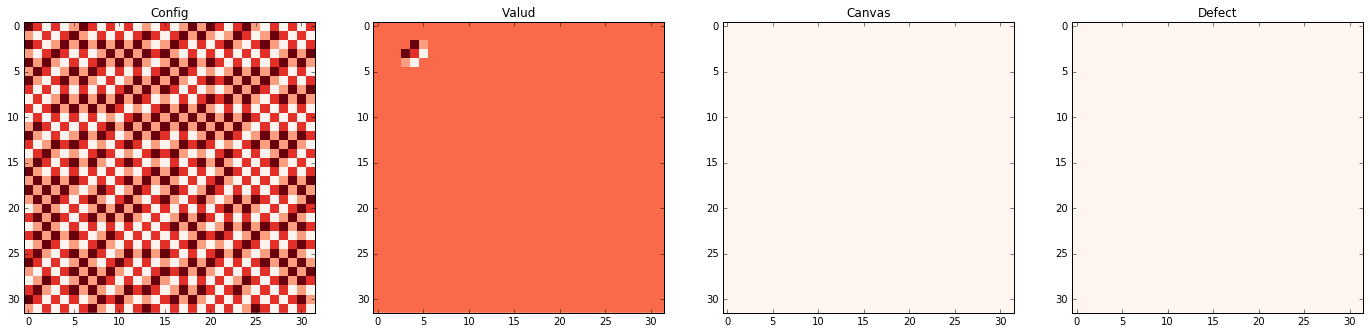

action: right, reward: 0.001, terminate: False, returns: None
[100, 101]


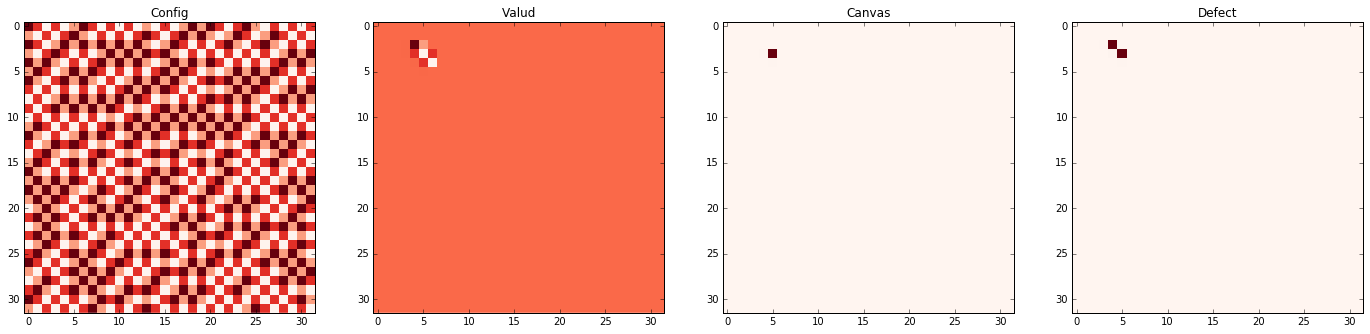

action: down, reward: 0.001, terminate: False, returns: None
[100, 101, 133]


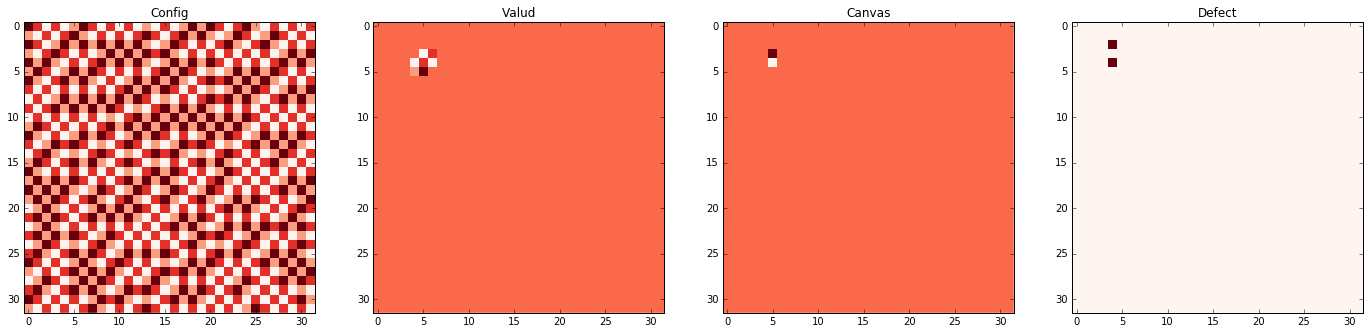

action: left, reward: 0.001, terminate: False, returns: None
[100, 101, 133, 132]


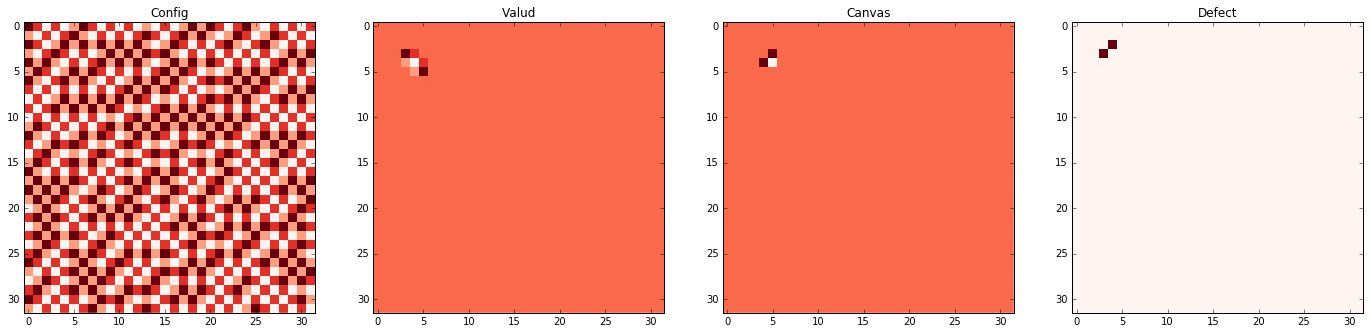

action: up, reward: 0.001, terminate: False, returns: None
[100, 101, 133, 132]


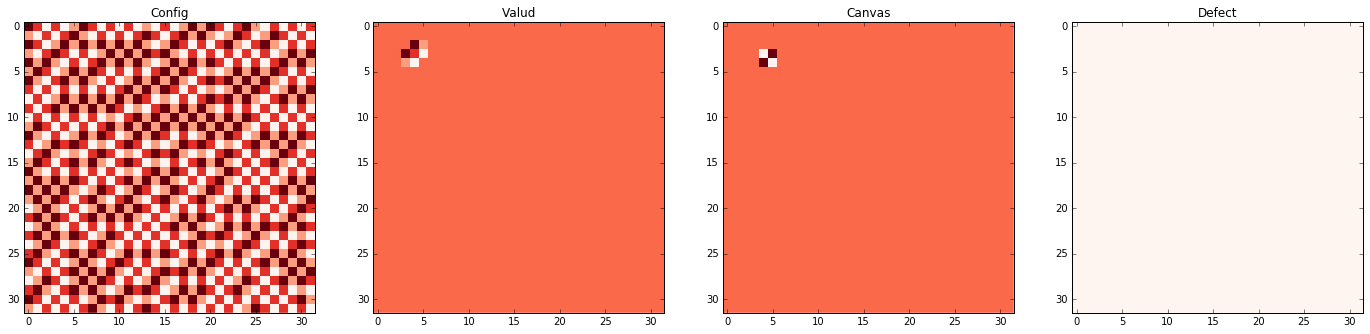

[GAME_ENV] PROPOSAL ACCEPTED!
	Save loop configuration to file: loop_sites.log
	Total accepted number = 1
	Accepted loop length = 4, area = 0.0
	Agent walks 5 steps in episode, action counters: [1, 1, 1, 1, 0, 0, 1]
	Statistics of actions all episodes (ep=5, steps=5) : [0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.2]
	Acceptance ratio (accepted/ # of metropolis) = 100.0%
	Acceptance ratio (from icegame) = 100.0%
	Running Effort = 20.0%
action: metropolis, reward: 0.333333333333, terminate: False, returns: {'Acceptance Ratio': 100.0, 'Loop Size': 4, 'Updated': 1, 'Running Effort': 20.0, 'Loop Area': 0.0}
[687]


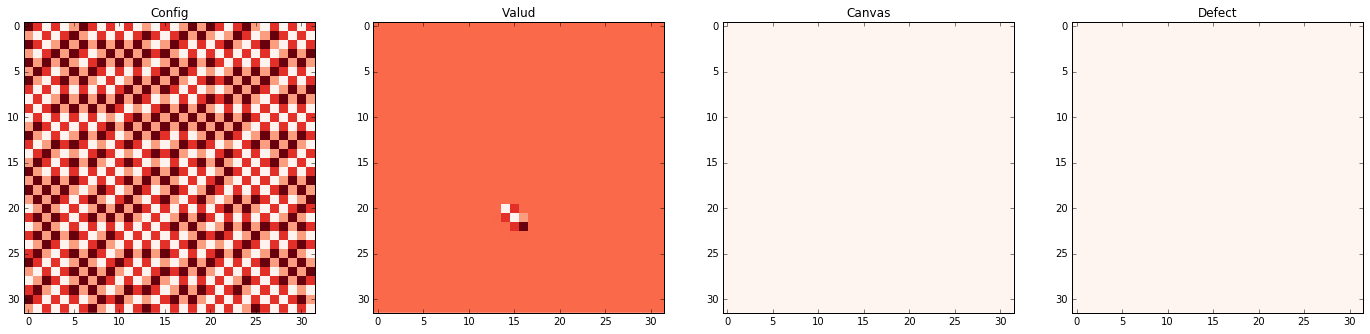

In [10]:
starting_point = 100
env.reset(starting_point)
show_states(titles=titles)

moves = ["right", "down", "left", "up", "metropolis"]

for m in moves:
    act(m)




In [7]:
configuration = env.get_obs()[:,:,0]
valid_map = env.get_obs()[:,:,1]
canvas = env.get_obs()[:,:,2]
energy_map = env.get_obs()[:,:,3]
defect_map = env.get_obs()[:,:,4]

In [8]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print (valid_map)

[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.75  0.25  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.75 -0.25 -0.75  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.25 -0.75  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  

In [9]:
print (defect_map)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [10]:
print (configuration)

[[ 0.75 -0.25  0.75 -0.25 -0.75 -0.25 -0.75  0.25  0.75  0.25 -0.75  0.25
  -0.75  0.25 -0.75  0.25  0.75 -0.25 -0.75  0.25  0.75 -0.25  0.75 -0.25
  -0.75  0.25 -0.75  0.25 -0.75  0.25  0.75 -0.25]
 [-0.25  0.75 -0.25  0.75  0.25  0.75 -0.25  0.75 -0.25 -0.75  0.25 -0.75
   0.25 -0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75  0.25 -0.75
  -0.25  0.75 -0.25  0.75  0.25 -0.75  0.25 -0.75]
 [ 0.75 -0.25  0.75 -0.25 -0.75  0.25 -0.75  0.25 -0.75  0.25 -0.75  0.25
  -0.75  0.25  0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75 -0.25 -0.75  0.25
   0.75 -0.25  0.75 -0.25 -0.75  0.25 -0.75  0.25]
 [-0.25  0.75  0.25 -0.75  0.25 -0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75
  -0.25  0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75
  -0.25  0.75 -0.25  0.75 -0.25  0.75  0.25 -0.75]
 [ 0.75 -0.25 -0.75  0.25 -0.75  0.25  0.75 -0.25  0.75 -0.25  0.75  0.25
  -0.75 -0.25  0.75 -0.25  0.75 -0.25  0.75  0.25 -0.75 -0.25  0.75  0.25
  -0.75 -0.25  0.75 -0.25  0.75 -0.25 -0.75  0.25]
 [-0.

In [11]:
# Random Bot

In [15]:
logdir = "logs_randombot"
num_of_episodes = 10

if not os.path.exists(logdir):
    os.makedirs(logdir)
env.set_output_path(logdir)

Set environment logging to logs_randombot/logs_randombot/loop_sites.log
Set loop and sites logging to logs_randombot/logs_randombot/loop_renders.log
Set results dumpping path to logs_randombot/logs_randombot/env_history.json


In [13]:
def random_policy(state):
    # Just randomly choose an action 
    # w/o considering observed states.
    action = np.random.randint(7)
    return action


action: 2, reward: -0.0146484375, terminate: False, returns: None


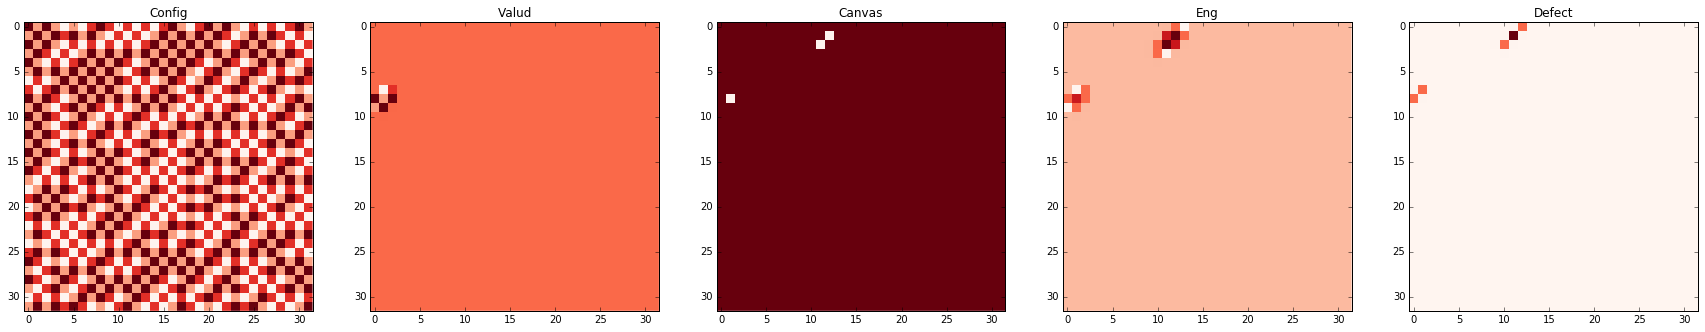

1
action: 3, reward: -0.01953125, terminate: False, returns: None


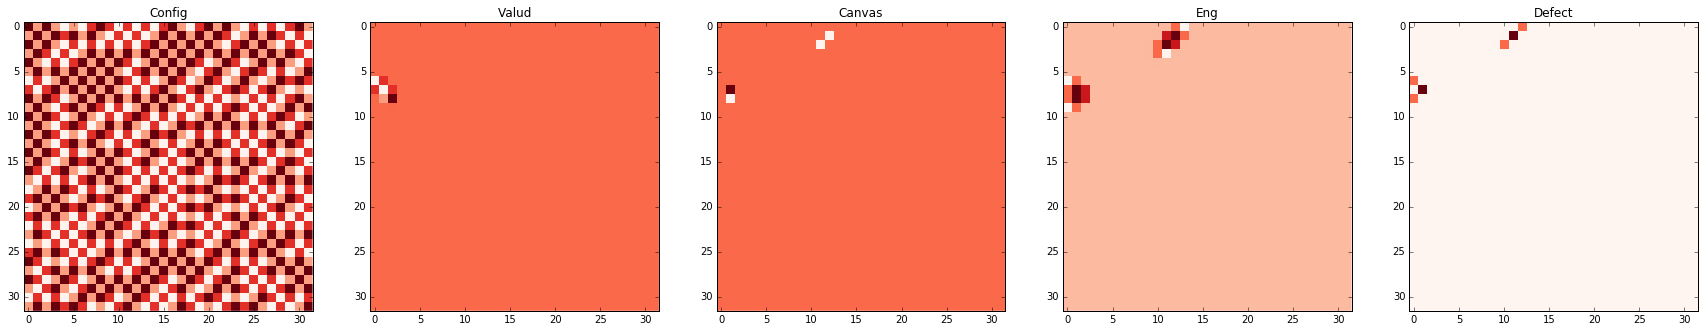

1
action: 6, reward: 0.0, terminate: False, returns: None


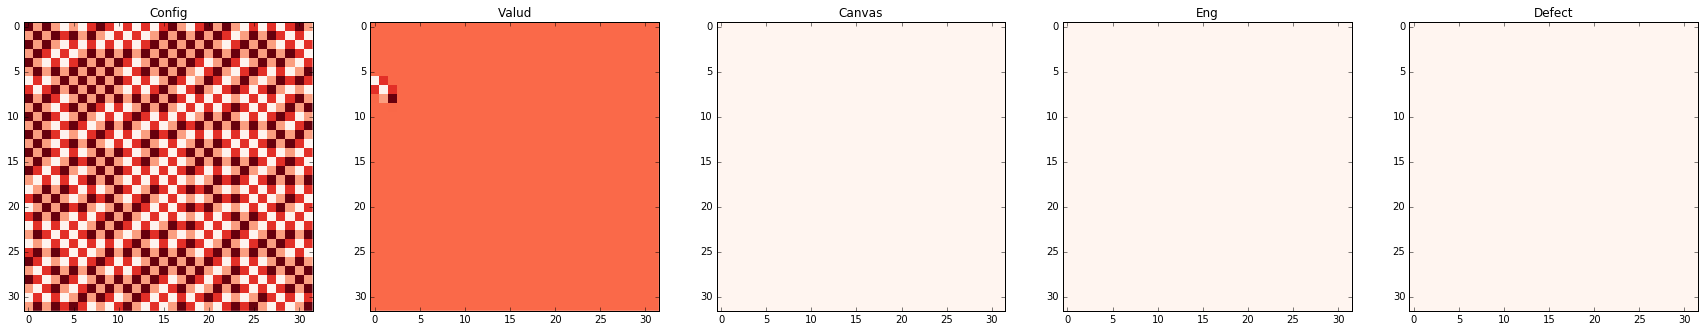

0
action: 5, reward: -0.0048828125, terminate: True, returns: None


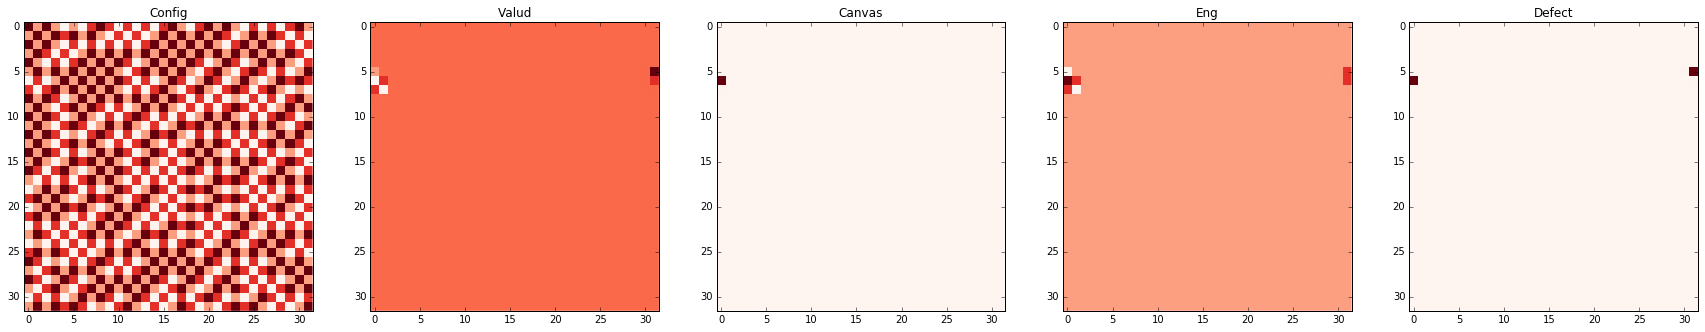

0
Episode 0: Reward = -0.0390625
action: 3, reward: -0.0048828125, terminate: False, returns: None


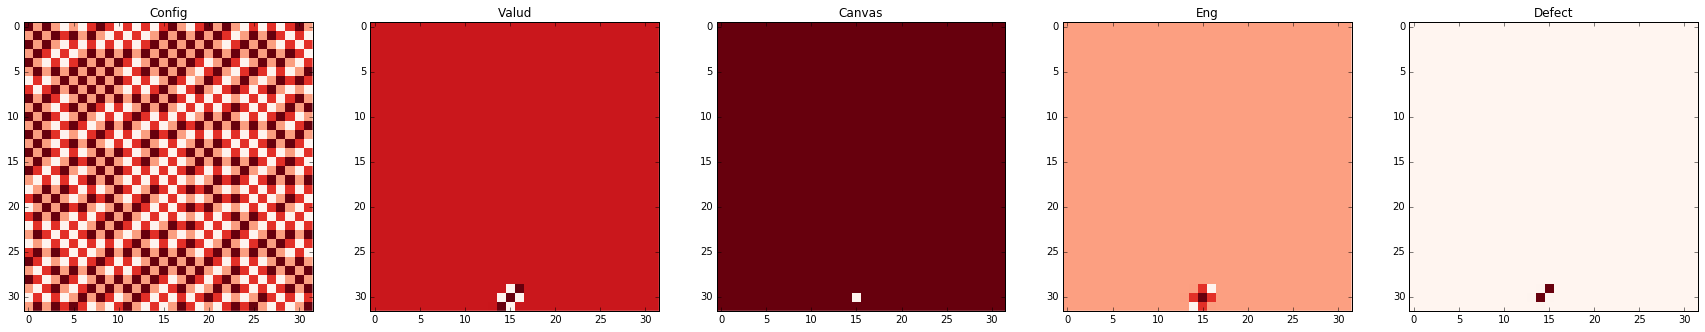

5
action: 0, reward: -0.001953125, terminate: False, returns: None


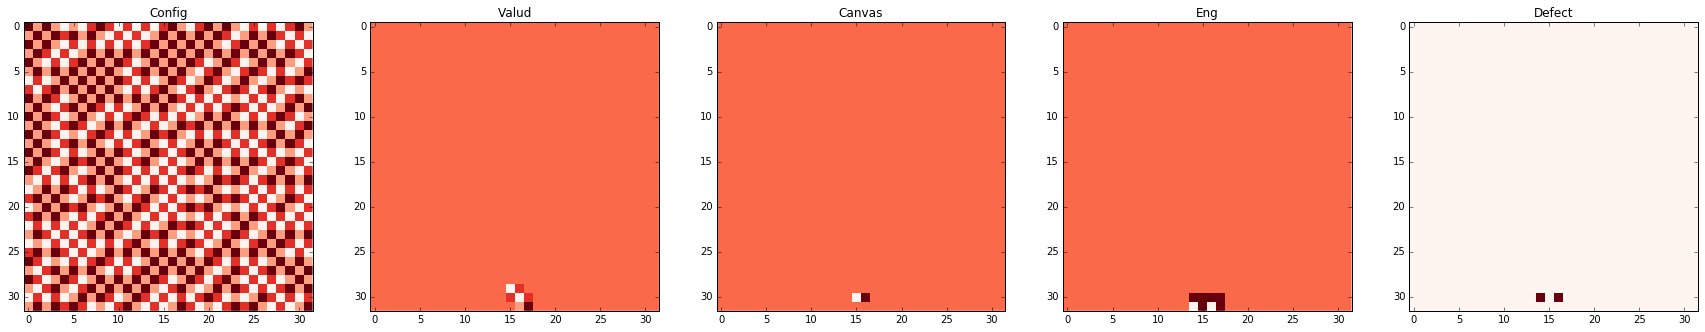

5
action: 1, reward: -0.0107421875, terminate: False, returns: None


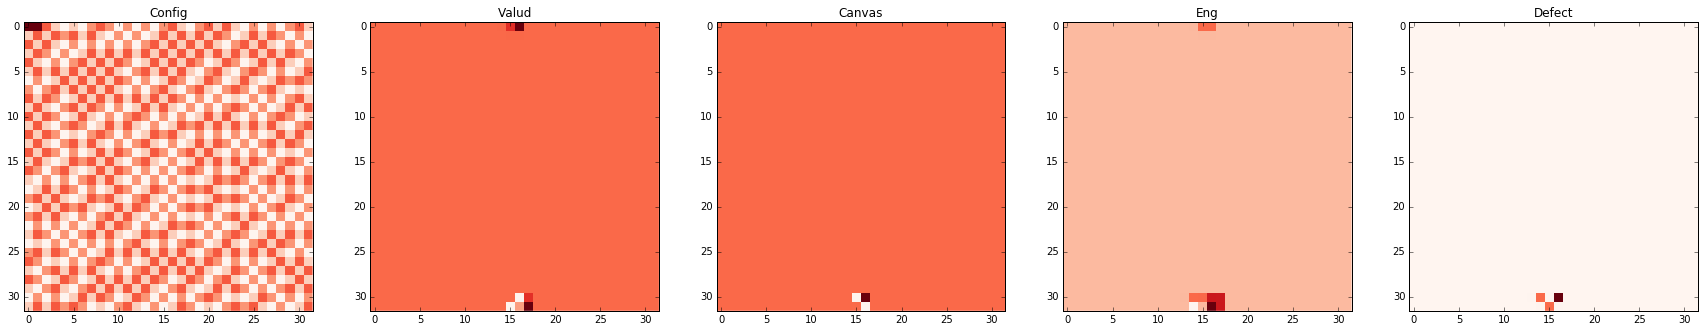

5
action: 2, reward: -0.015625, terminate: False, returns: None


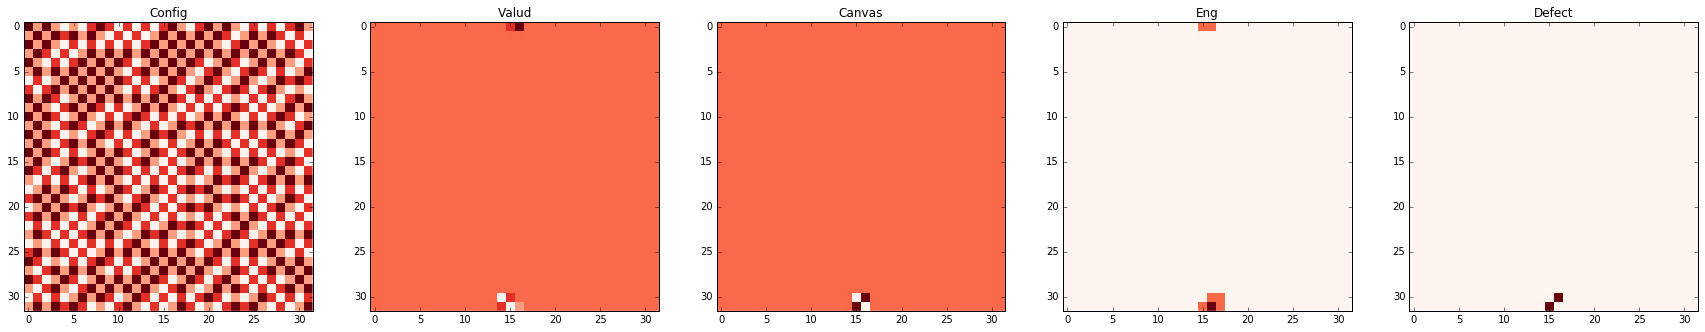

5
action: 1, reward: -0.0087890625, terminate: False, returns: None


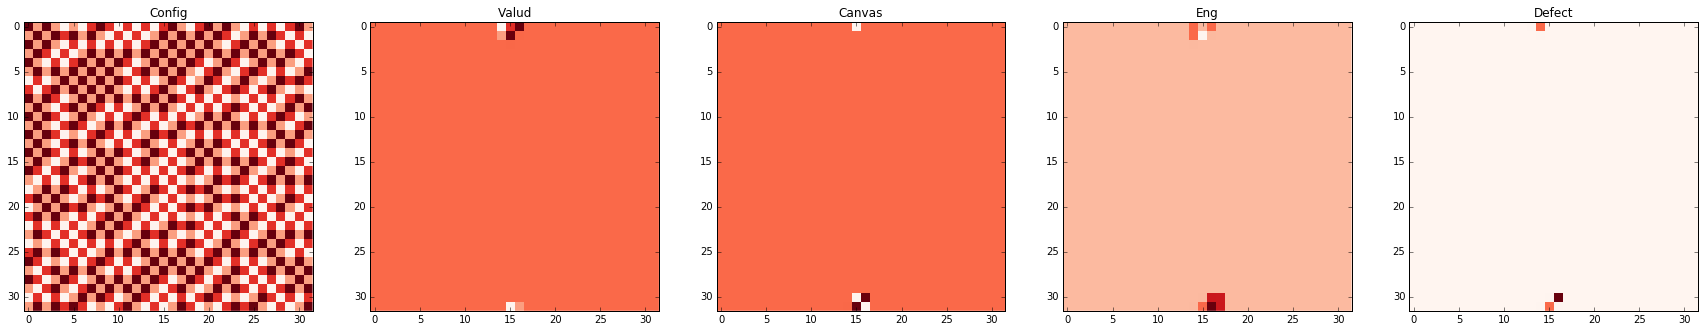

5
action: 2, reward: -0.009765625, terminate: False, returns: None


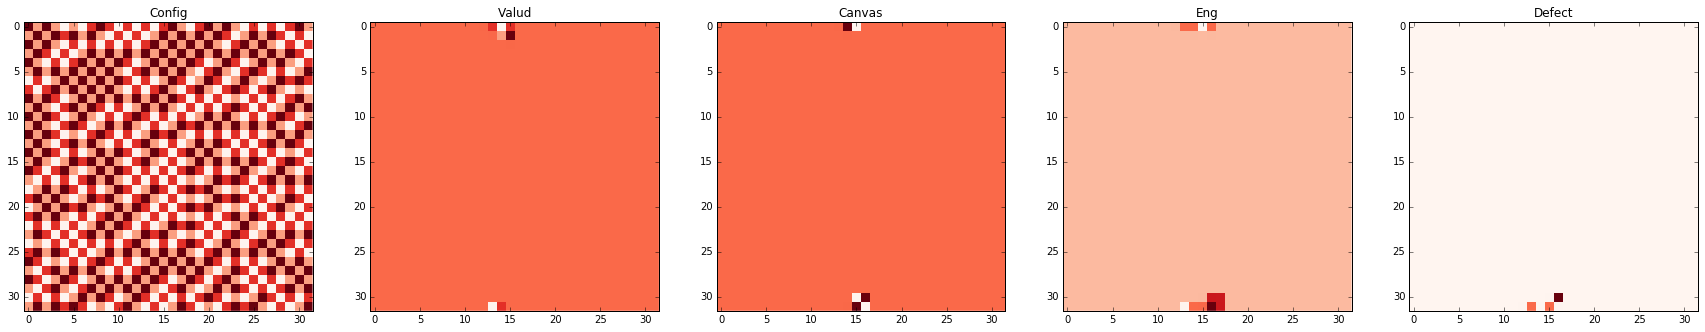

5
action: 4, reward: -0.0107421875, terminate: False, returns: None


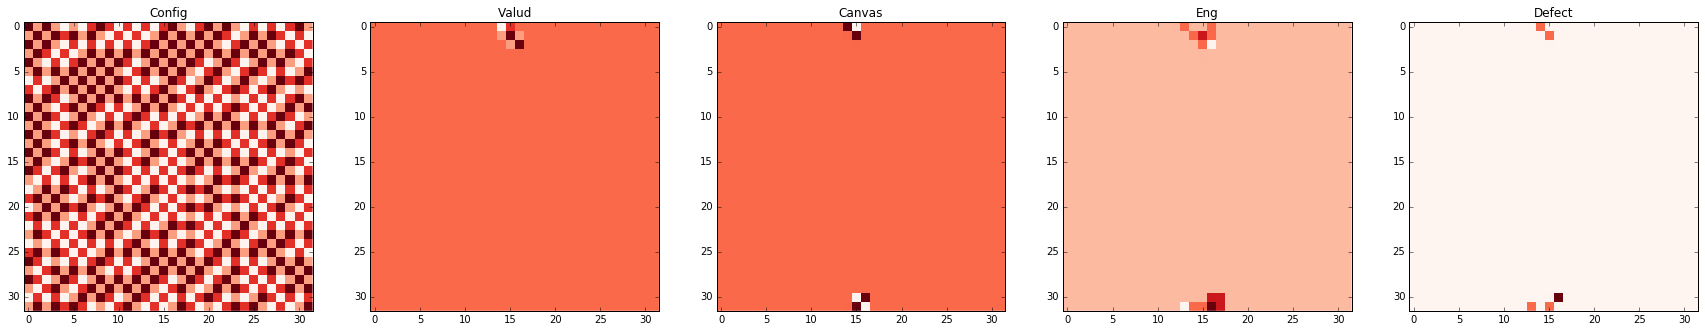

5
action: 4, reward: -0.015625, terminate: False, returns: None


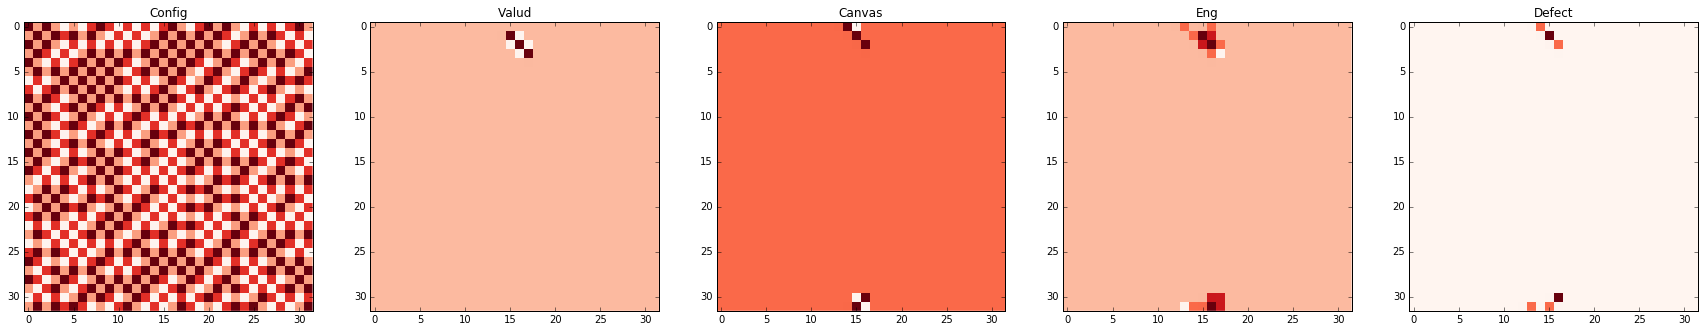

5
action: 6, reward: 0.0, terminate: False, returns: None


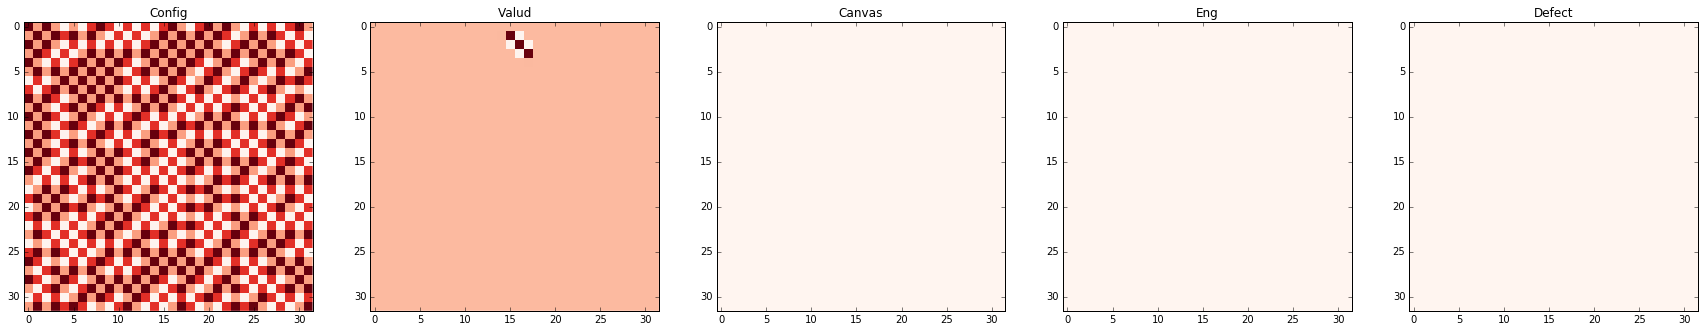

4
action: 3, reward: -0.0048828125, terminate: False, returns: None


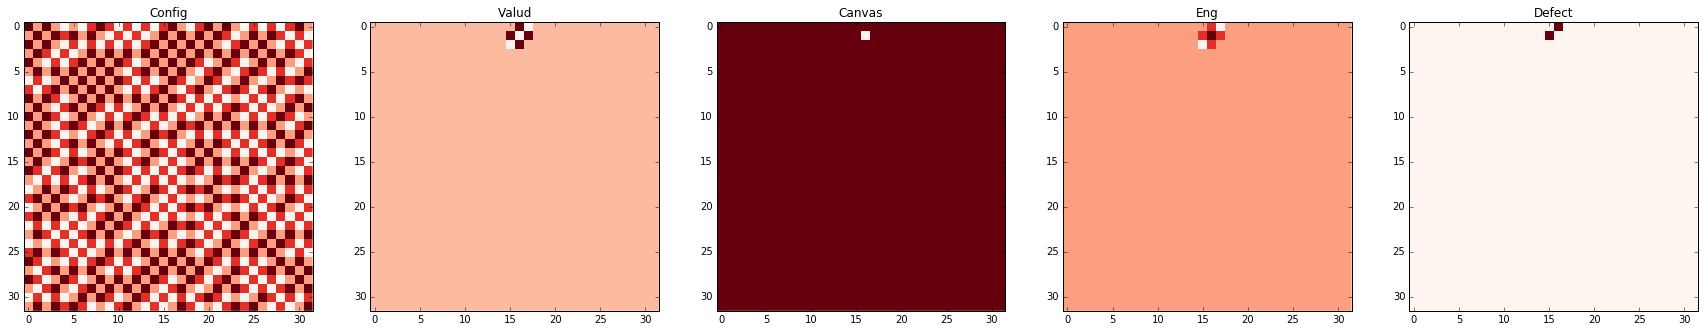

4
action: 1, reward: -0.001953125, terminate: False, returns: None


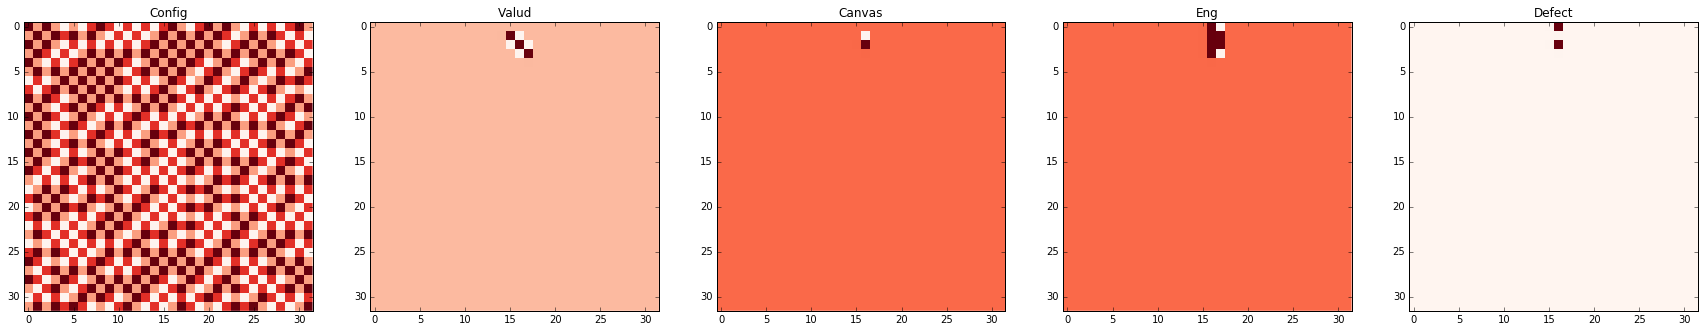

4
action: 4, reward: -0.0107421875, terminate: False, returns: None


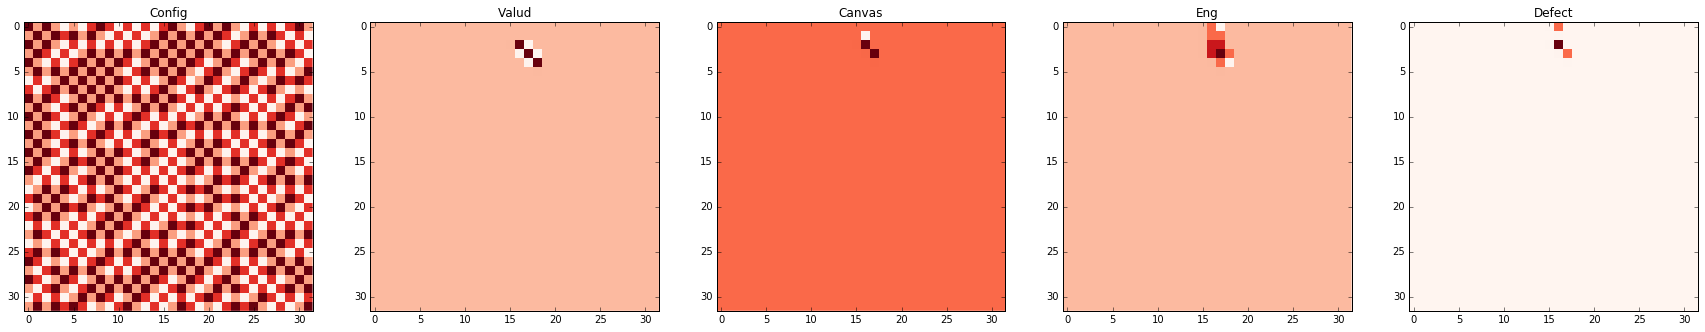

4
action: 5, reward: -0.0107421875, terminate: False, returns: None


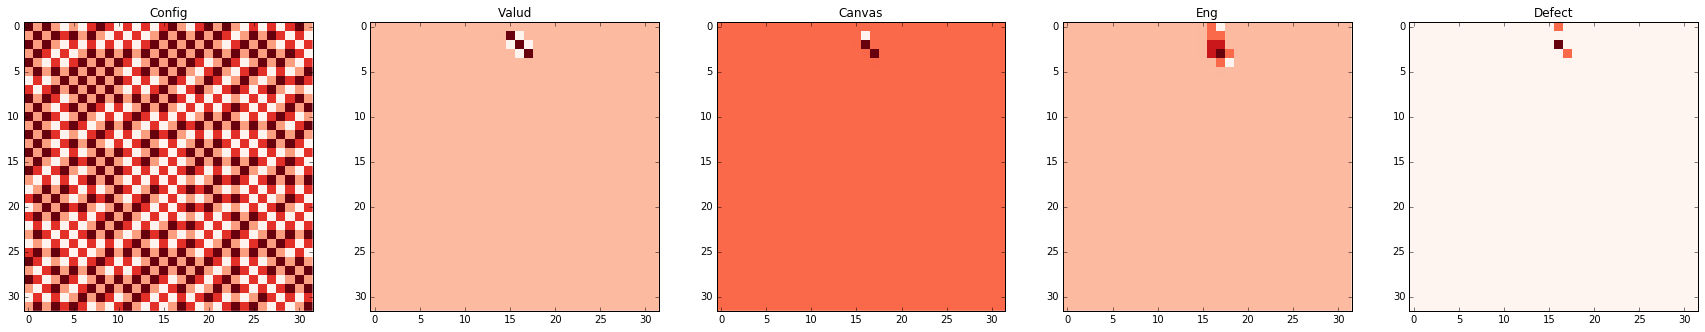

4
action: 4, reward: -0.0107421875, terminate: False, returns: None


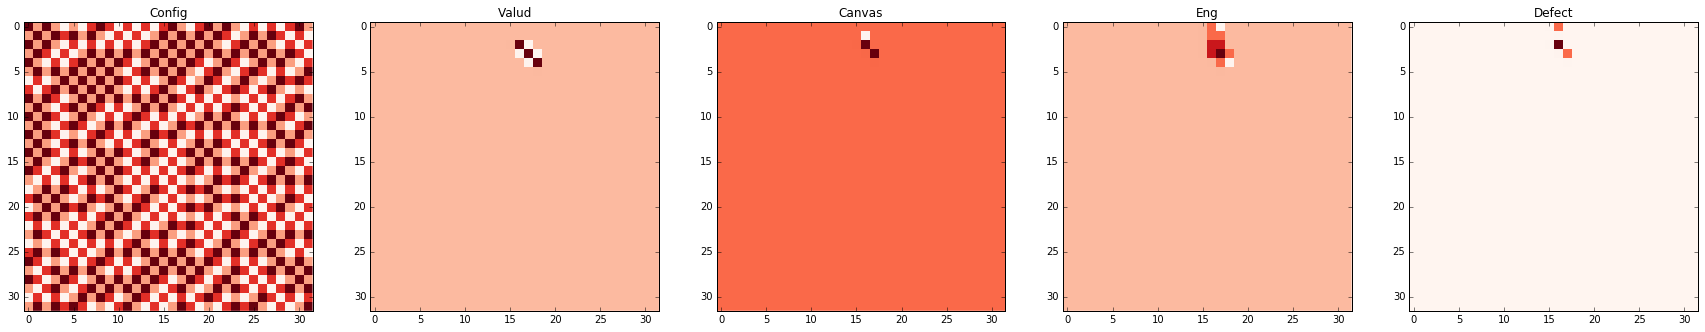

4
action: 4, reward: -0.01953125, terminate: False, returns: None


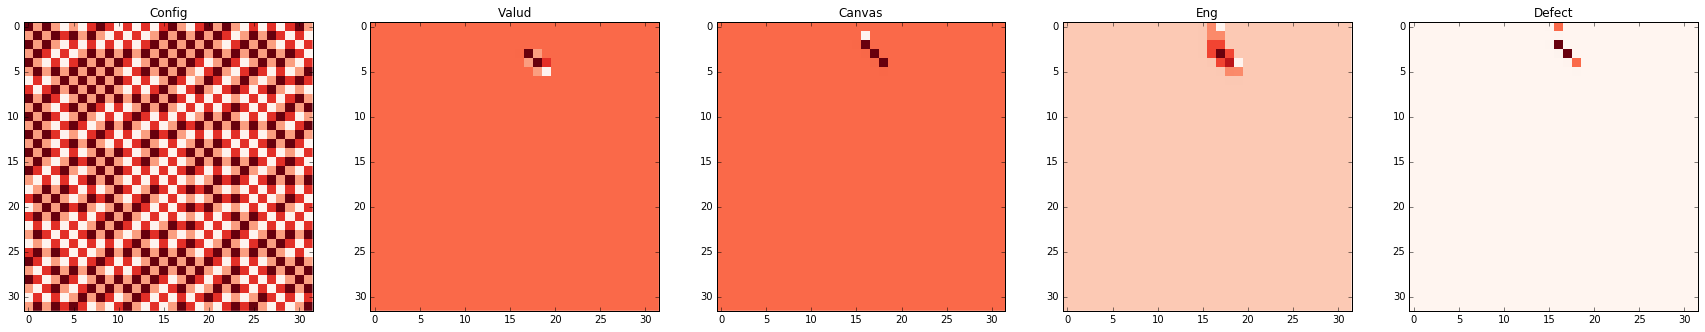

4
action: 1, reward: -0.0166015625, terminate: False, returns: None


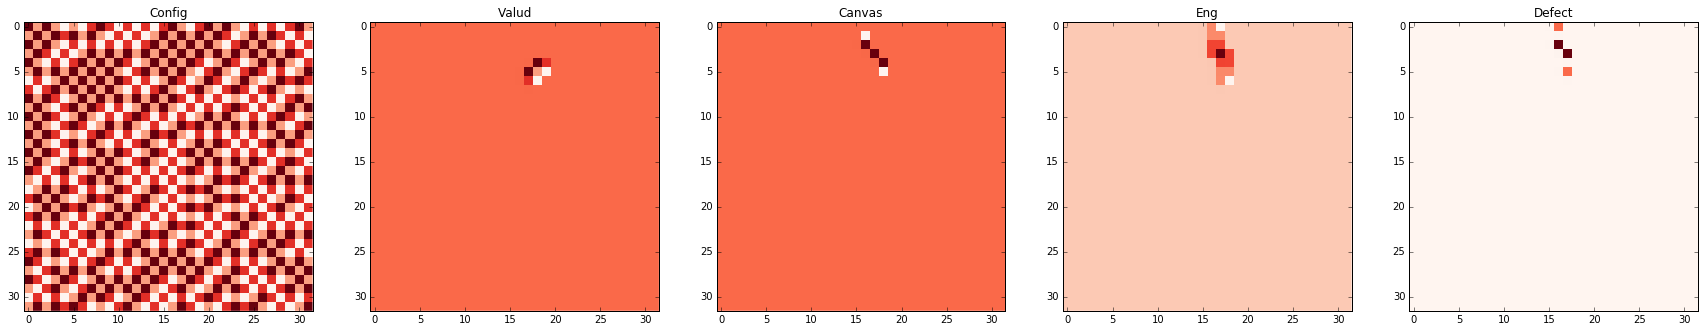

4
action: 1, reward: -0.021484375, terminate: False, returns: None


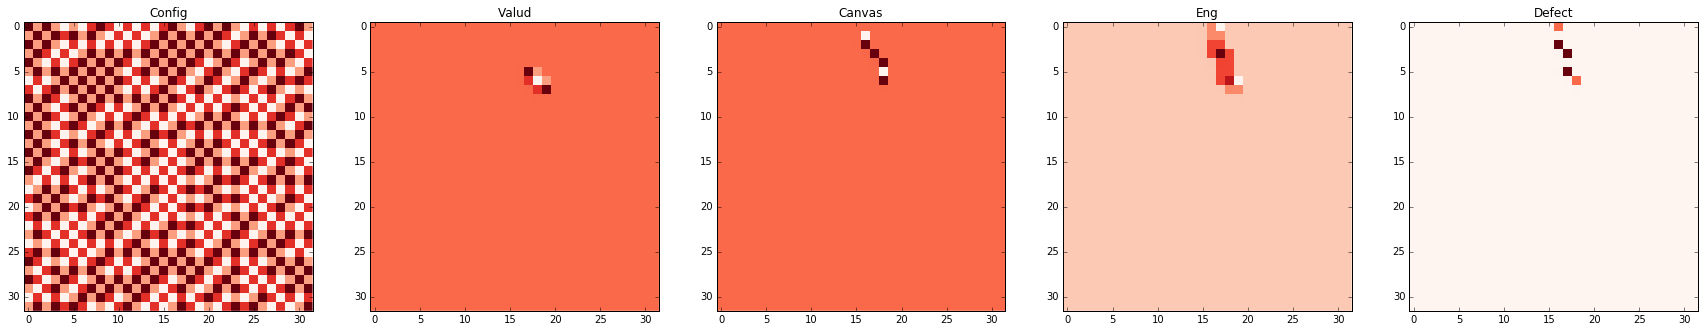

4
action: 3, reward: -0.021484375, terminate: False, returns: None


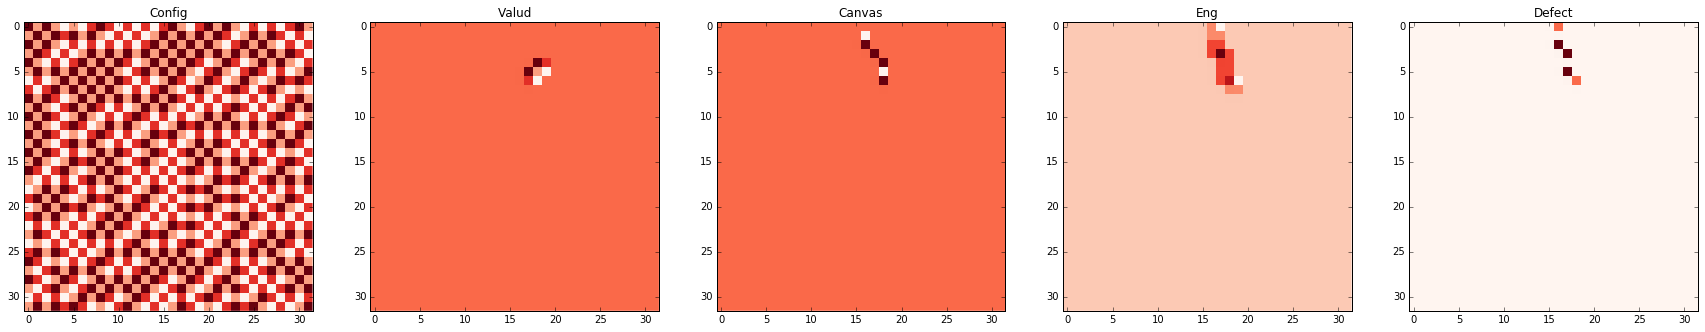

4
action: 5, reward: -0.0263671875, terminate: False, returns: None


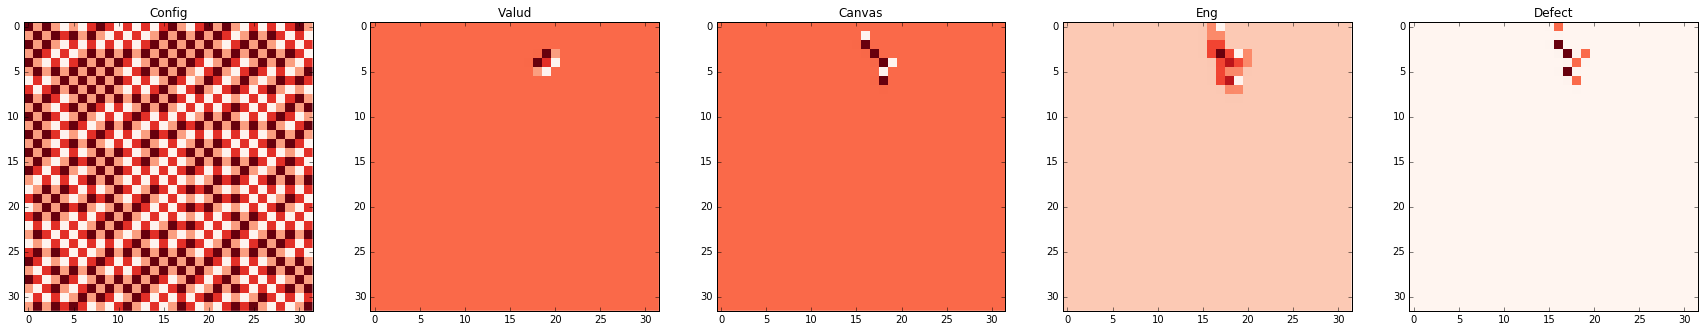

4
action: 1, reward: -0.0234375, terminate: False, returns: None


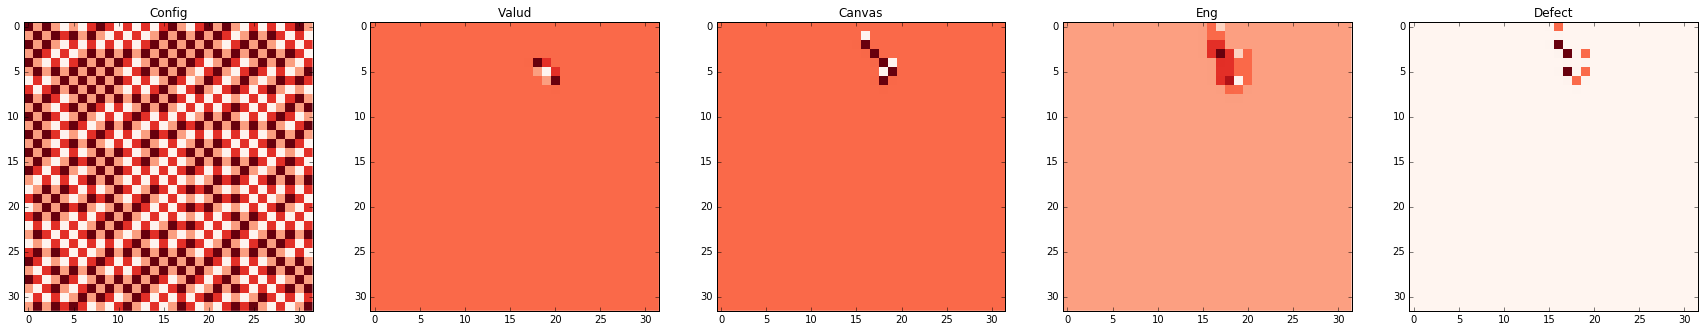

4
action: 6, reward: 0.0, terminate: False, returns: None


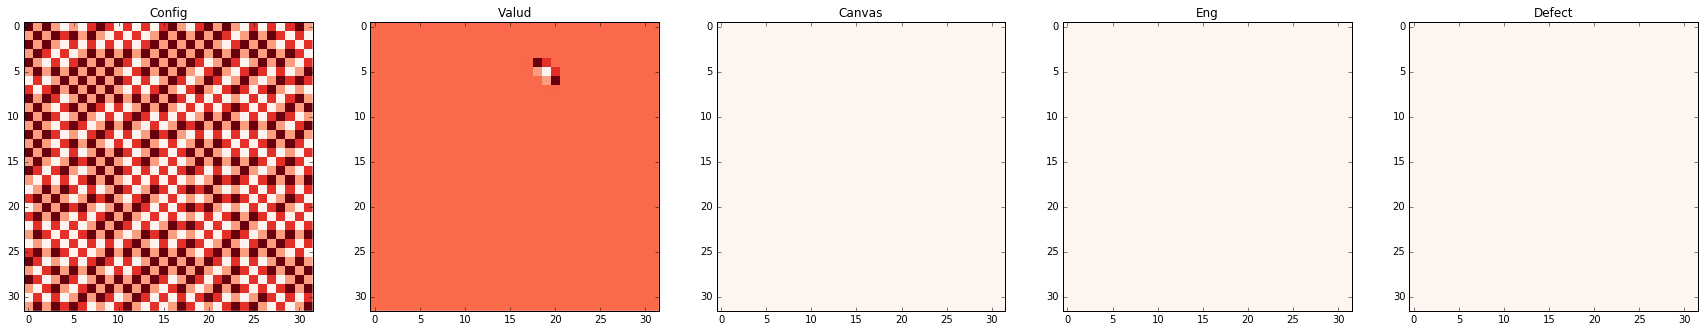

3
action: 1, reward: -0.0048828125, terminate: False, returns: None


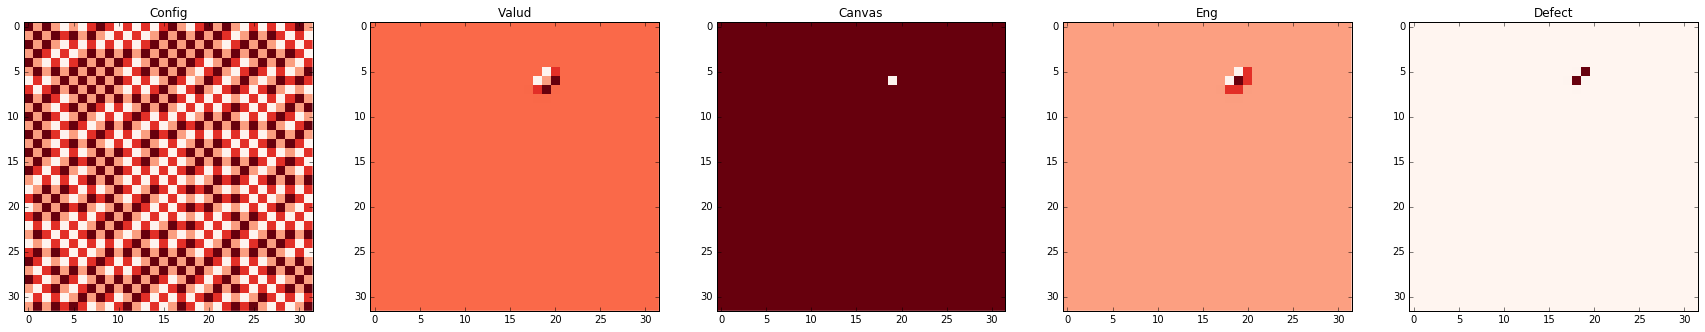

3
action: 6, reward: 0.0, terminate: False, returns: None


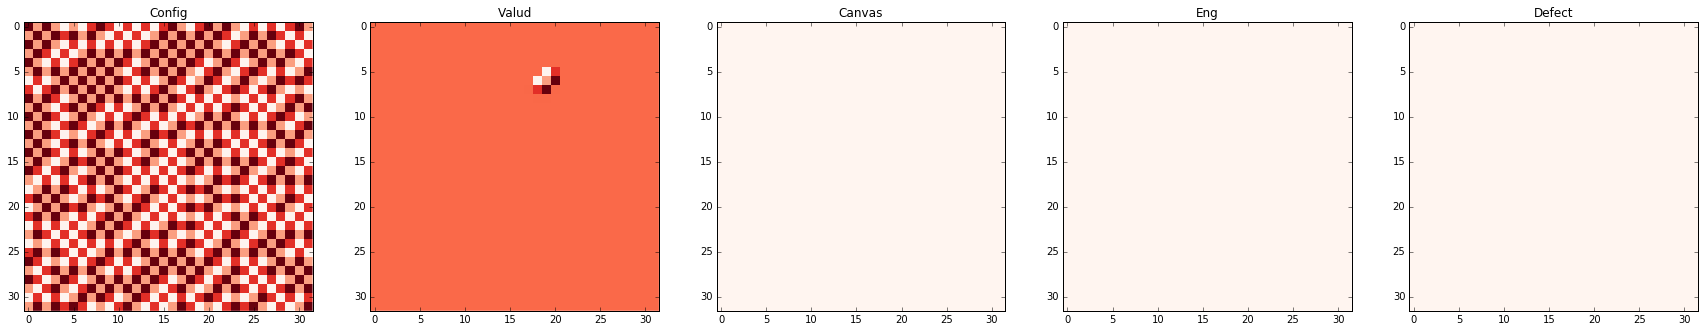

2
action: 5, reward: -0.0048828125, terminate: False, returns: None


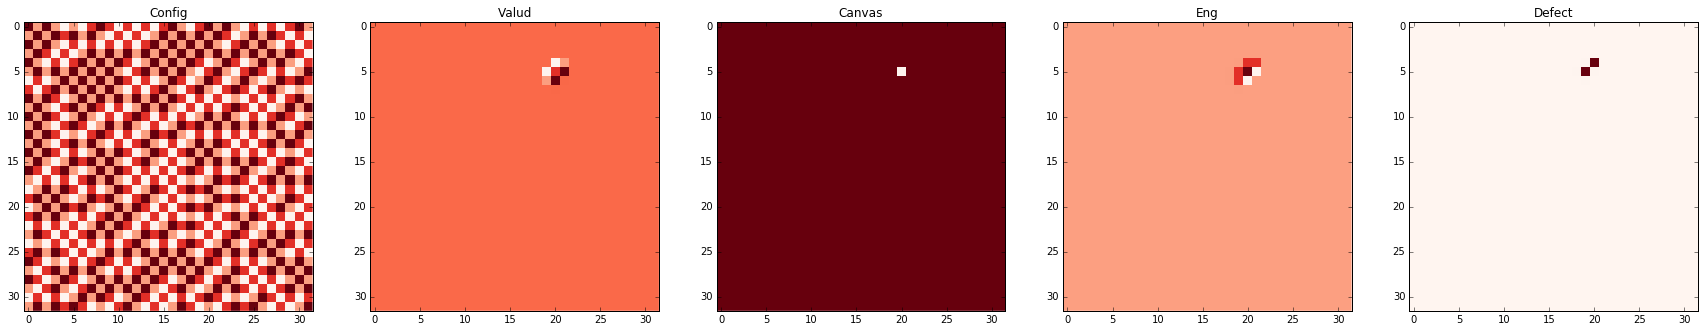

2
action: 6, reward: 0.0, terminate: False, returns: None


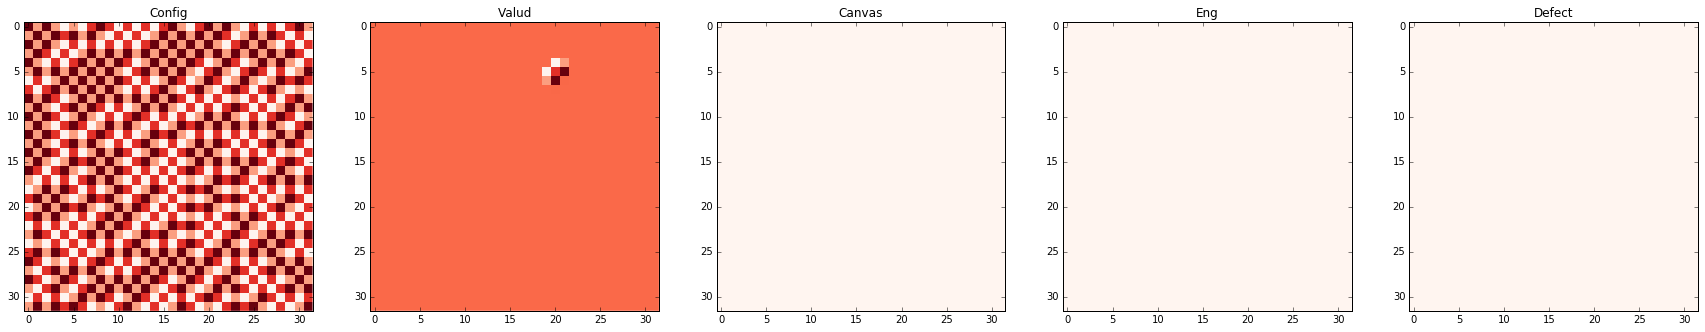

1
action: 6, reward: 0.0, terminate: False, returns: None


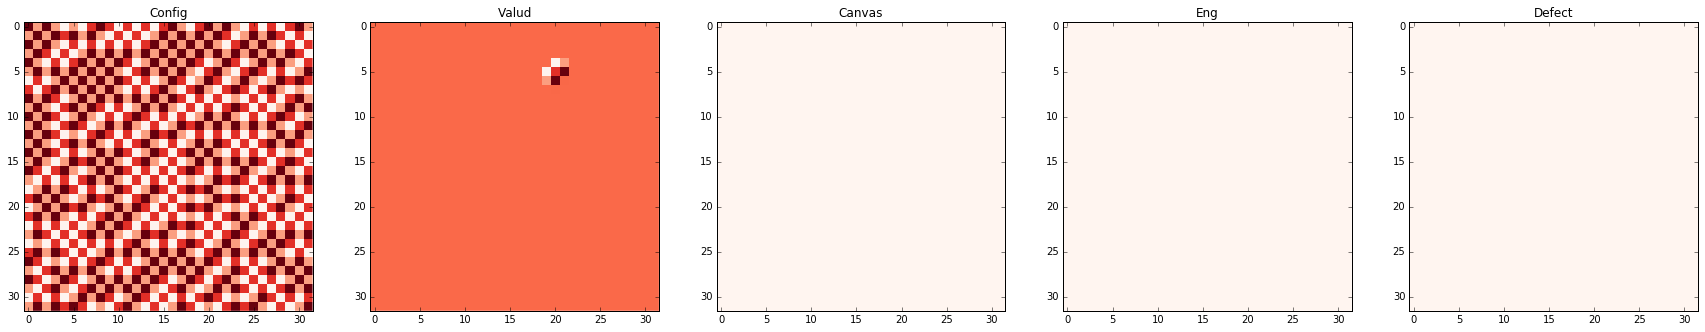

0
action: 4, reward: -0.0048828125, terminate: True, returns: None


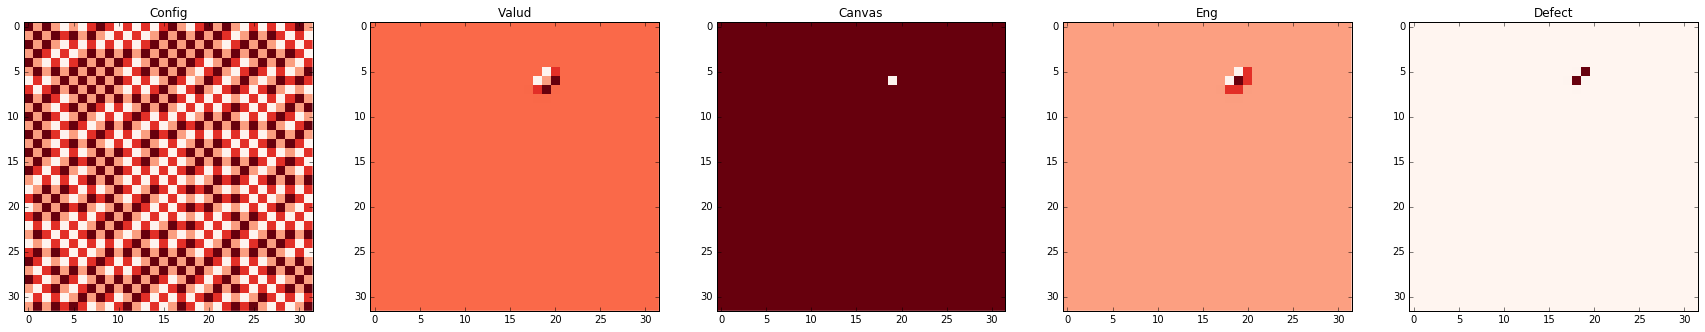

0
Episode 1: Reward = -0.2607421875
action: 2, reward: -0.0048828125, terminate: False, returns: None


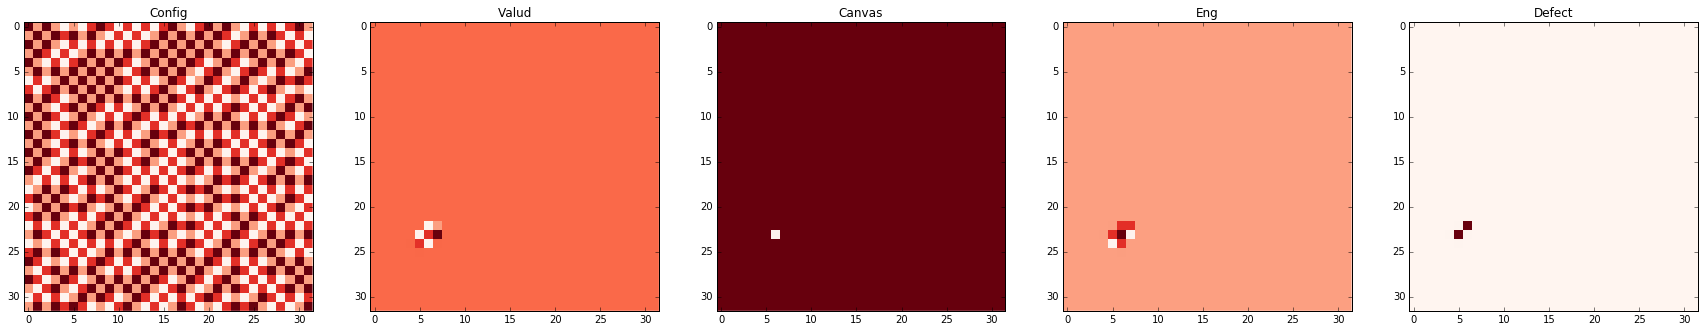

5
action: 6, reward: 0.0, terminate: False, returns: None


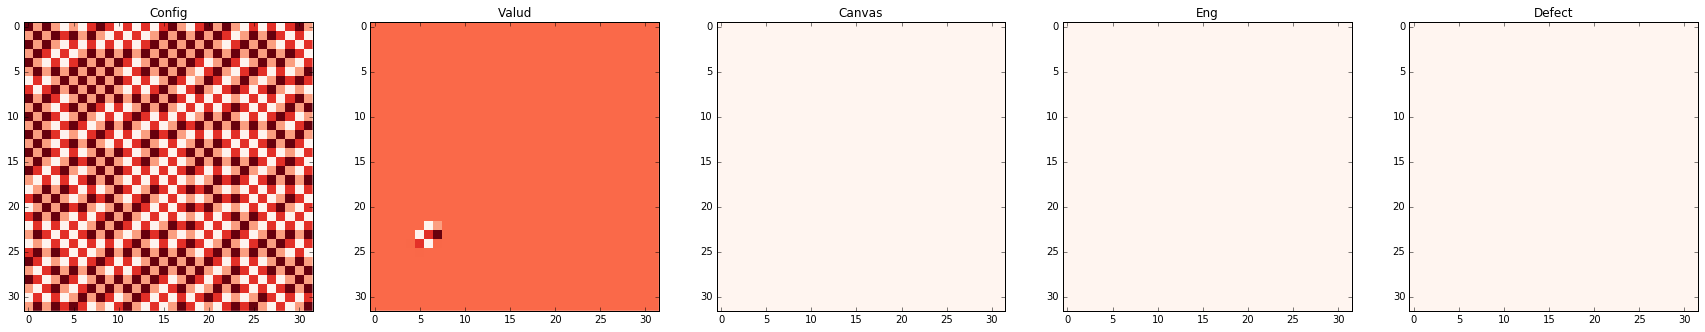

4
action: 1, reward: -0.0048828125, terminate: False, returns: None


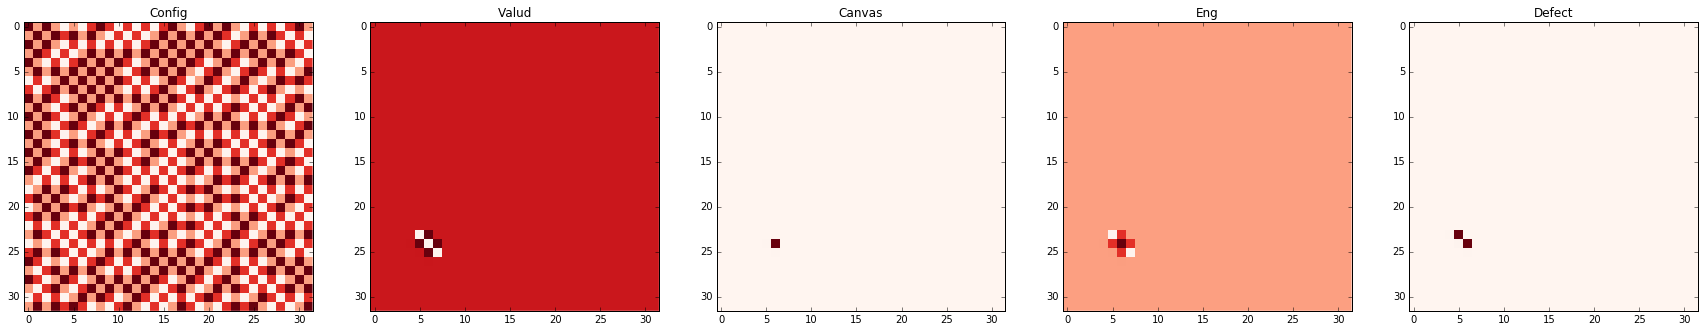

4
action: 2, reward: -0.001953125, terminate: False, returns: None


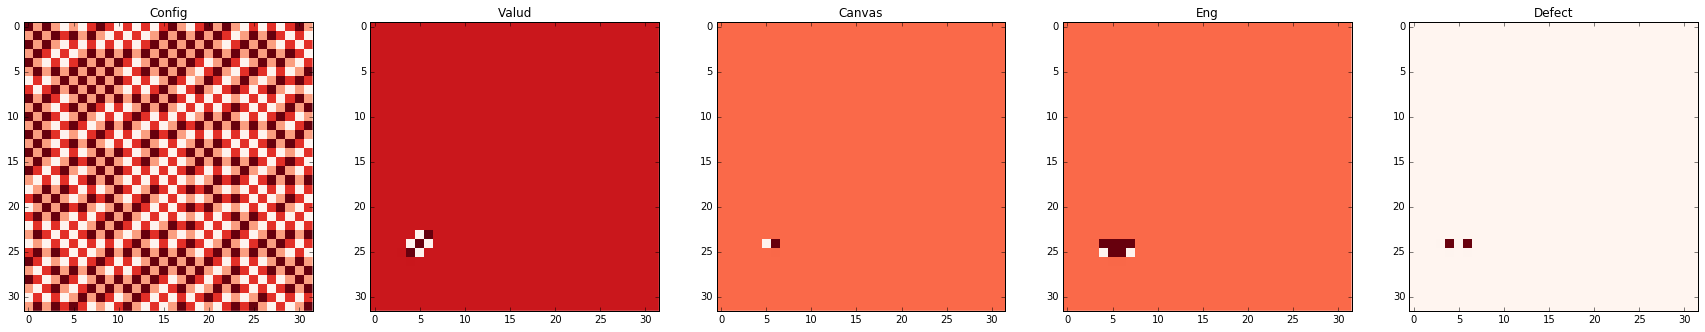

4
action: 4, reward: -0.0107421875, terminate: False, returns: None


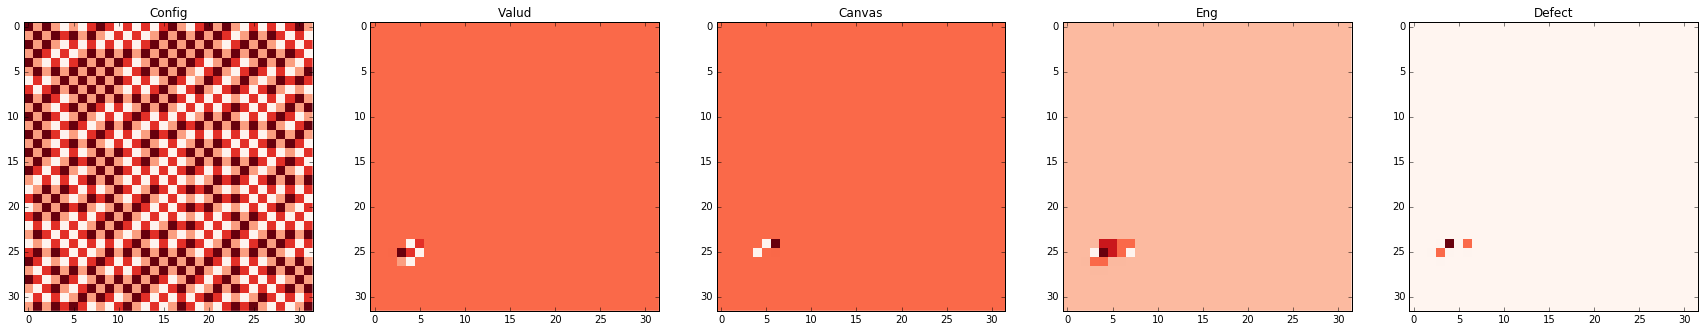

4
action: 1, reward: -0.0078125, terminate: False, returns: None


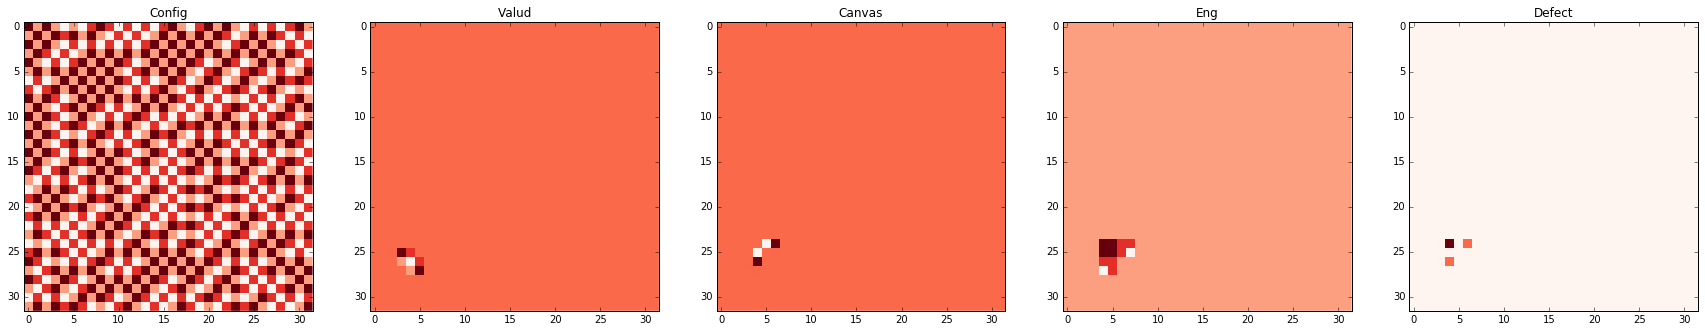

4
action: 0, reward: -0.0087890625, terminate: False, returns: None


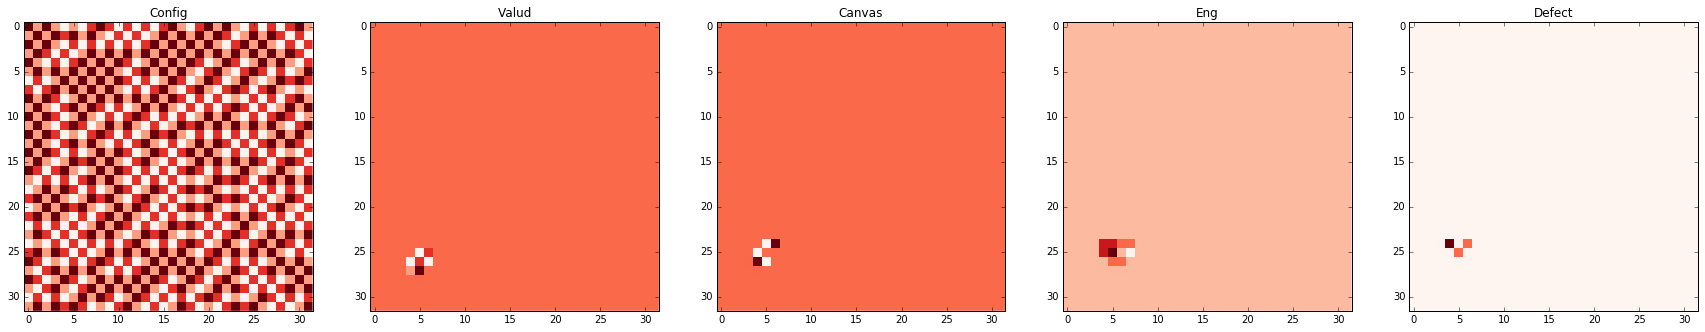

4
action: 3, reward: 0.001953125, terminate: False, returns: None


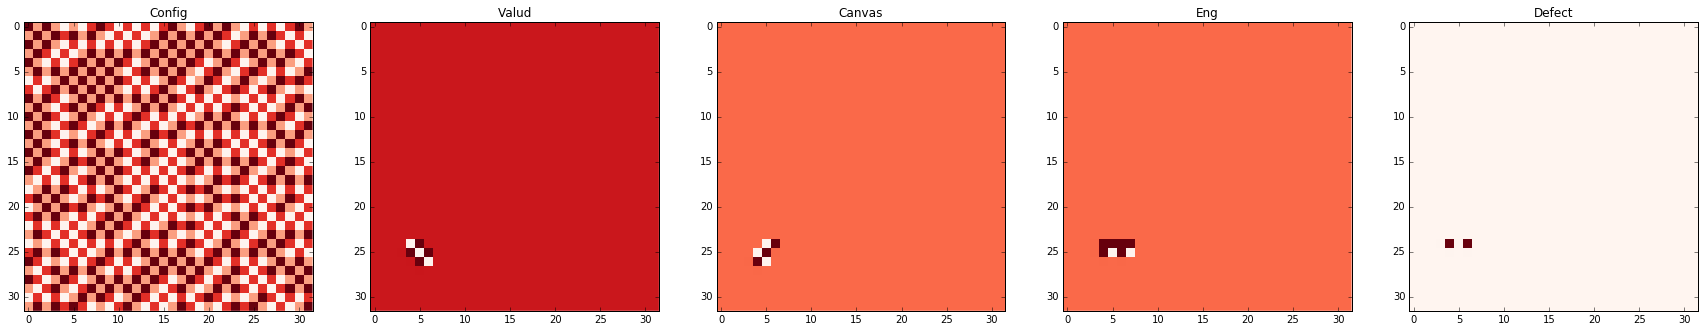

4
action: 3, reward: 0.001953125, terminate: False, returns: None


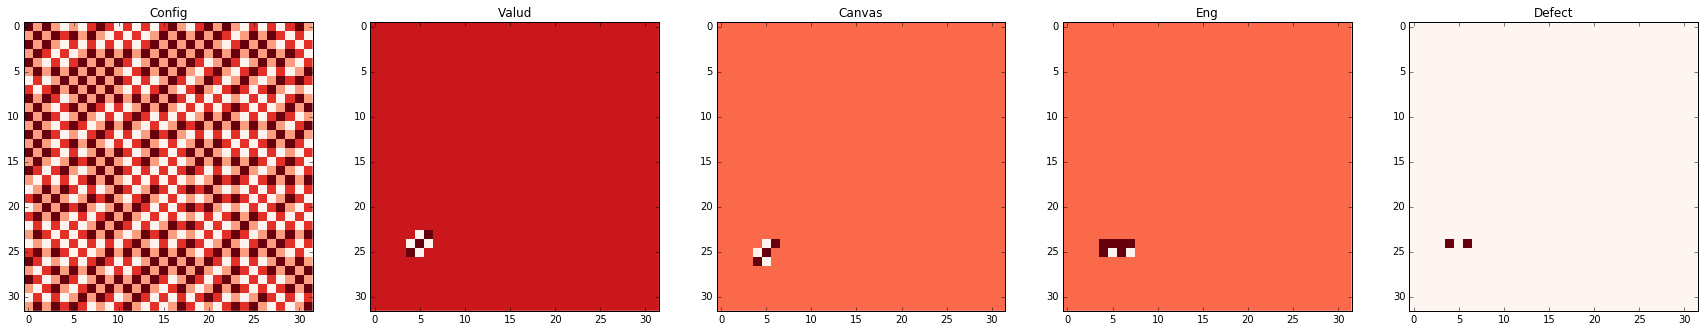

4
action: 3, reward: -0.0029296875, terminate: False, returns: None


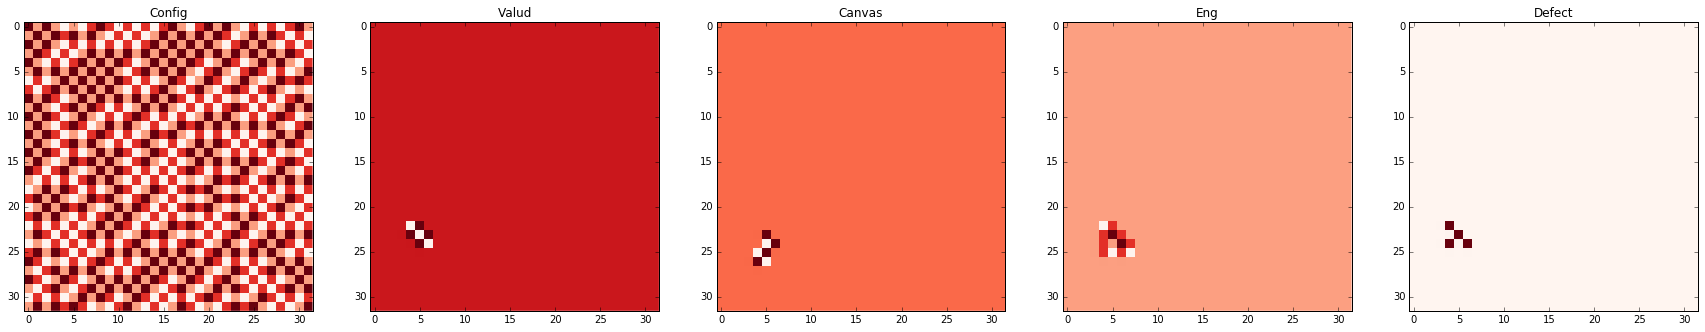

4
action: 5, reward: -0.01171875, terminate: False, returns: None


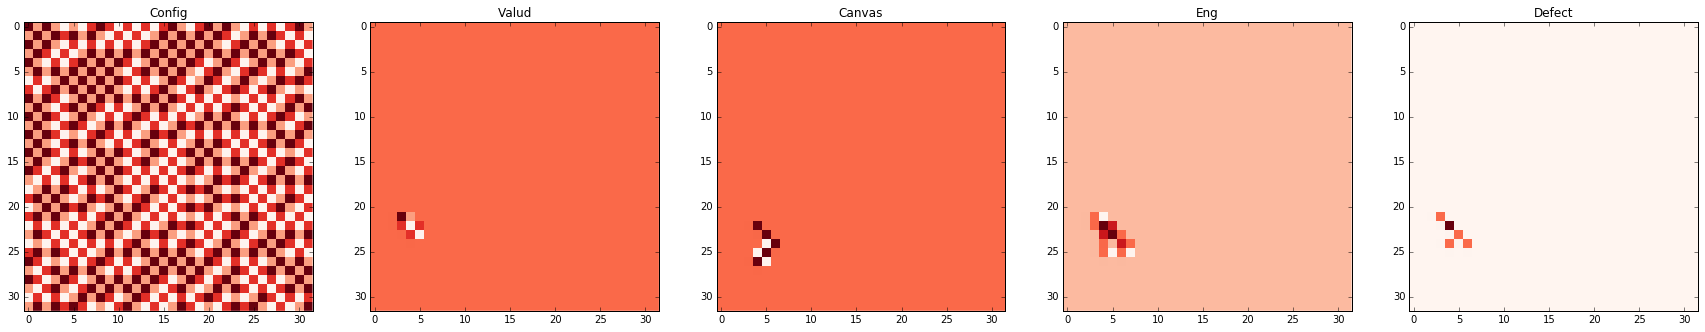

4
action: 2, reward: -0.0087890625, terminate: False, returns: None


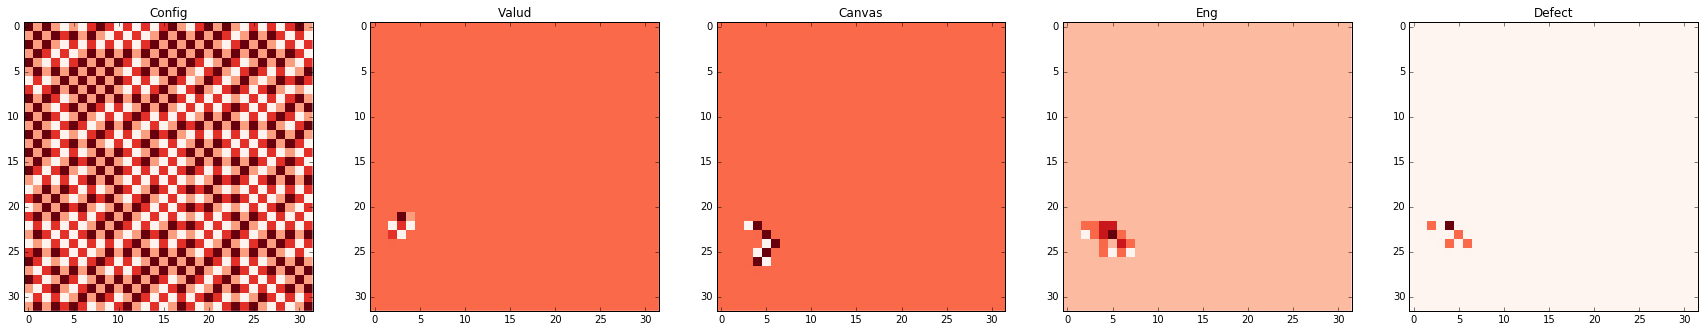

4
action: 4, reward: -0.013671875, terminate: False, returns: None


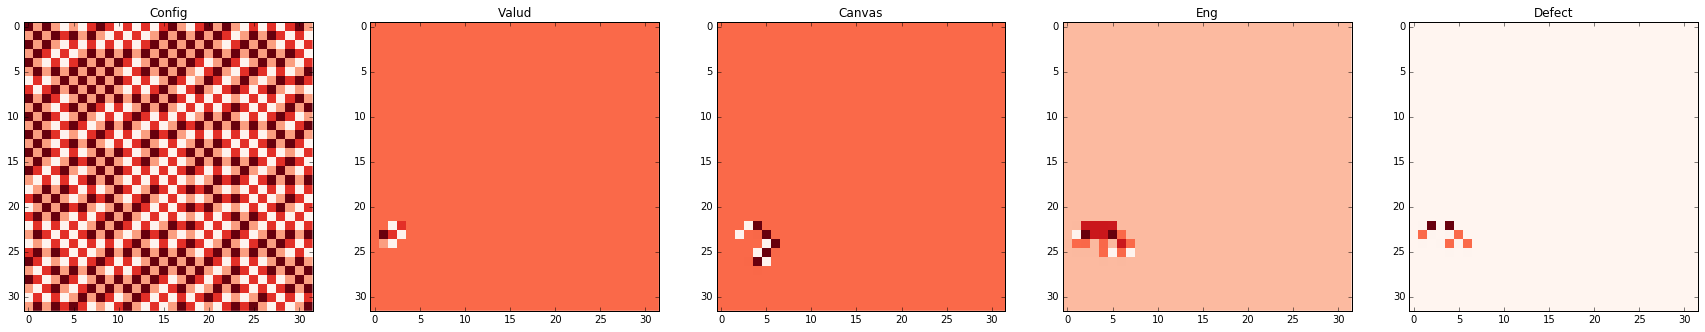

4
action: 3, reward: -0.0107421875, terminate: False, returns: None


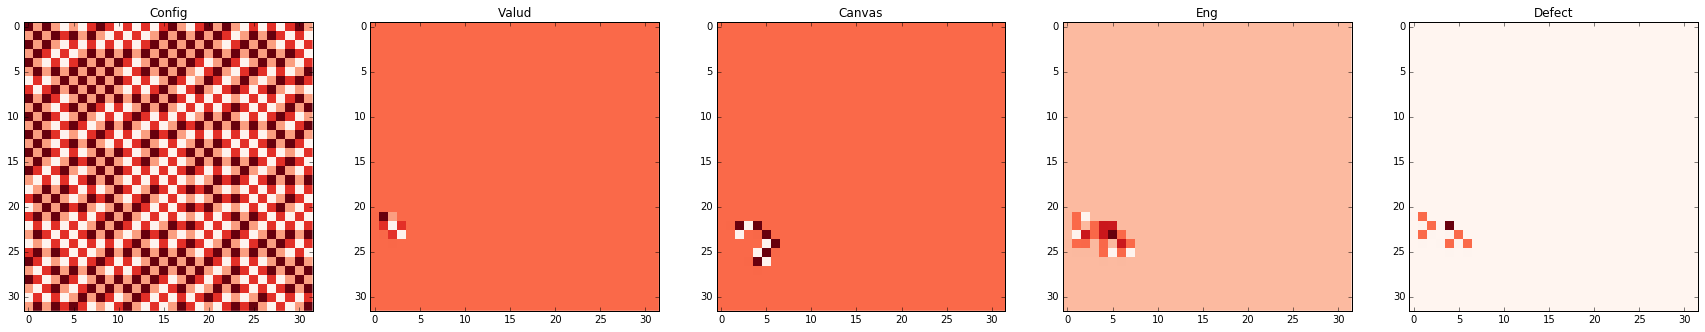

4
action: 3, reward: -0.01953125, terminate: False, returns: None


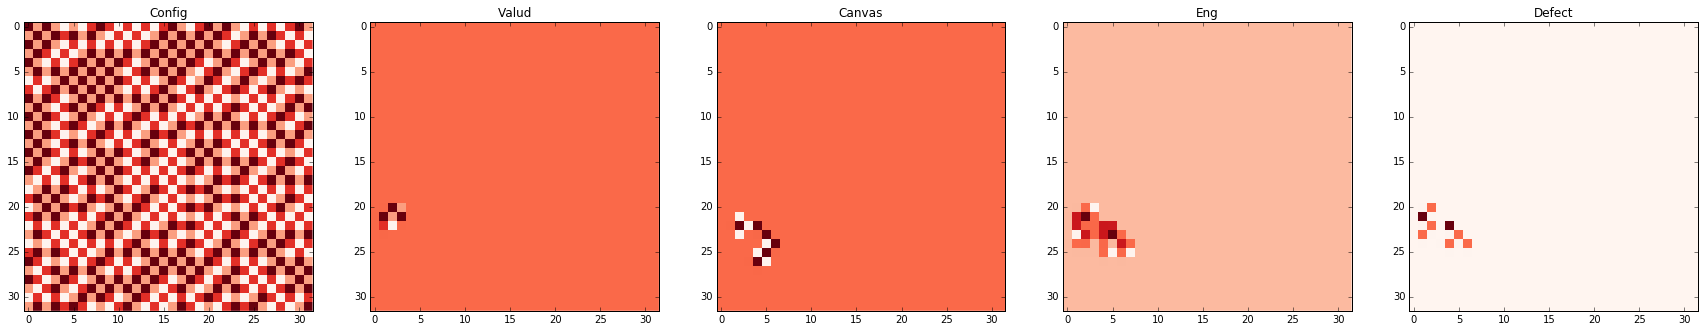

4
action: 1, reward: -0.01953125, terminate: False, returns: None


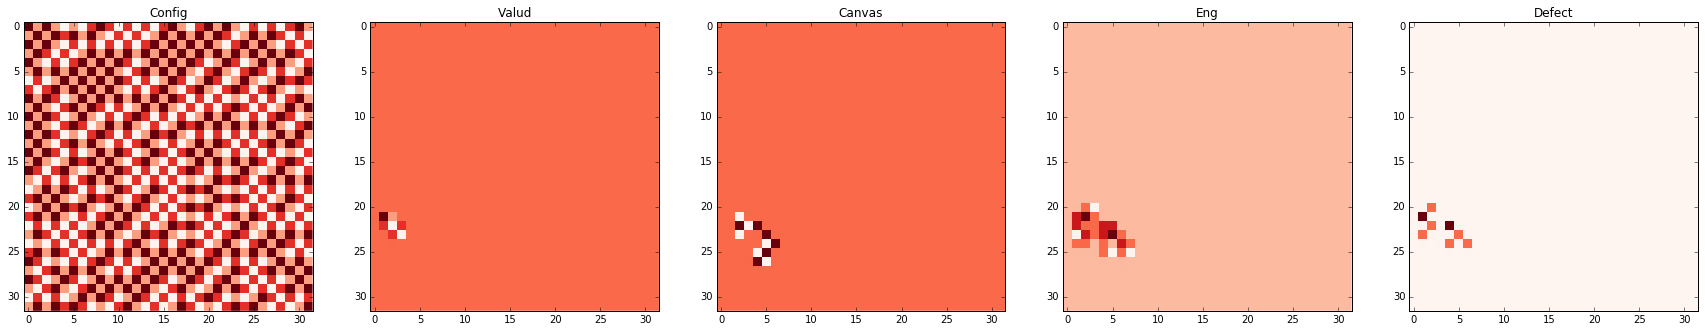

4
action: 2, reward: -0.0126953125, terminate: False, returns: None


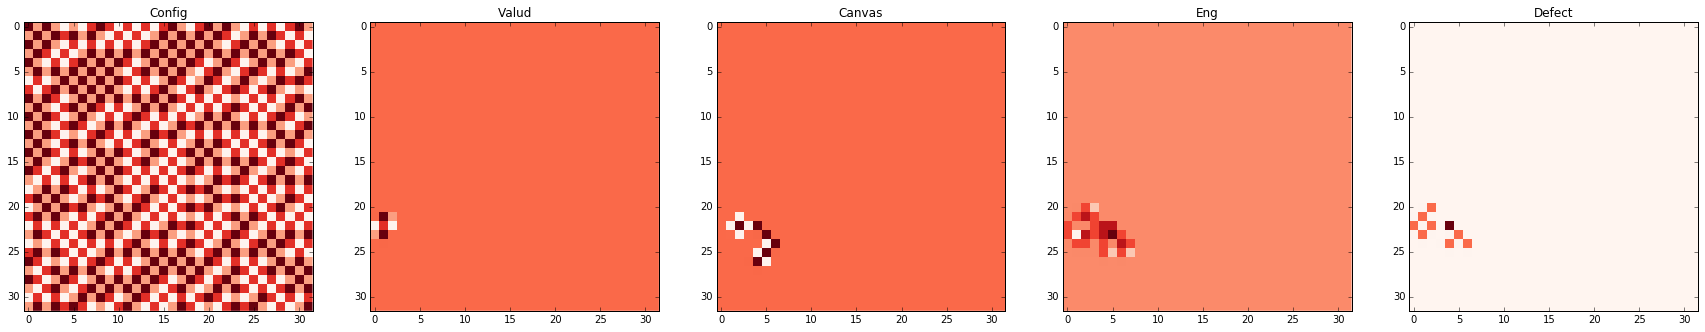

4
action: 6, reward: 0.0, terminate: False, returns: None


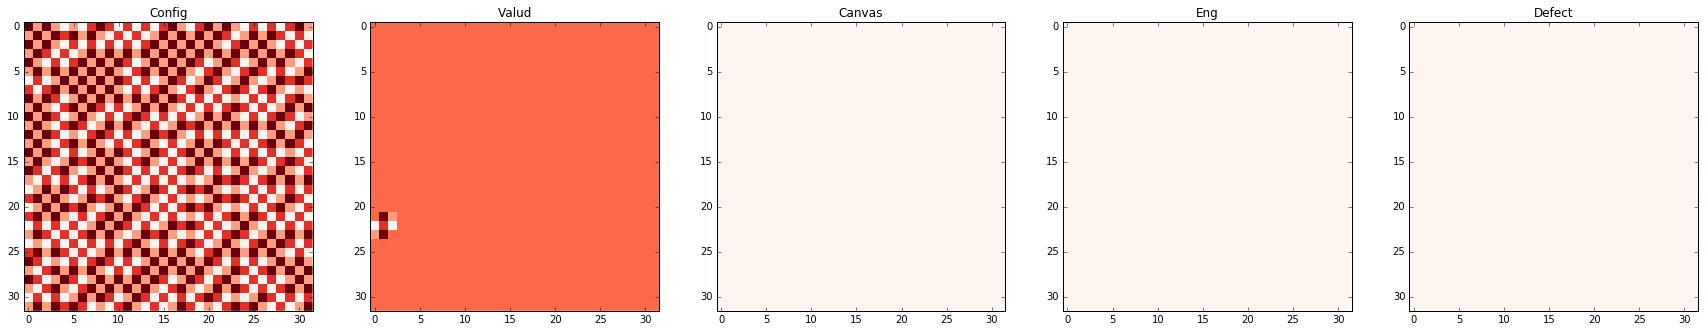

3
action: 6, reward: 0.0, terminate: False, returns: None


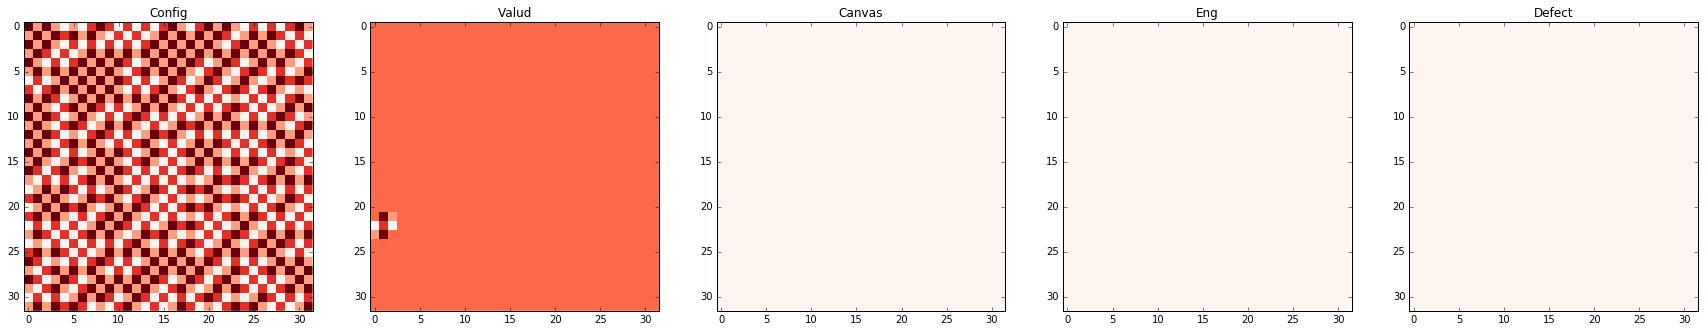

2
action: 0, reward: -0.0048828125, terminate: False, returns: None


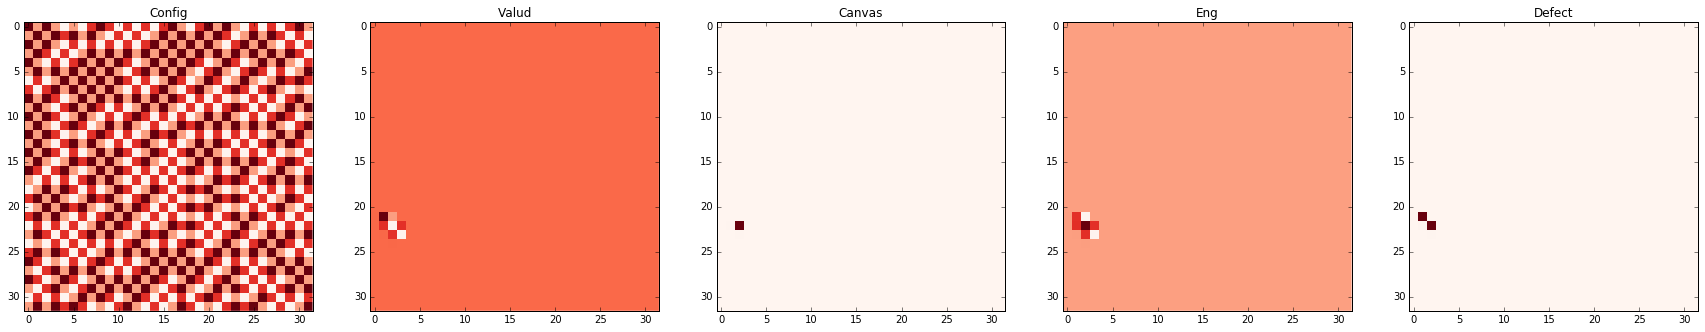

2
action: 6, reward: 0.0, terminate: False, returns: None


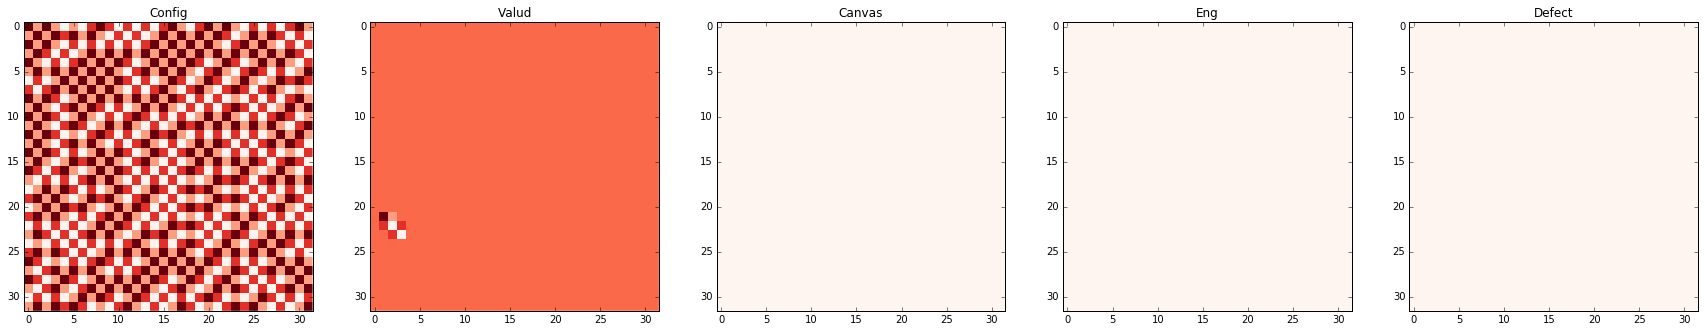

1
action: 5, reward: -0.0048828125, terminate: False, returns: None


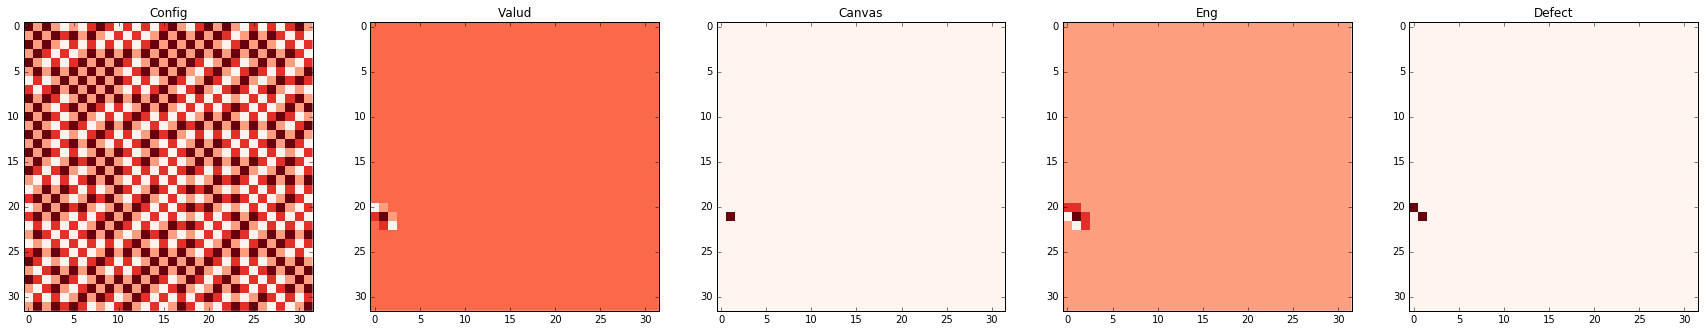

1
action: 6, reward: 0.0, terminate: False, returns: None


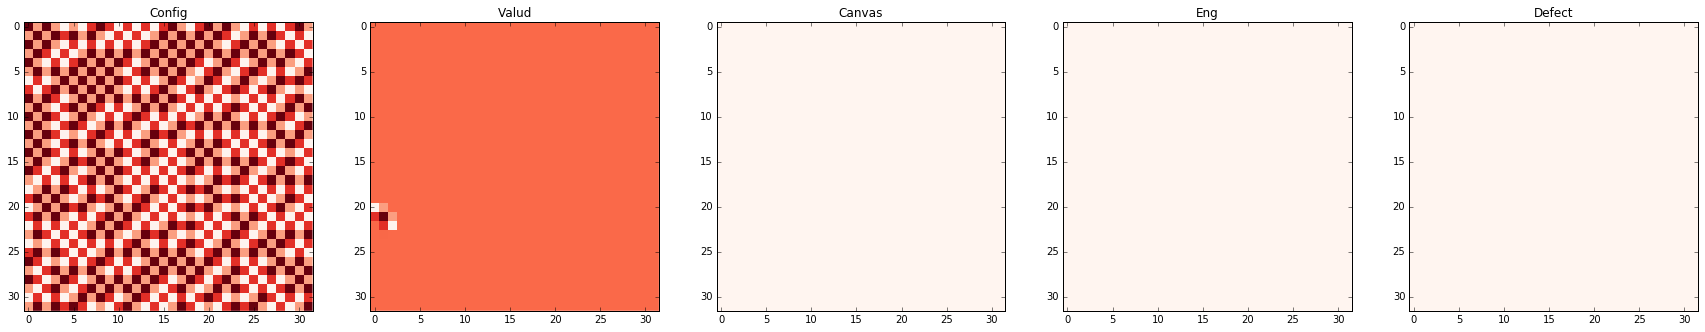

0
action: 0, reward: -0.0048828125, terminate: True, returns: None


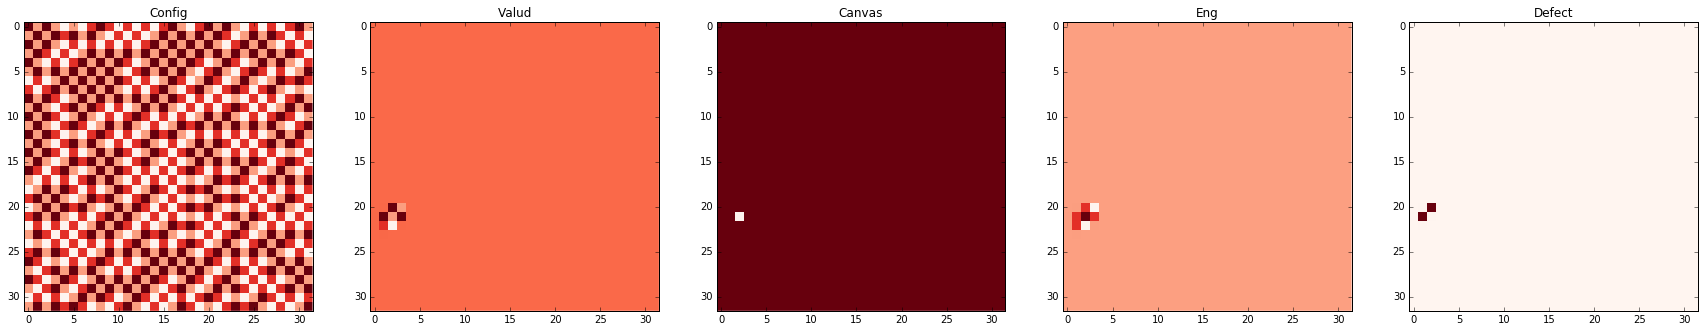

0
Episode 2: Reward = -0.1494140625
action: 5, reward: -0.0048828125, terminate: False, returns: None


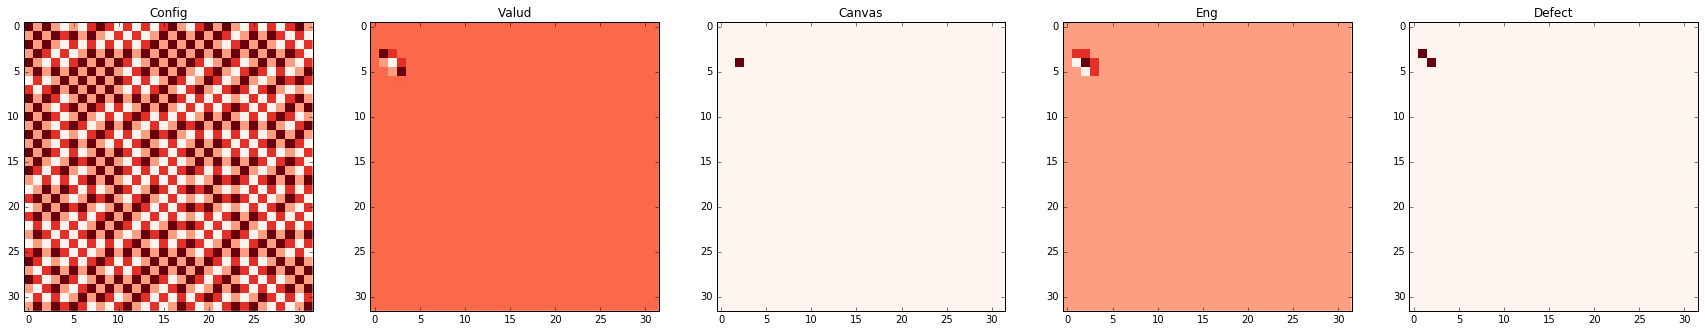

5
action: 3, reward: -0.001953125, terminate: False, returns: None


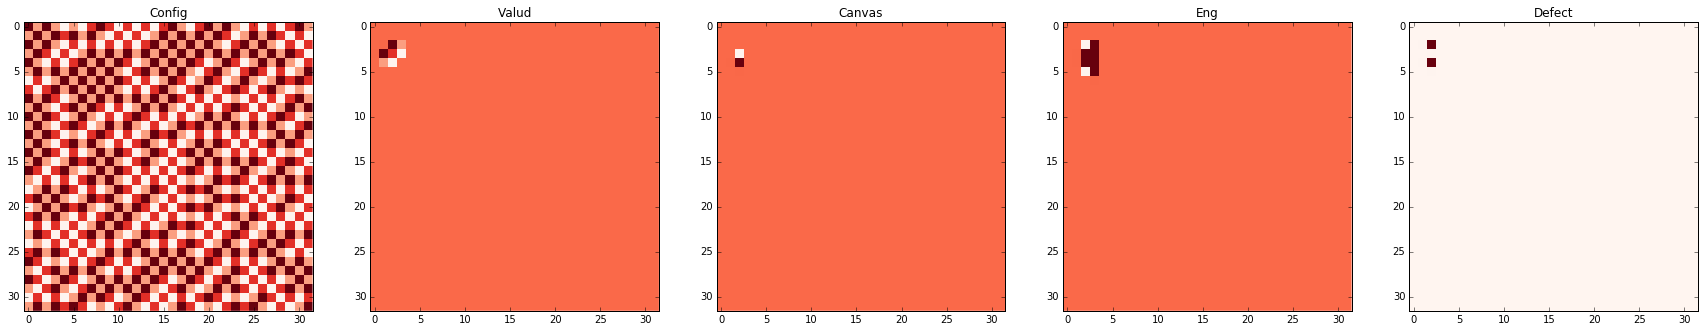

5
action: 4, reward: -0.0068359375, terminate: False, returns: None


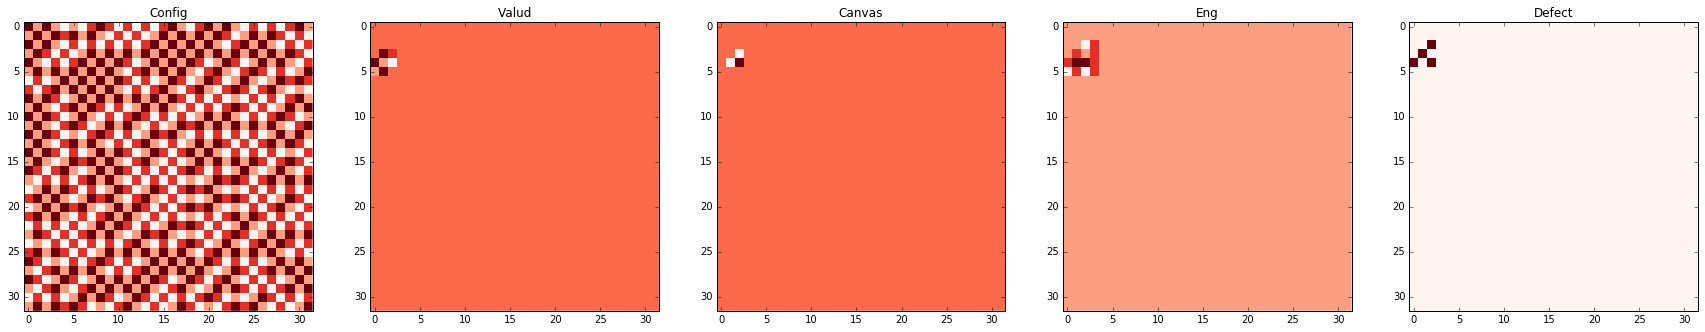

5
action: 5, reward: -0.0068359375, terminate: False, returns: None


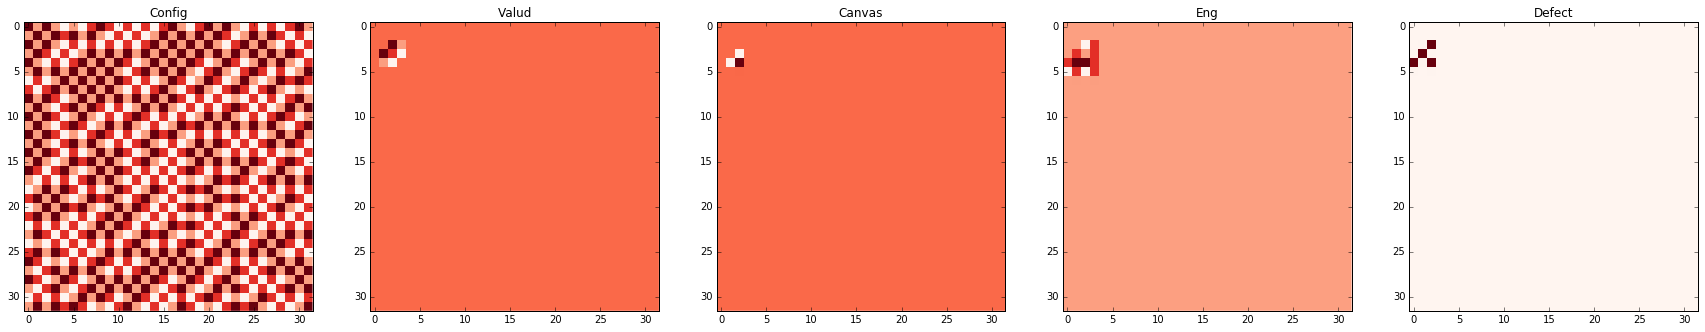

5
action: 5, reward: -0.0078125, terminate: False, returns: None


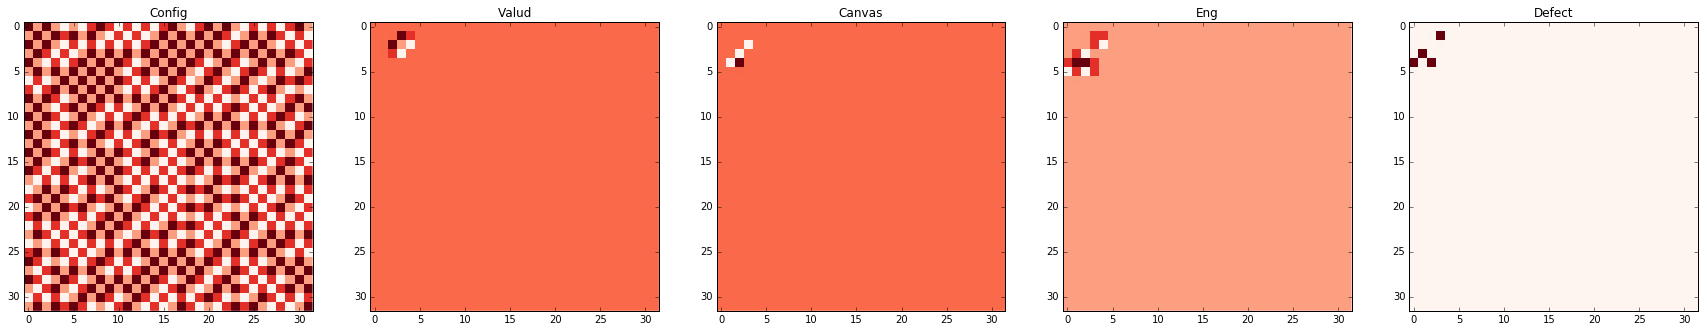

5
action: 6, reward: 0.0, terminate: False, returns: None


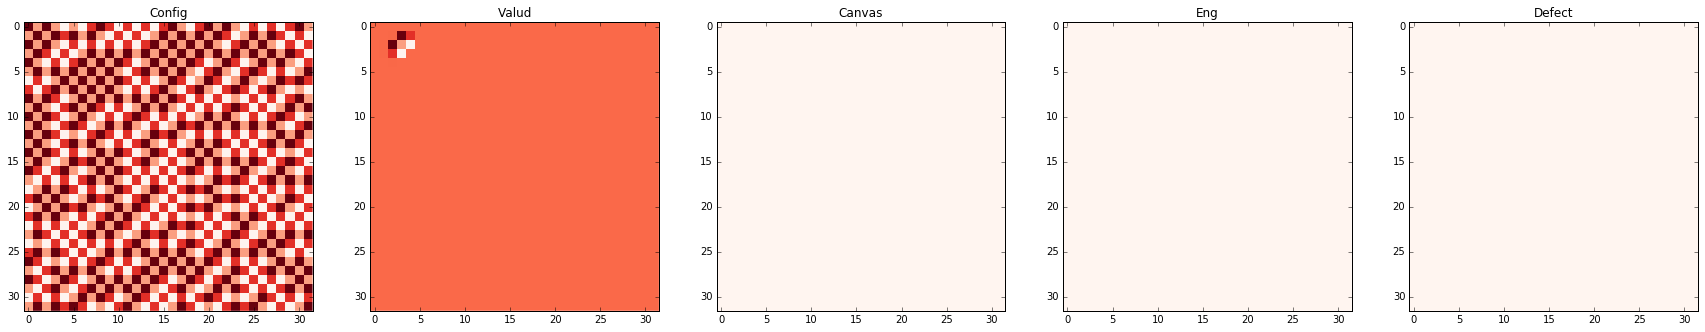

4
action: 2, reward: -0.0048828125, terminate: False, returns: None


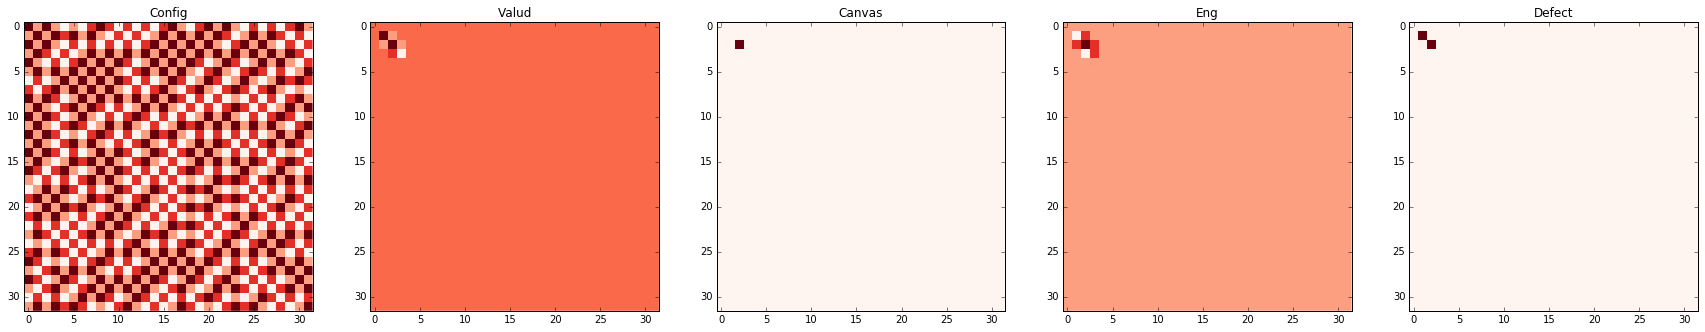

4
action: 6, reward: 0.0, terminate: False, returns: None


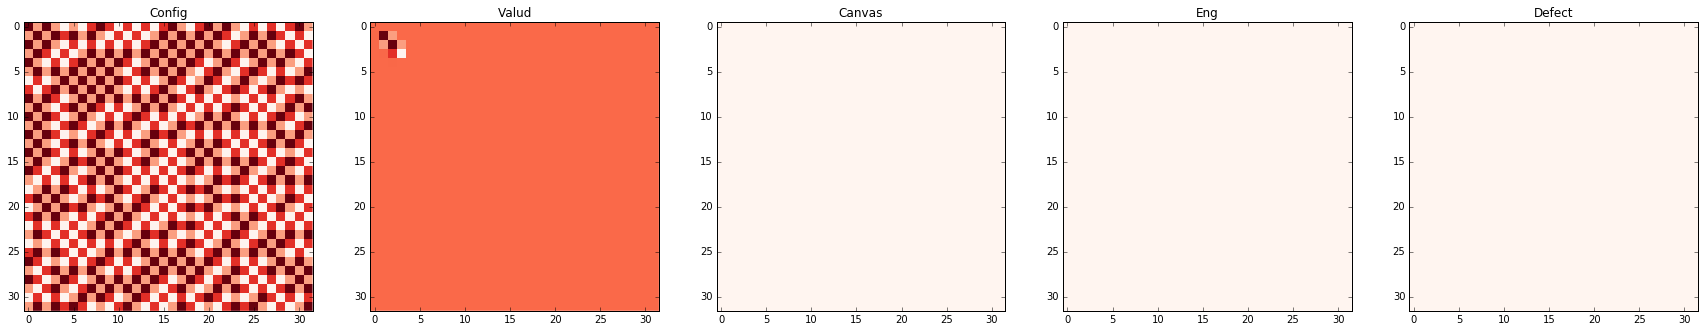

3
action: 6, reward: 0.0, terminate: False, returns: None


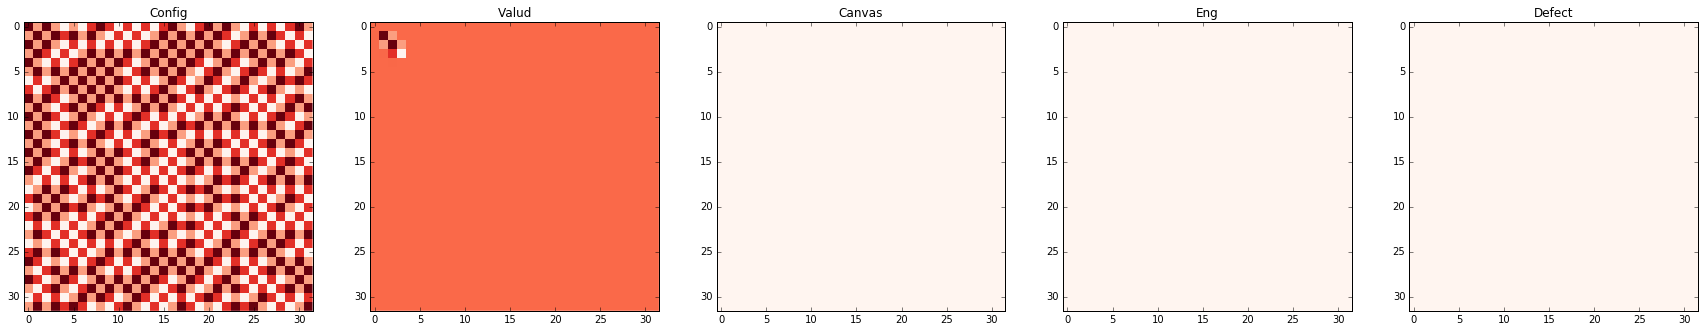

2
action: 3, reward: -0.0048828125, terminate: False, returns: None


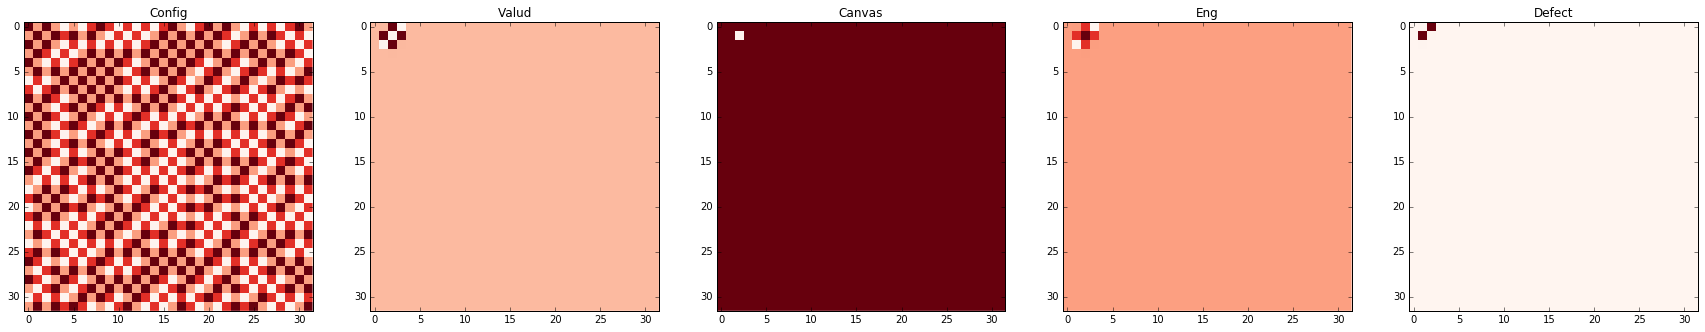

2
action: 0, reward: -0.001953125, terminate: False, returns: None


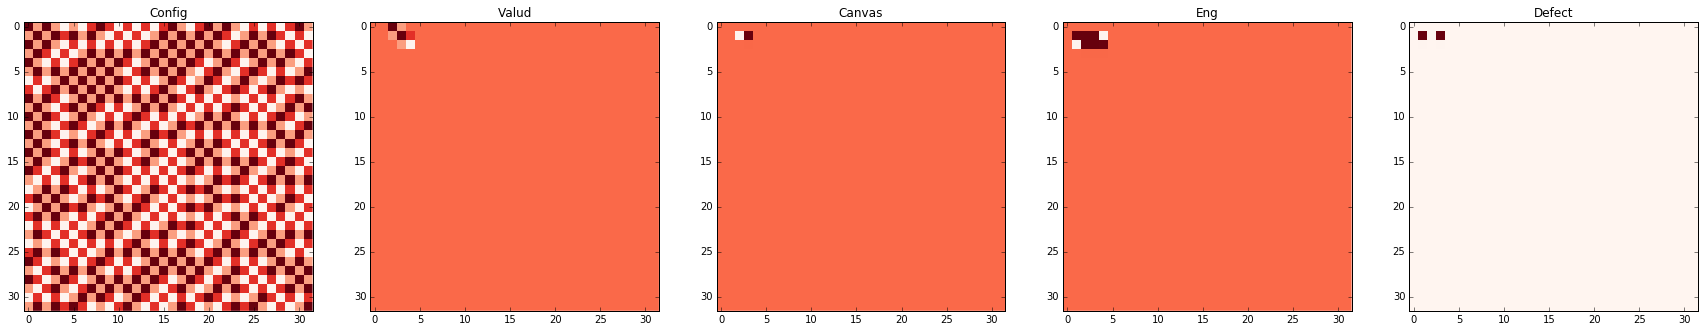

2
action: 4, reward: -0.0029296875, terminate: False, returns: None


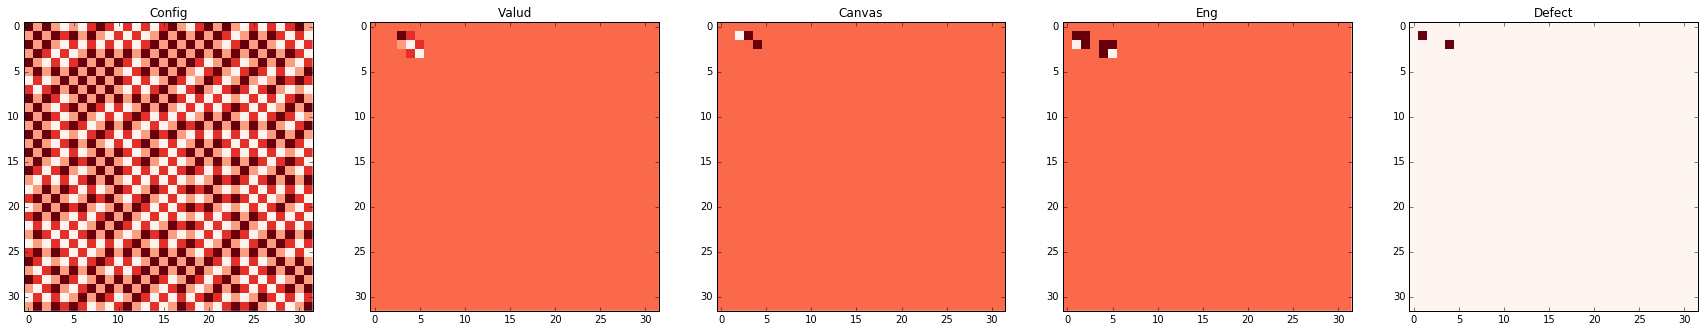

2
action: 4, reward: -0.01171875, terminate: False, returns: None


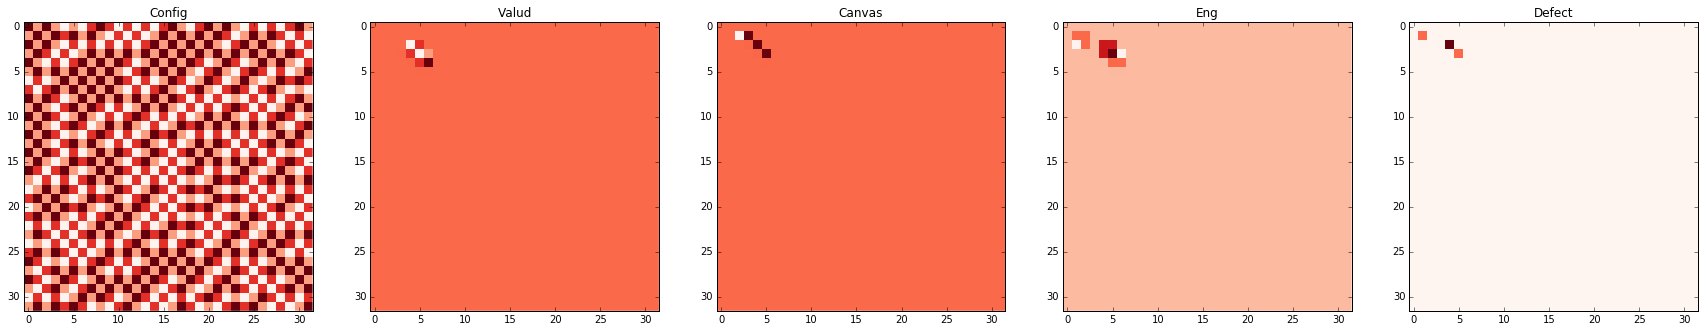

2
action: 1, reward: -0.0087890625, terminate: False, returns: None


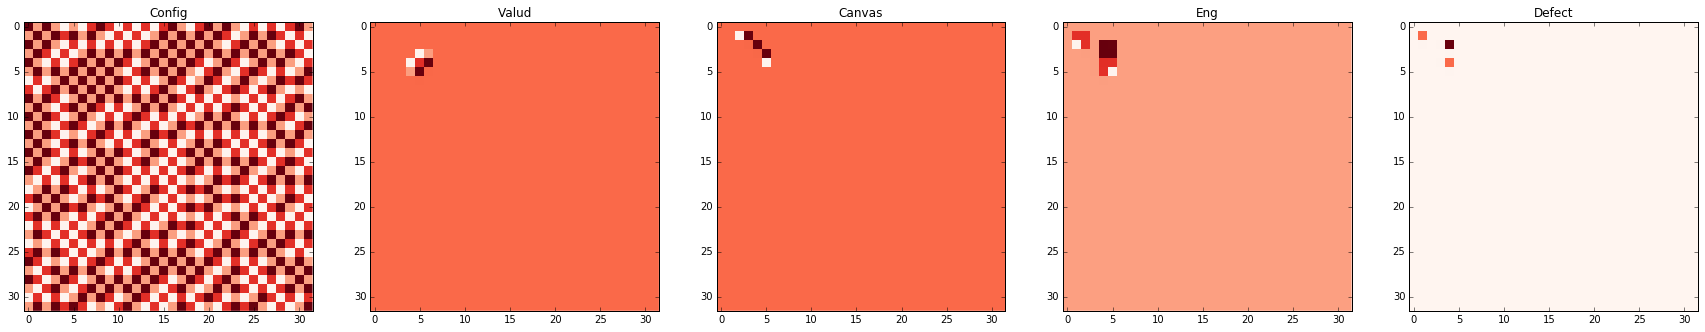

2
action: 4, reward: -0.009765625, terminate: False, returns: None


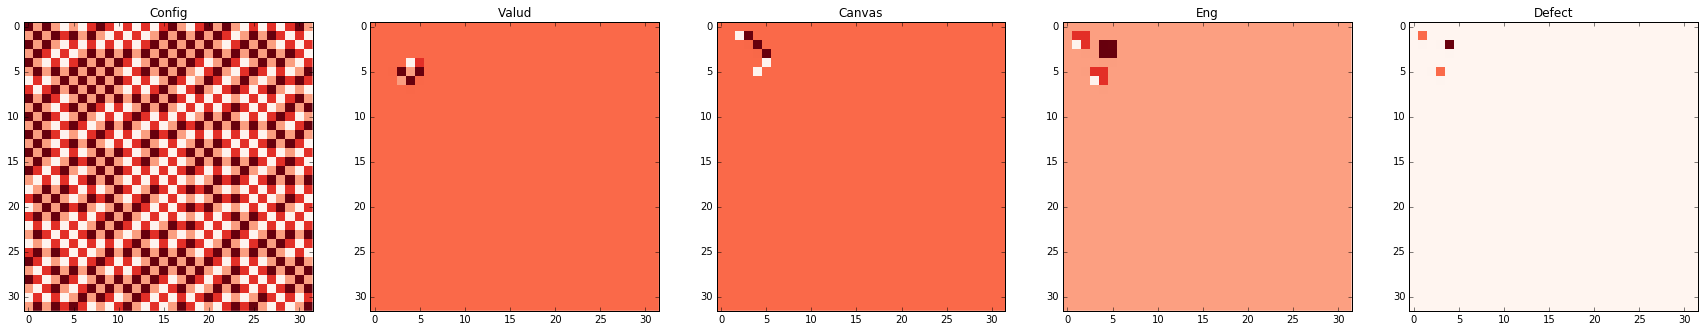

2
action: 2, reward: -0.0068359375, terminate: False, returns: None


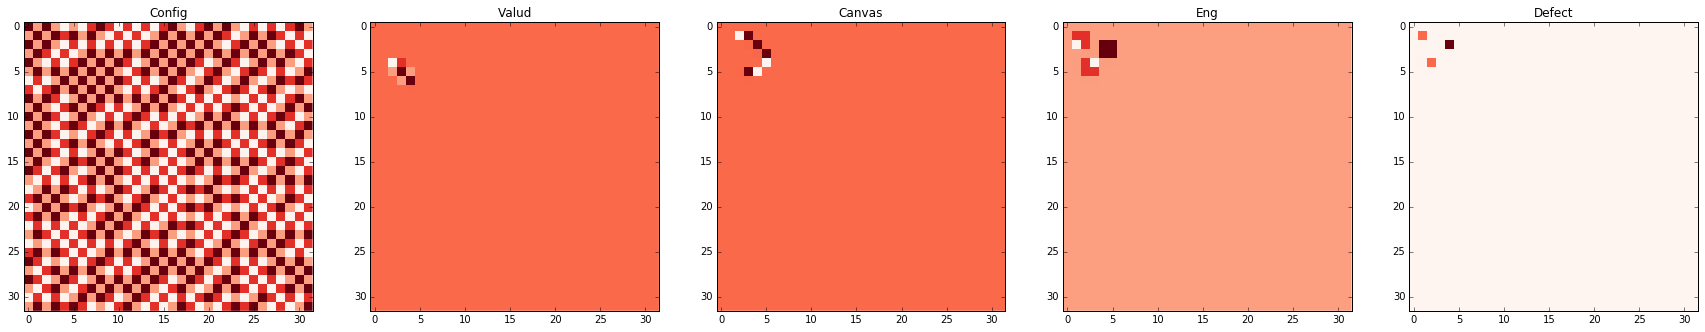

2
action: 6, reward: 0.0, terminate: False, returns: None


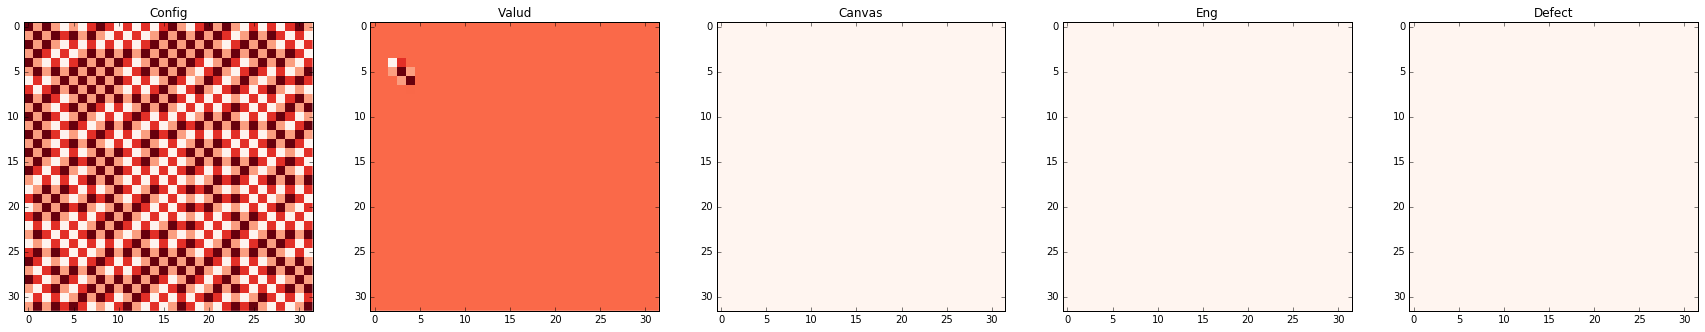

1
action: 5, reward: -0.0048828125, terminate: False, returns: None


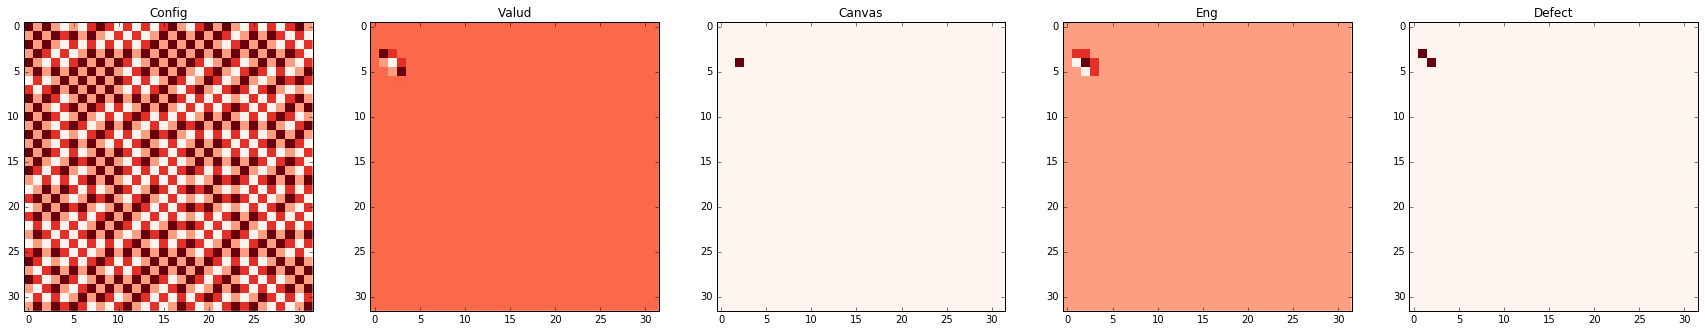

1
action: 1, reward: -0.013671875, terminate: False, returns: None


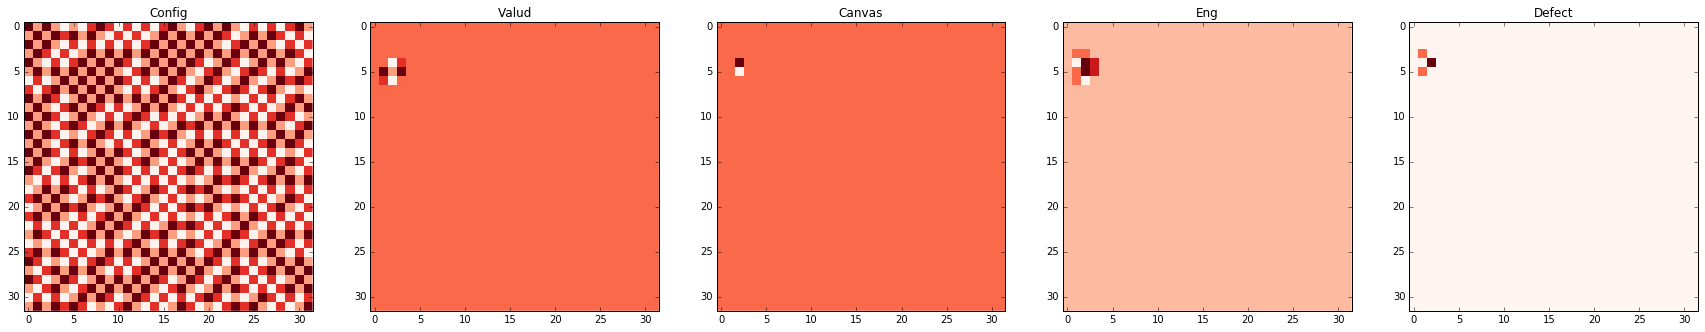

1
action: 4, reward: -0.0107421875, terminate: False, returns: None


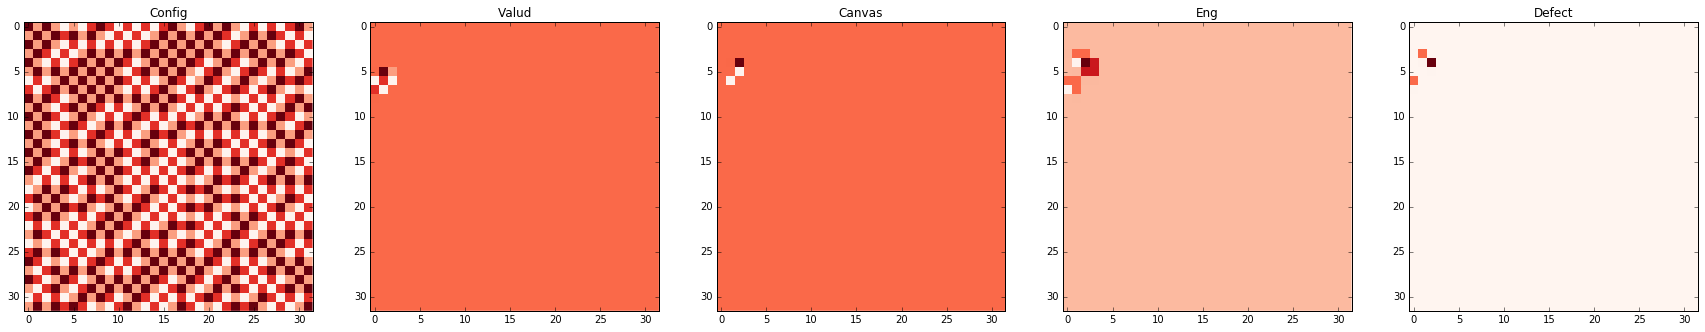

1
action: 2, reward: -0.01171875, terminate: False, returns: None


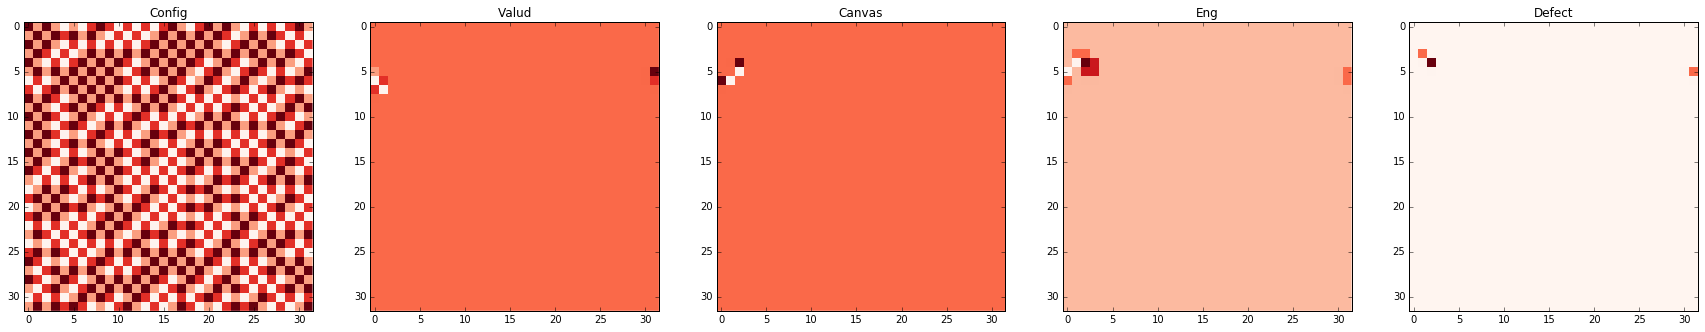

1
action: 6, reward: 0.0, terminate: False, returns: None


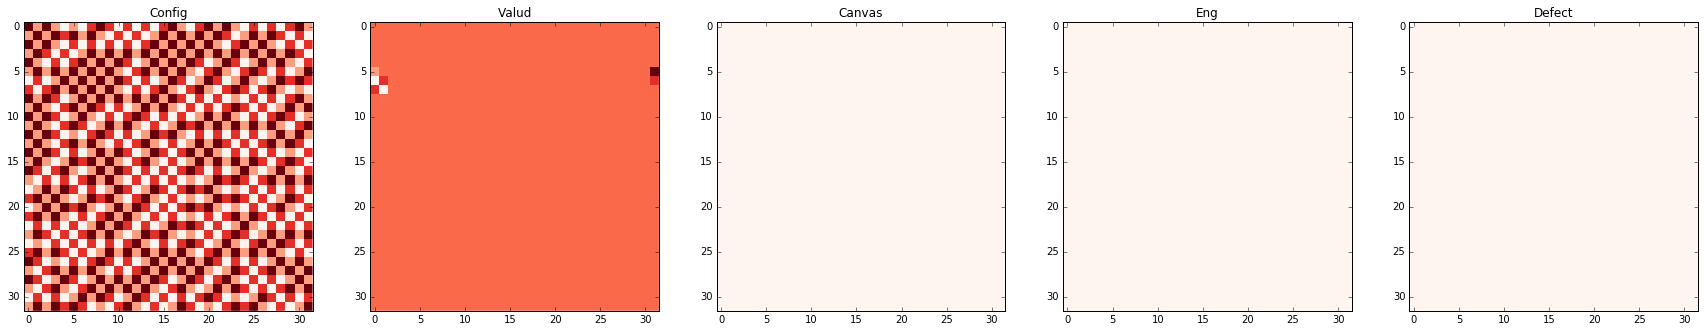

0
action: 0, reward: -0.0048828125, terminate: True, returns: None


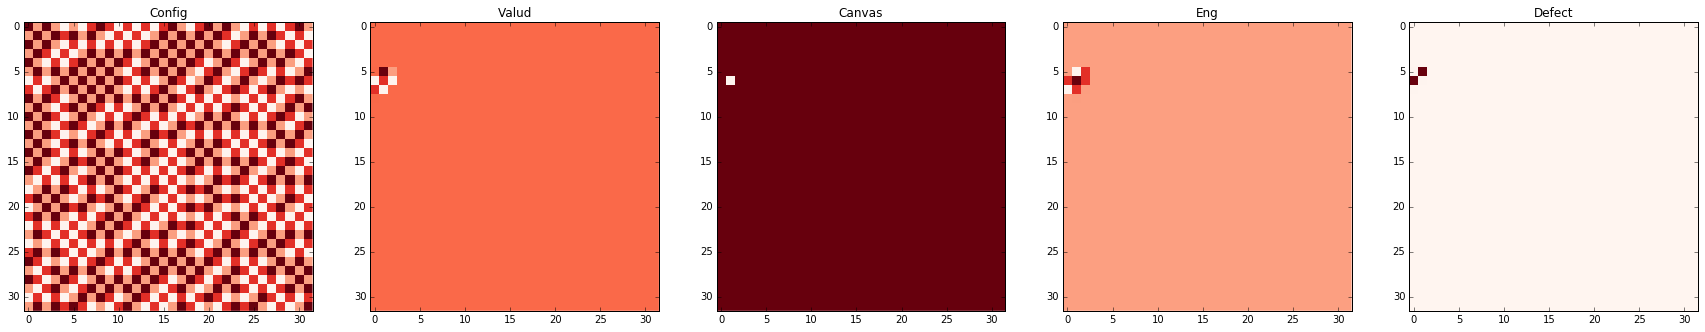

0
Episode 3: Reward = -0.1259765625
action: 4, reward: -0.0048828125, terminate: False, returns: None


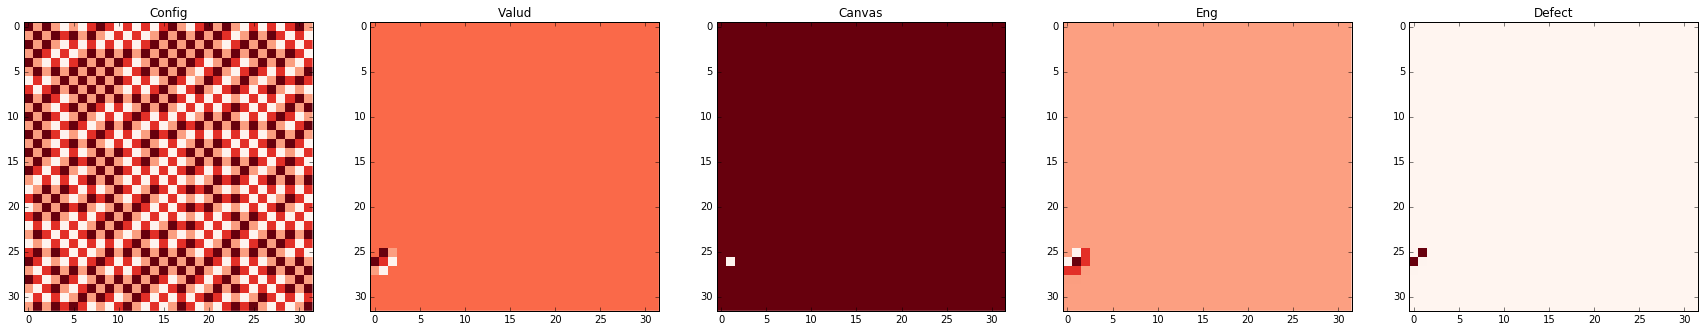

5
action: 5, reward: -0.001953125, terminate: False, returns: None


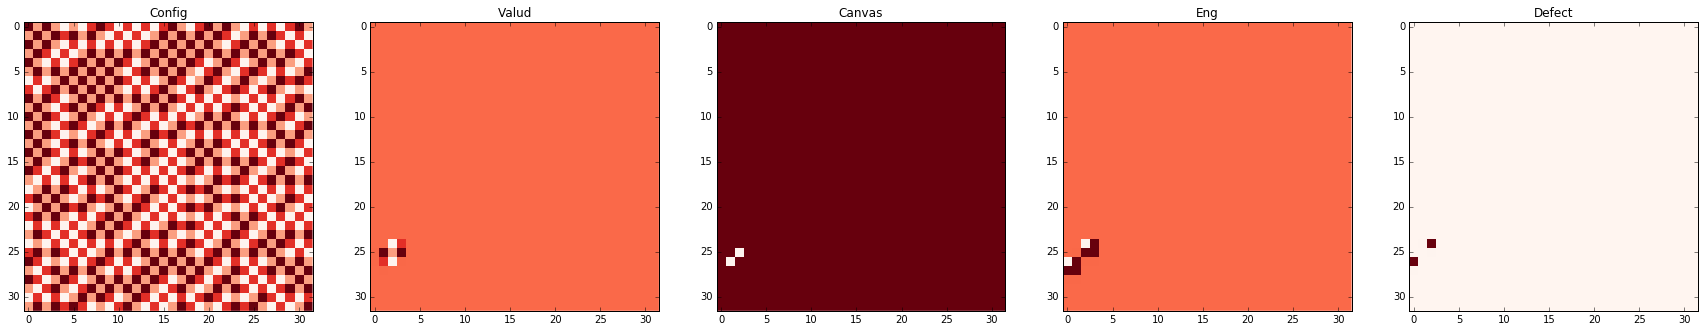

5
action: 3, reward: -0.0107421875, terminate: False, returns: None


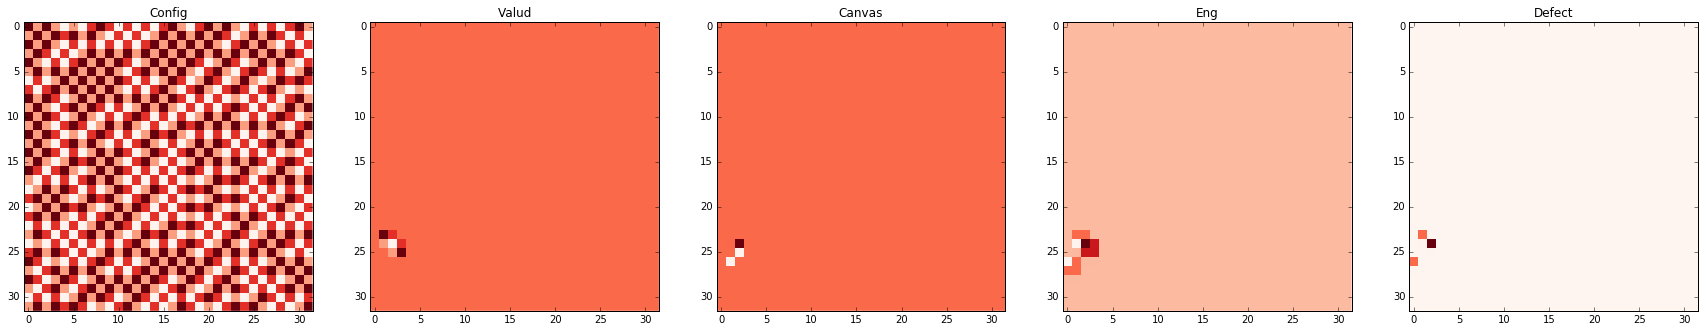

5
action: 2, reward: -0.01953125, terminate: False, returns: None


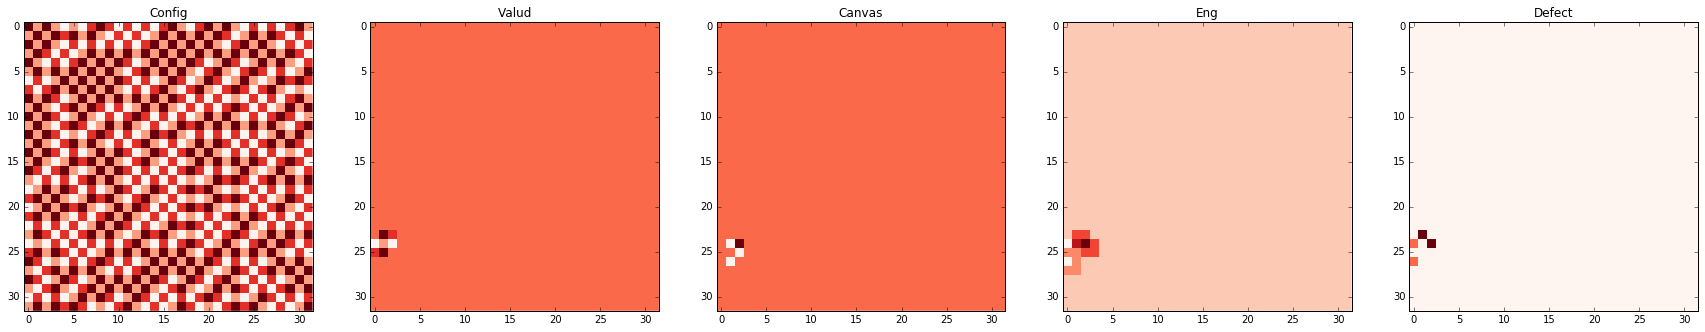

5
action: 5, reward: -0.0126953125, terminate: False, returns: None


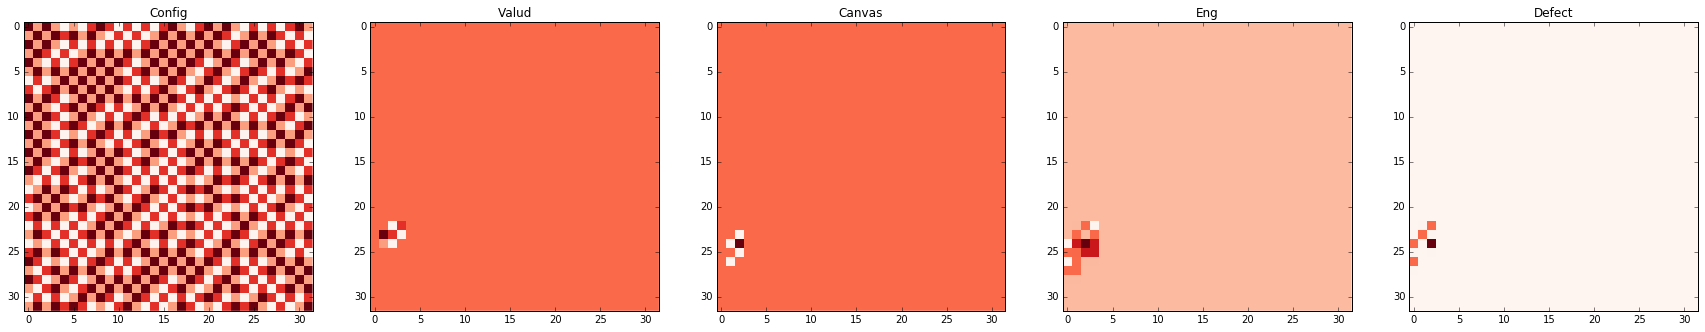

5
action: 6, reward: 0.0, terminate: False, returns: None


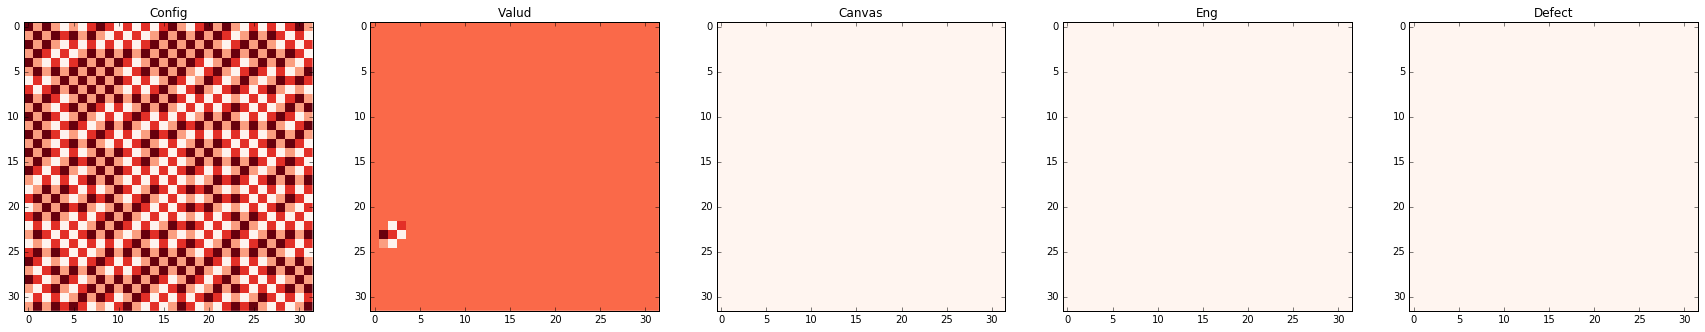

4
action: 3, reward: -0.0048828125, terminate: False, returns: None


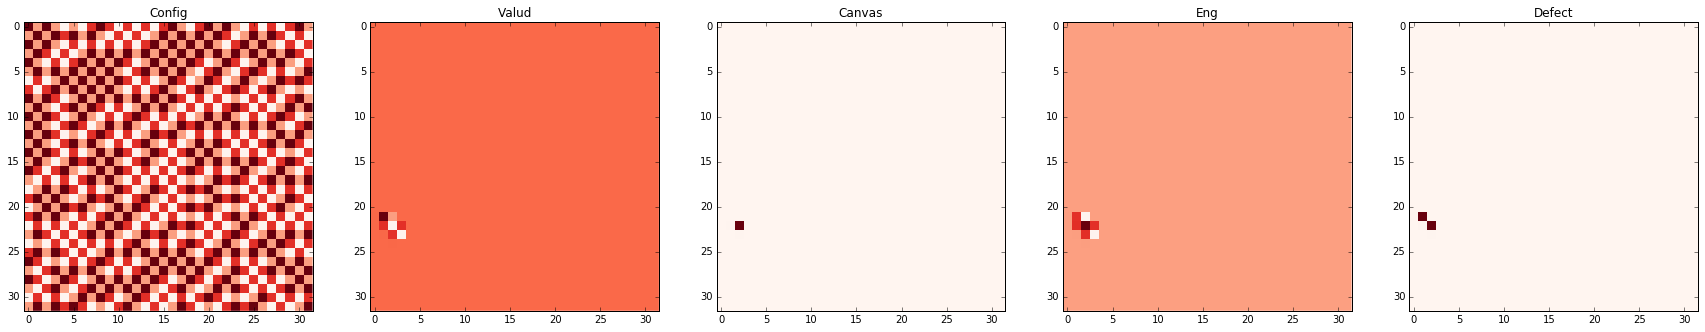

4
action: 1, reward: -0.001953125, terminate: False, returns: None


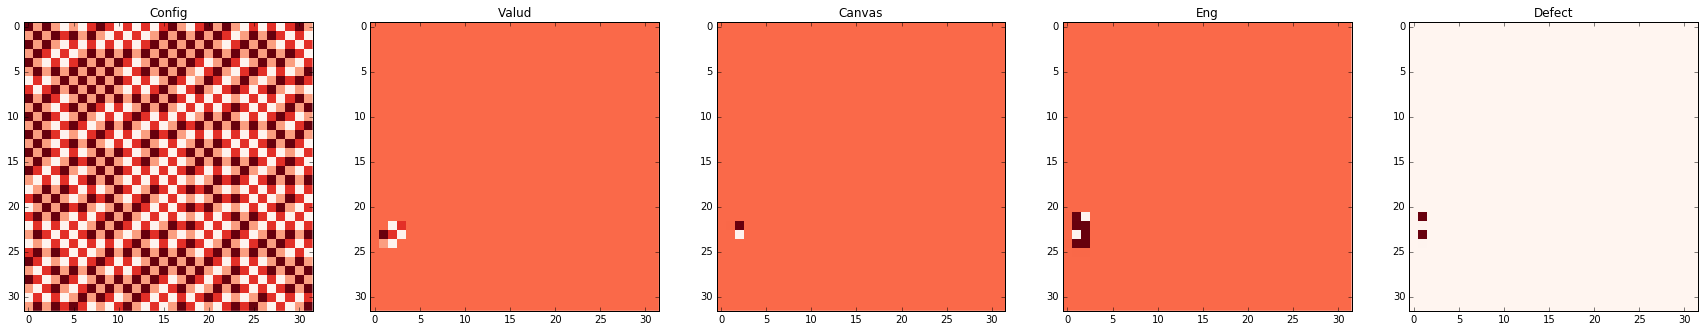

4
action: 4, reward: -0.0029296875, terminate: False, returns: None


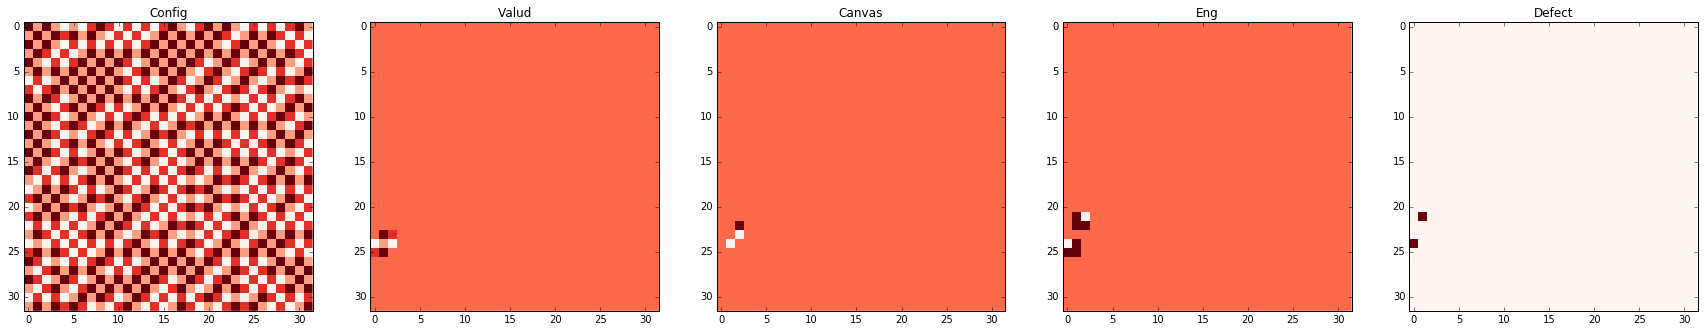

4
action: 0, reward: -0.0078125, terminate: False, returns: None


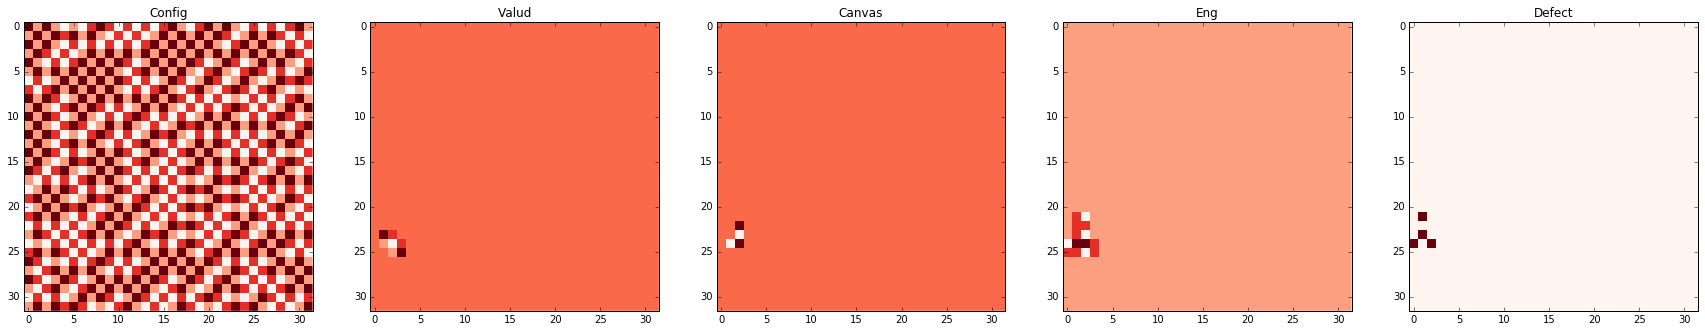

4
action: 1, reward: -0.0166015625, terminate: False, returns: None


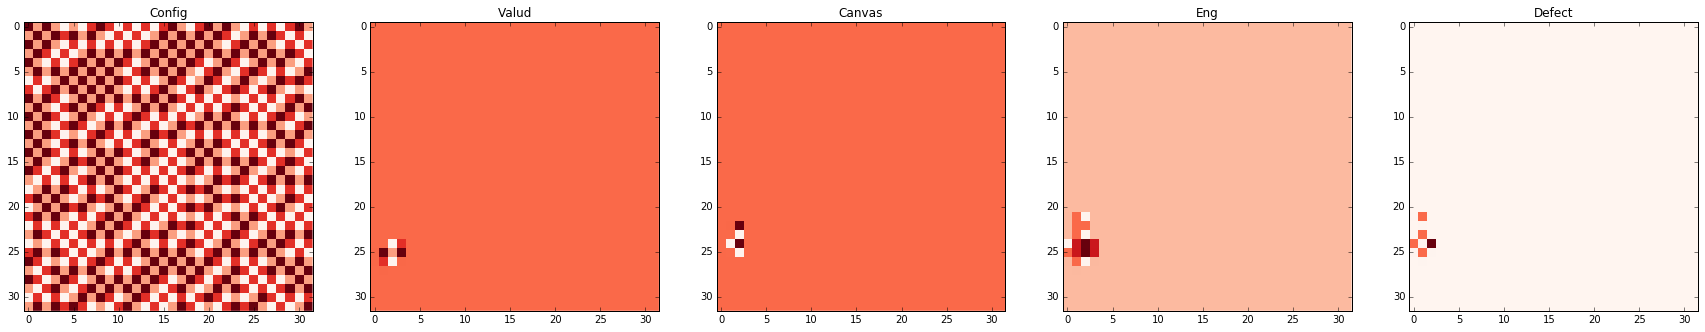

4
action: 1, reward: -0.025390625, terminate: False, returns: None


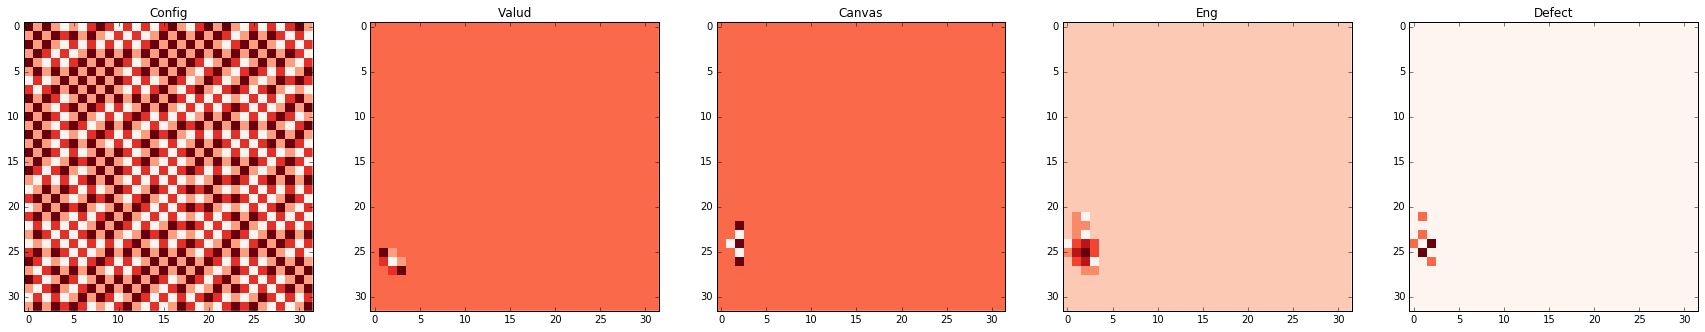

4
action: 4, reward: -0.0224609375, terminate: False, returns: None


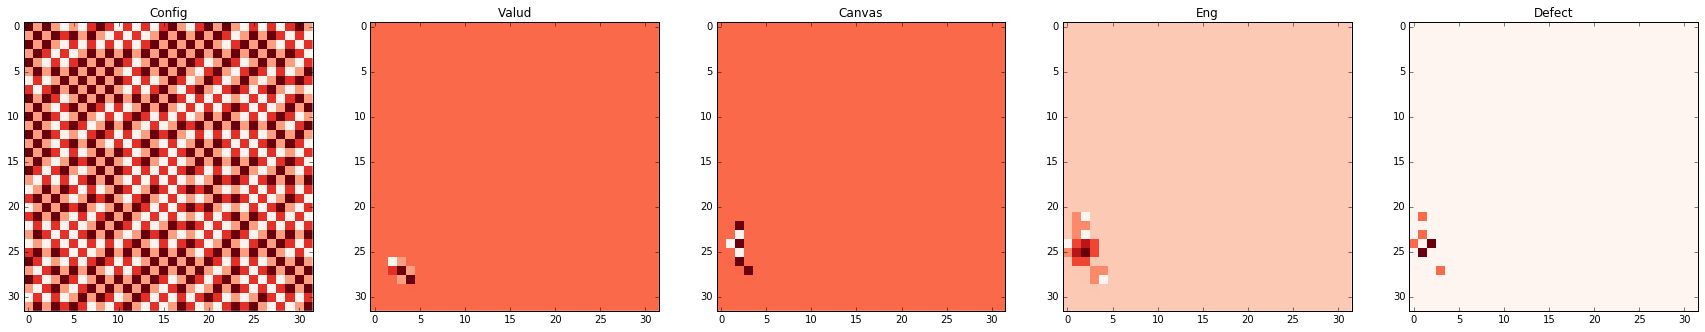

4
action: 4, reward: -0.02734375, terminate: False, returns: None


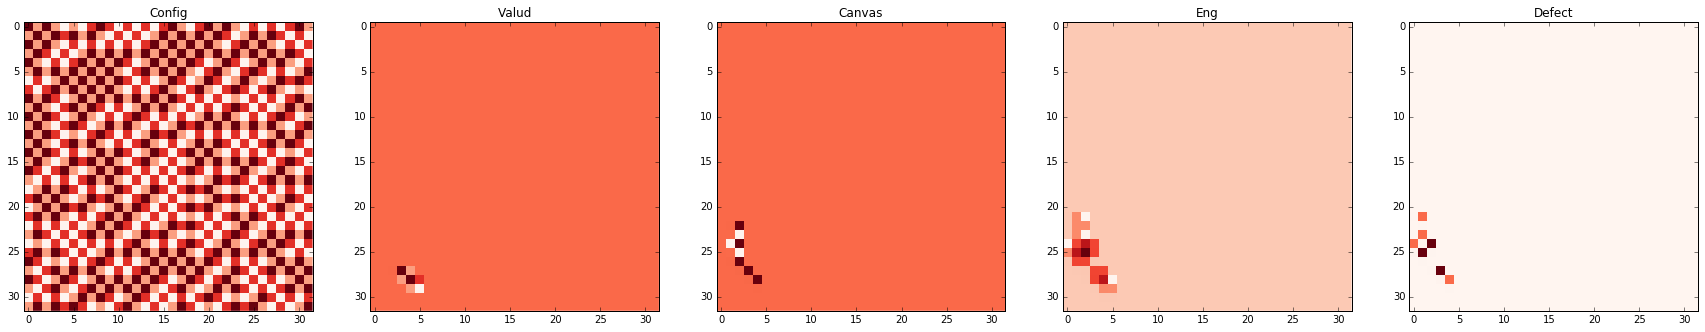

4
action: 2, reward: -0.0244140625, terminate: False, returns: None


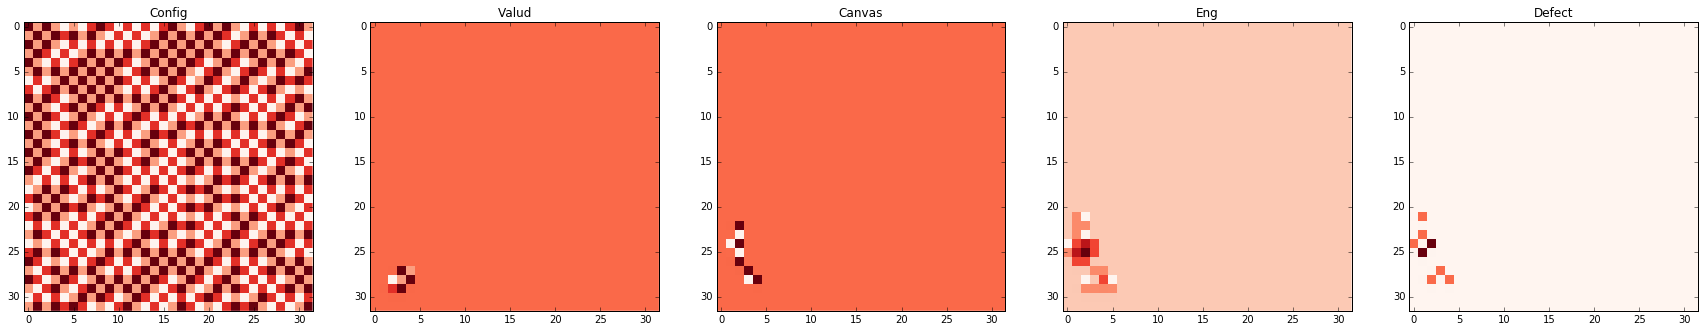

4
action: 3, reward: -0.0244140625, terminate: False, returns: None


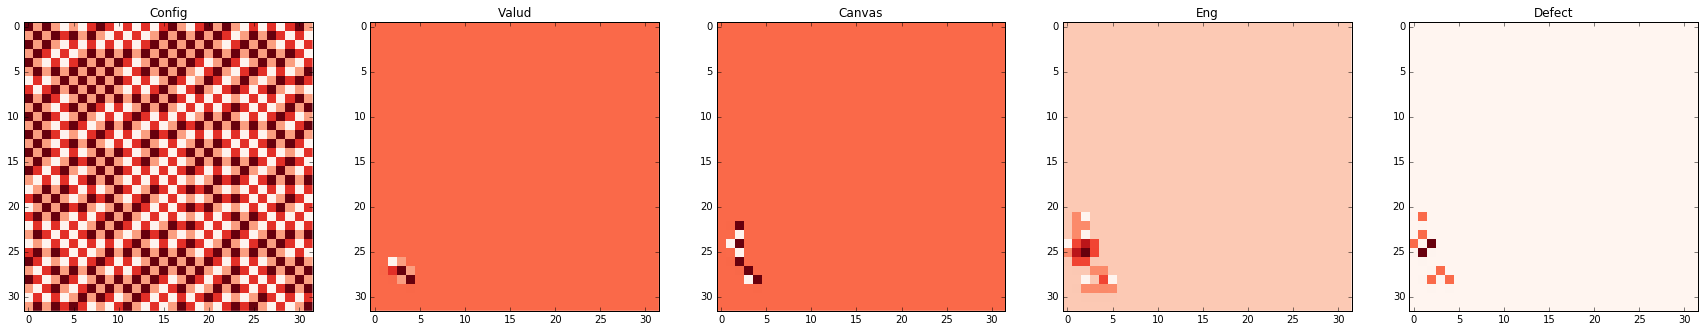

4
action: 6, reward: 0.0, terminate: False, returns: None


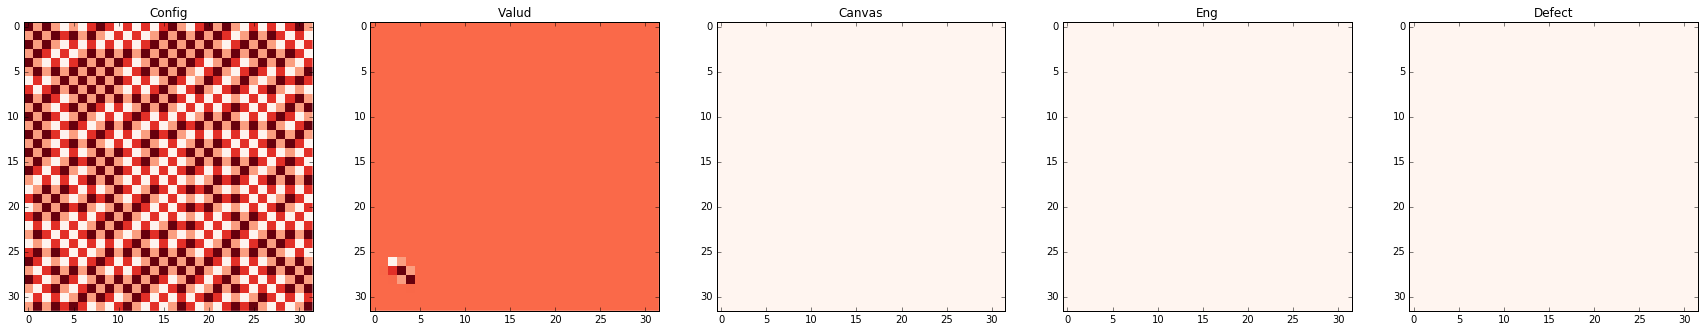

3
action: 5, reward: -0.0048828125, terminate: False, returns: None


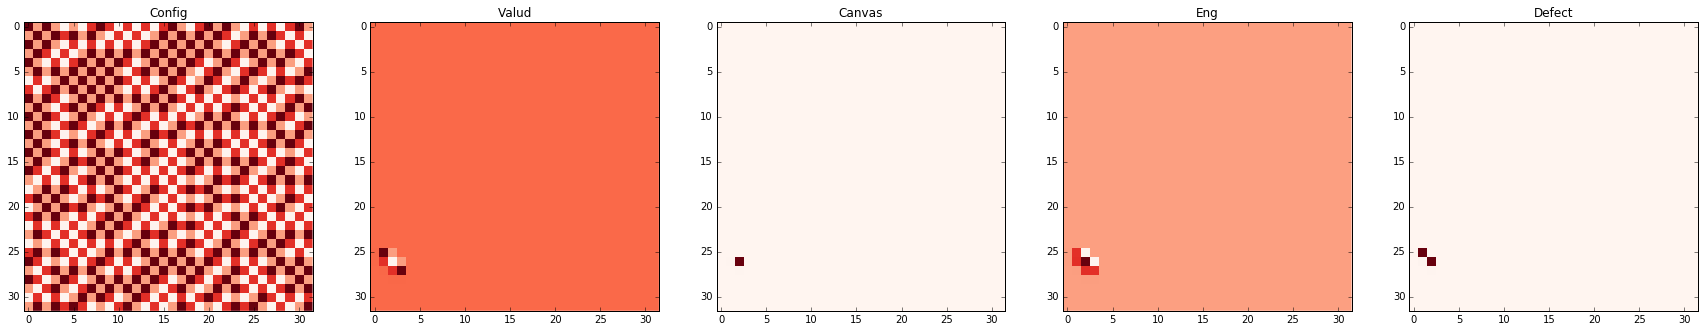

3
action: 1, reward: -0.001953125, terminate: False, returns: None


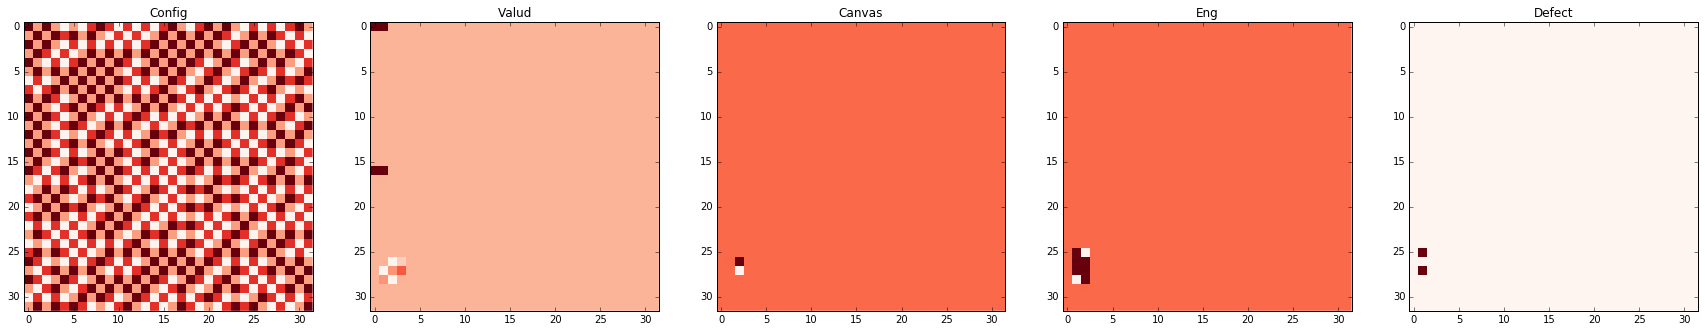

3
action: 2, reward: -0.0029296875, terminate: False, returns: None


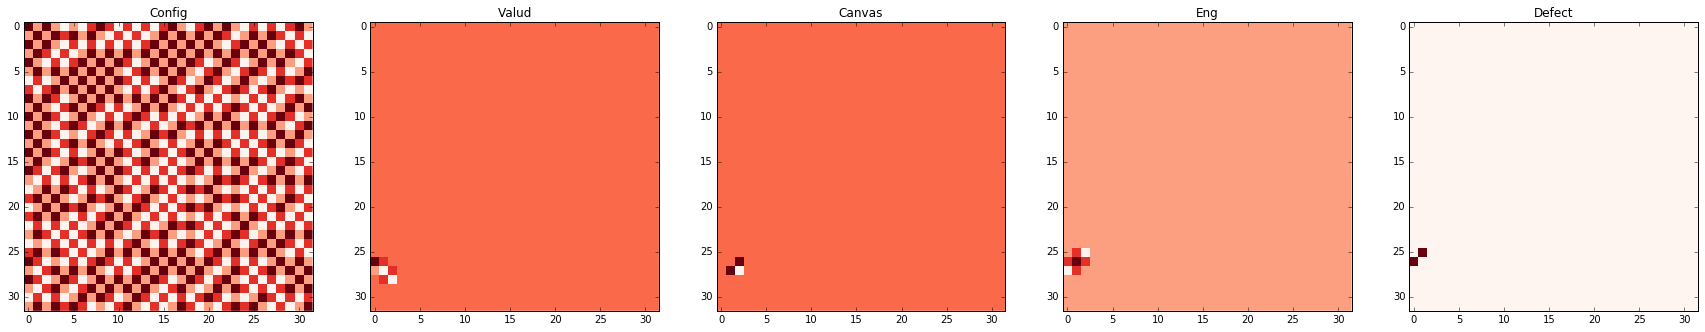

3
action: 5, reward: 0.0, terminate: False, returns: None


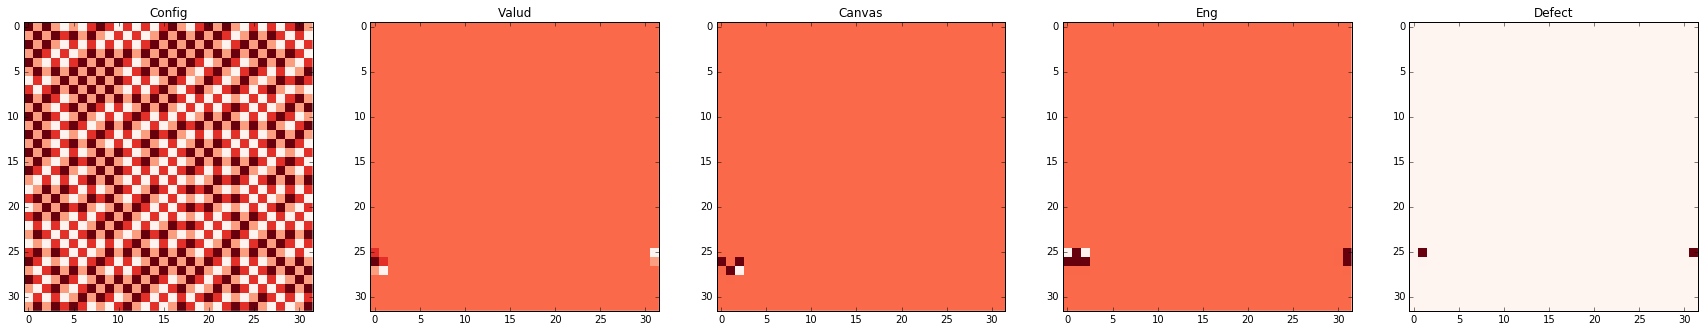

3
action: 0, reward: -0.0009765625, terminate: False, returns: None


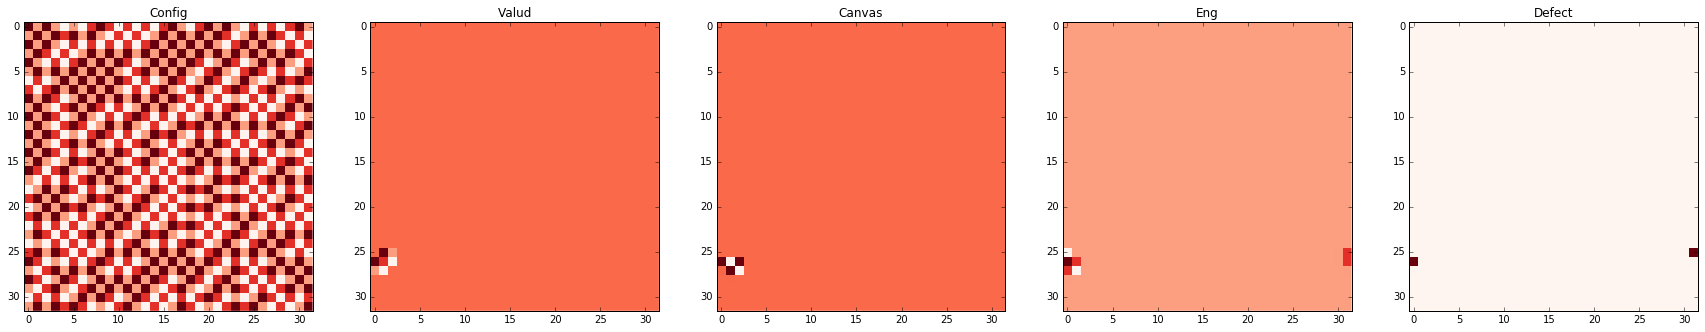

3
action: 0, reward: -0.0009765625, terminate: False, returns: None


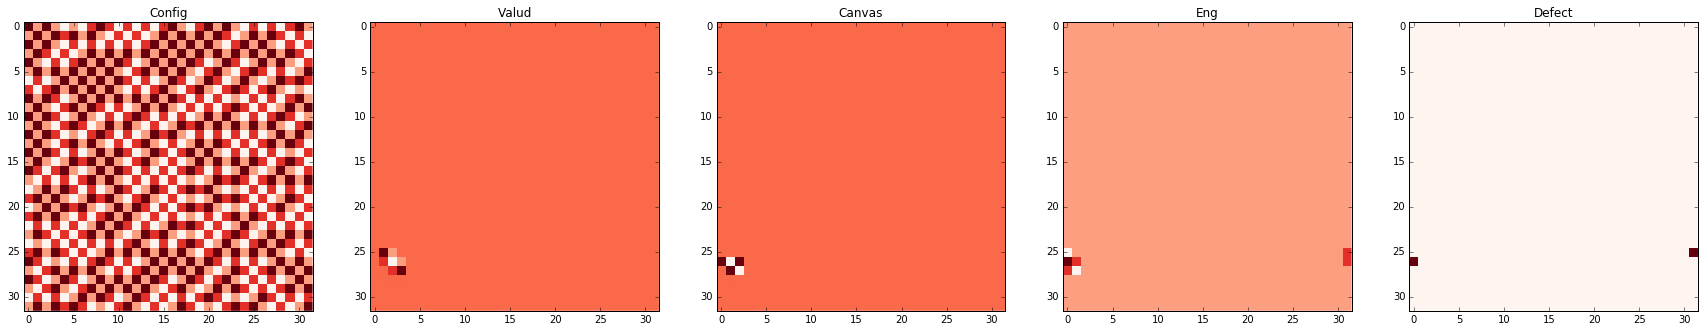

3
action: 5, reward: -0.005859375, terminate: False, returns: None


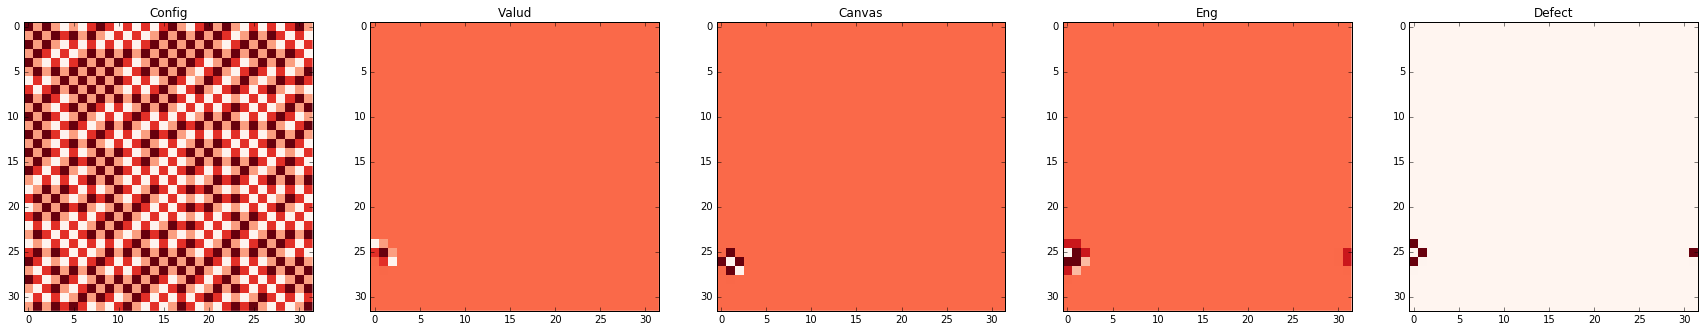

3
action: 2, reward: -0.0185546875, terminate: False, returns: None


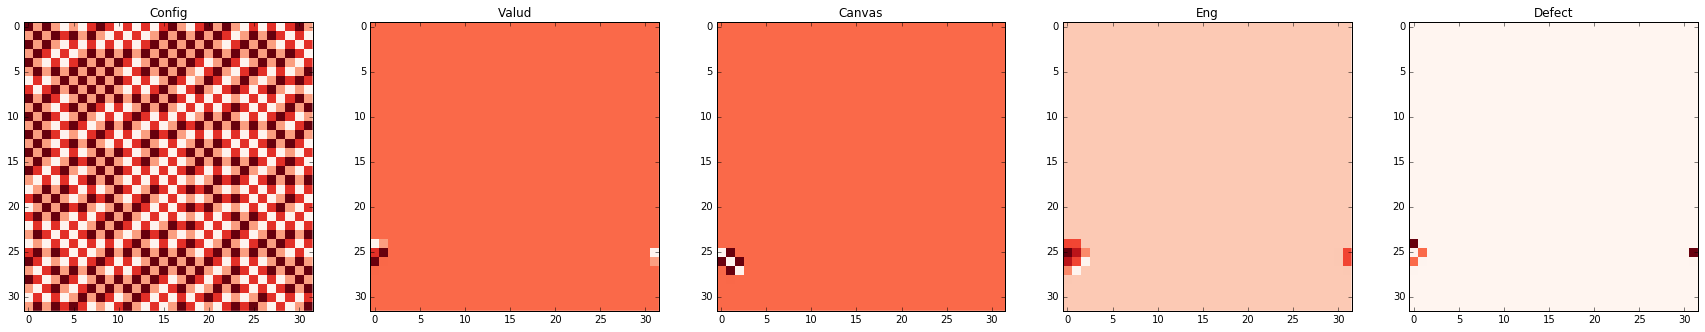

3
action: 6, reward: 0.0, terminate: False, returns: None


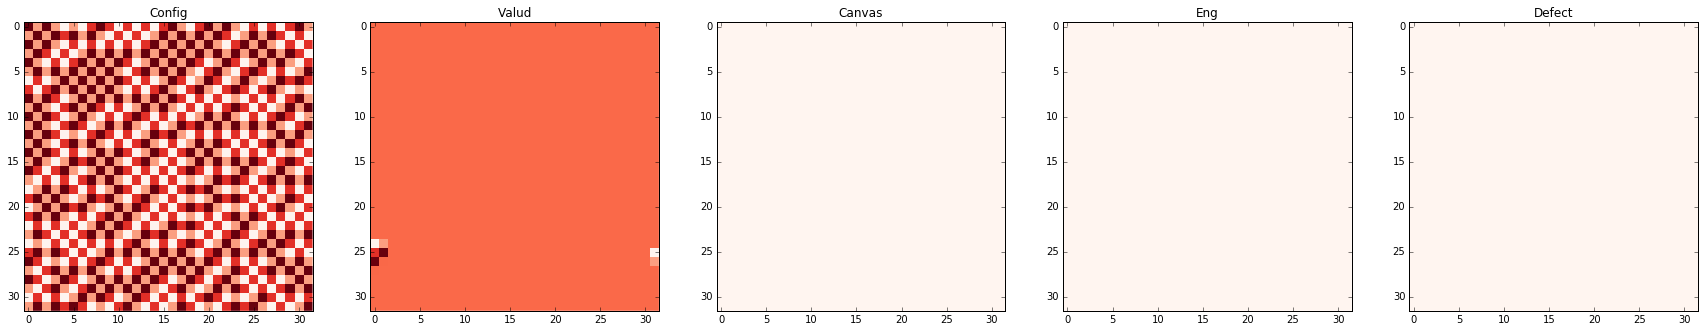

2
action: 5, reward: -0.0048828125, terminate: False, returns: None


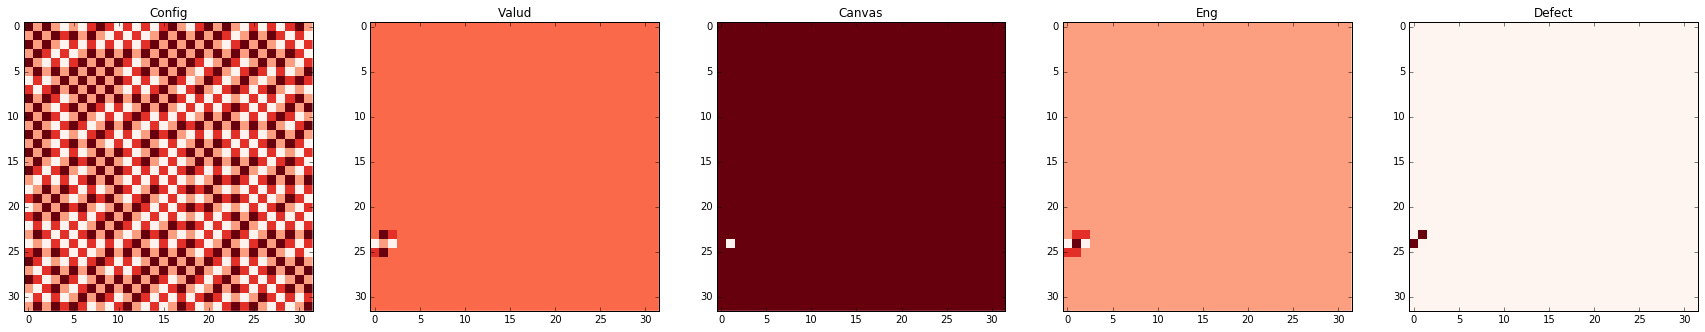

2
action: 2, reward: -0.013671875, terminate: False, returns: None


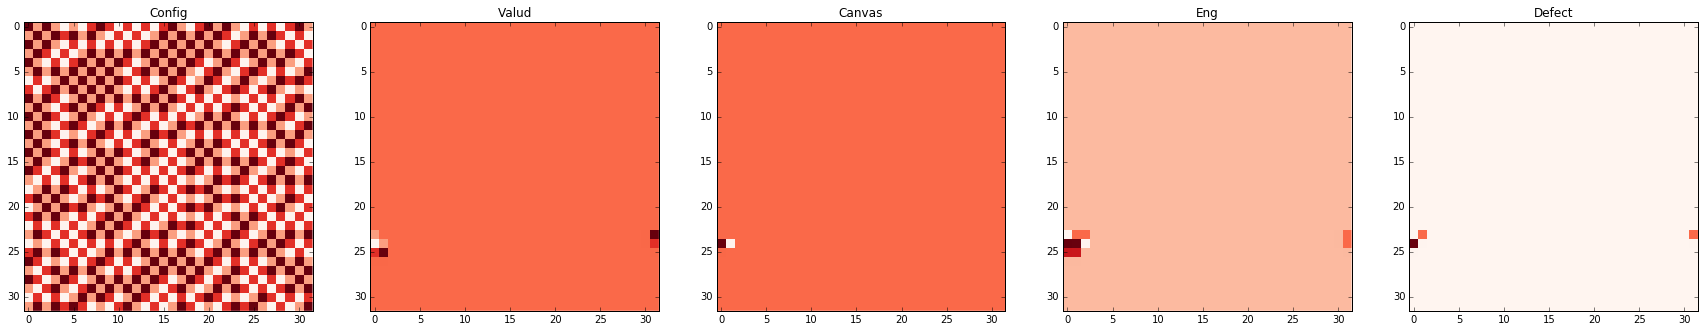

2
action: 4, reward: -0.0068359375, terminate: False, returns: None


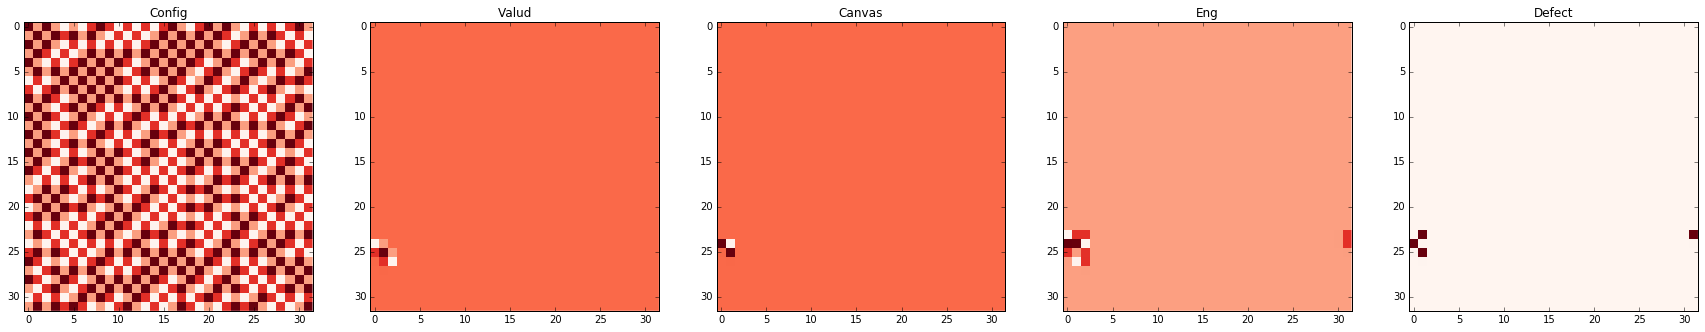

2
action: 0, reward: -0.0078125, terminate: False, returns: None


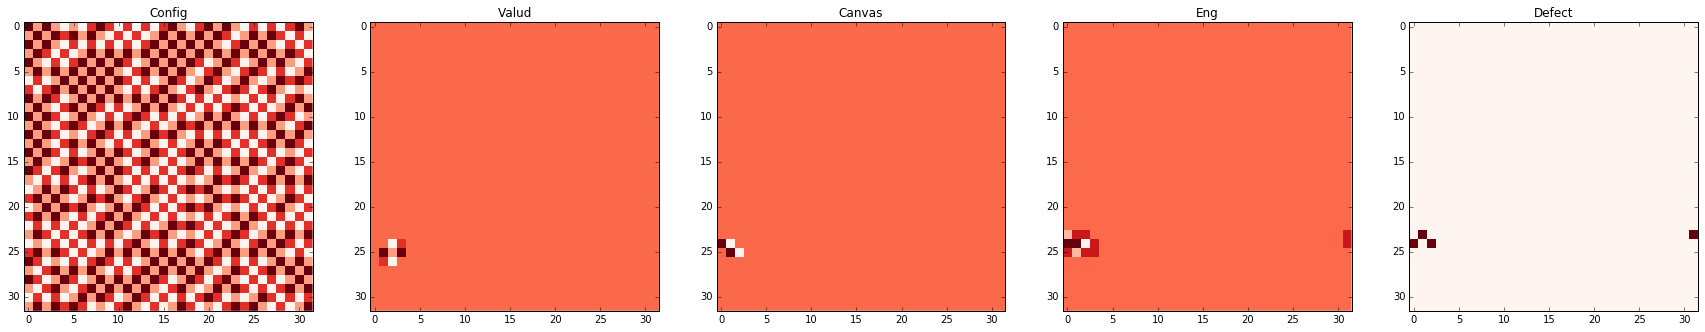

2
action: 1, reward: -0.0126953125, terminate: False, returns: None


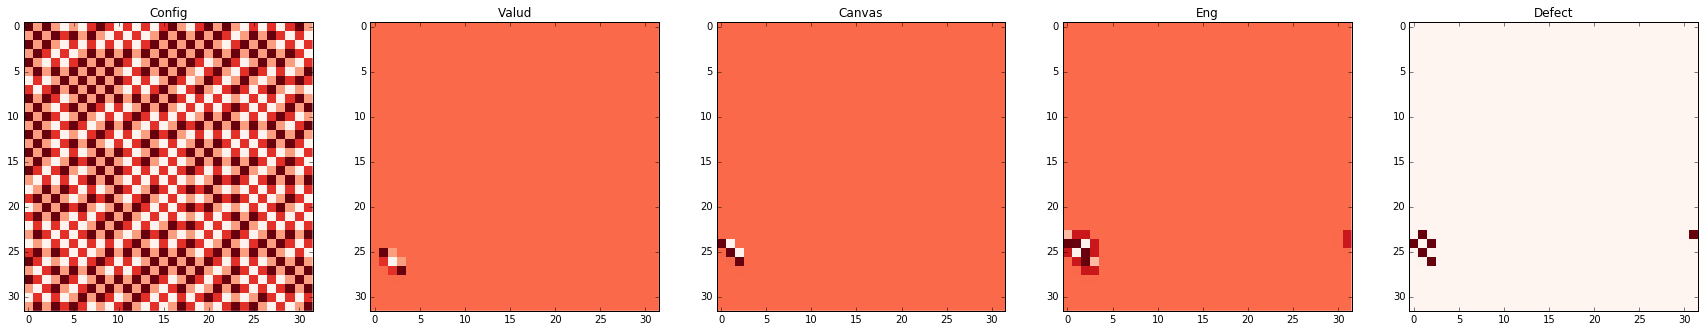

2
action: 0, reward: -0.021484375, terminate: False, returns: None


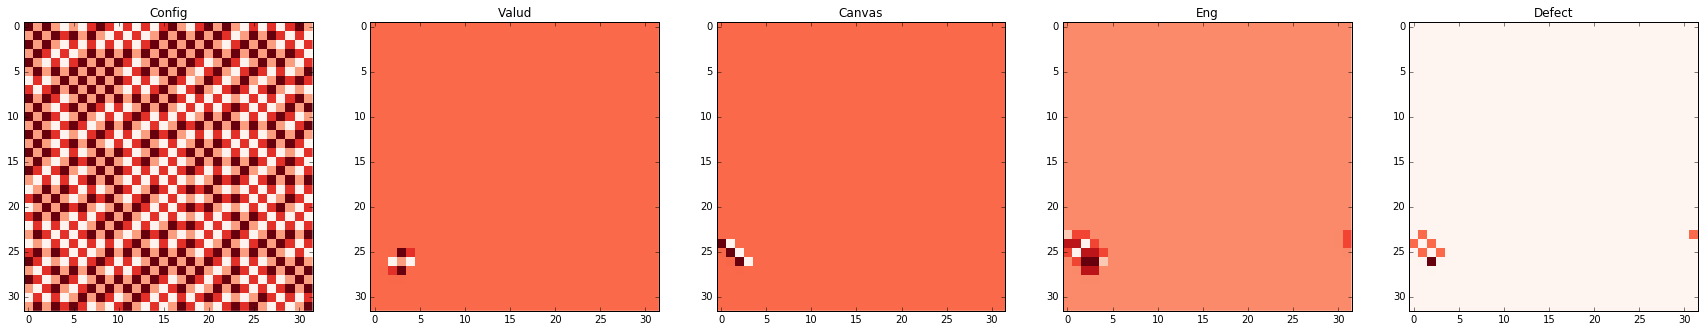

2
action: 1, reward: -0.0146484375, terminate: False, returns: None


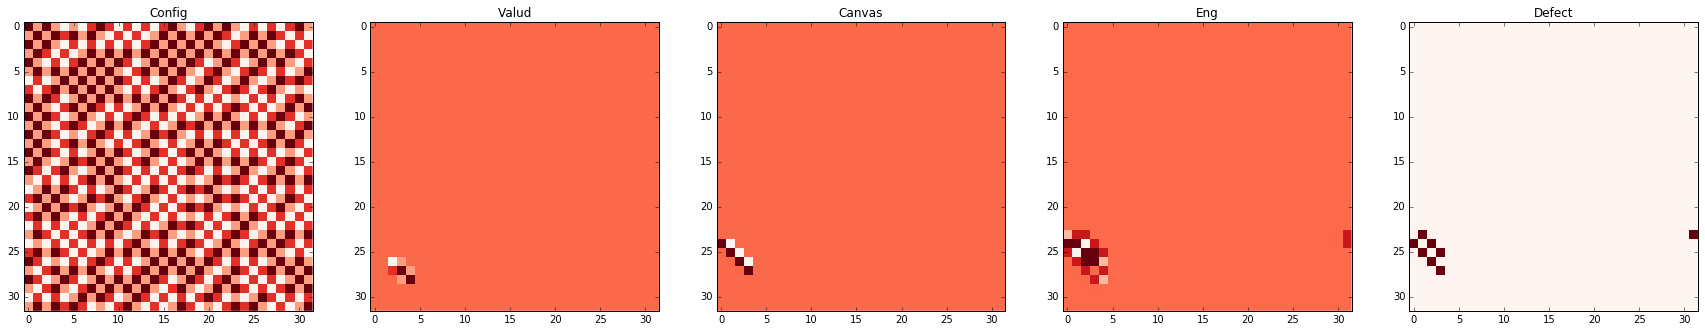

2
action: 2, reward: -0.01171875, terminate: False, returns: None


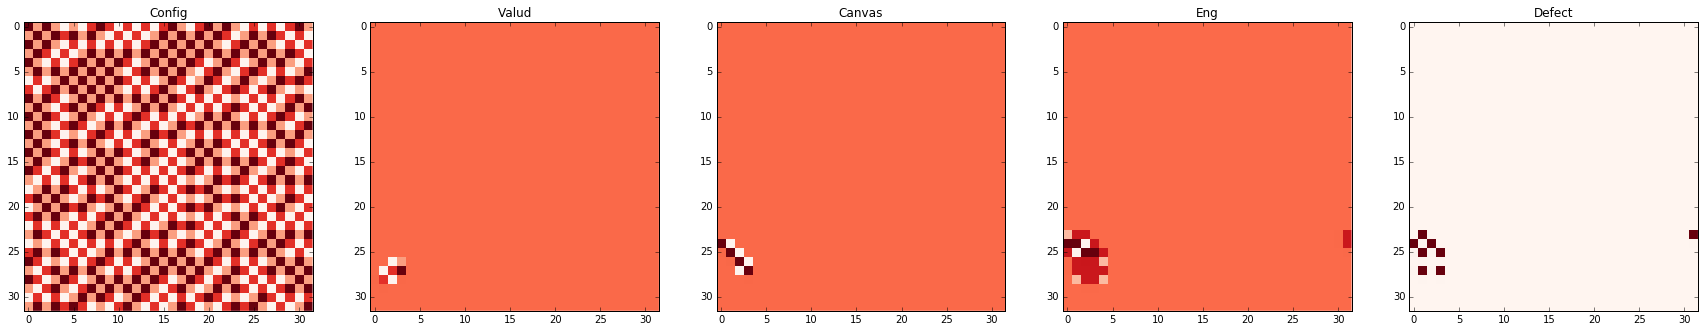

2
action: 4, reward: -0.0166015625, terminate: False, returns: None


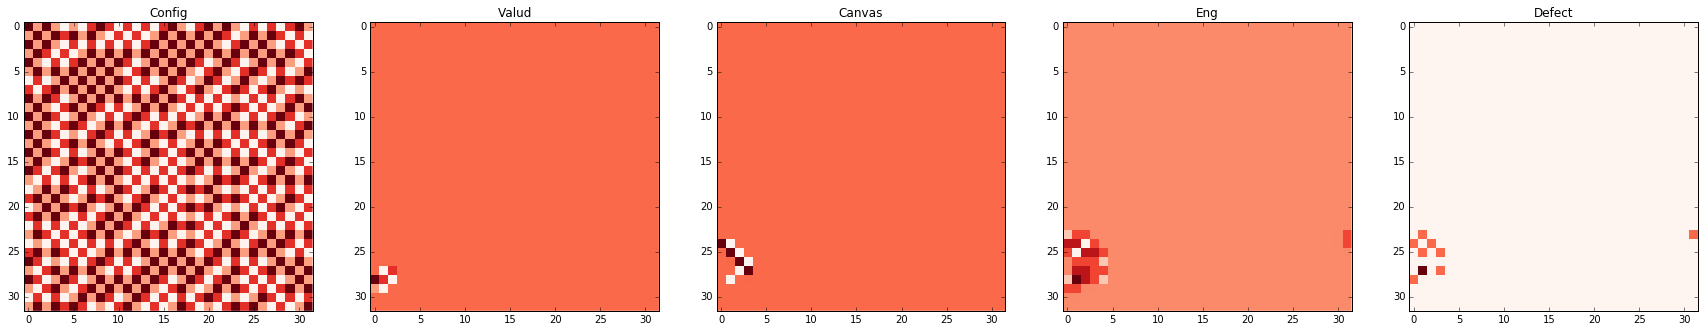

2
action: 0, reward: -0.013671875, terminate: False, returns: None


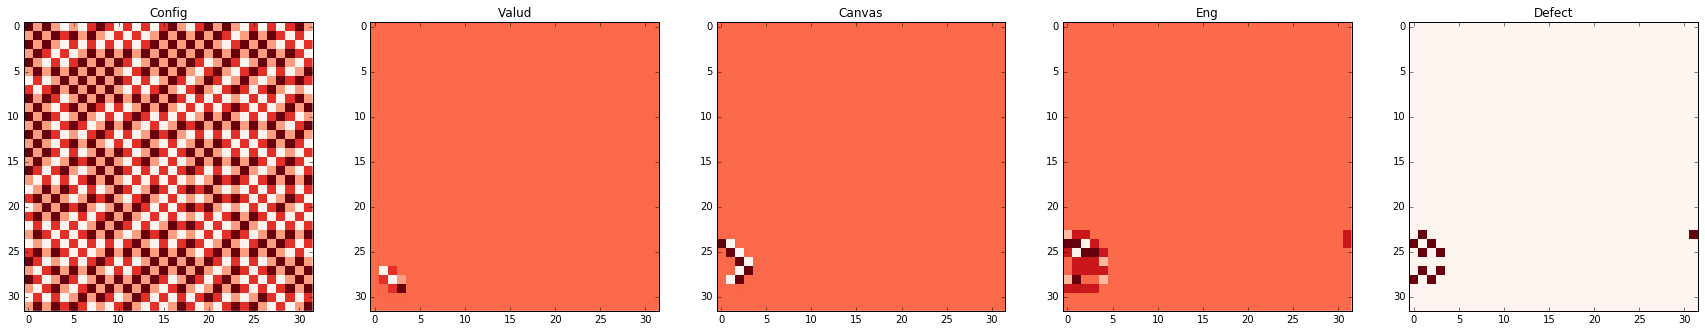

2
action: 0, reward: -0.0185546875, terminate: False, returns: None


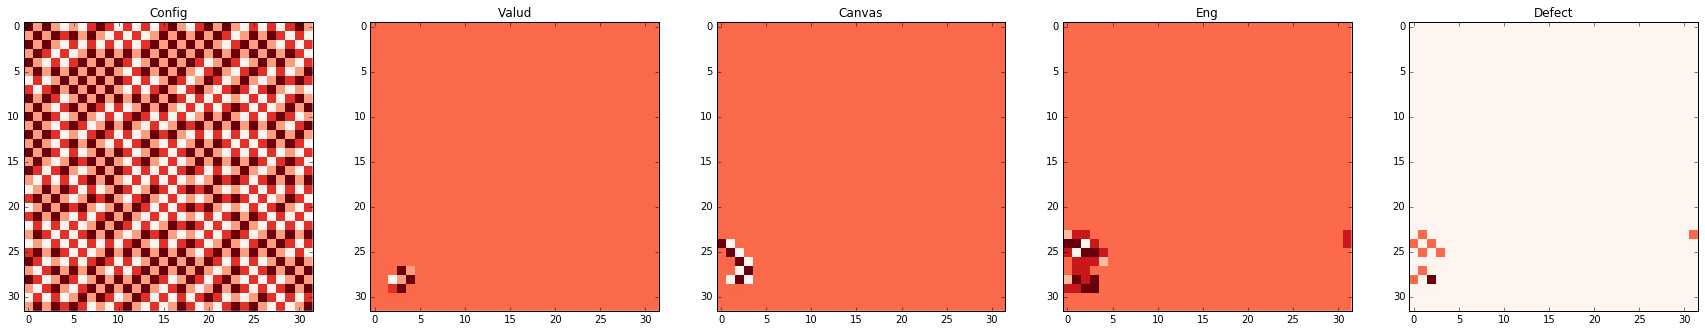

2
action: 2, reward: -0.0185546875, terminate: False, returns: None


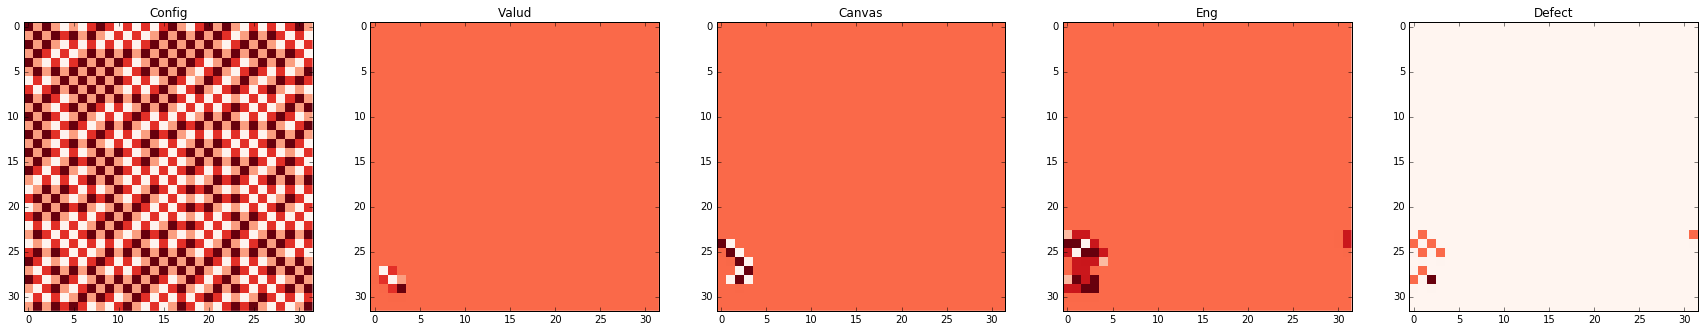

2
action: 5, reward: -0.01953125, terminate: False, returns: None


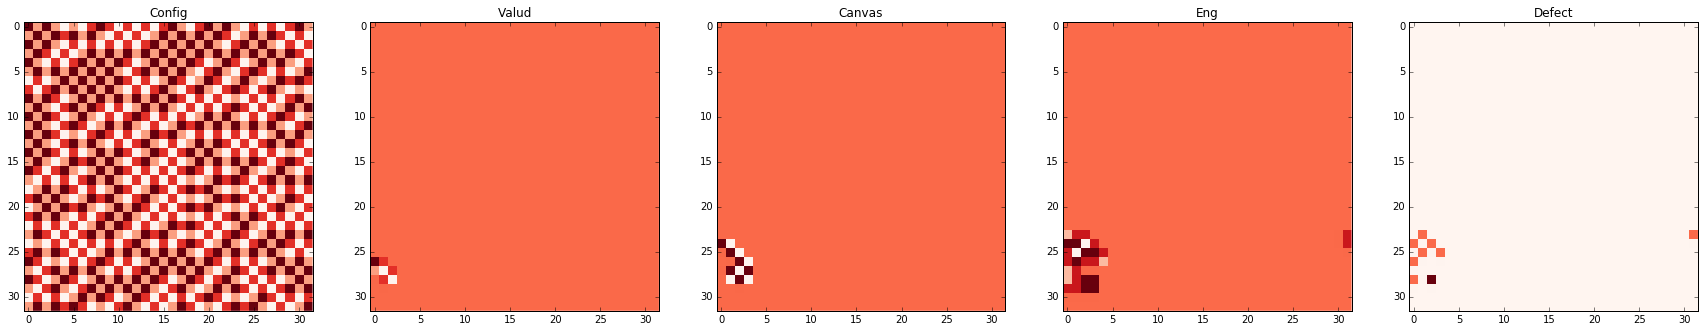

2
action: 0, reward: -0.01953125, terminate: False, returns: None


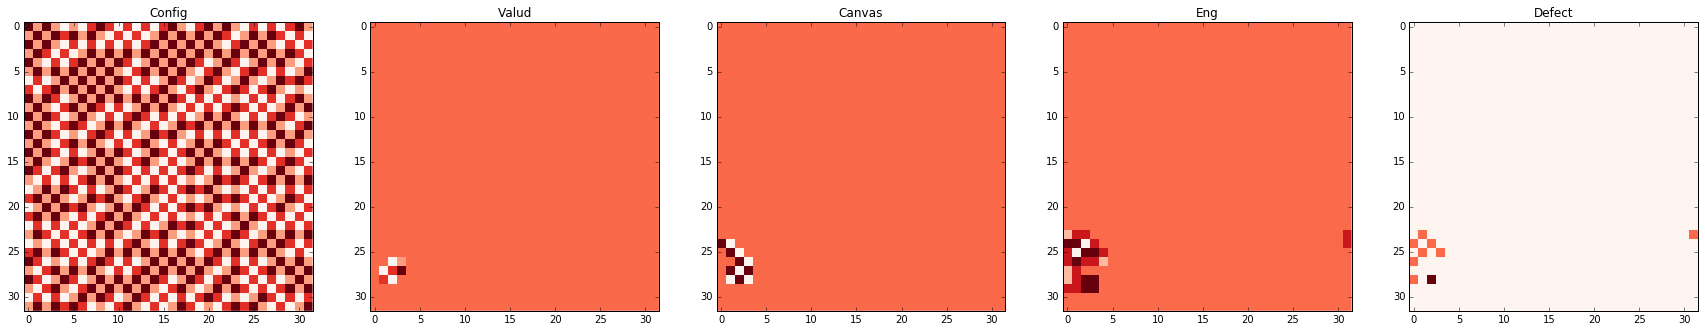

2
action: 0, reward: -0.01953125, terminate: False, returns: None


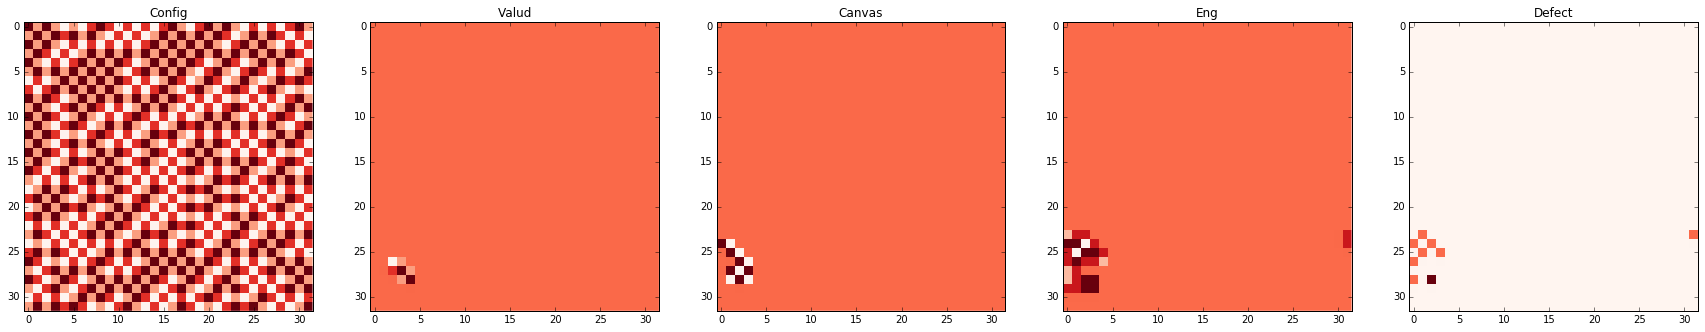

2
action: 6, reward: 0.0, terminate: False, returns: None


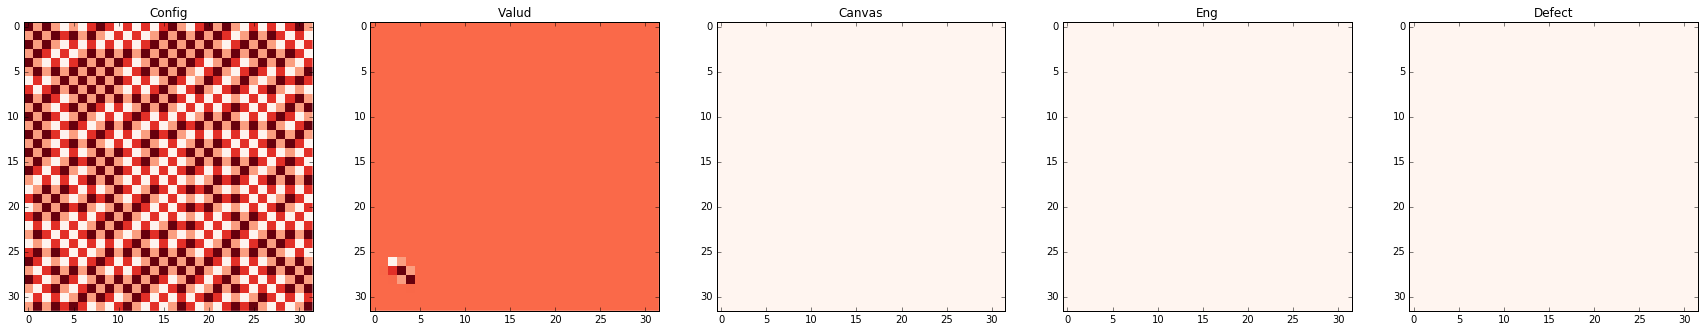

1
action: 6, reward: 0.0, terminate: False, returns: None


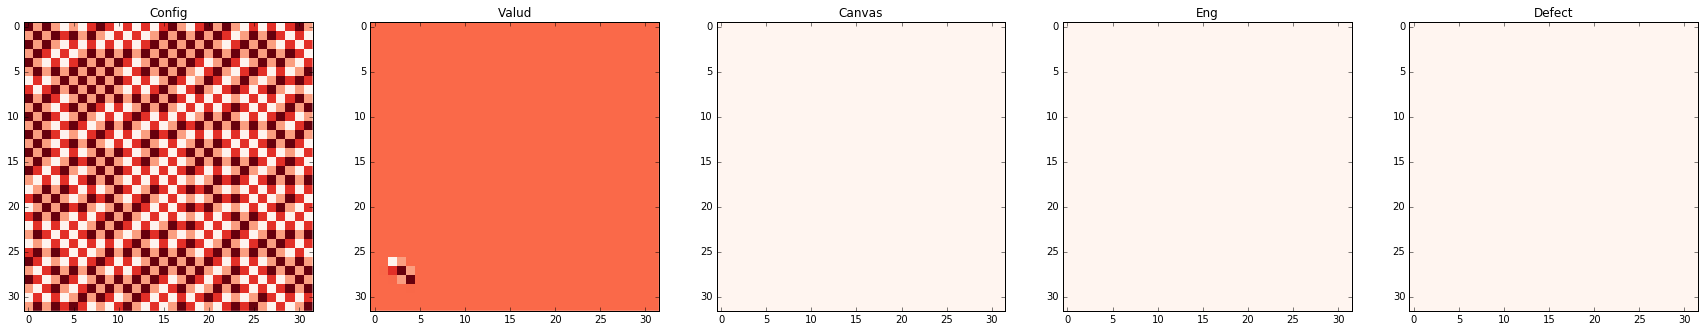

0
action: 4, reward: -0.0048828125, terminate: True, returns: None


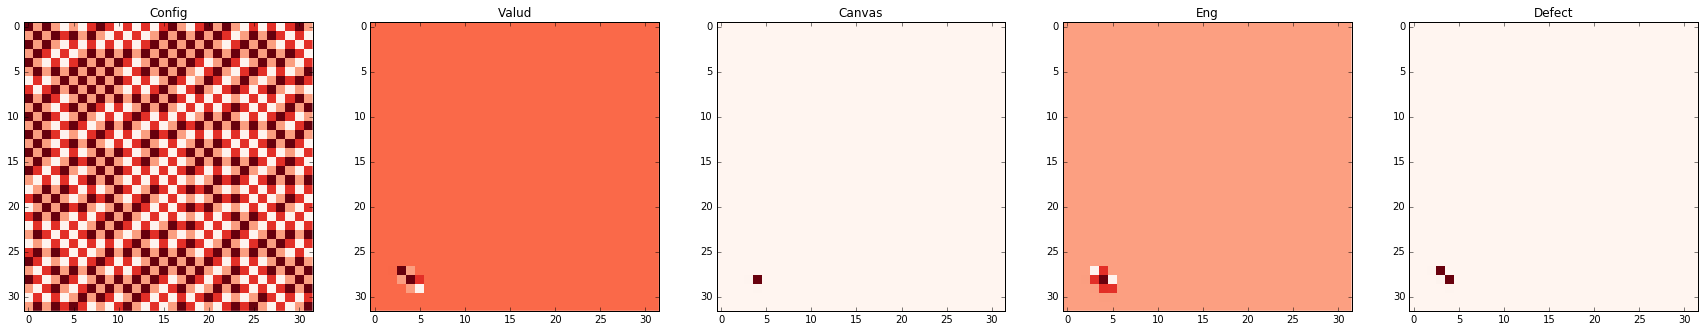

0
Episode 4: Reward = -0.46875
action: 5, reward: -0.0048828125, terminate: False, returns: None


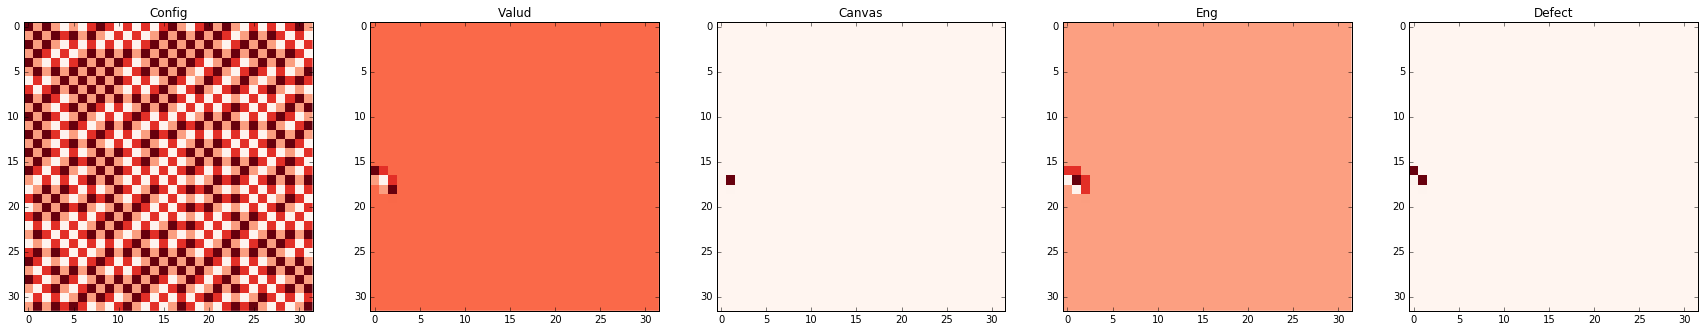

5
action: 0, reward: -0.001953125, terminate: False, returns: None


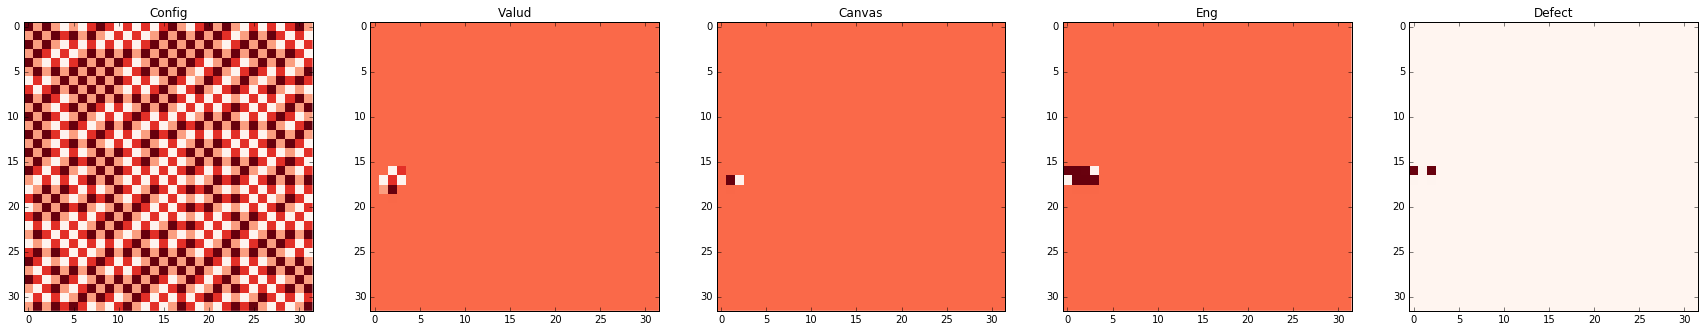

5
action: 3, reward: -0.0029296875, terminate: False, returns: None


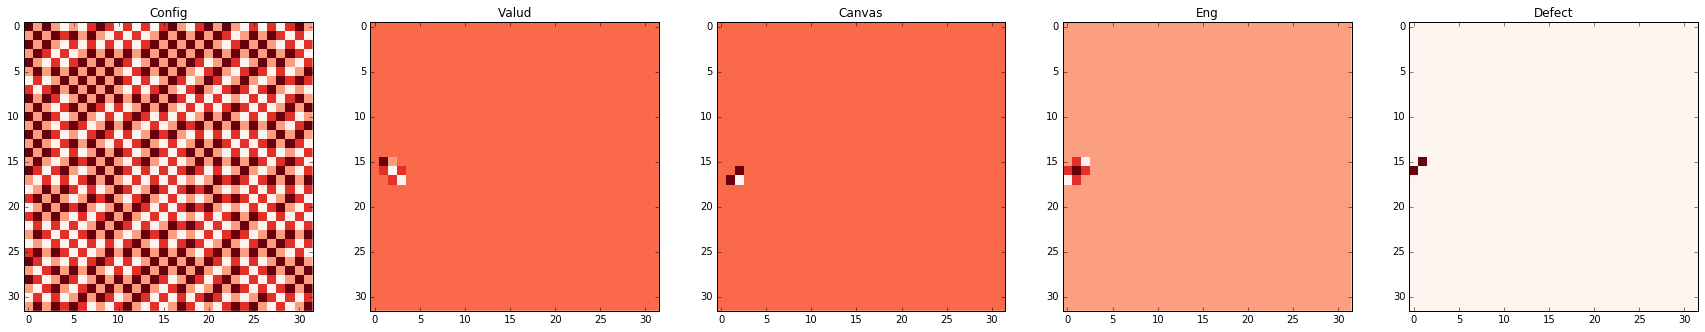

5
action: 3, reward: -0.01171875, terminate: False, returns: None


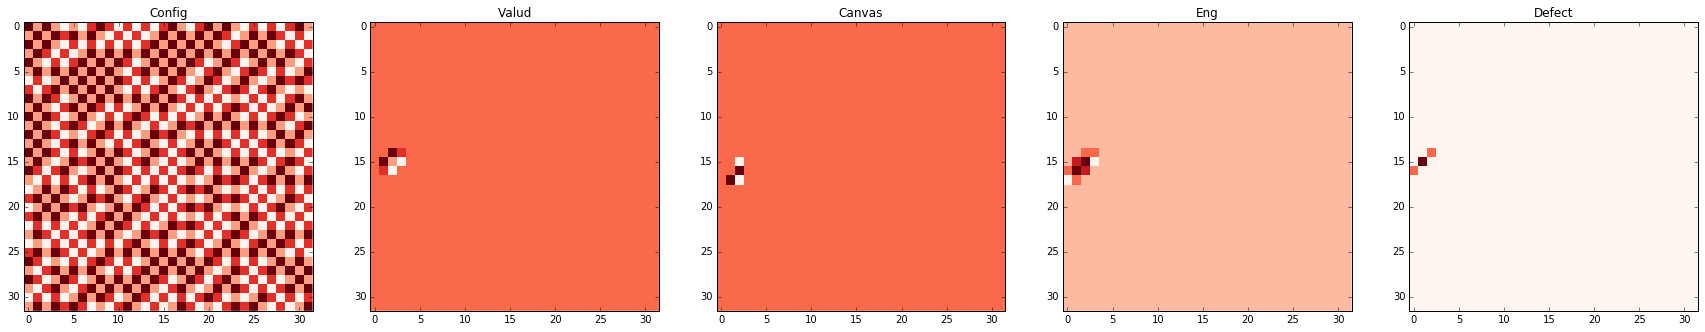

5
action: 5, reward: -0.0087890625, terminate: False, returns: None


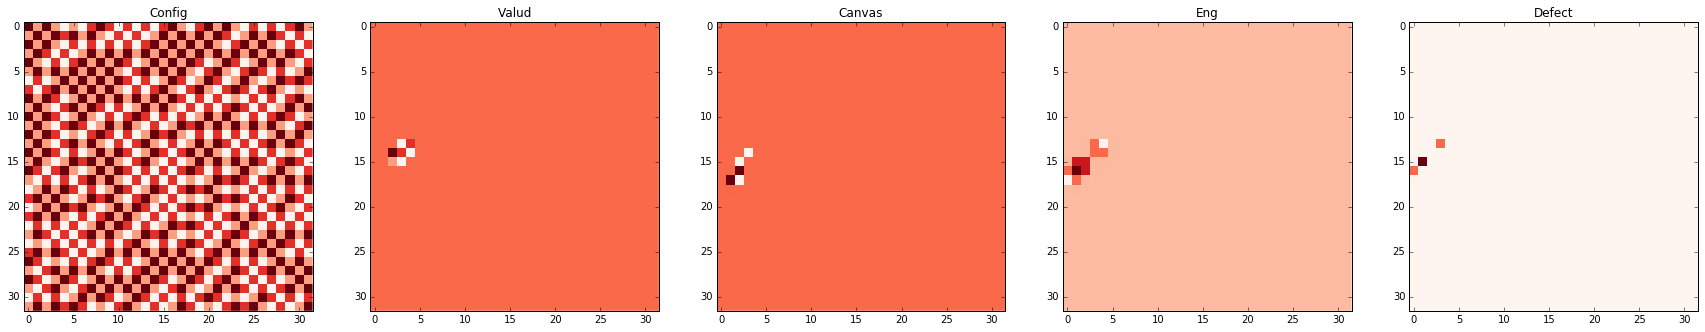

5
action: 0, reward: -0.009765625, terminate: False, returns: None


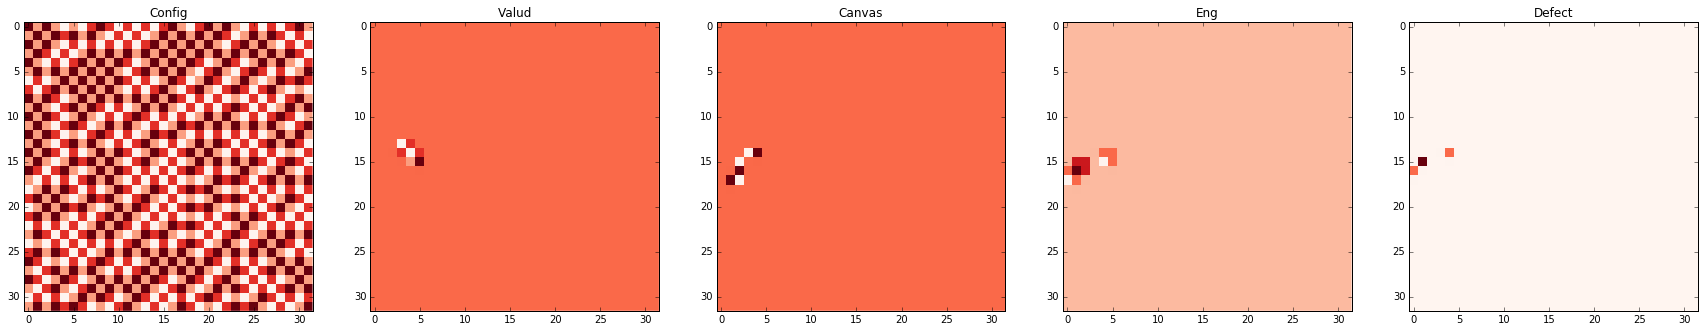

5
action: 3, reward: -0.0107421875, terminate: False, returns: None


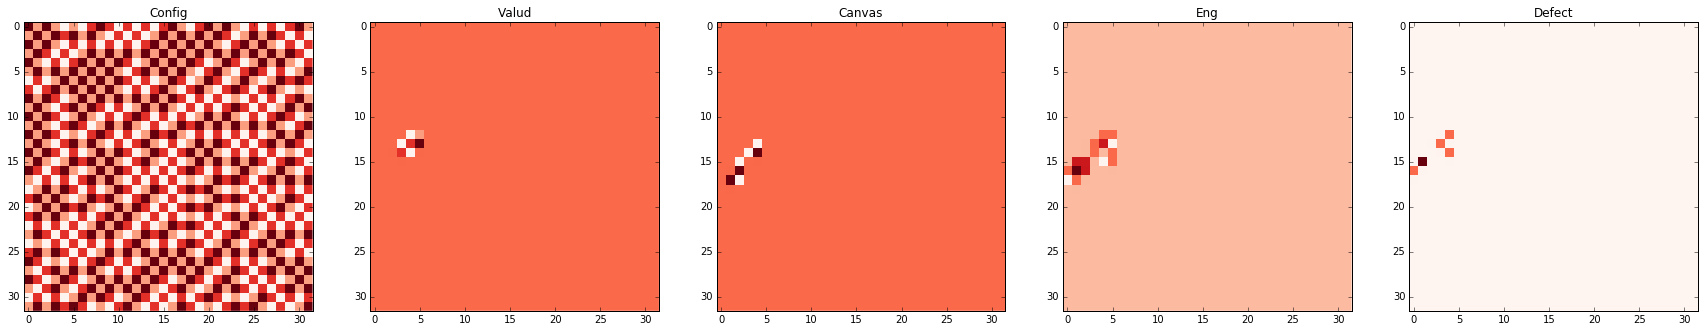

5
action: 4, reward: -0.0107421875, terminate: False, returns: None


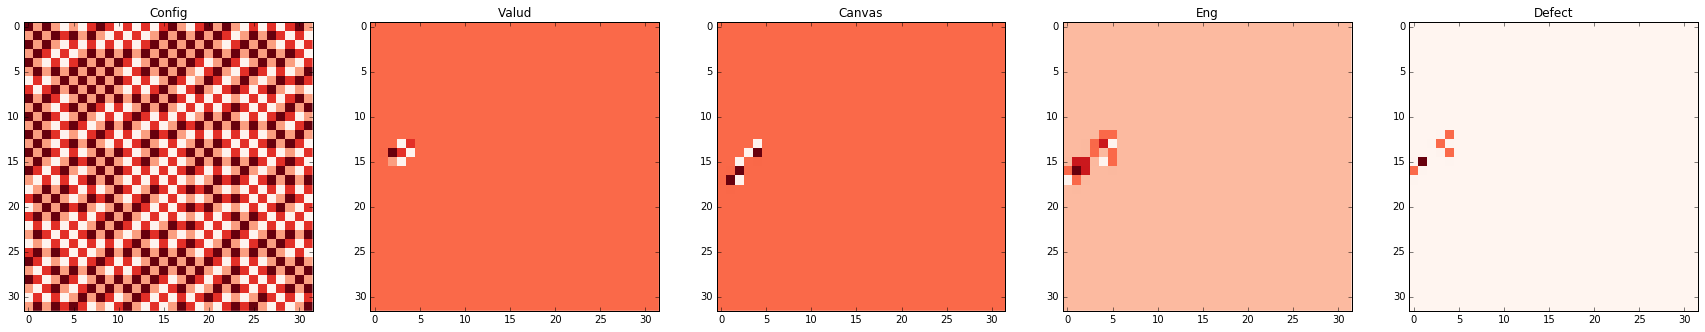

5
action: 5, reward: -0.0107421875, terminate: False, returns: None


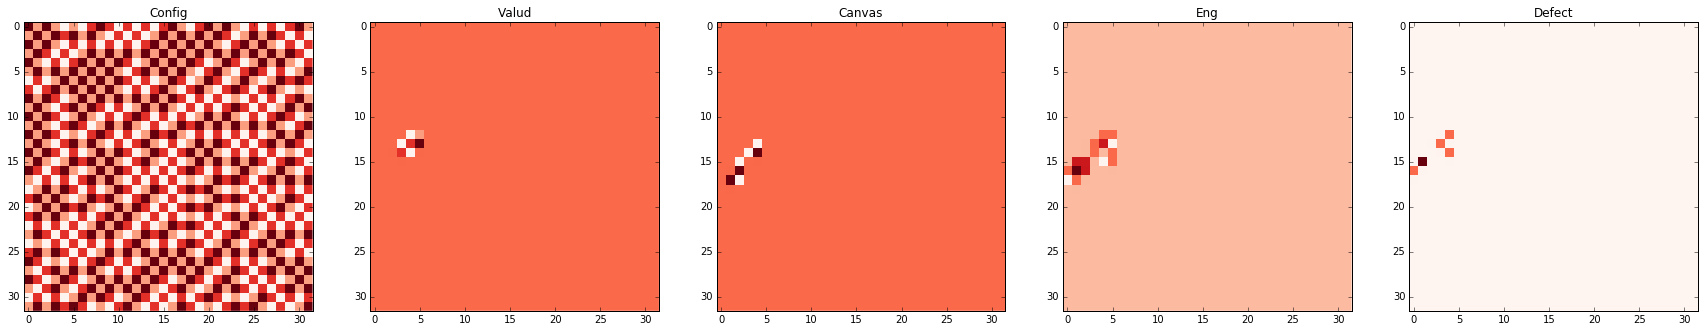

5
action: 6, reward: 0.0, terminate: False, returns: None


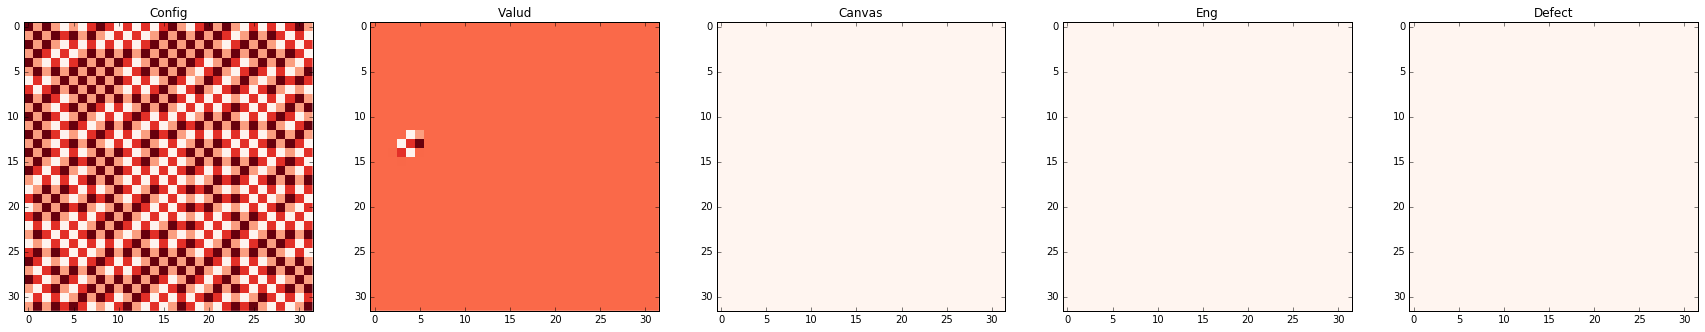

4
action: 0, reward: -0.0048828125, terminate: False, returns: None


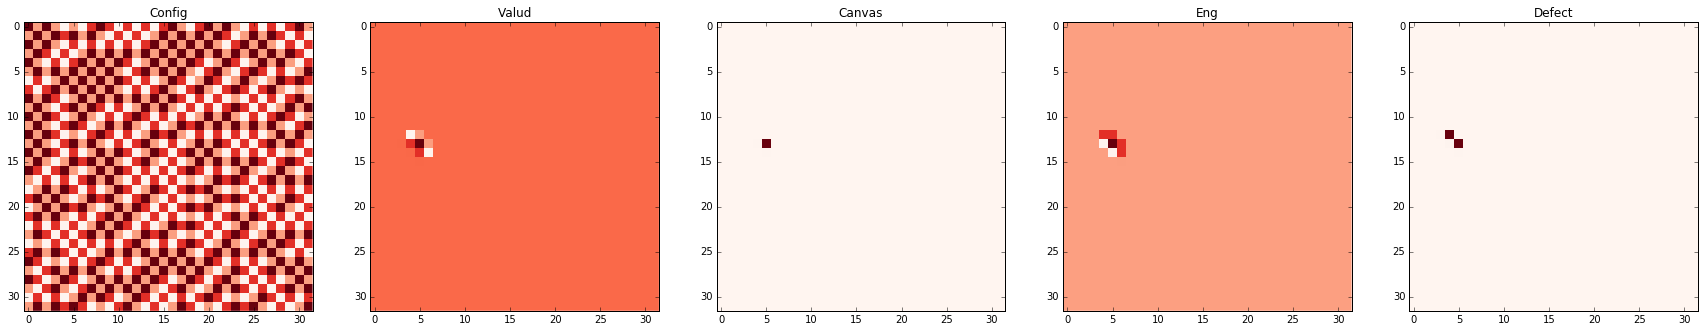

4
action: 1, reward: -0.013671875, terminate: False, returns: None


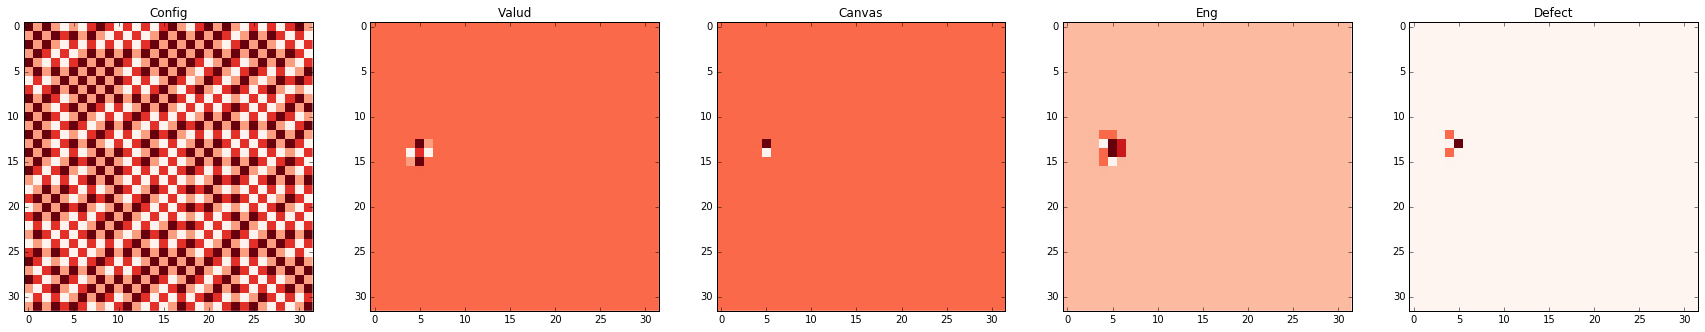

4
action: 3, reward: -0.013671875, terminate: False, returns: None


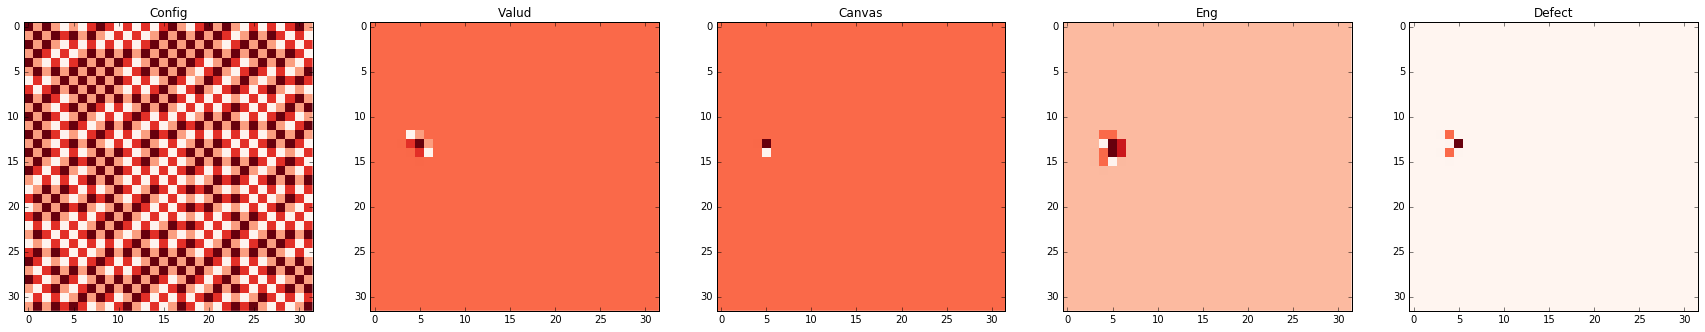

4
action: 5, reward: -0.0107421875, terminate: False, returns: None


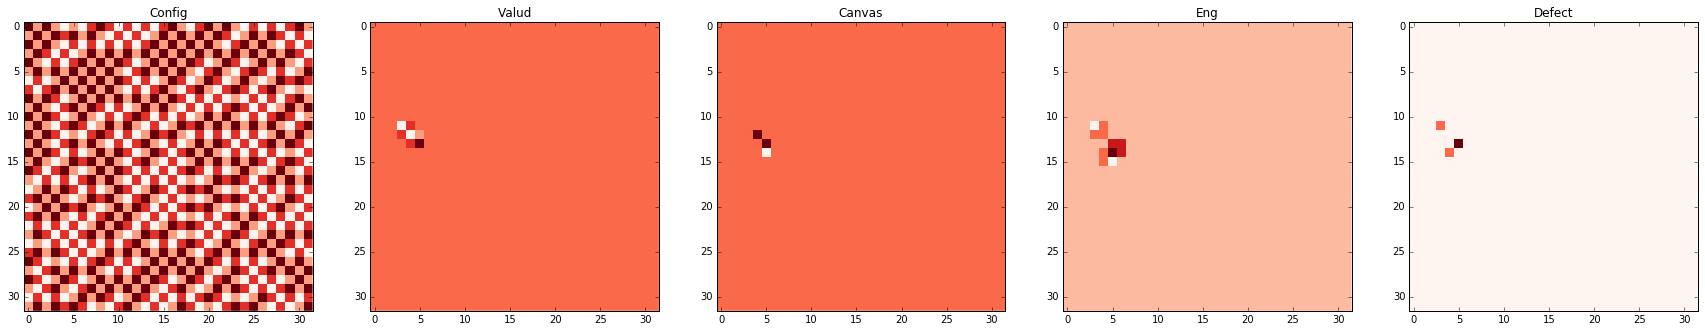

4
action: 4, reward: -0.0107421875, terminate: False, returns: None


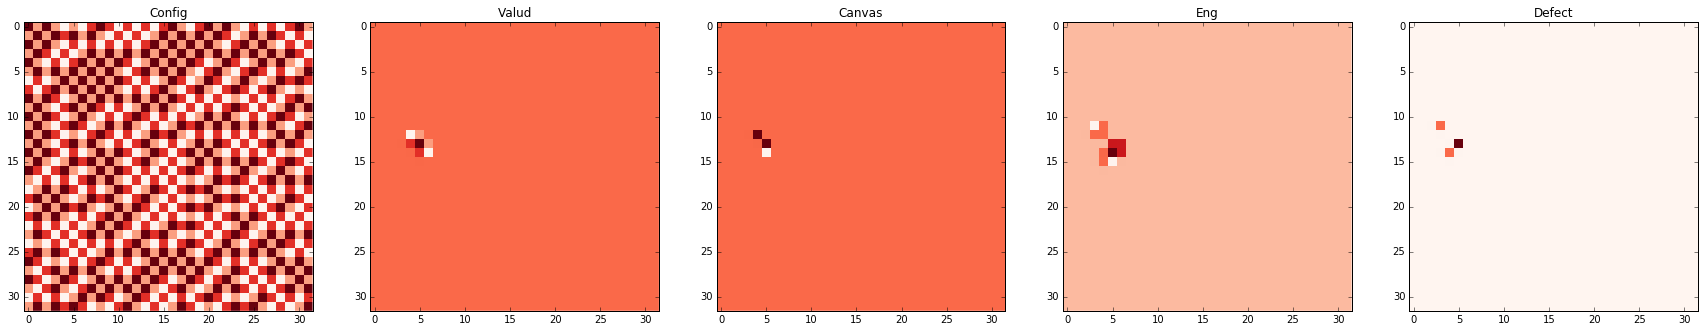

4
action: 0, reward: -0.00390625, terminate: False, returns: None


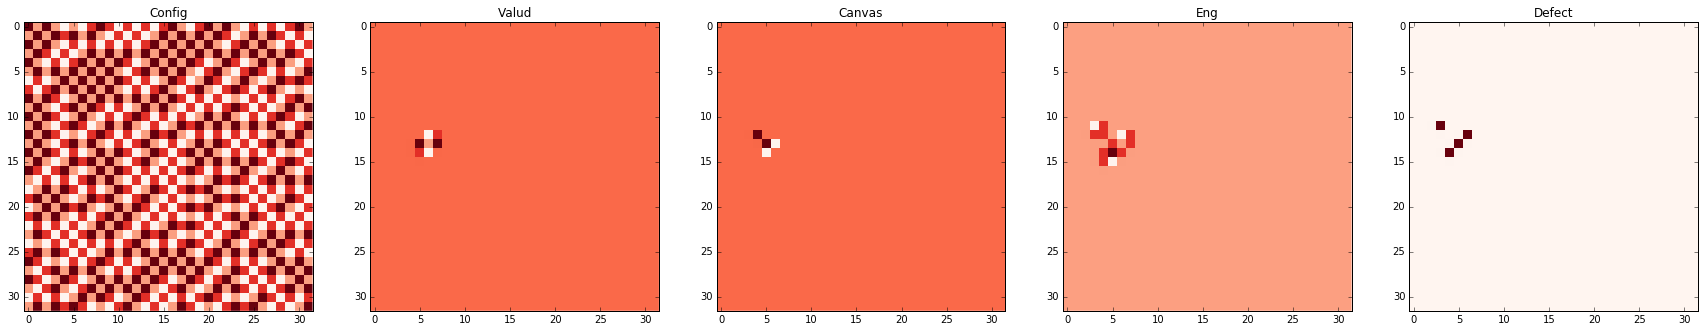

4
action: 5, reward: -0.0048828125, terminate: False, returns: None


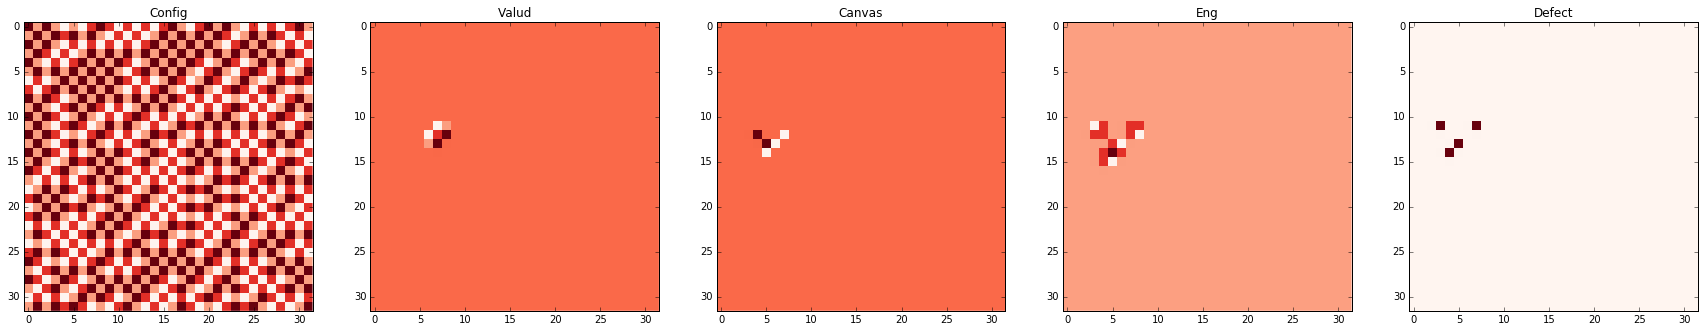

4
action: 2, reward: -0.005859375, terminate: False, returns: None


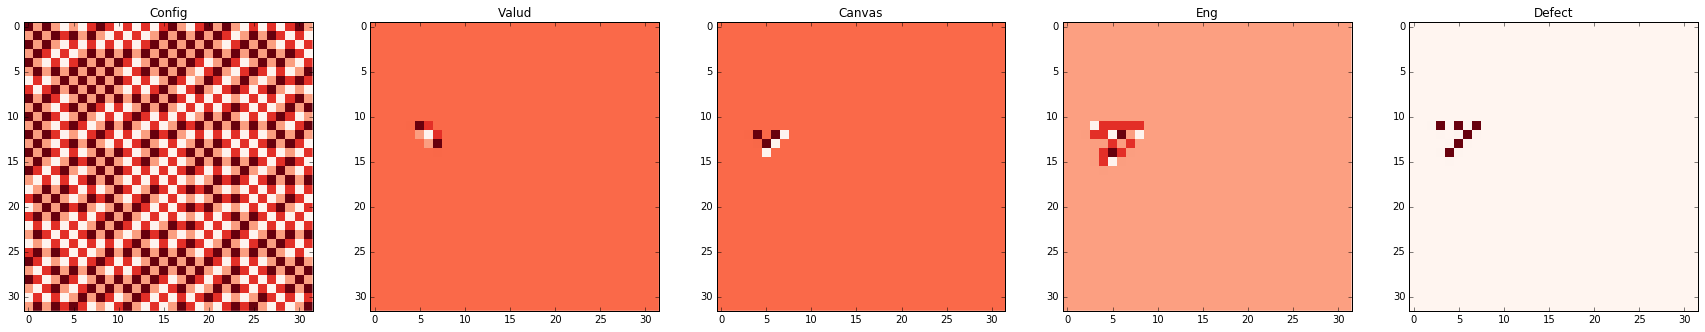

4
action: 1, reward: -0.005859375, terminate: False, returns: None


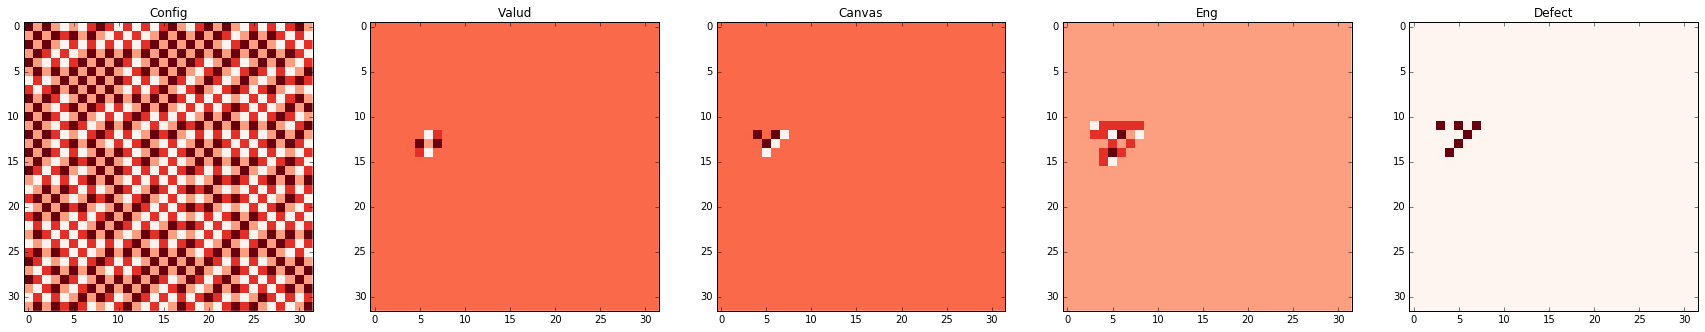

4
action: 2, reward: -0.005859375, terminate: False, returns: None


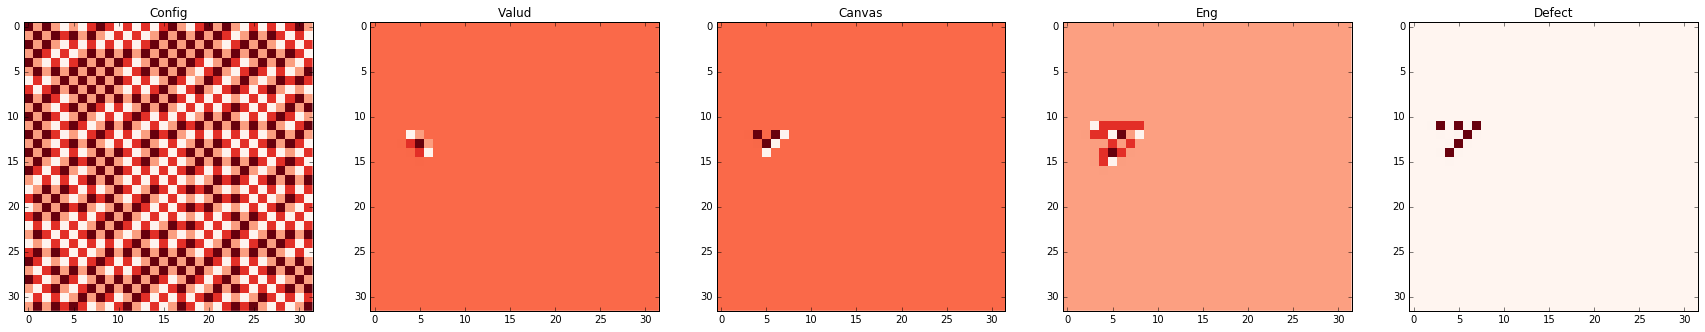

4
action: 0, reward: -0.005859375, terminate: False, returns: None


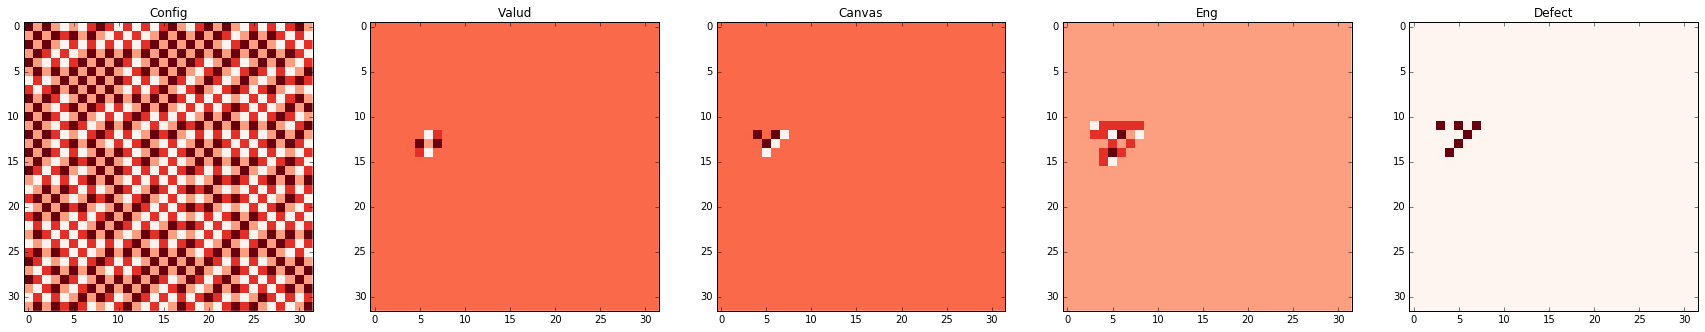

4
action: 3, reward: -0.005859375, terminate: False, returns: None


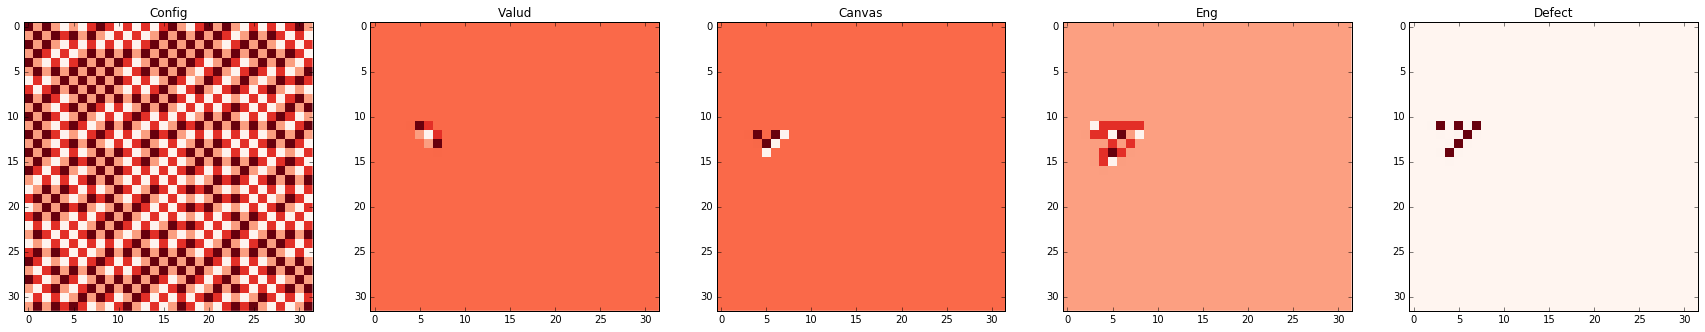

4
action: 6, reward: 0.0, terminate: False, returns: None


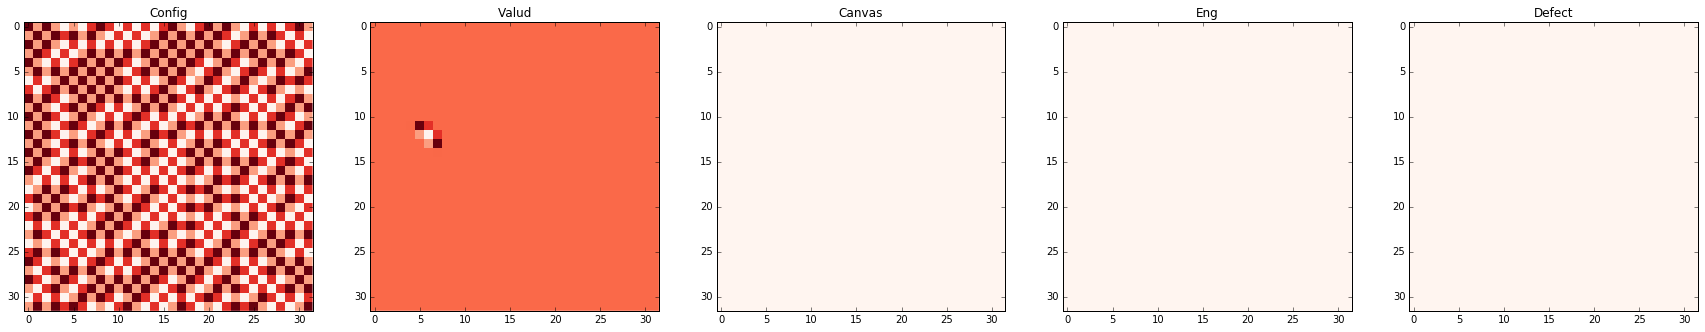

3
action: 3, reward: -0.0048828125, terminate: False, returns: None


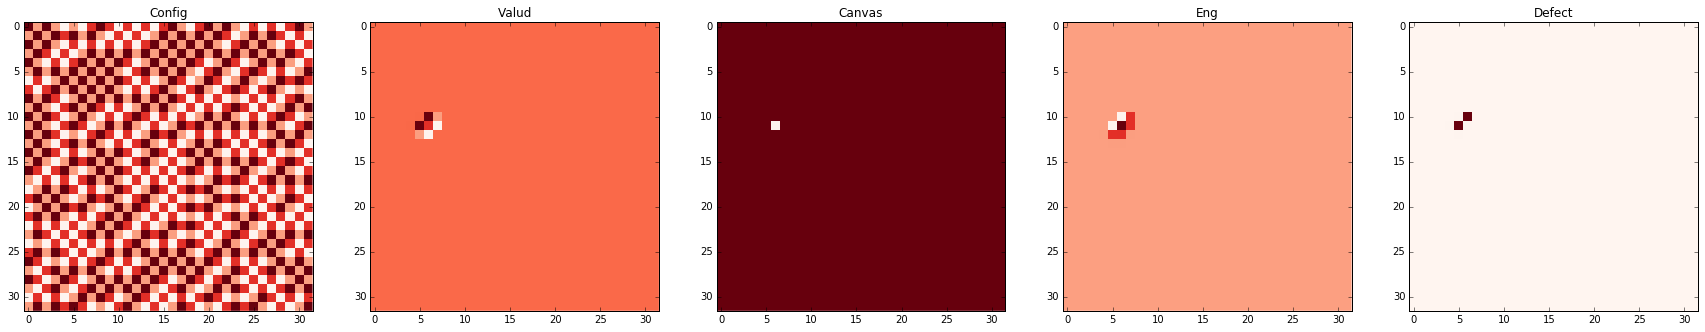

3
action: 1, reward: -0.001953125, terminate: False, returns: None


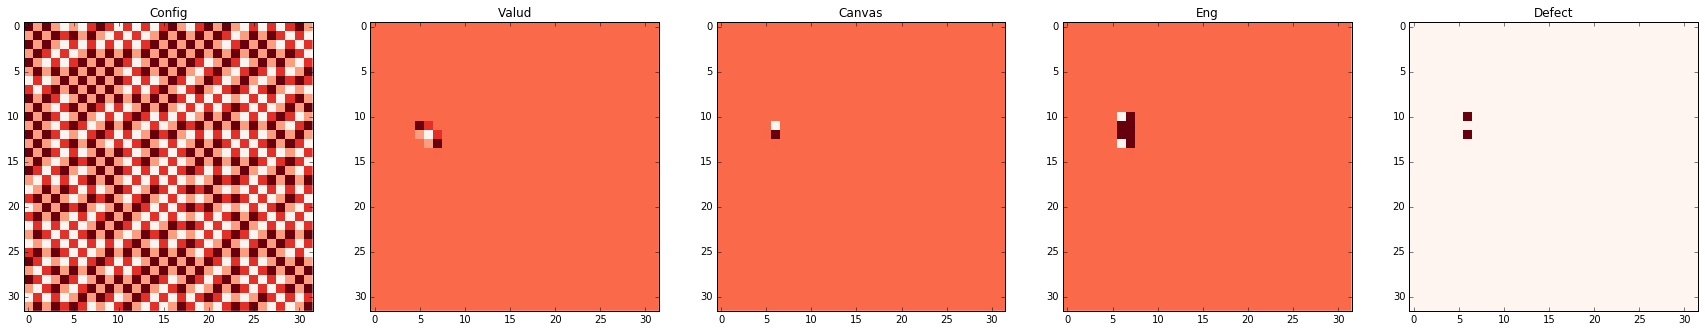

3
action: 1, reward: -0.0107421875, terminate: False, returns: None


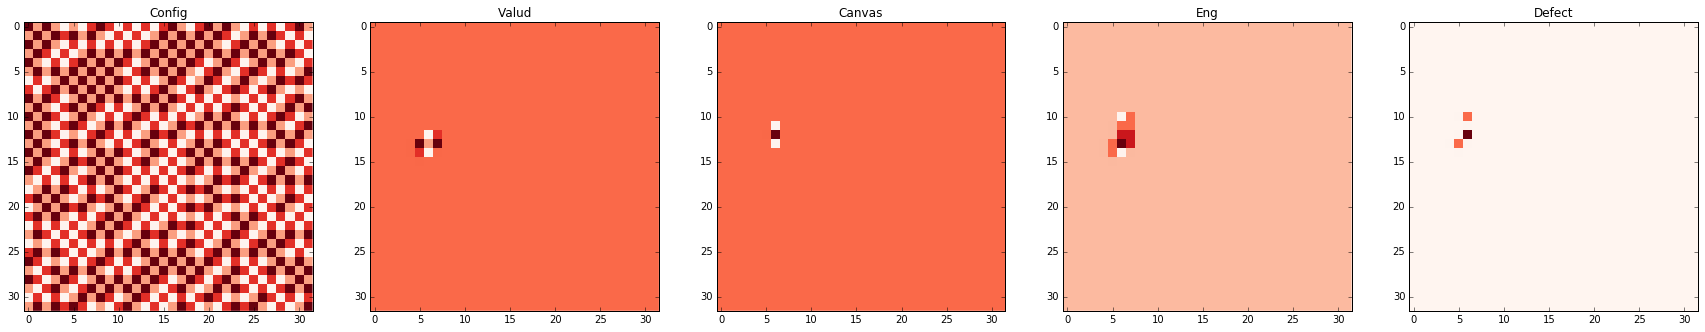

3
action: 2, reward: -0.0078125, terminate: False, returns: None


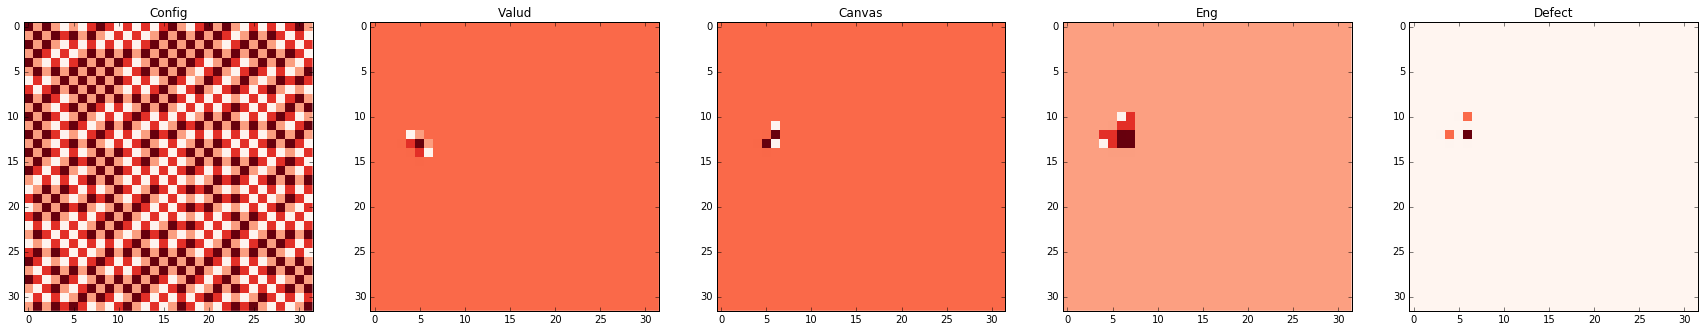

3
action: 3, reward: -0.0087890625, terminate: False, returns: None


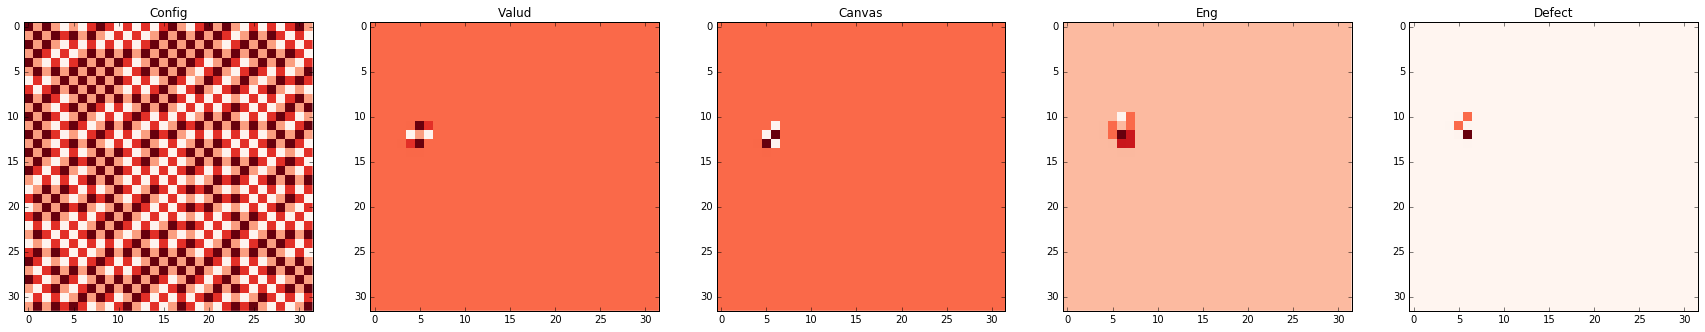

3
action: 3, reward: -0.005859375, terminate: False, returns: None


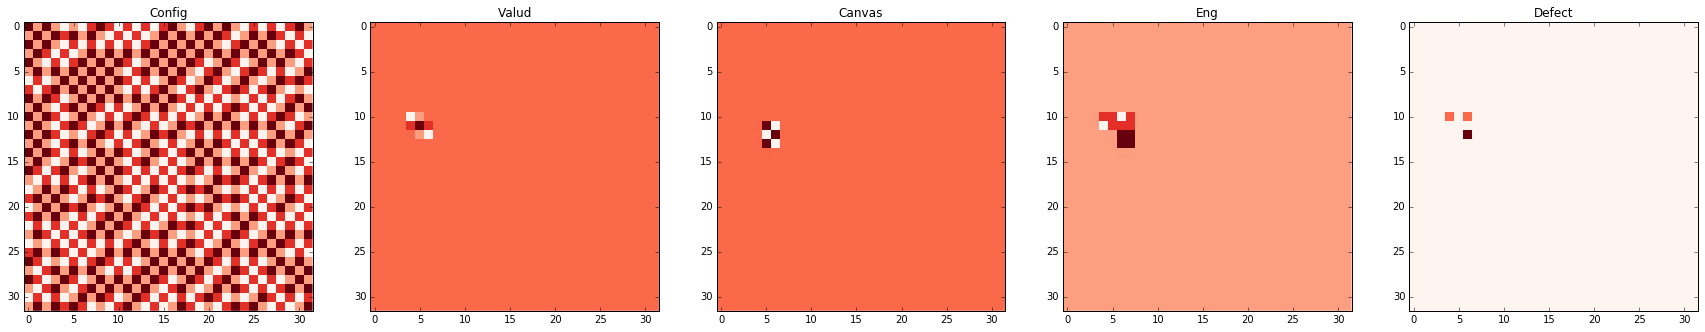

3
action: 4, reward: -0.005859375, terminate: False, returns: None


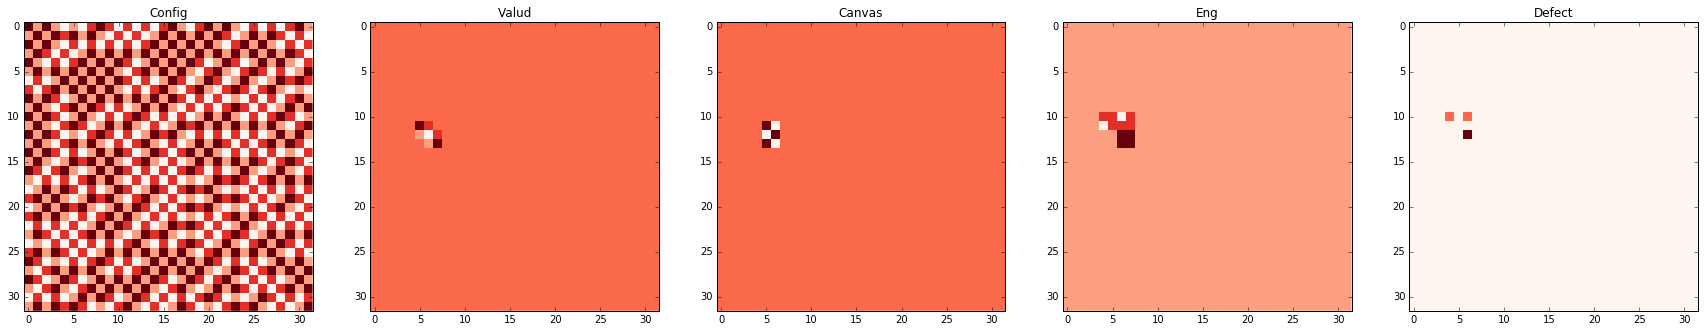

3
action: 3, reward: -0.005859375, terminate: False, returns: None


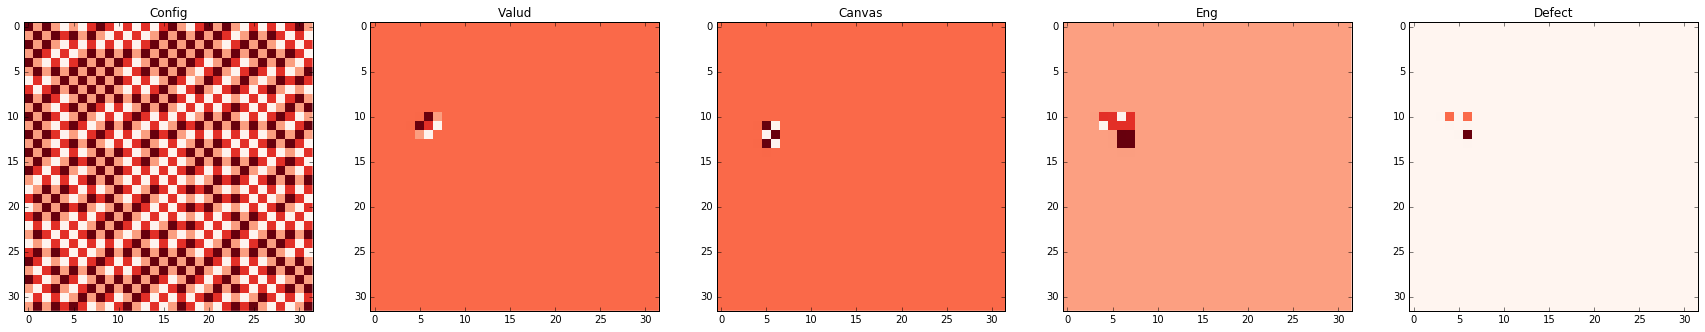

3
action: 0, reward: -0.0068359375, terminate: False, returns: None


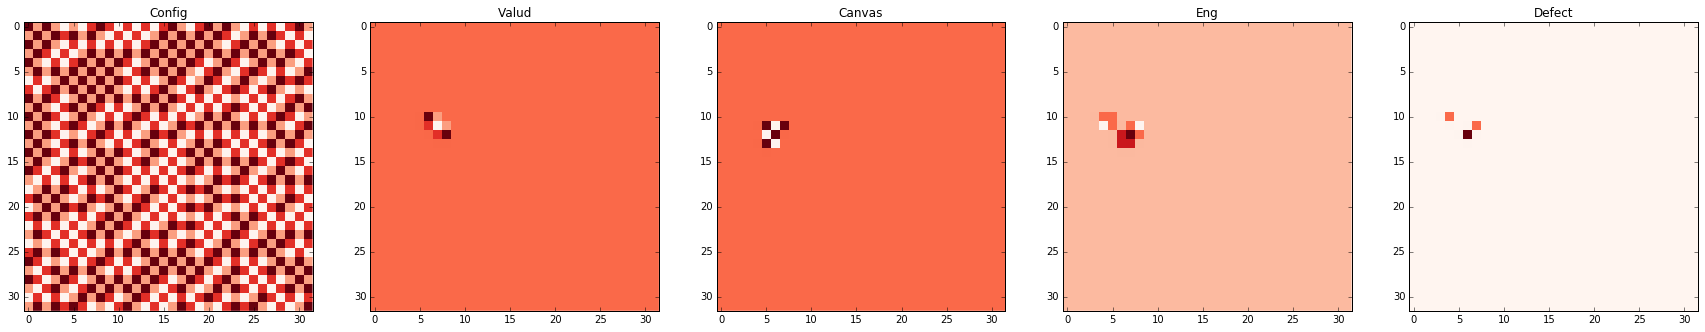

3
action: 3, reward: -0.01171875, terminate: False, returns: None


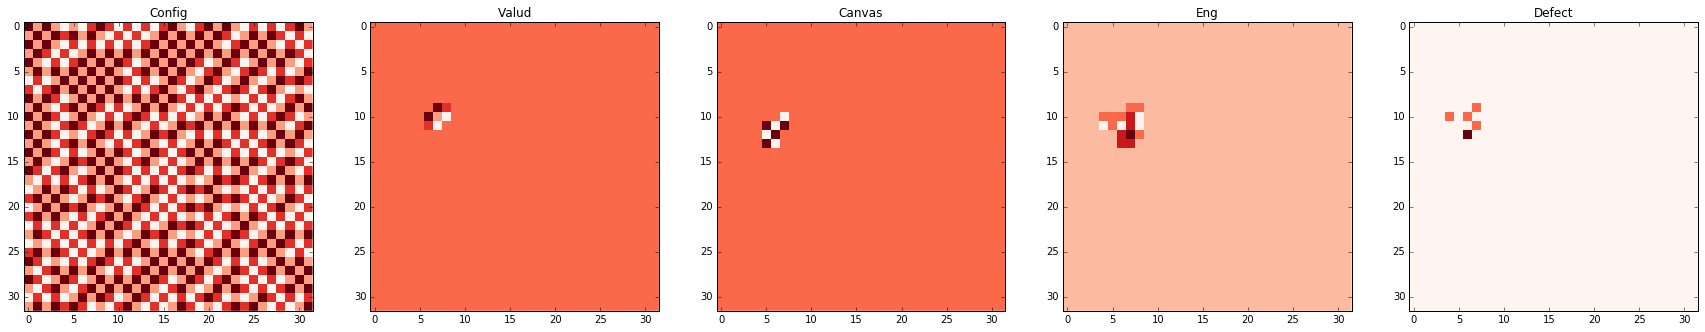

3
action: 6, reward: 0.0, terminate: False, returns: None


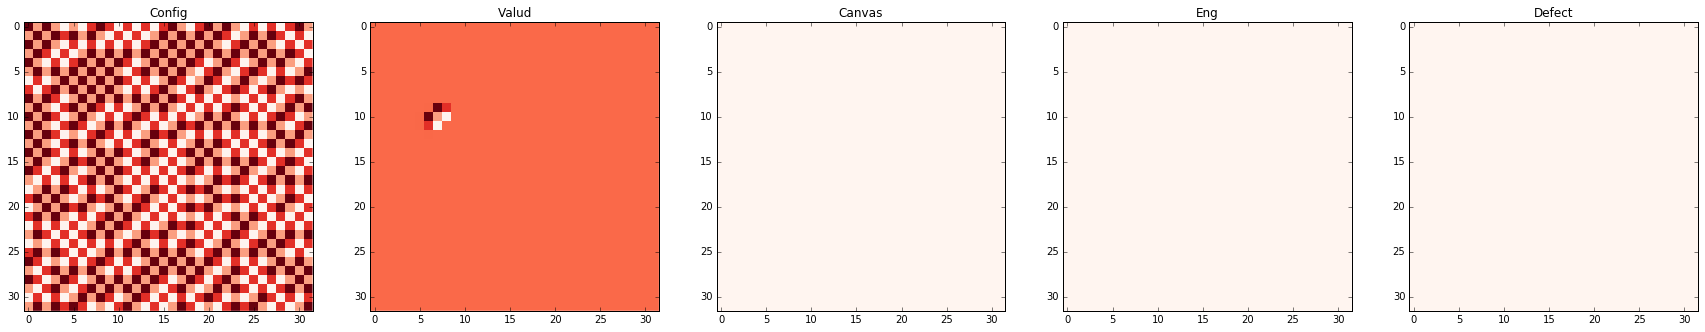

2
action: 0, reward: -0.0048828125, terminate: False, returns: None


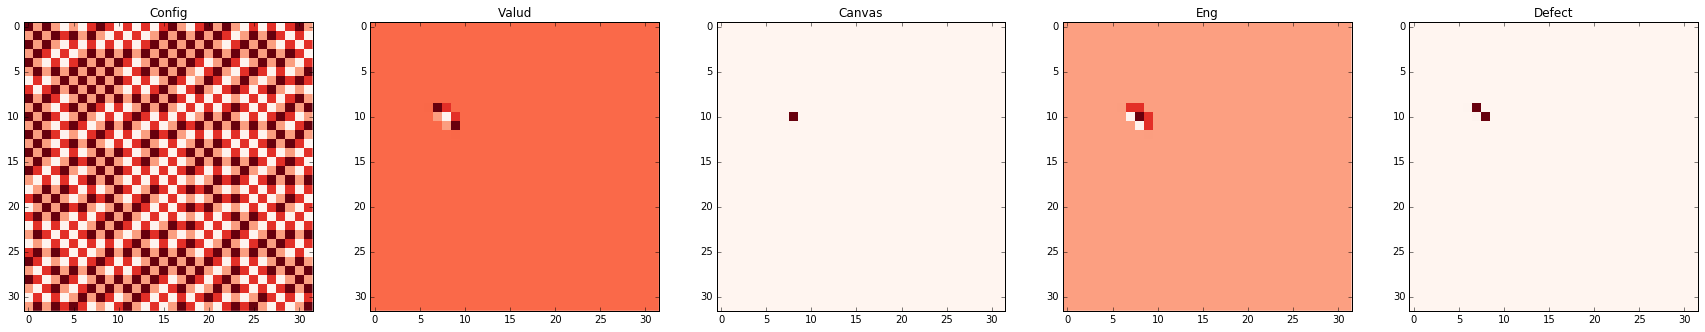

2
action: 0, reward: -0.001953125, terminate: False, returns: None


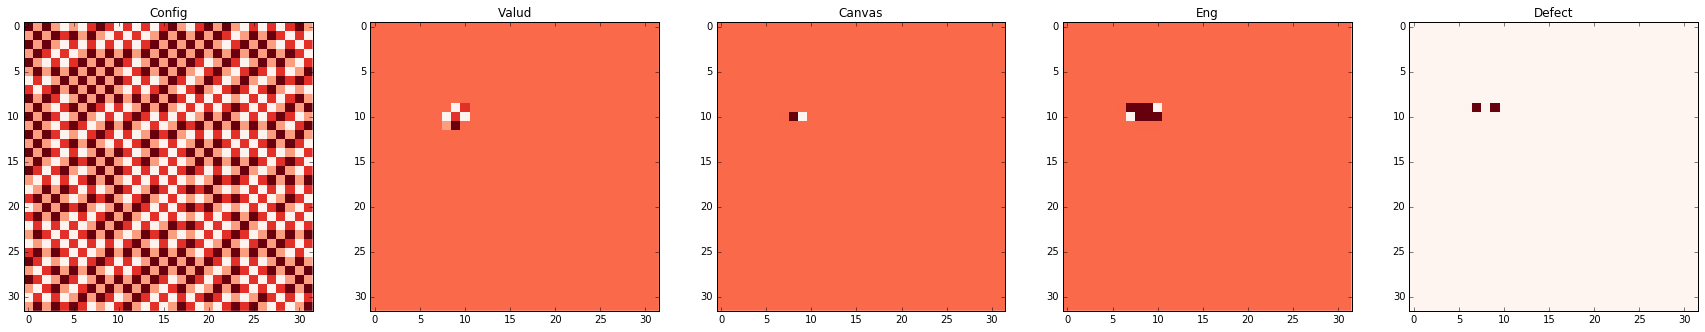

2
action: 2, reward: -0.001953125, terminate: False, returns: None


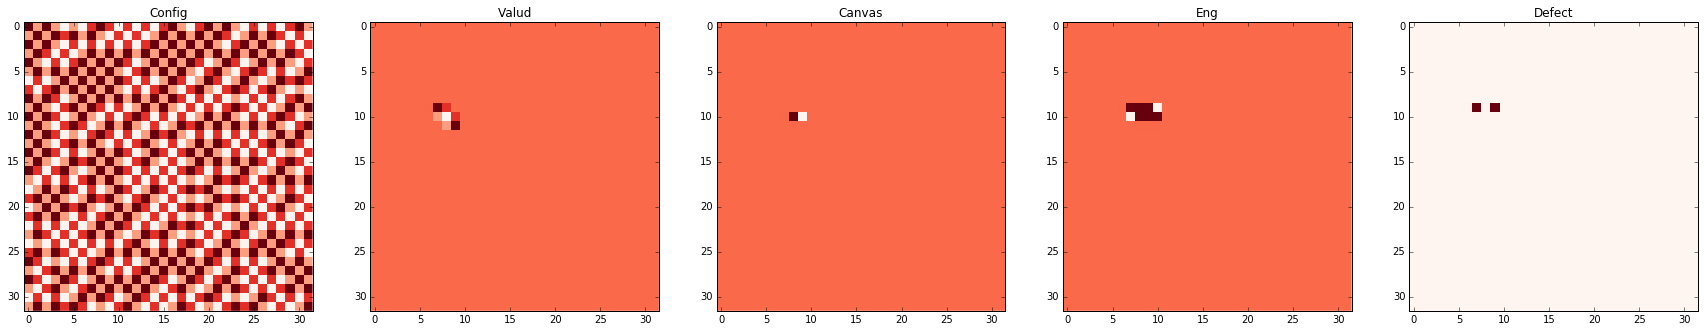

2
action: 1, reward: -0.0068359375, terminate: False, returns: None


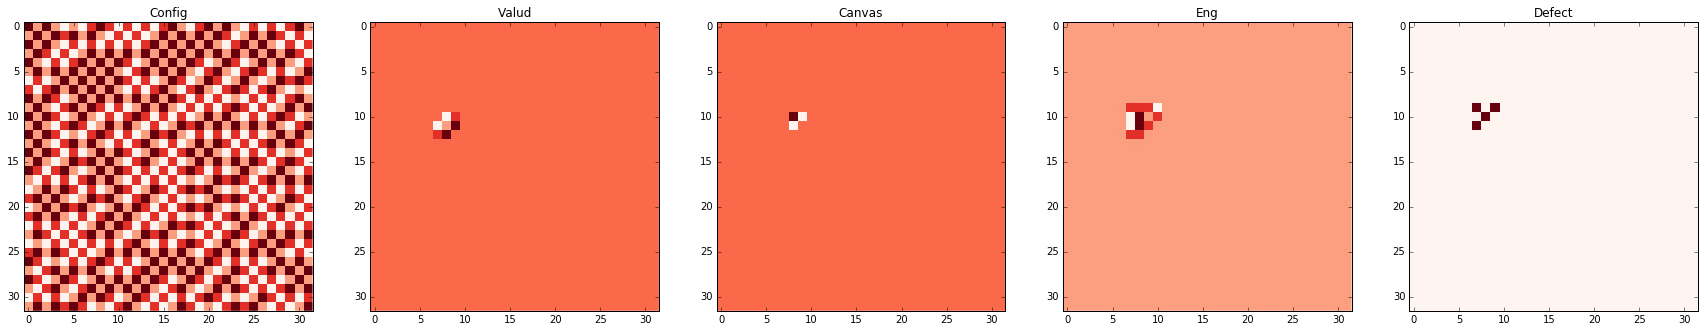

2
action: 4, reward: -0.00390625, terminate: False, returns: None


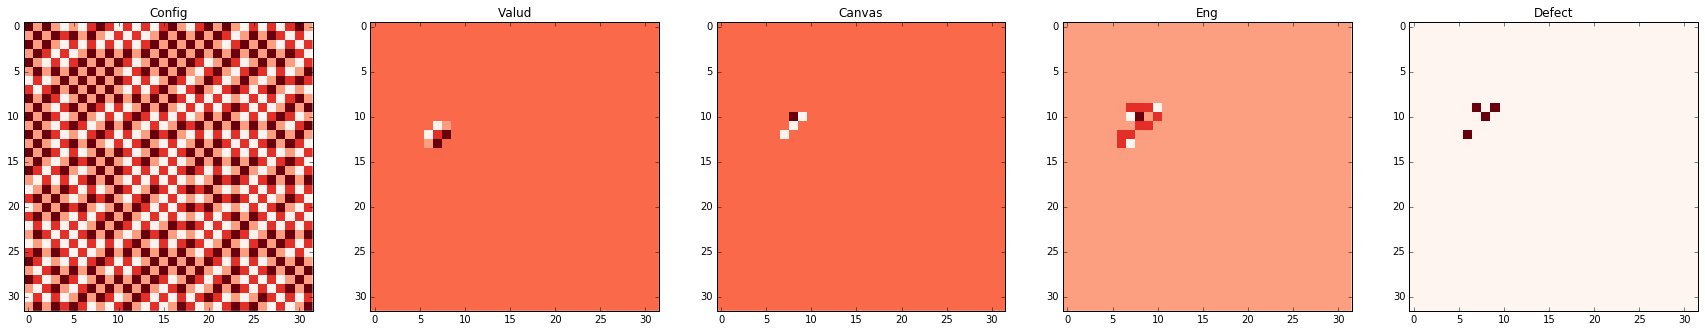

2
action: 5, reward: -0.00390625, terminate: False, returns: None


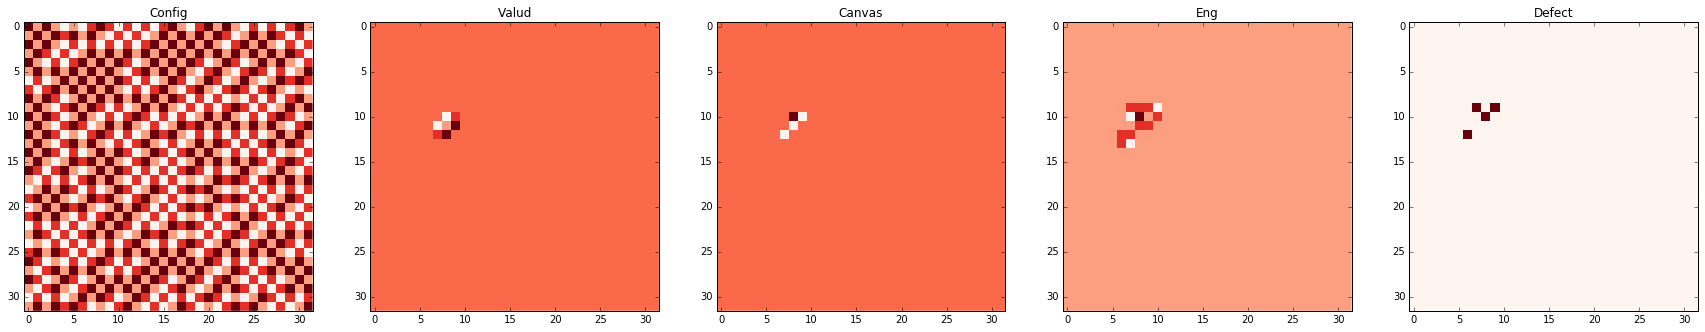

2
action: 3, reward: -0.00390625, terminate: False, returns: None


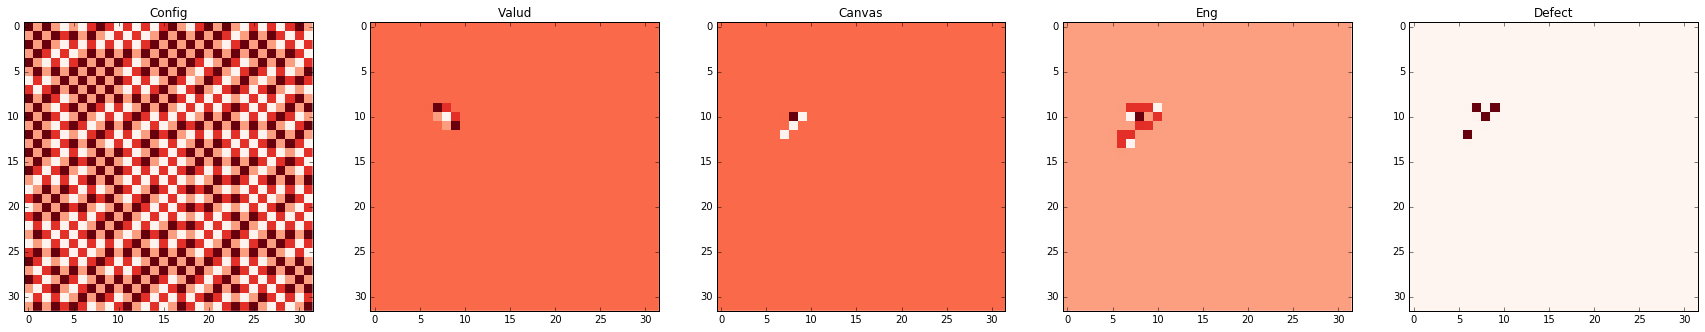

2
action: 1, reward: -0.00390625, terminate: False, returns: None


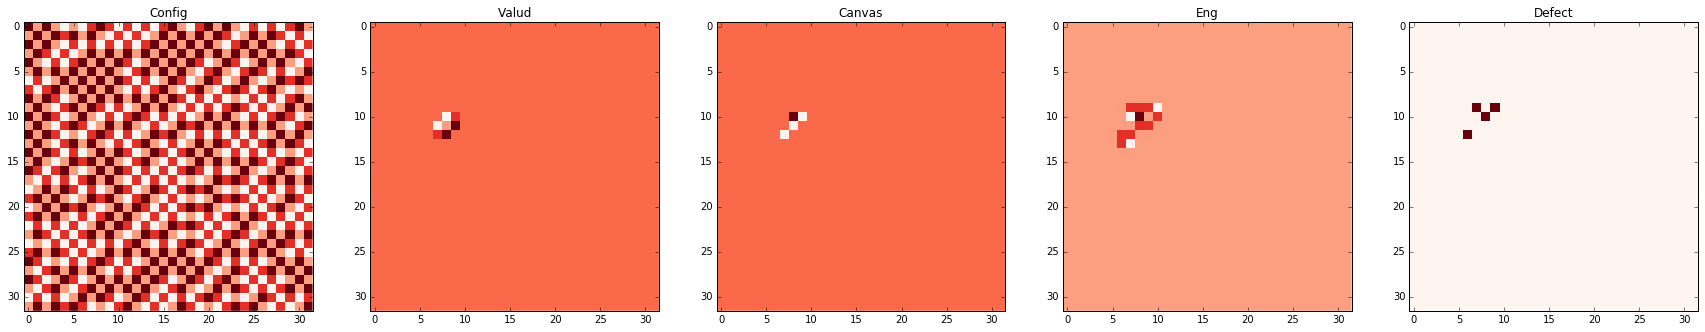

2
action: 2, reward: -0.0087890625, terminate: False, returns: None


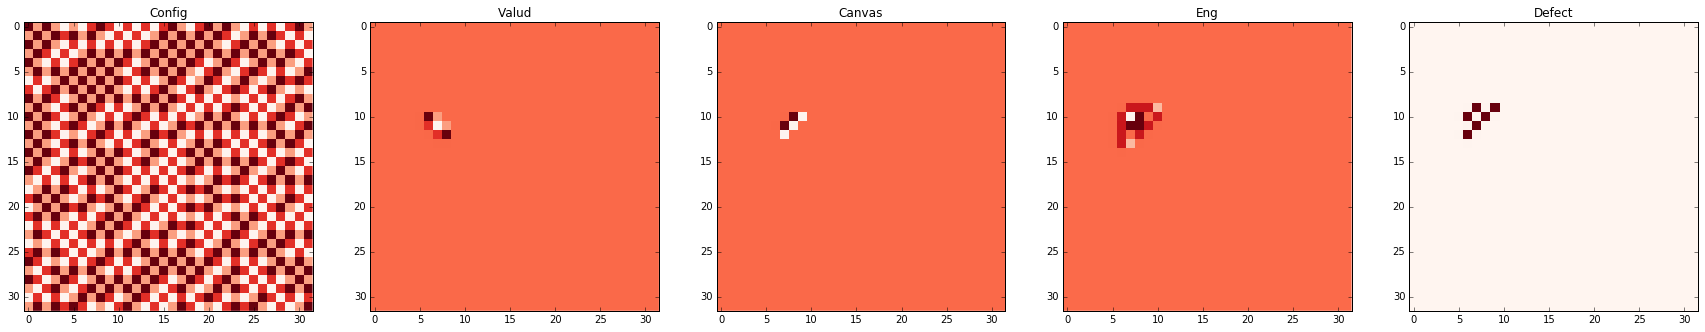

2
action: 5, reward: -0.005859375, terminate: False, returns: None


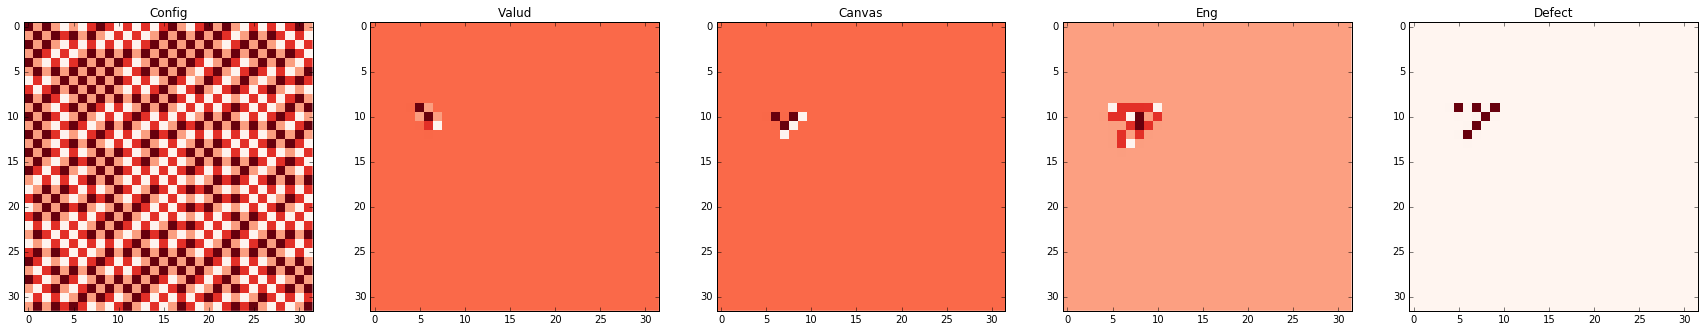

2
action: 5, reward: -0.0146484375, terminate: False, returns: None


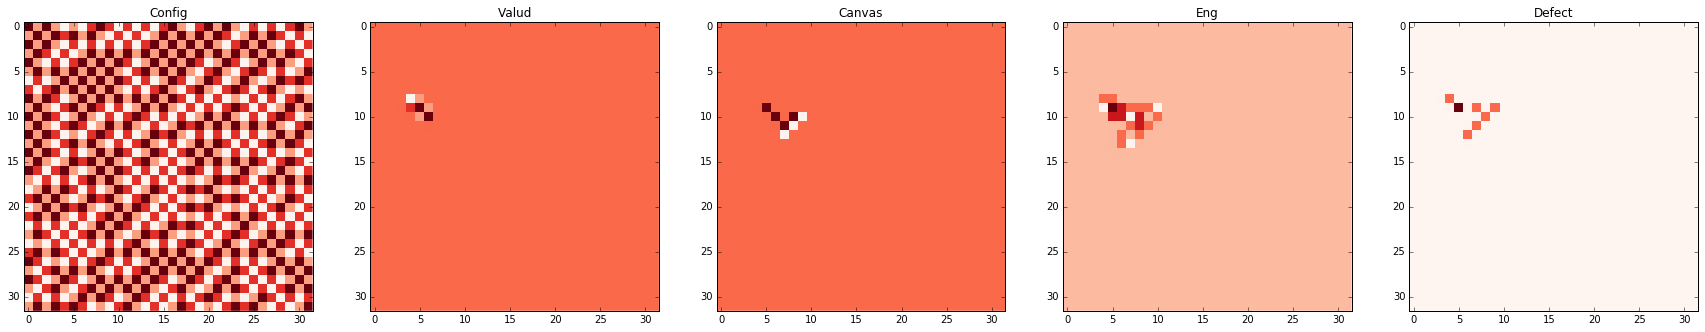

2
action: 0, reward: -0.0078125, terminate: False, returns: None


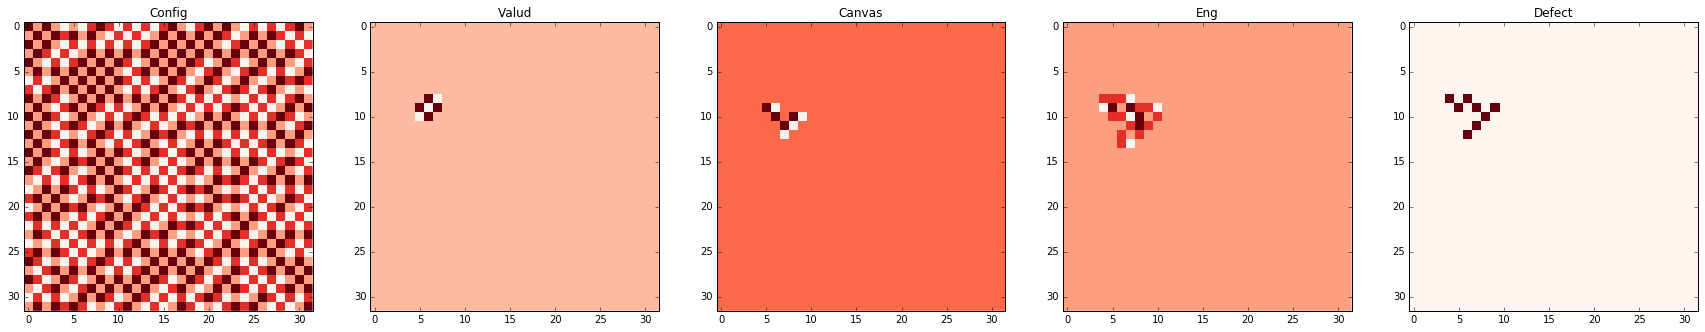

2
action: 0, reward: -0.0048828125, terminate: False, returns: None


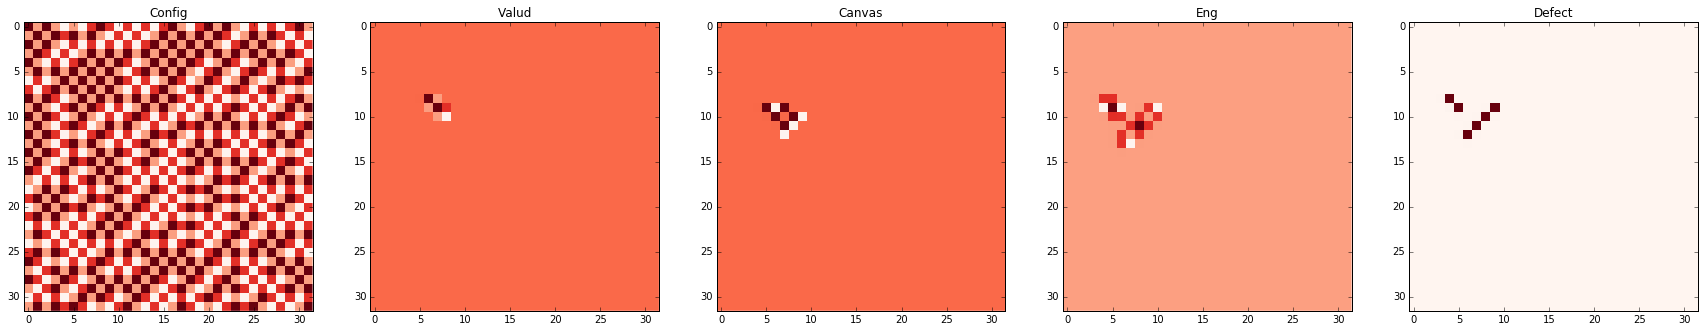

2
action: 0, reward: -0.009765625, terminate: False, returns: None


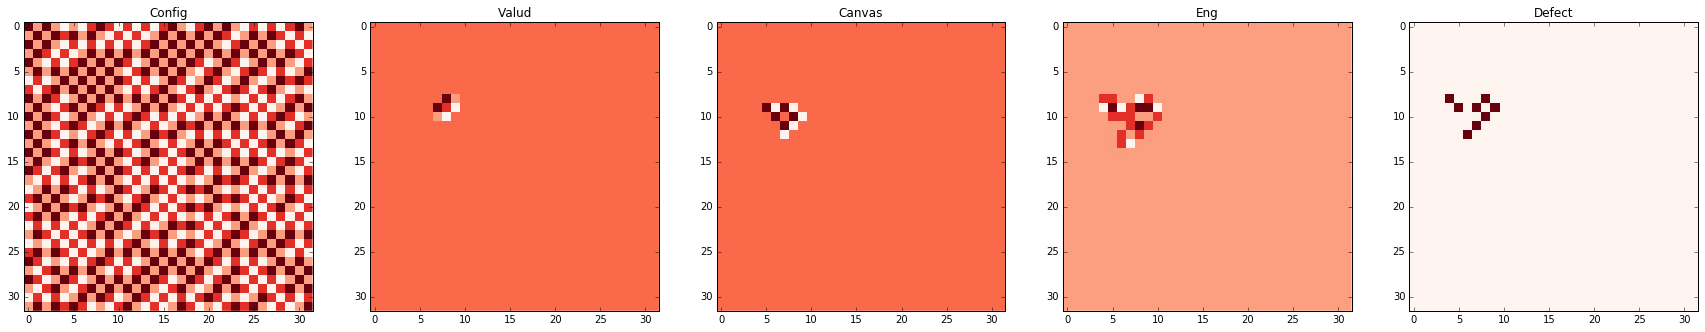

2
action: 2, reward: -0.009765625, terminate: False, returns: None


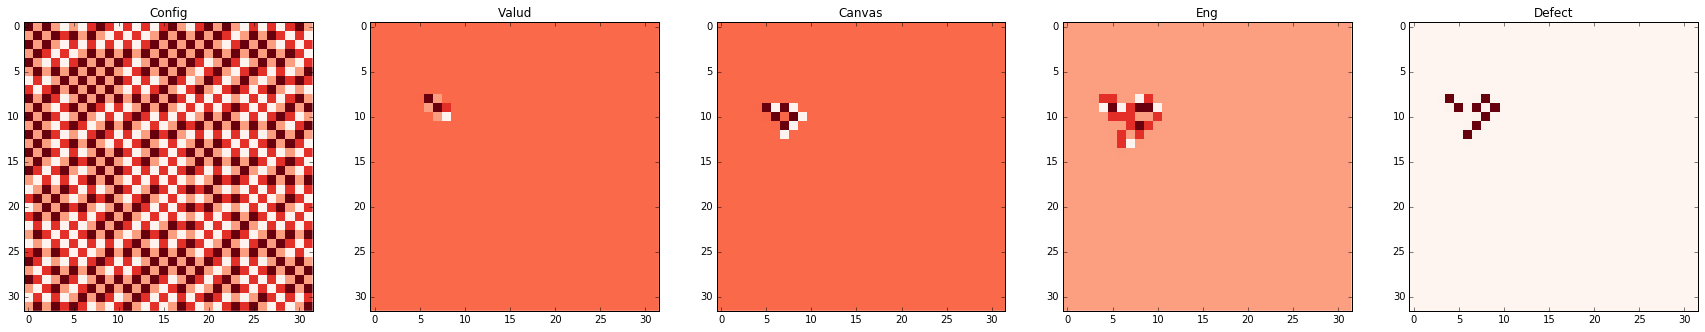

2
action: 6, reward: 0.0, terminate: False, returns: None


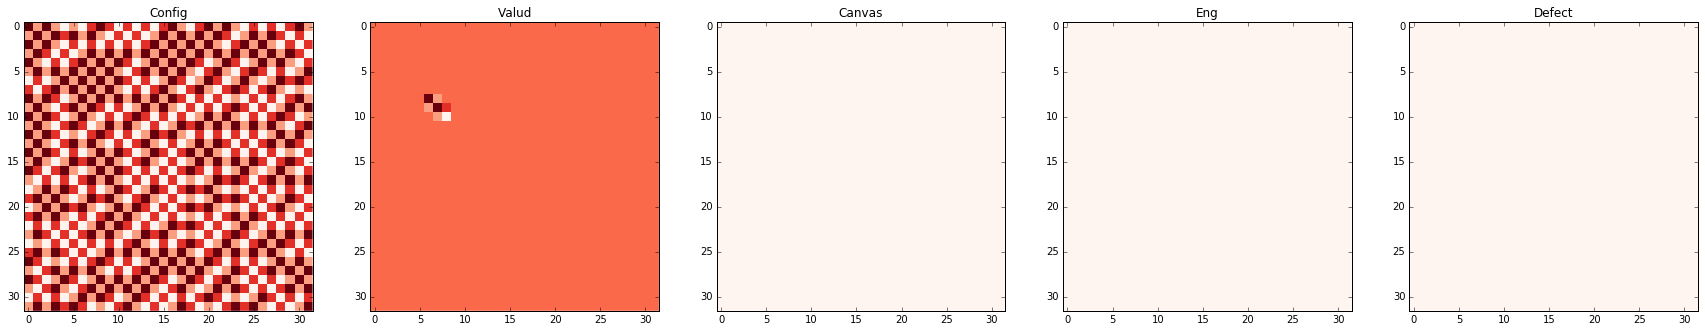

1
action: 6, reward: 0.0, terminate: False, returns: None


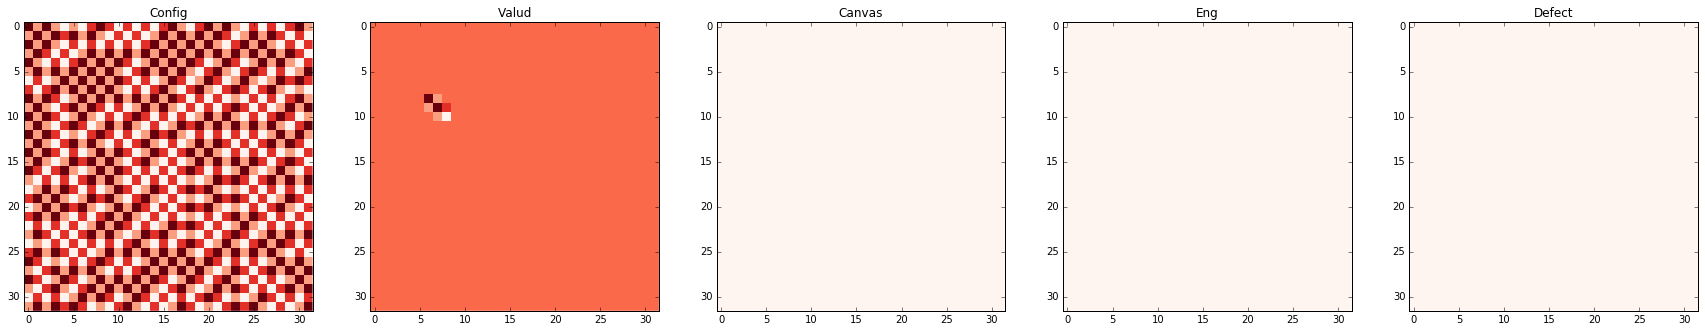

0
action: 2, reward: -0.0048828125, terminate: True, returns: None


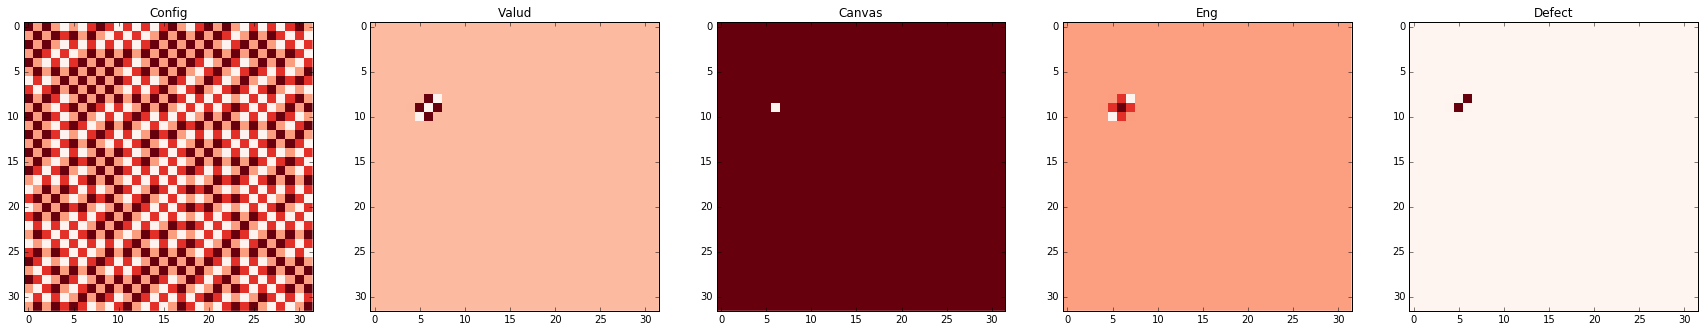

0
Episode 5: Reward = -0.33203125
action: 4, reward: -0.0048828125, terminate: False, returns: None


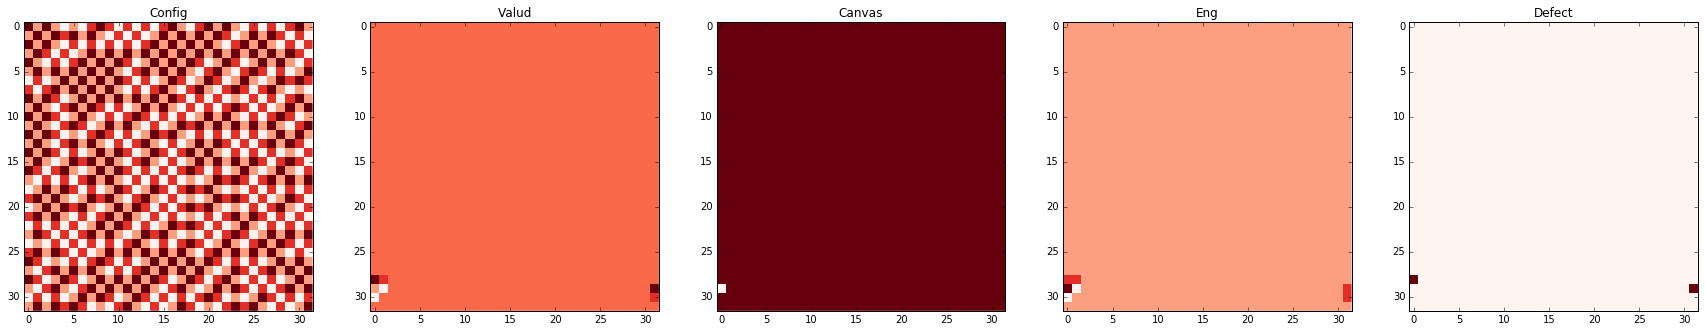

5
action: 3, reward: -0.001953125, terminate: False, returns: None


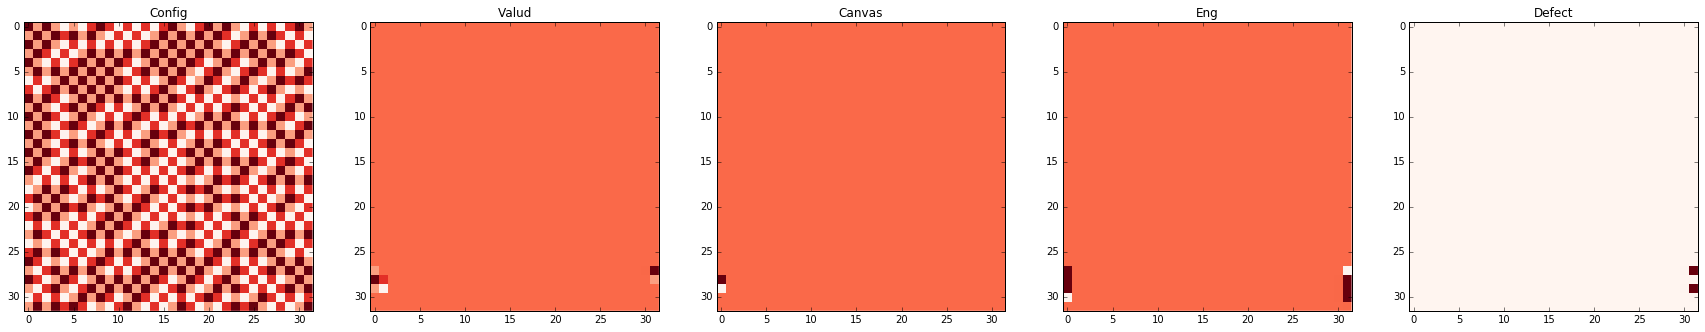

5
action: 1, reward: -0.001953125, terminate: False, returns: None


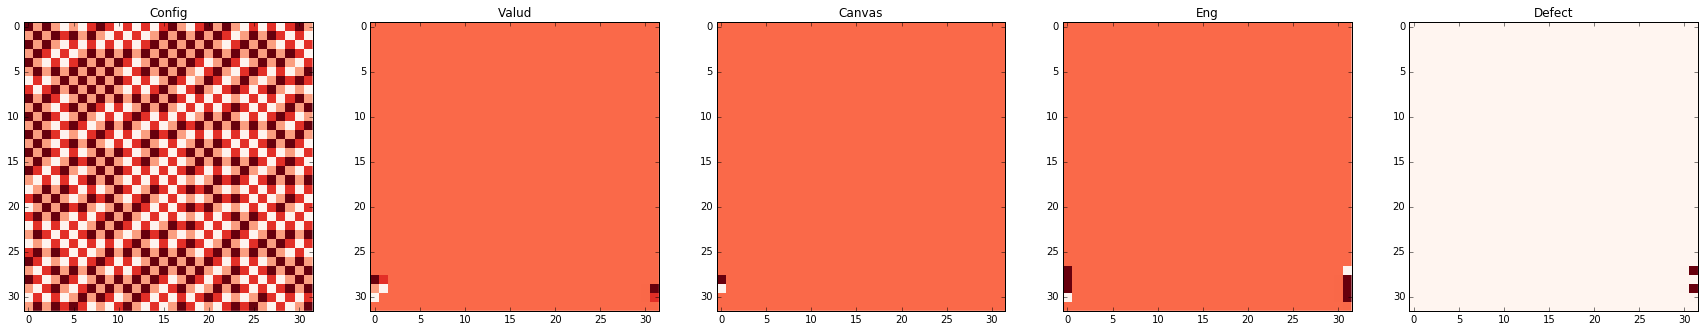

5
action: 3, reward: -0.001953125, terminate: False, returns: None


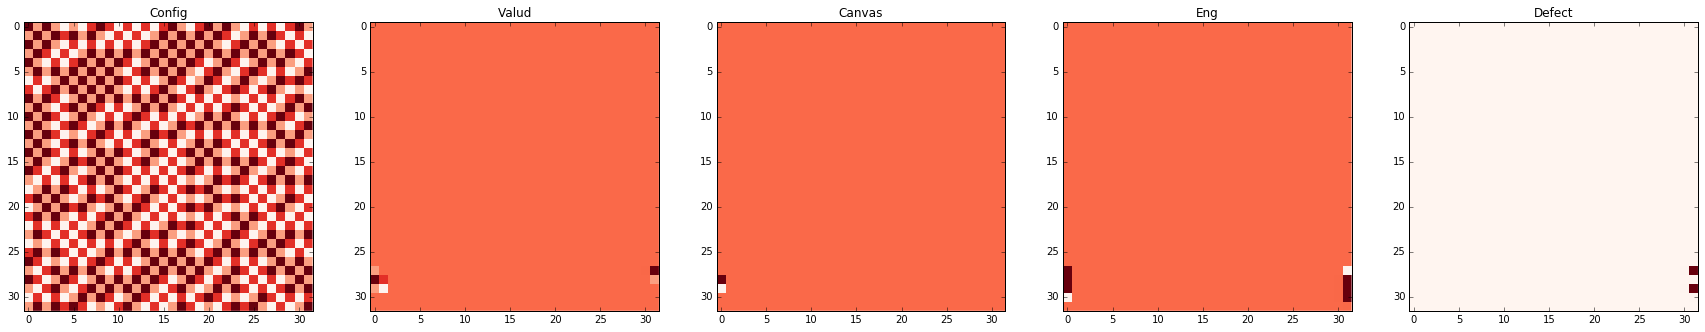

5
action: 2, reward: -0.0029296875, terminate: False, returns: None


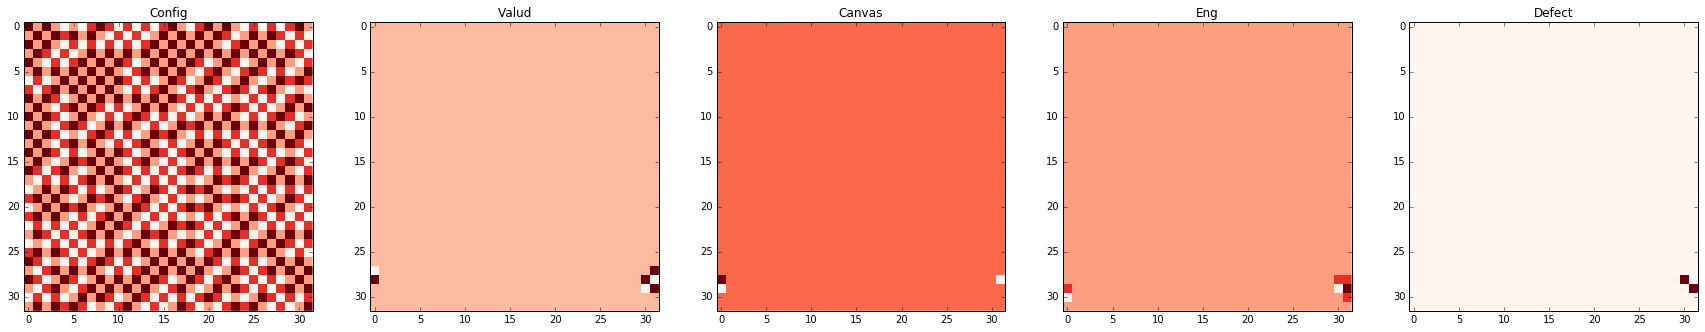

5
action: 4, reward: -0.01171875, terminate: False, returns: None


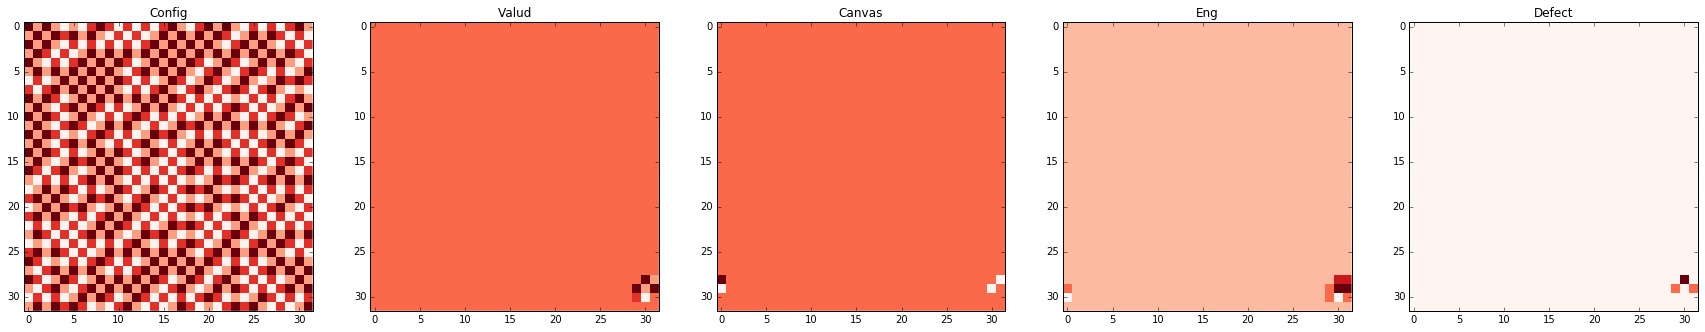

5
action: 1, reward: -0.0205078125, terminate: False, returns: None


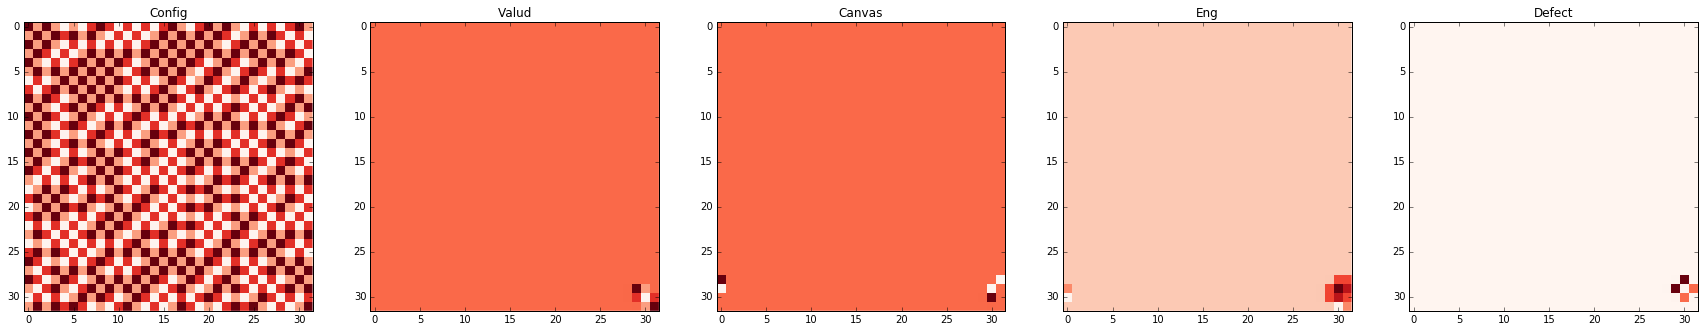

5
action: 1, reward: -0.029296875, terminate: False, returns: None


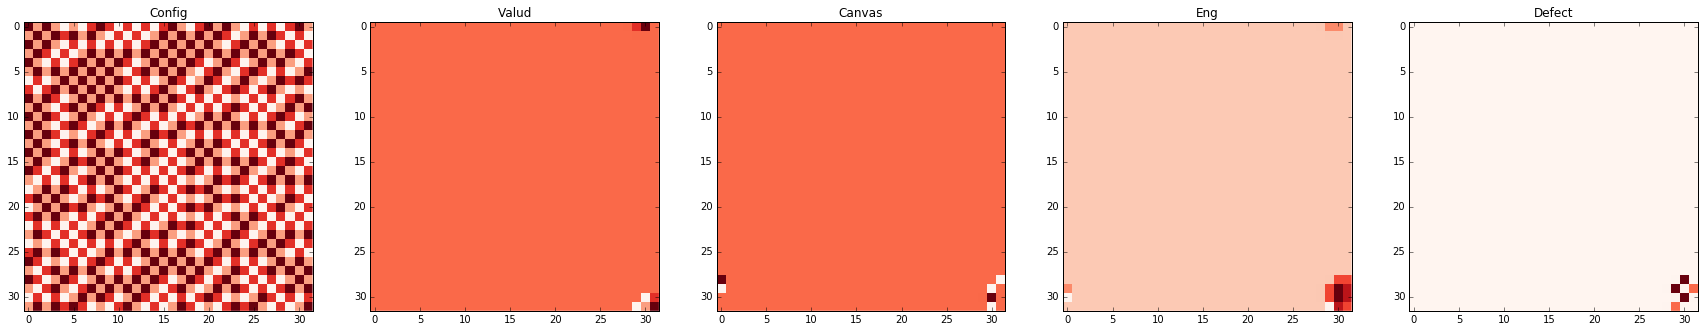

5
action: 3, reward: -0.029296875, terminate: False, returns: None


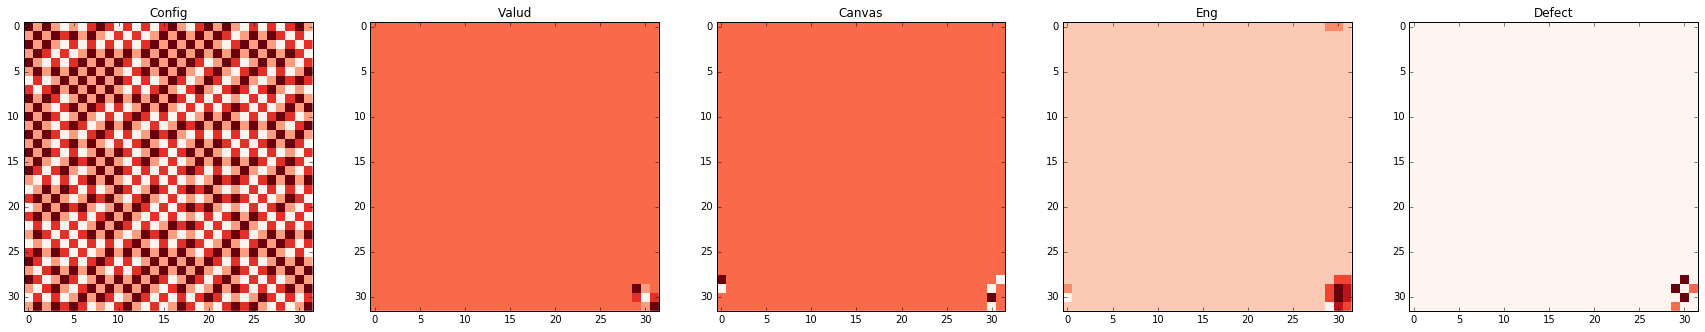

5
action: 5, reward: -0.0224609375, terminate: False, returns: None


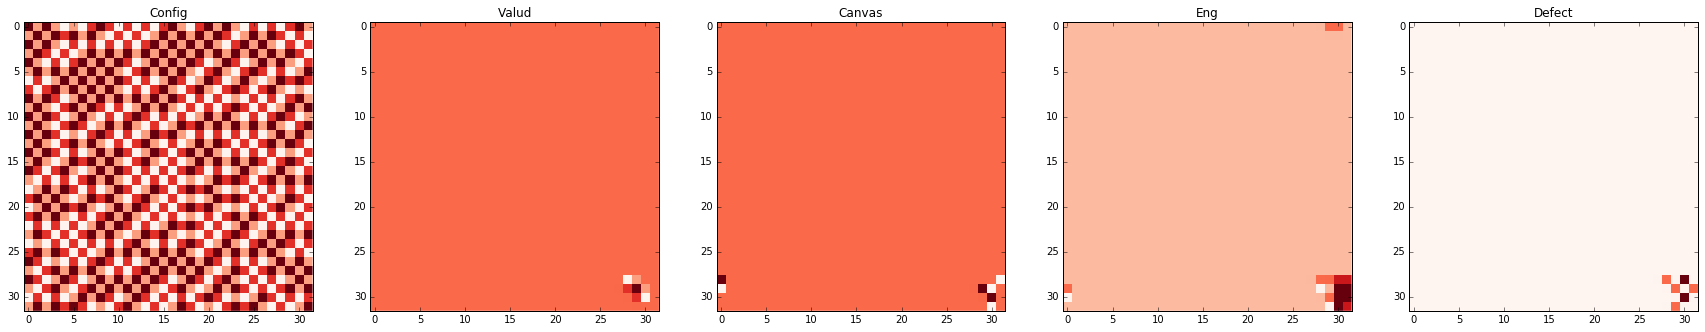

5
action: 0, reward: -0.0224609375, terminate: False, returns: None


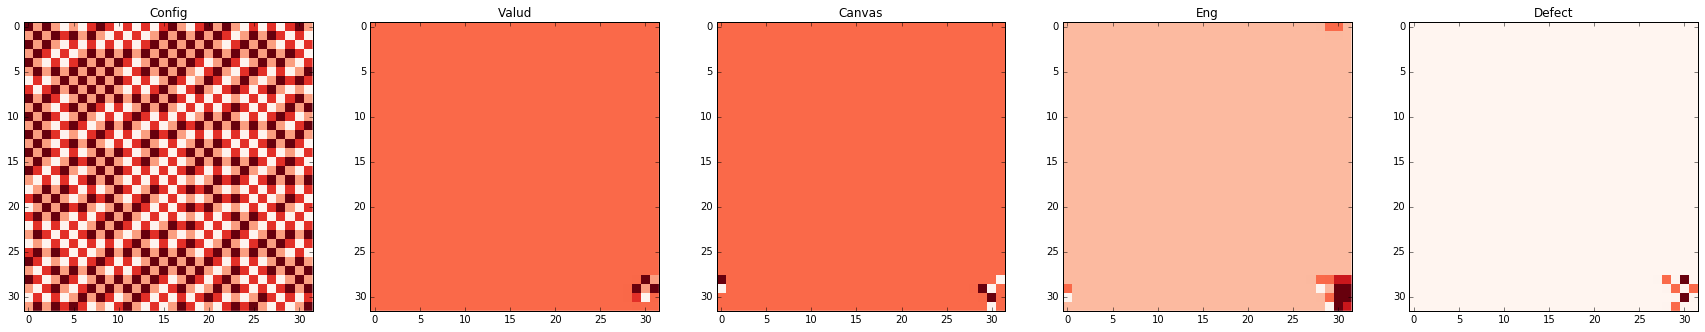

5
action: 0, reward: -0.01171875, terminate: False, returns: None


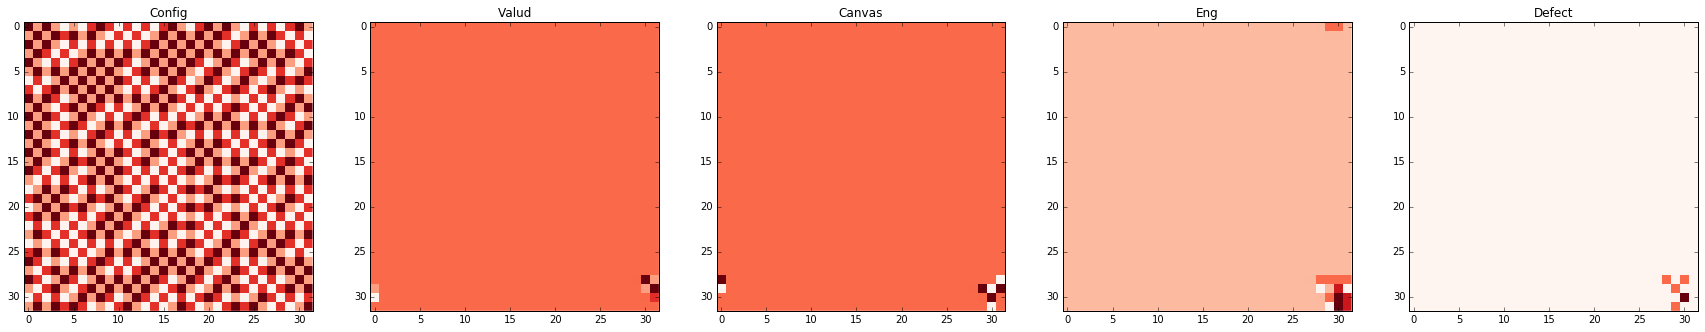

5
action: 0, reward: -0.01171875, terminate: False, returns: None


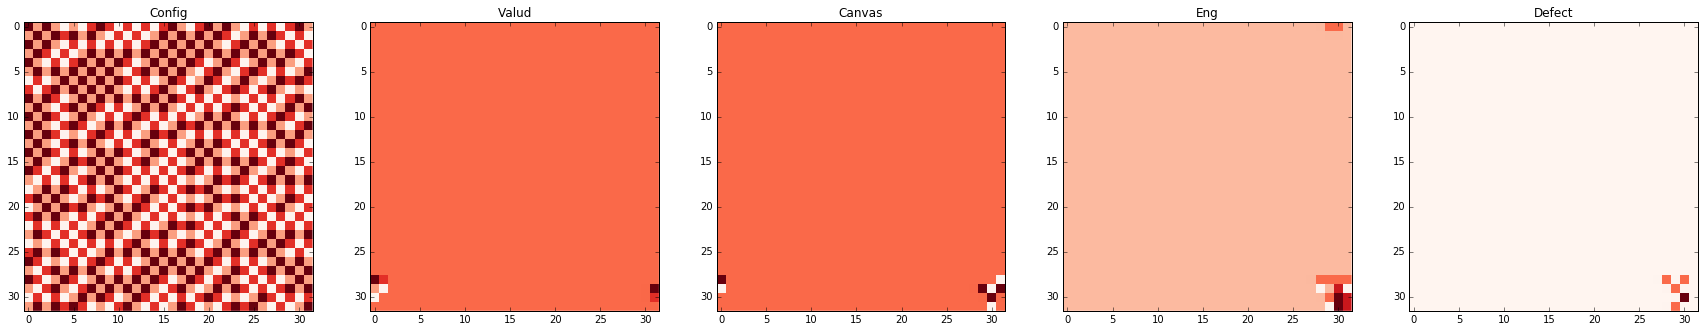

5
action: 5, reward: -0.0126953125, terminate: False, returns: None


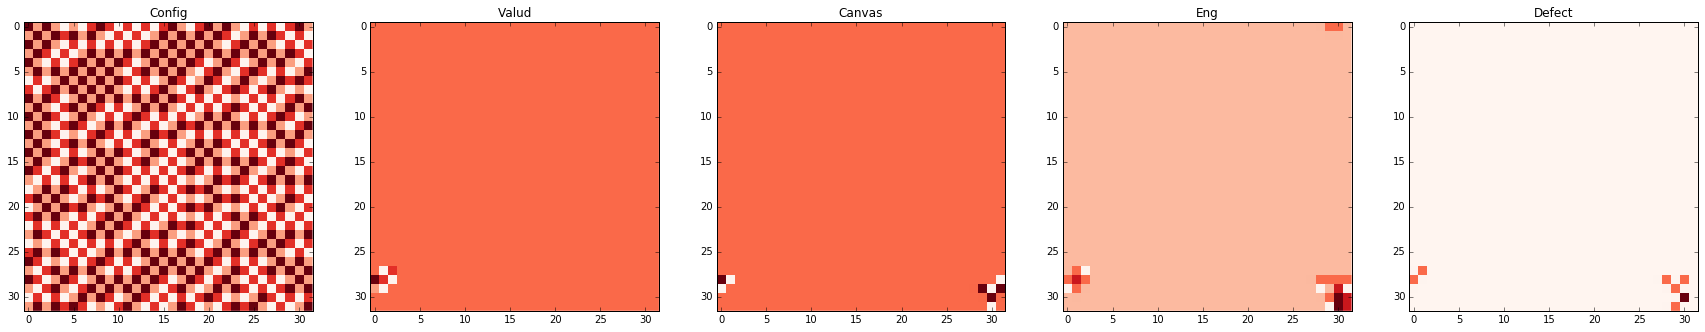

5
action: 5, reward: -0.017578125, terminate: False, returns: None


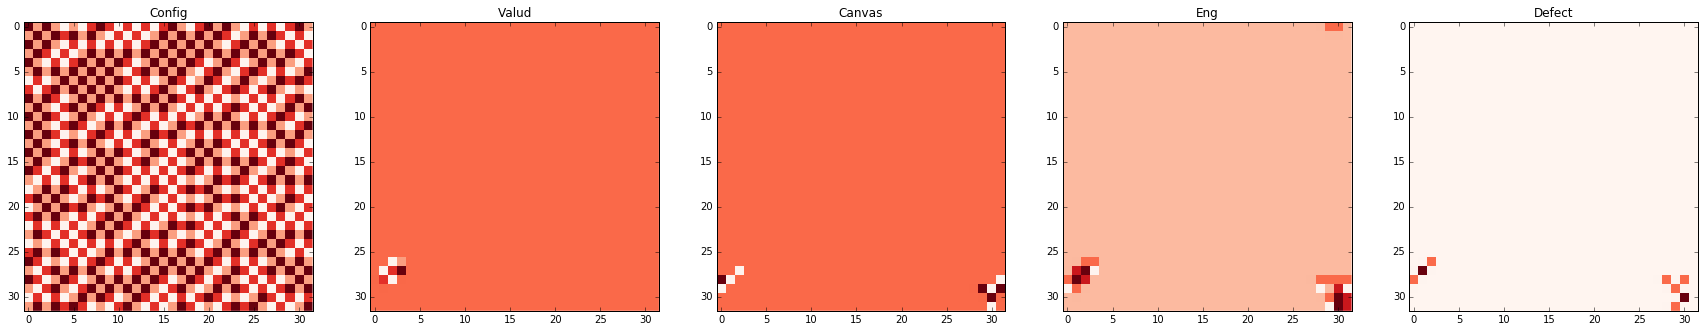

5
action: 0, reward: -0.0263671875, terminate: False, returns: None


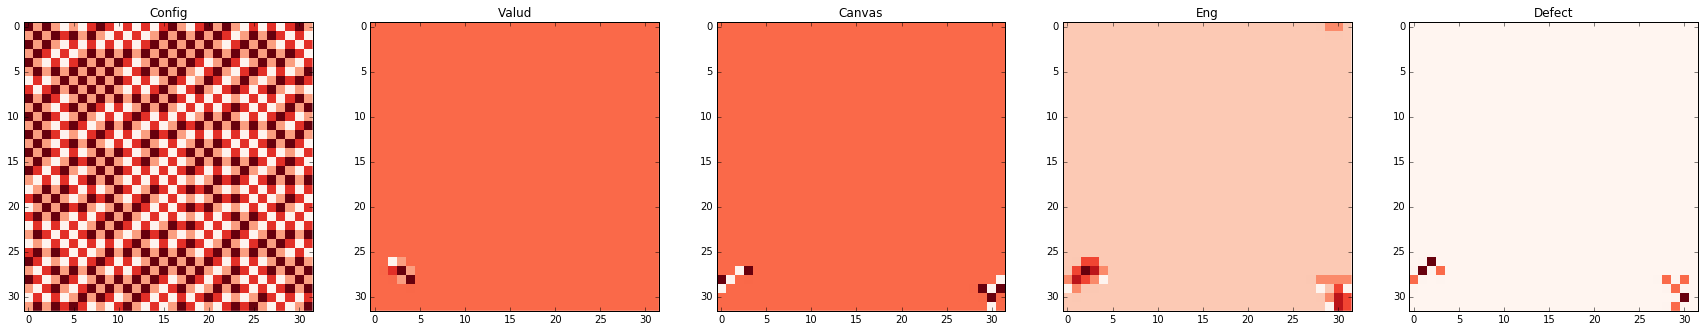

5
action: 4, reward: -0.03515625, terminate: False, returns: None


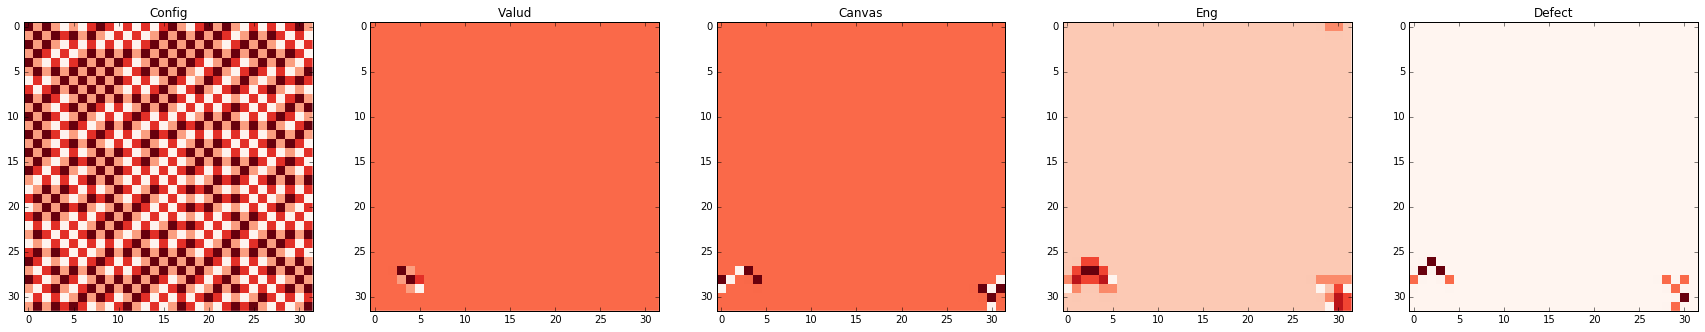

5
action: 4, reward: -0.0322265625, terminate: False, returns: None


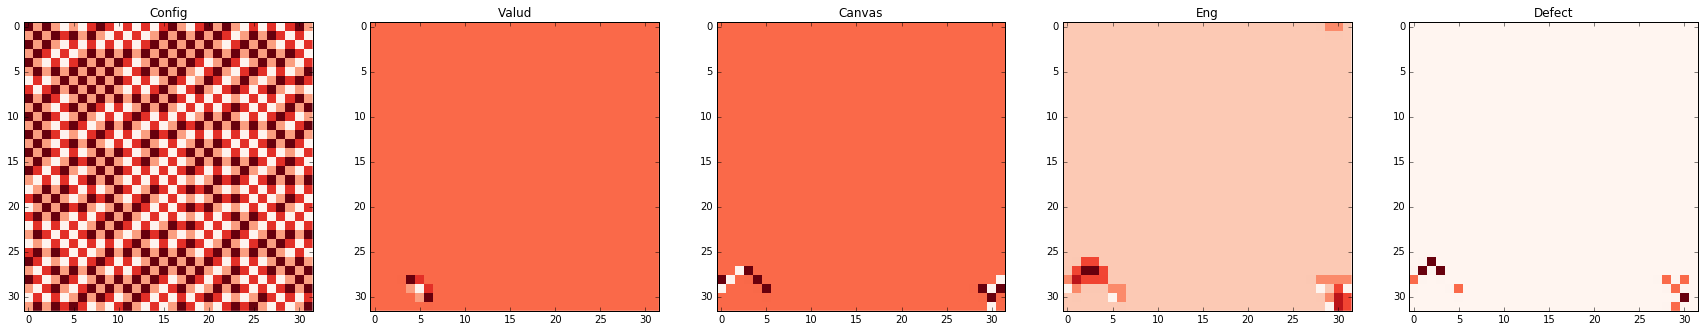

5
action: 1, reward: -0.037109375, terminate: False, returns: None


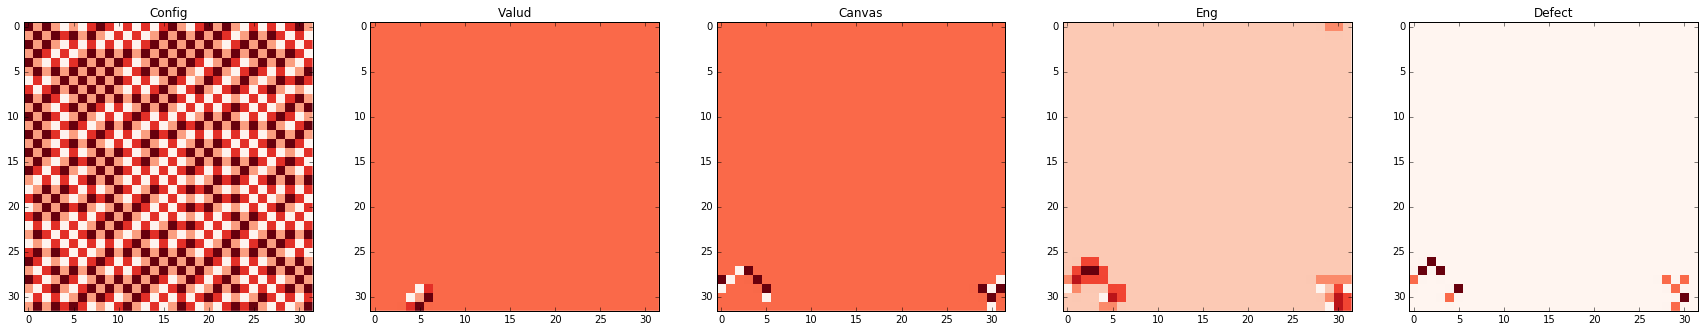

5
action: 6, reward: 0.0, terminate: False, returns: None


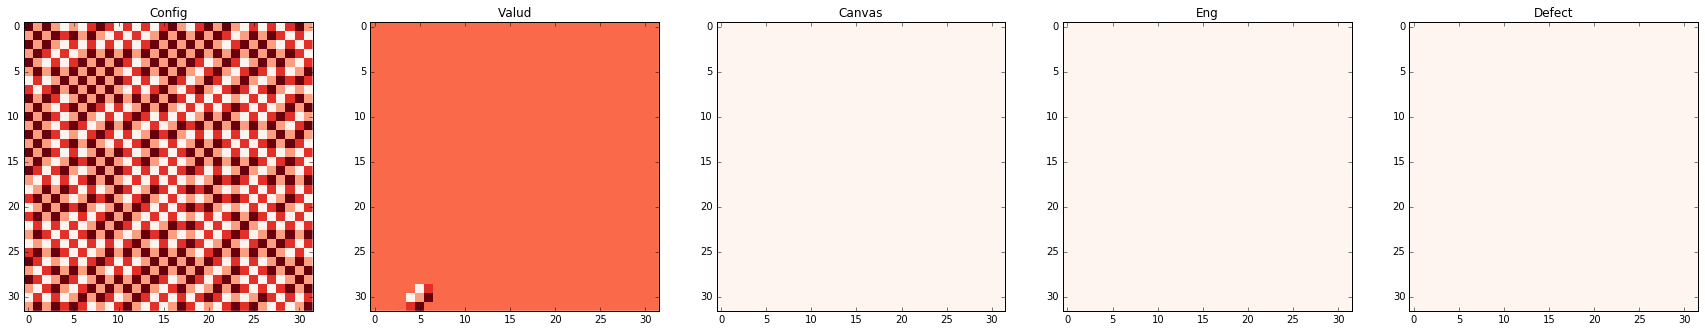

4
action: 6, reward: 0.0, terminate: False, returns: None


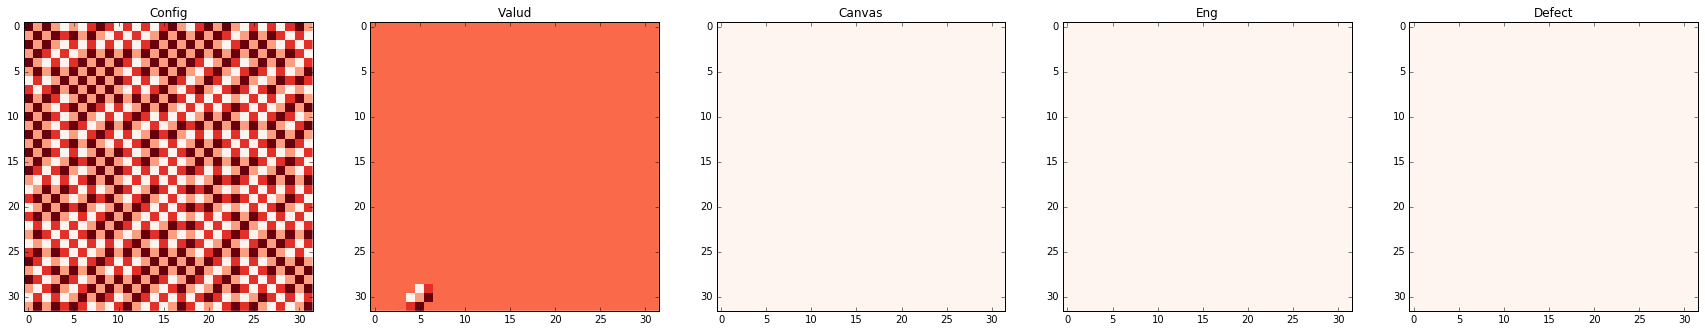

3
action: 6, reward: 0.0, terminate: False, returns: None


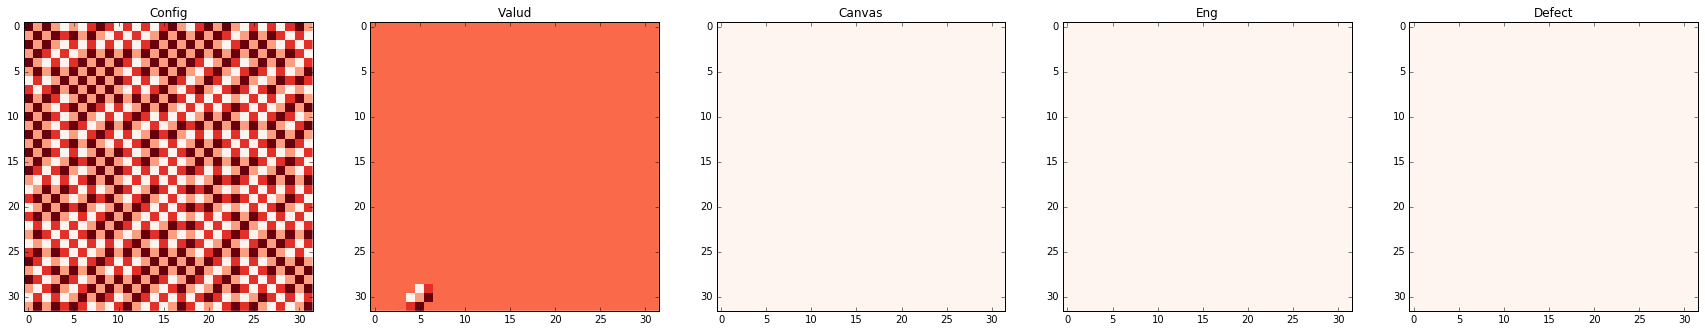

2
action: 5, reward: -0.0048828125, terminate: False, returns: None


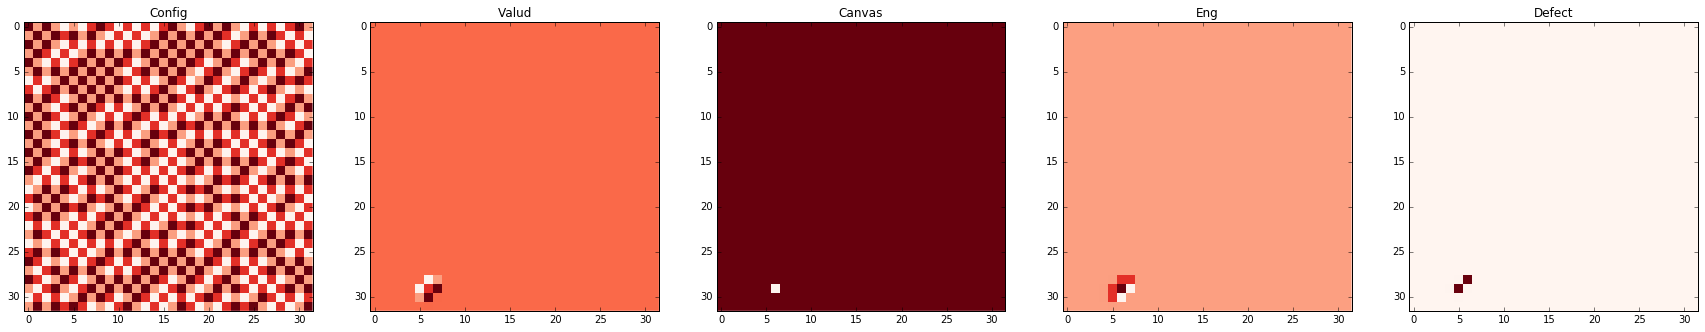

2
action: 4, reward: -0.001953125, terminate: False, returns: None


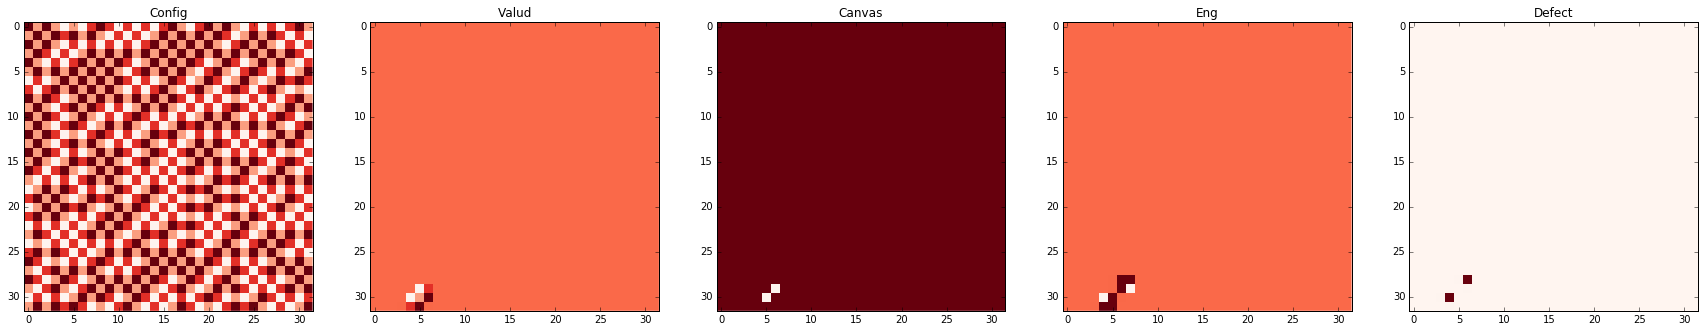

2
action: 5, reward: -0.001953125, terminate: False, returns: None


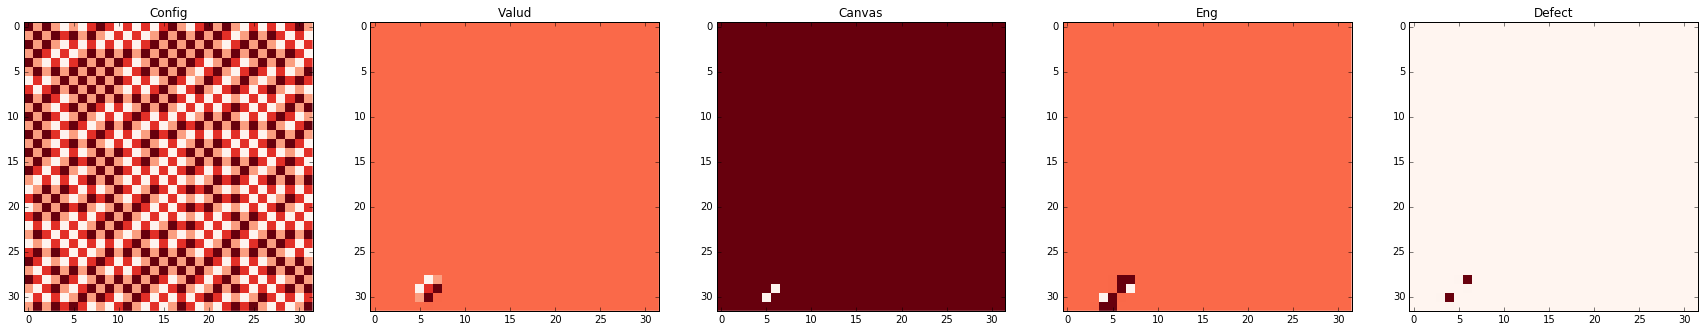

2
action: 3, reward: -0.0029296875, terminate: False, returns: None


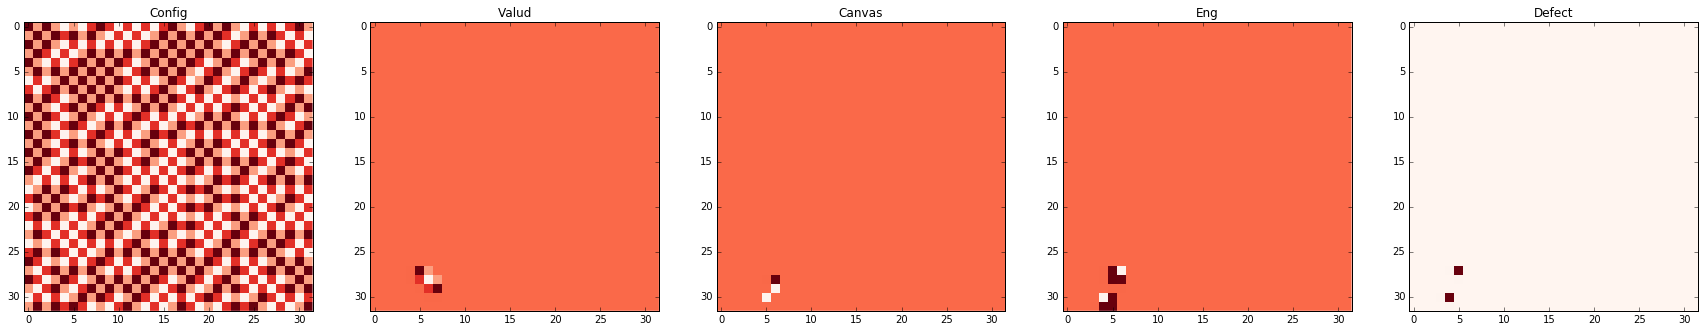

2
action: 1, reward: -0.0029296875, terminate: False, returns: None


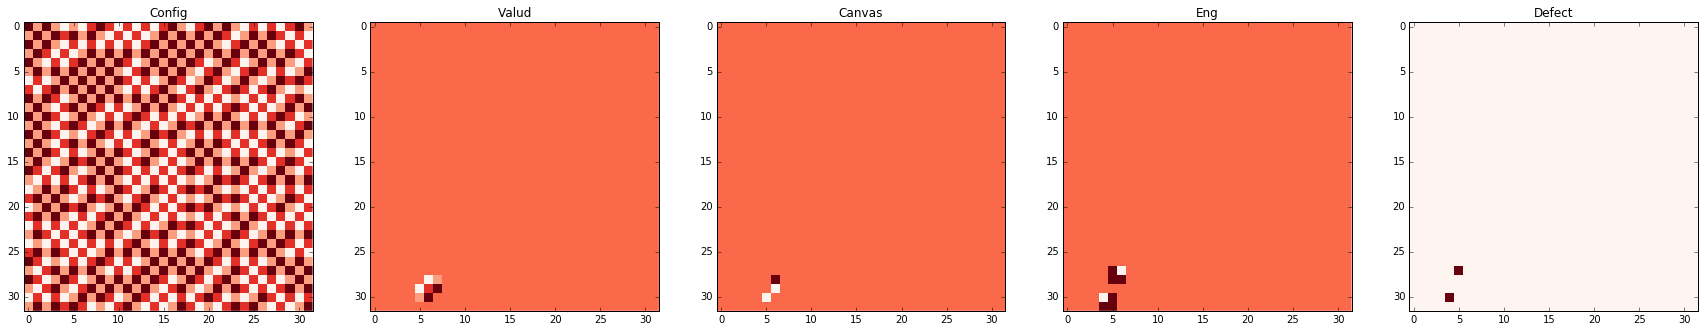

2
action: 1, reward: -0.00390625, terminate: False, returns: None


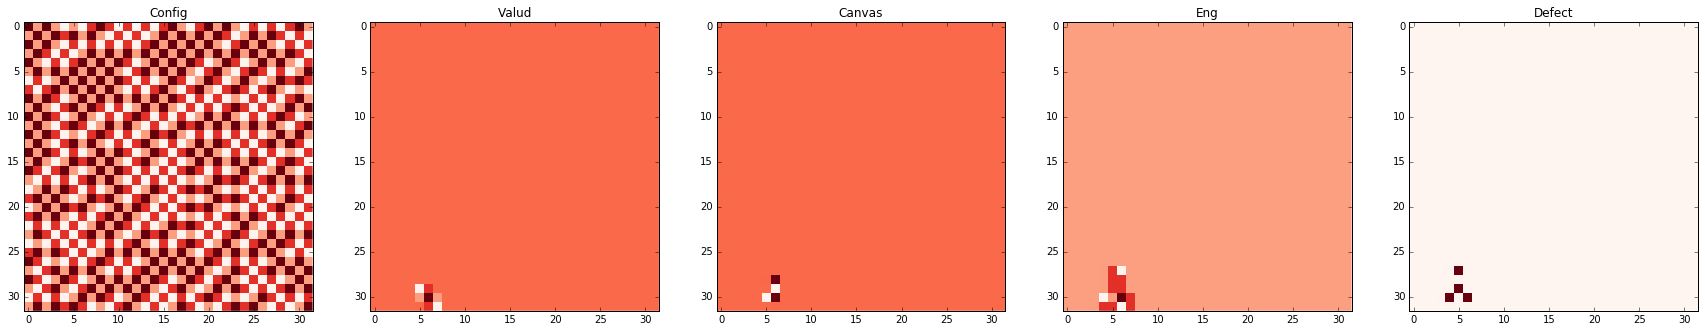

2
action: 1, reward: -0.0126953125, terminate: False, returns: None


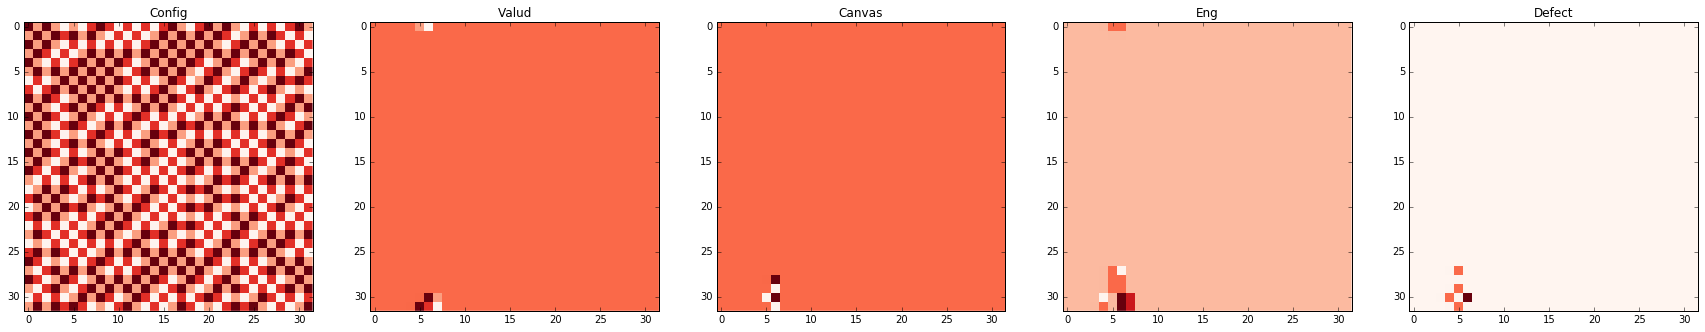

2
action: 5, reward: -0.005859375, terminate: False, returns: None


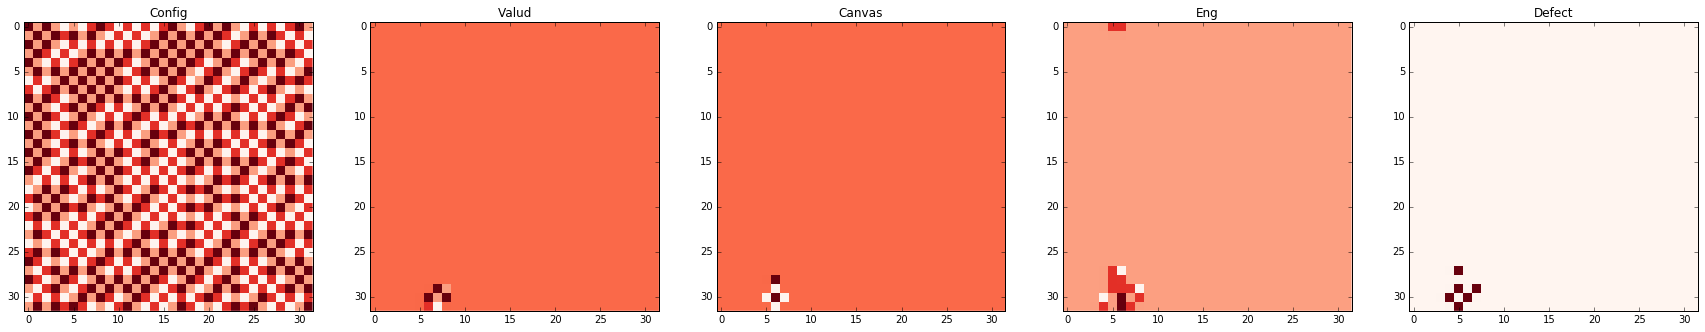

2
action: 5, reward: -0.0146484375, terminate: False, returns: None


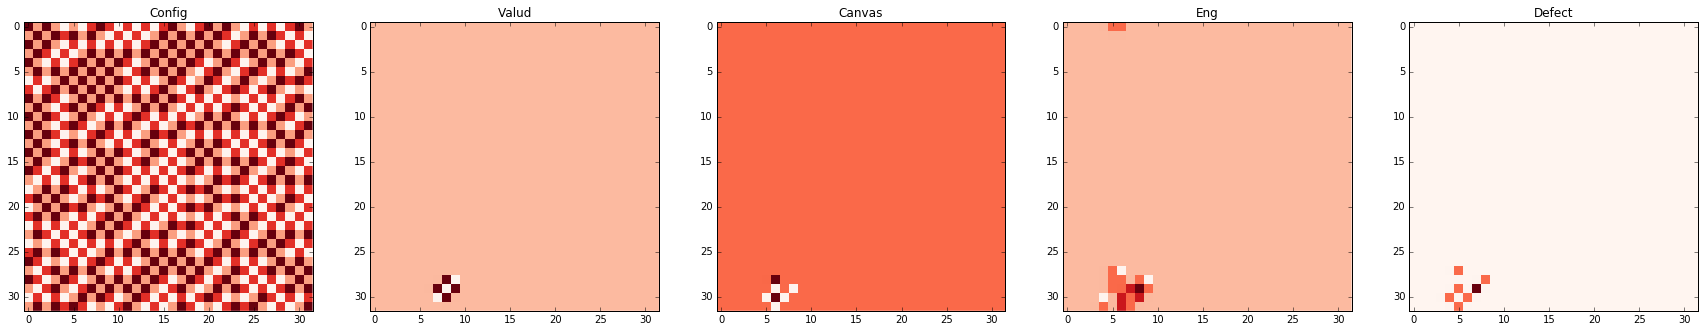

2
action: 1, reward: -0.0078125, terminate: False, returns: None


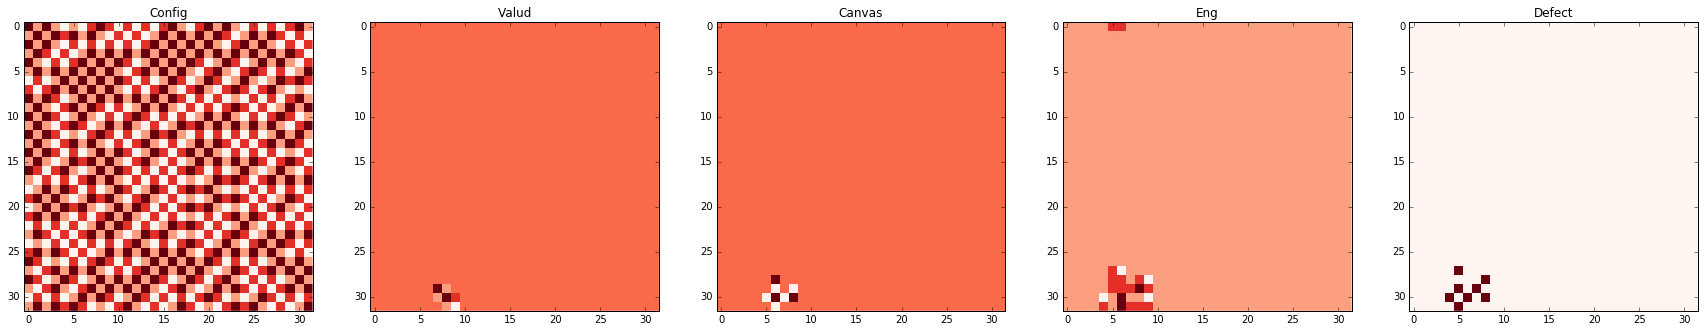

2
action: 5, reward: -0.0087890625, terminate: False, returns: None


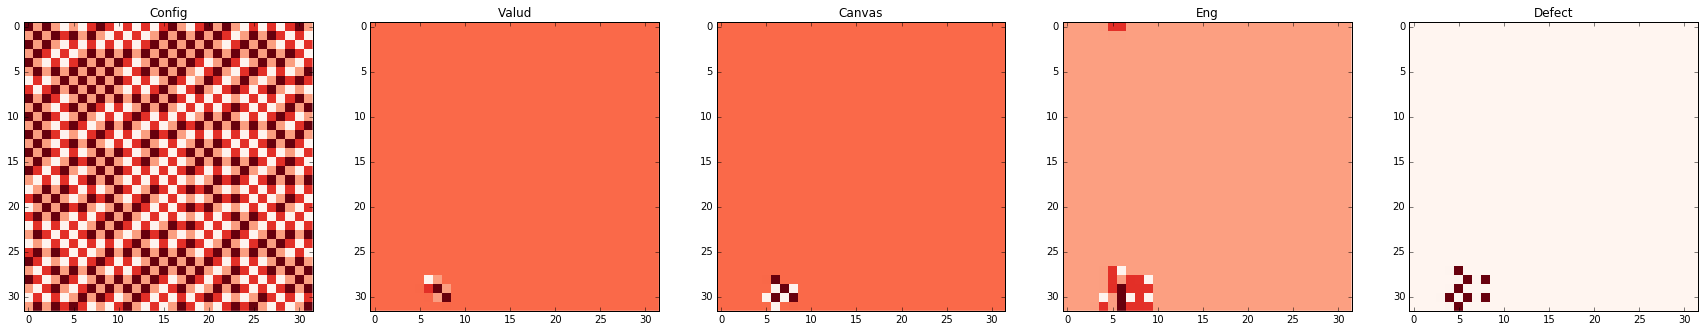

2
action: 1, reward: -0.0087890625, terminate: False, returns: None


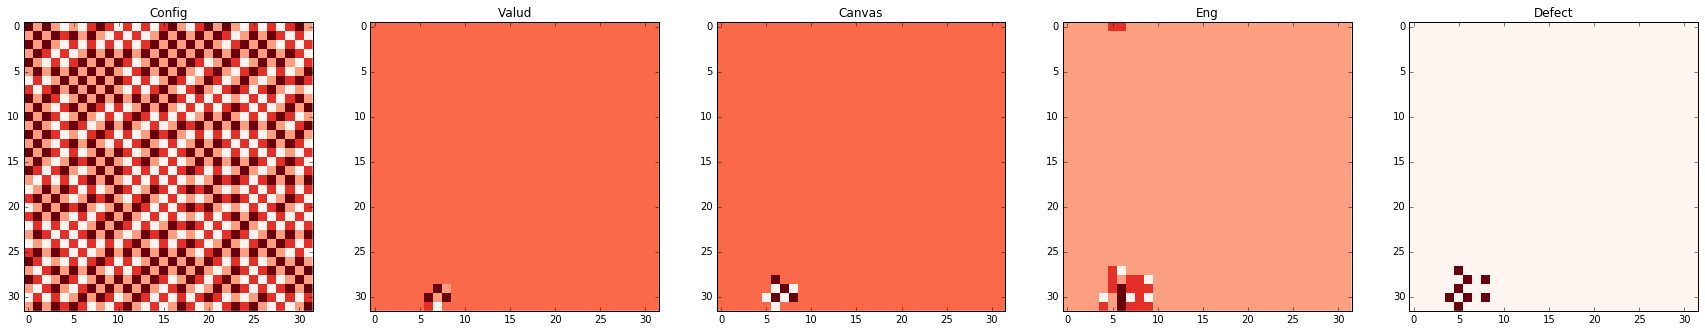

2
action: 1, reward: -0.005859375, terminate: False, returns: None


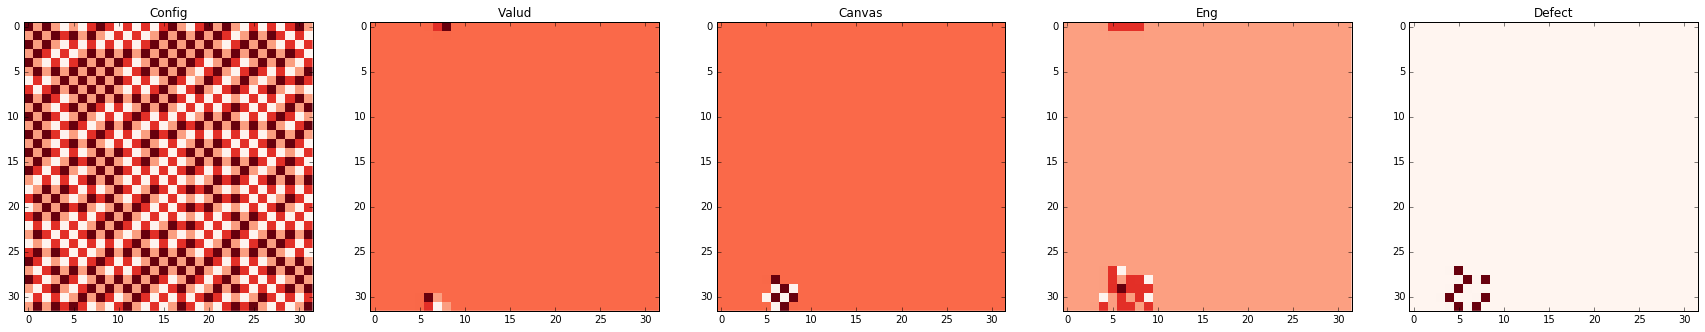

2
action: 2, reward: -0.005859375, terminate: False, returns: None


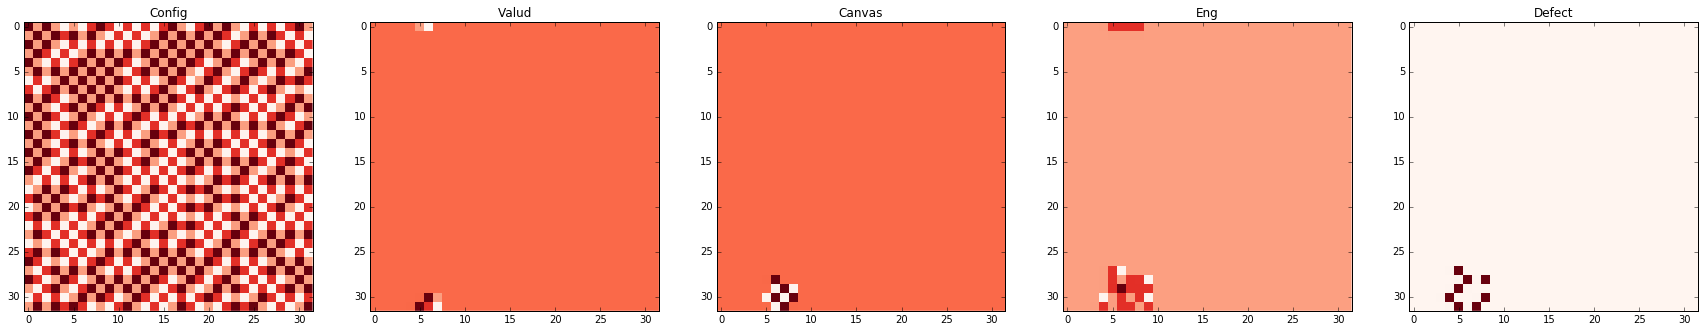

2
action: 5, reward: -0.005859375, terminate: False, returns: None


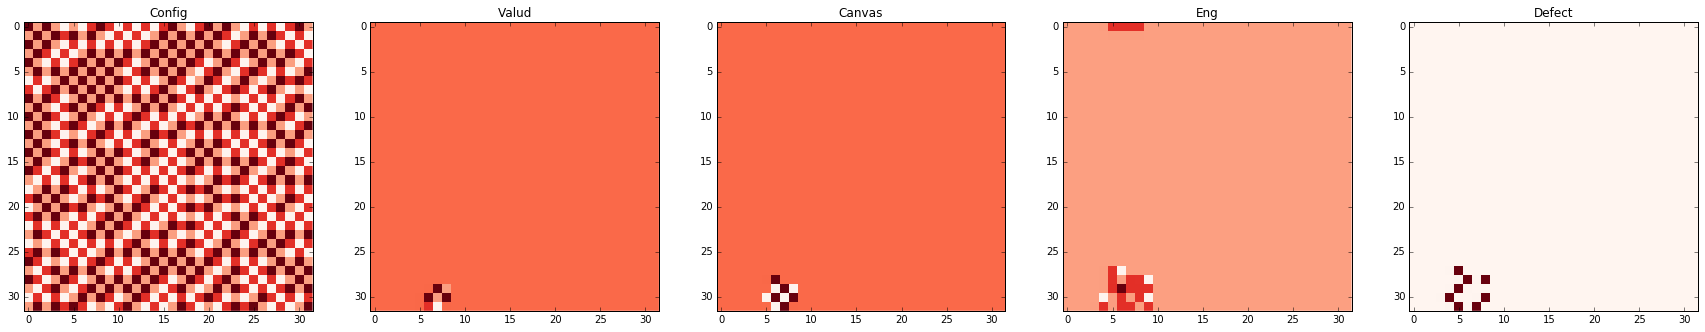

2
action: 2, reward: -0.005859375, terminate: False, returns: None


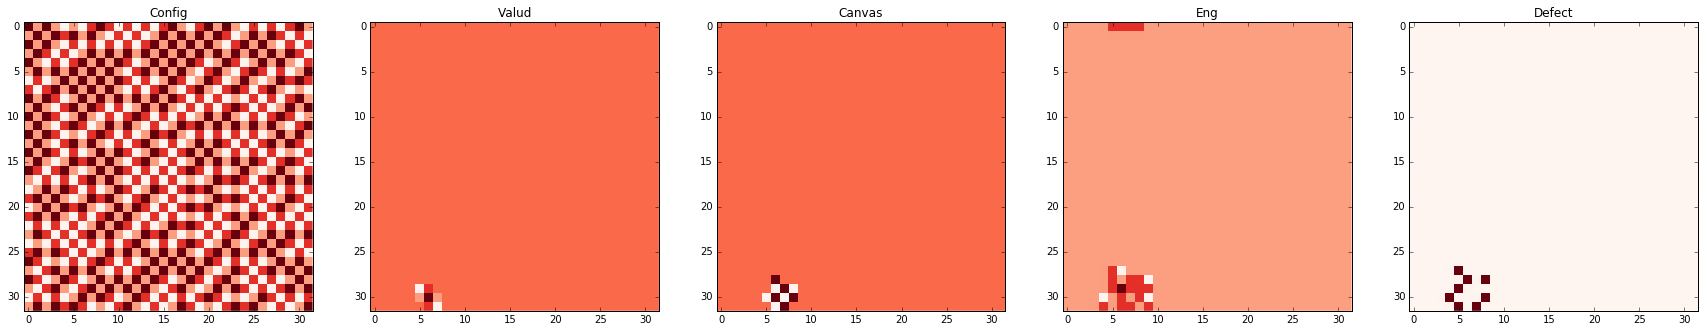

2
action: 3, reward: -0.005859375, terminate: False, returns: None


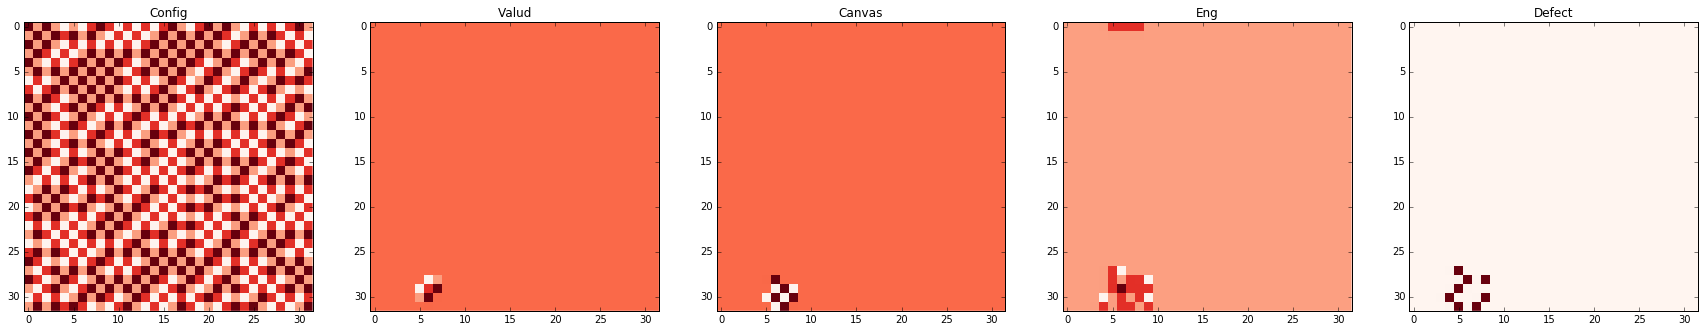

2
action: 5, reward: -0.0068359375, terminate: False, returns: None


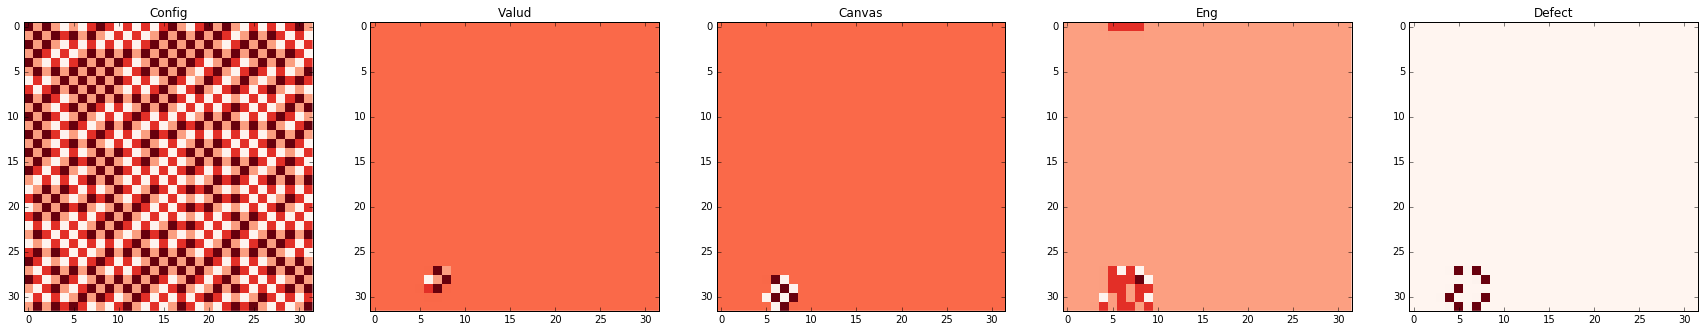

2
action: 6, reward: 0.0, terminate: False, returns: None


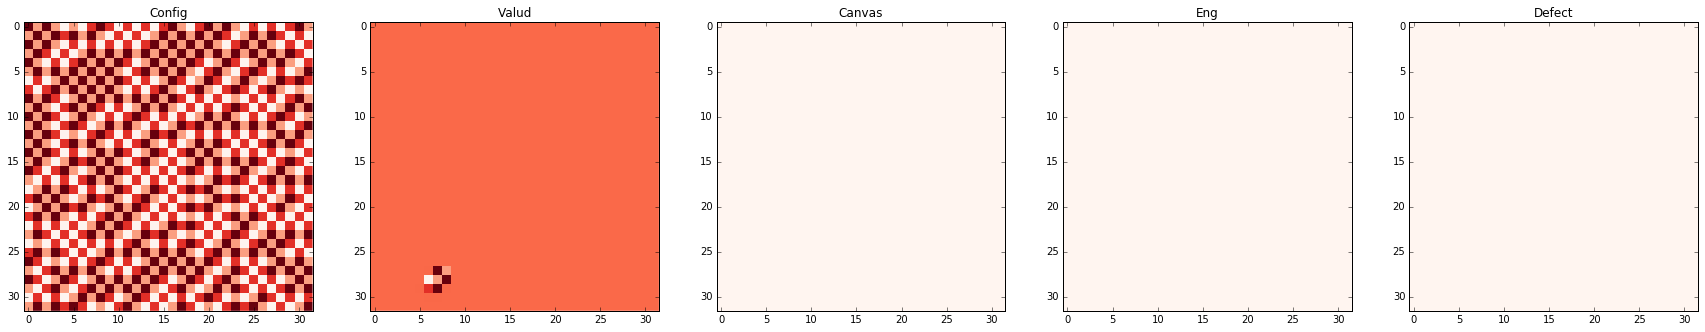

1
action: 6, reward: 0.0, terminate: False, returns: None


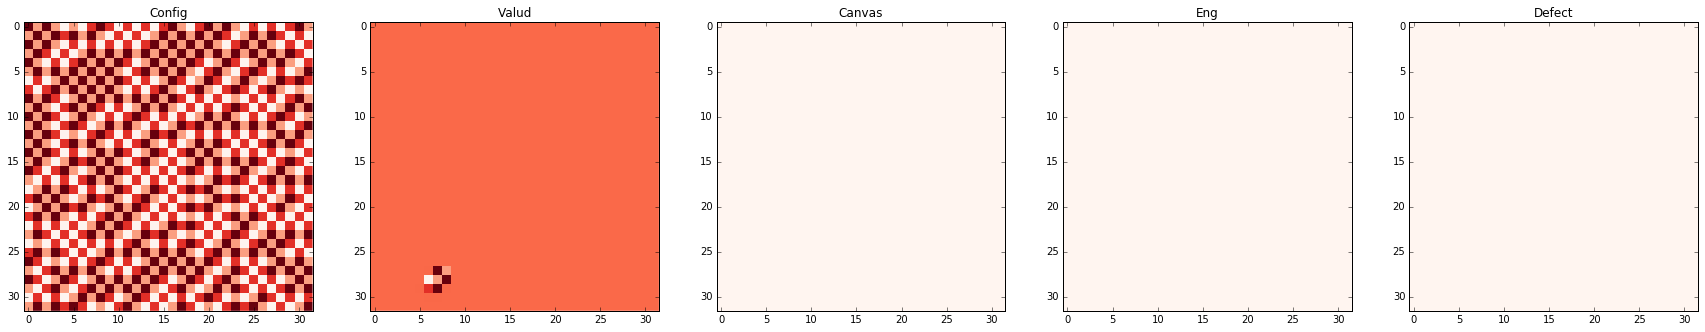

0
action: 3, reward: -0.0048828125, terminate: True, returns: None


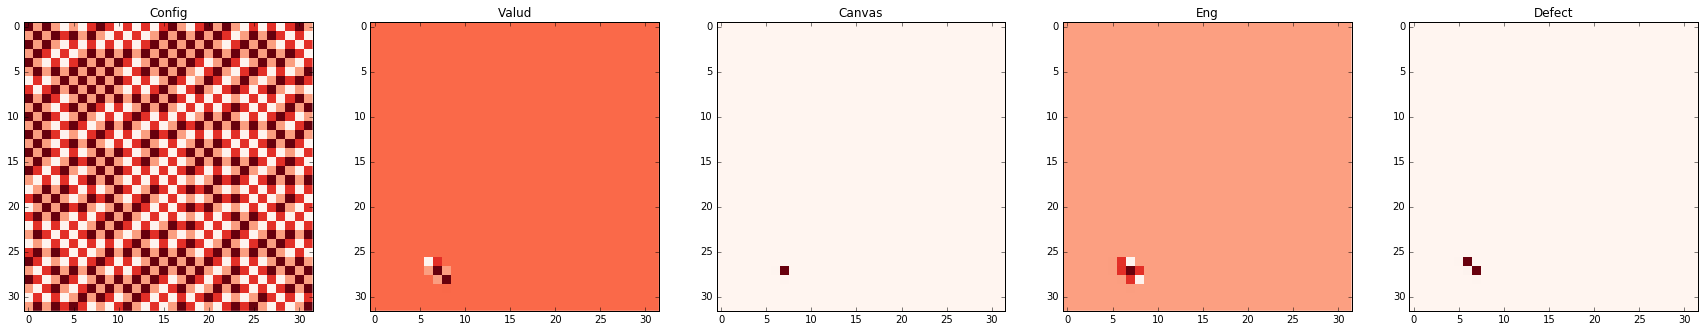

0
Episode 6: Reward = -0.4521484375
action: 5, reward: -0.0048828125, terminate: False, returns: None


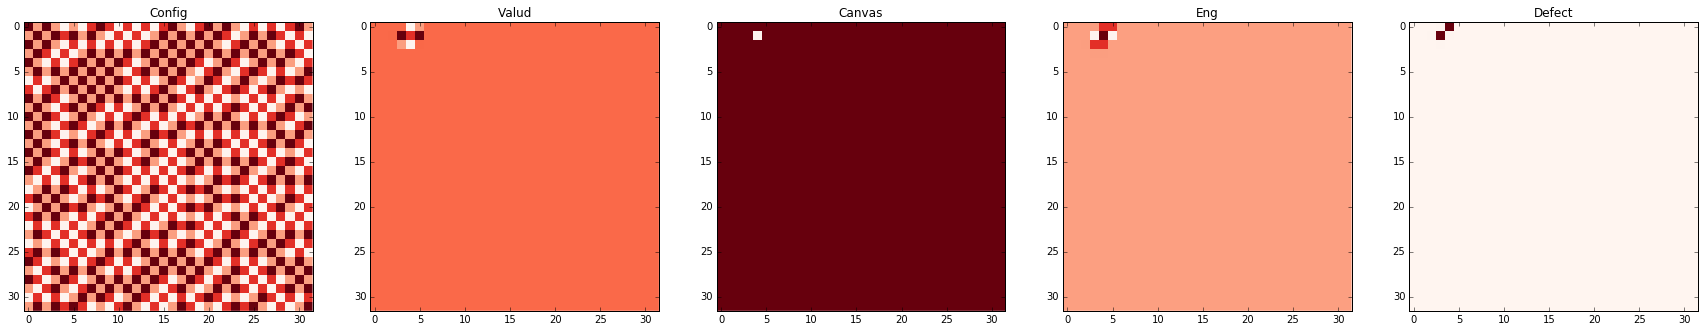

5
action: 1, reward: -0.001953125, terminate: False, returns: None


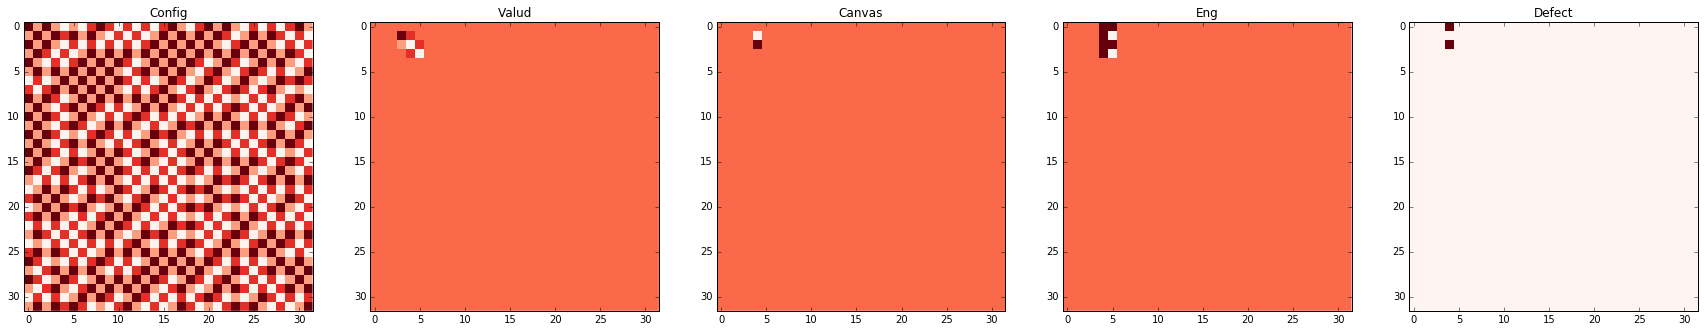

5
action: 4, reward: -0.0107421875, terminate: False, returns: None


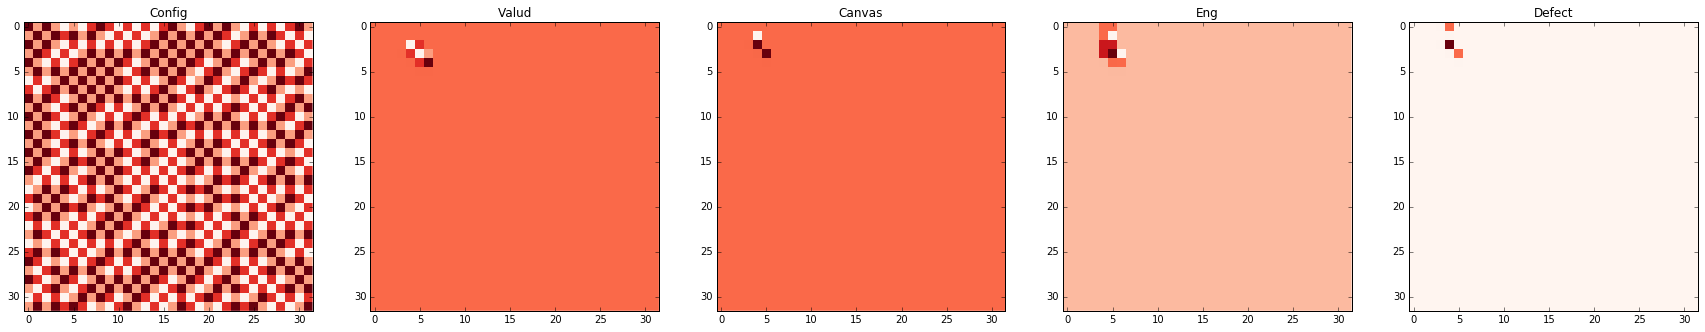

5
action: 6, reward: 0.0, terminate: False, returns: None


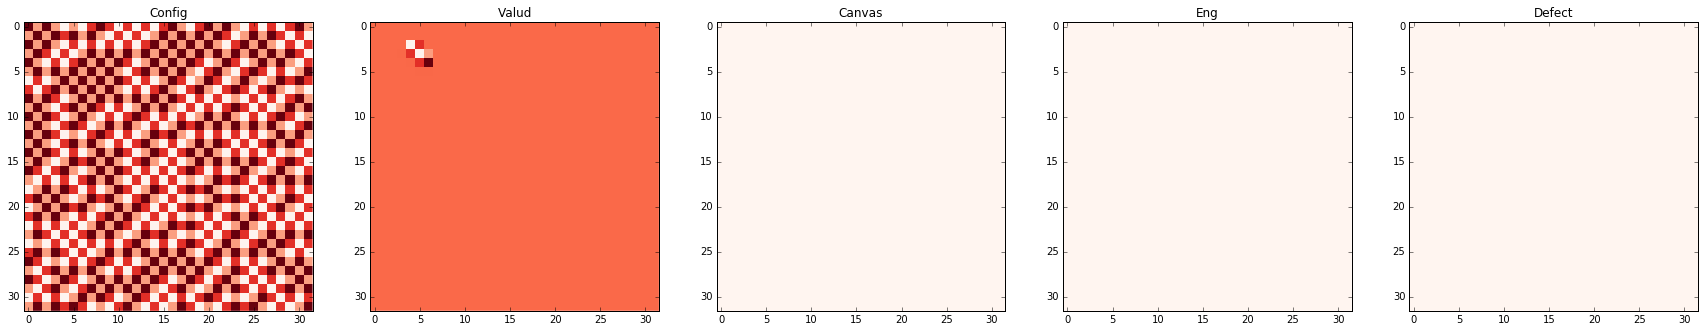

4
action: 6, reward: 0.0, terminate: False, returns: None


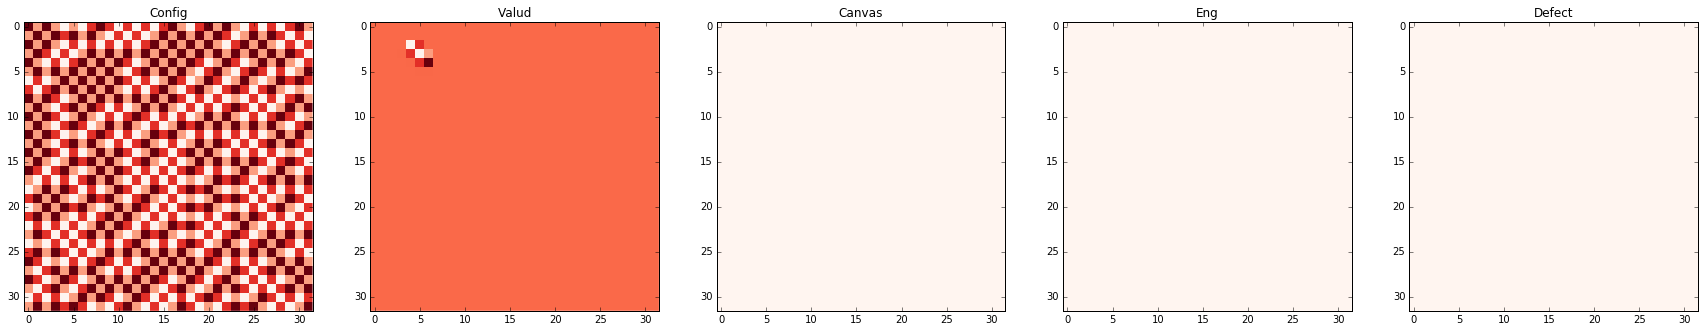

3
action: 3, reward: -0.0048828125, terminate: False, returns: None


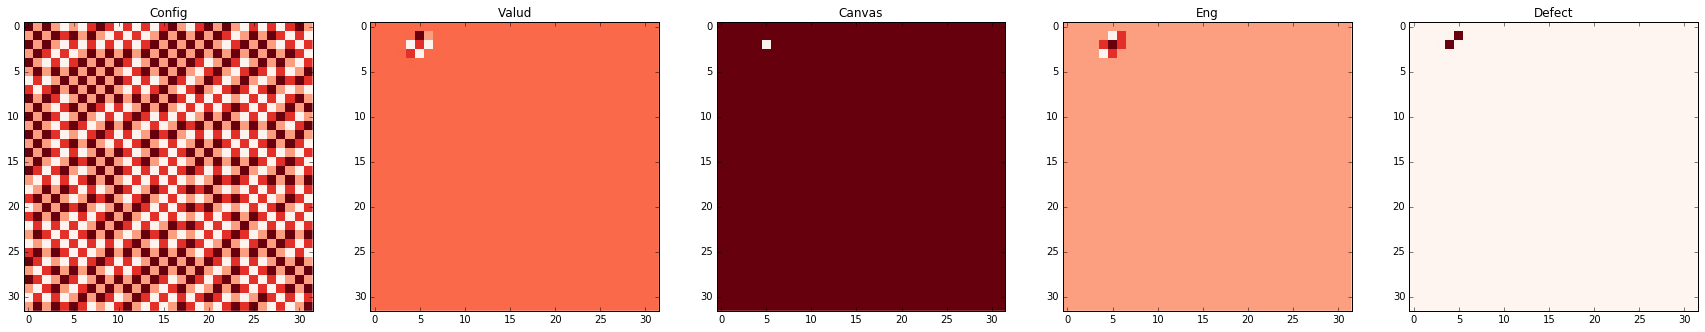

3
action: 0, reward: -0.001953125, terminate: False, returns: None


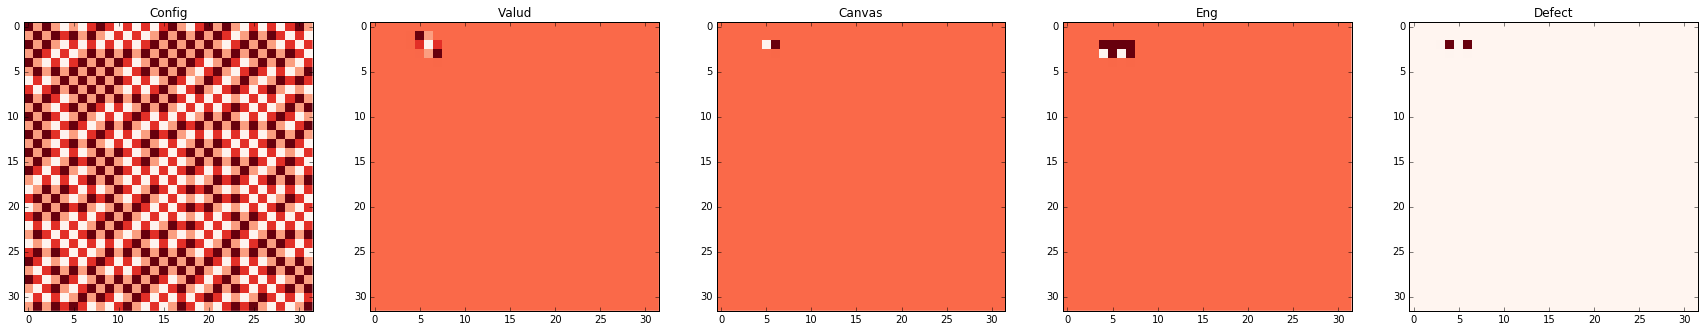

3
action: 5, reward: -0.0068359375, terminate: False, returns: None


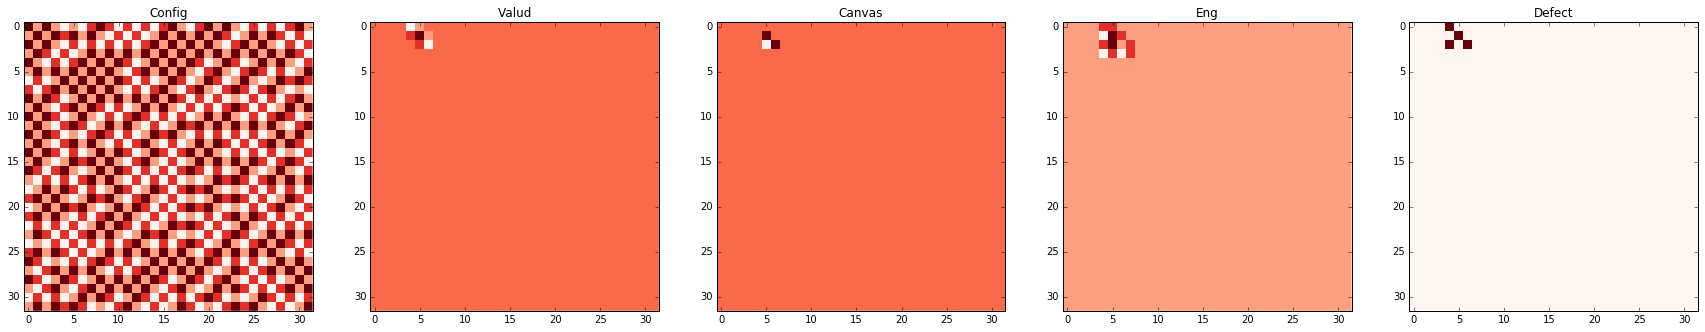

3
action: 5, reward: -0.00390625, terminate: False, returns: None


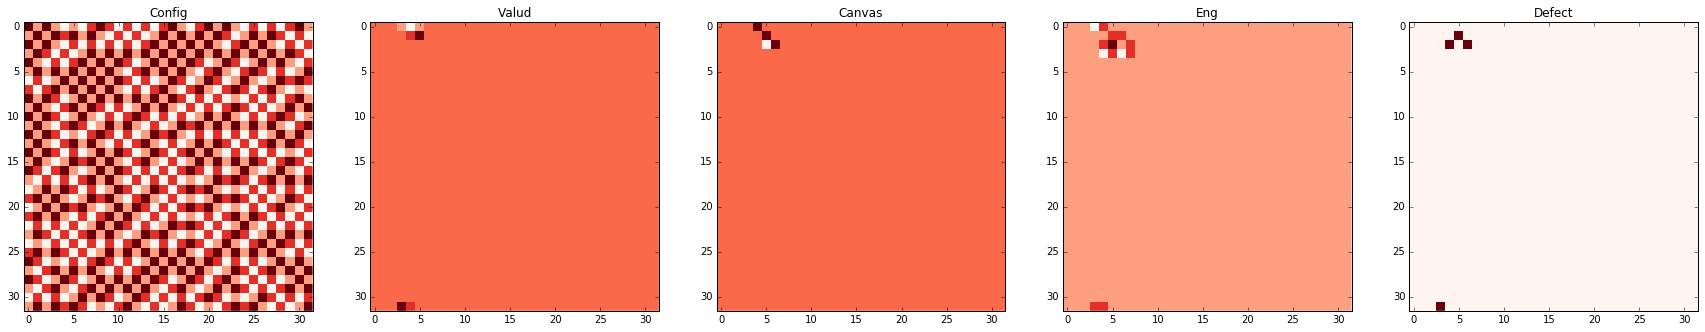

3
action: 2, reward: -0.0126953125, terminate: False, returns: None


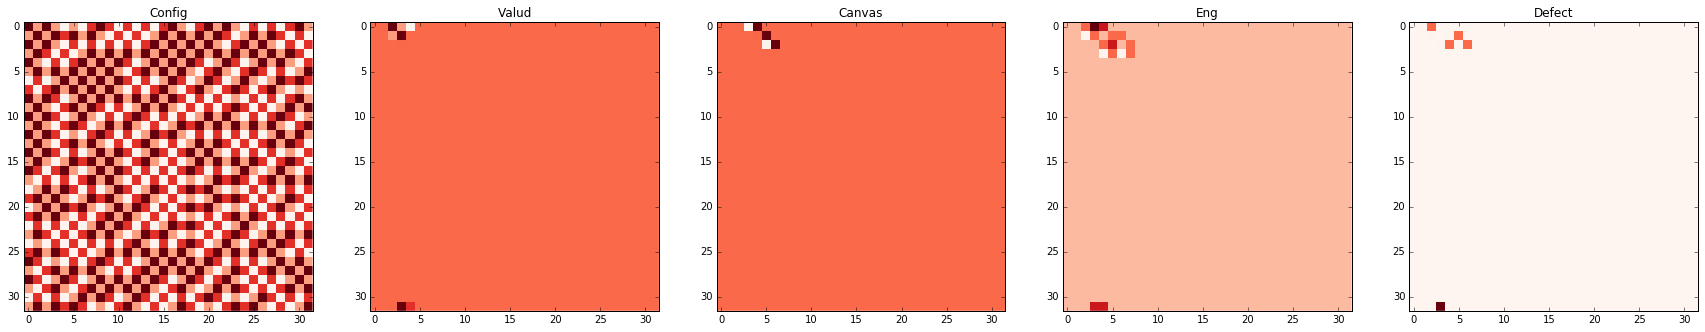

3
action: 4, reward: -0.021484375, terminate: False, returns: None


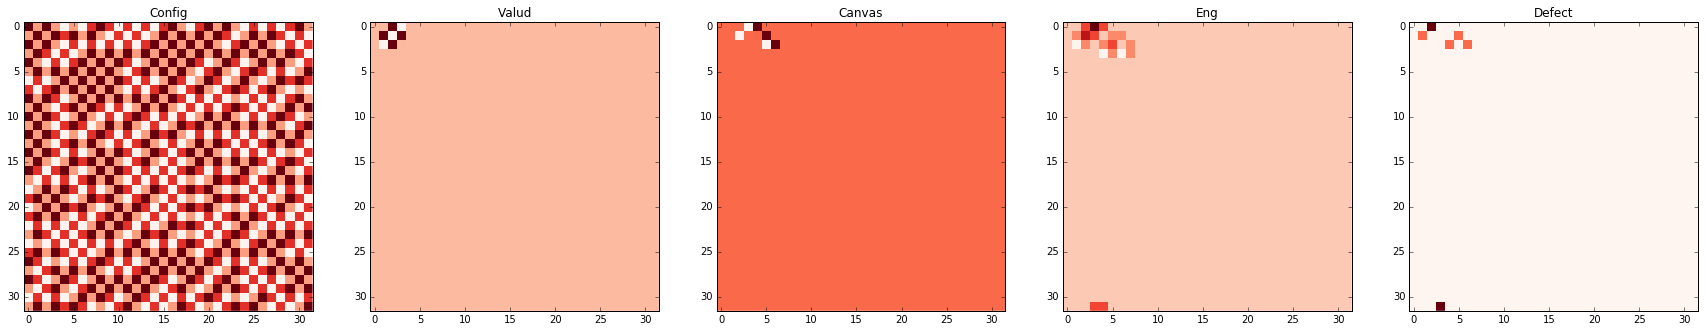

3
action: 5, reward: -0.021484375, terminate: False, returns: None


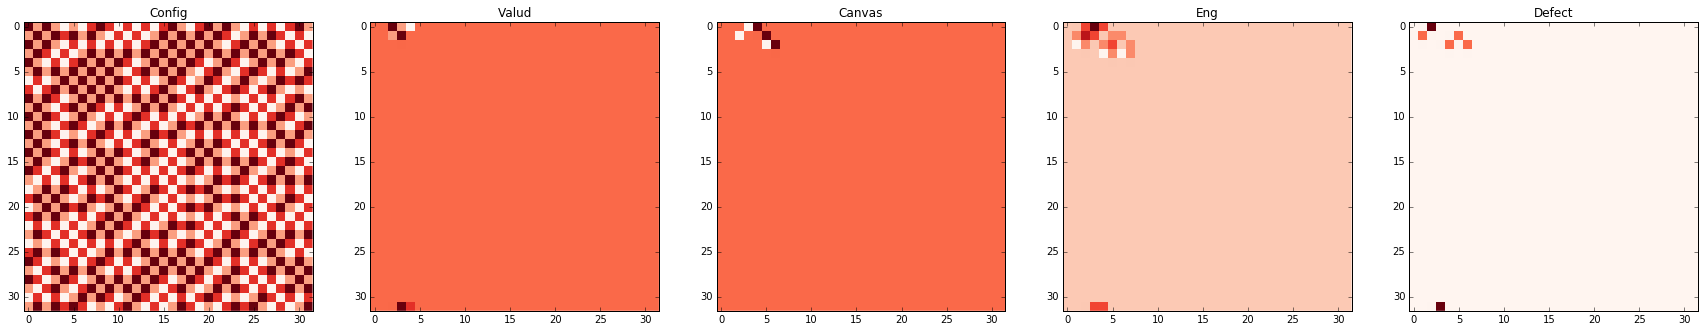

3
action: 6, reward: 0.0, terminate: False, returns: None


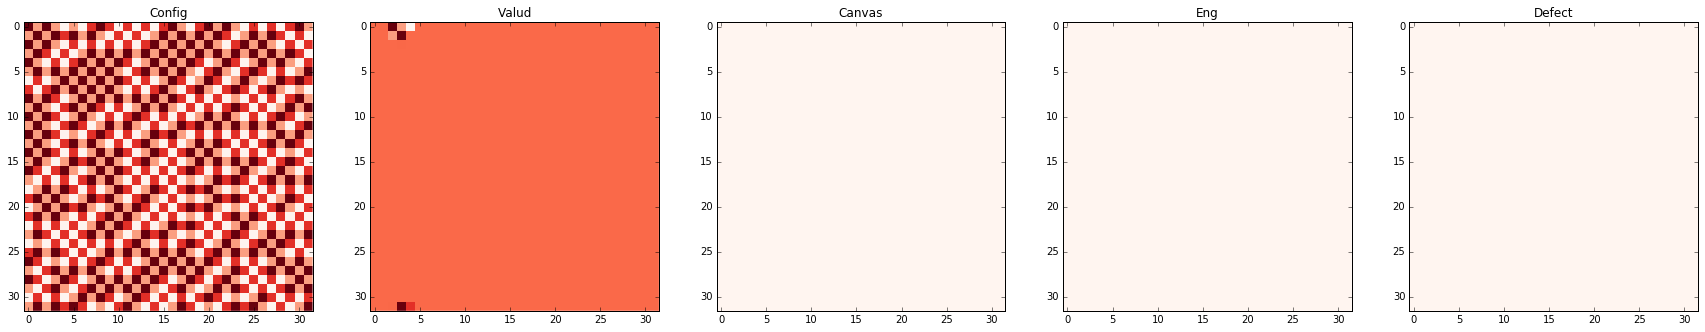

2
action: 0, reward: -0.0048828125, terminate: False, returns: None


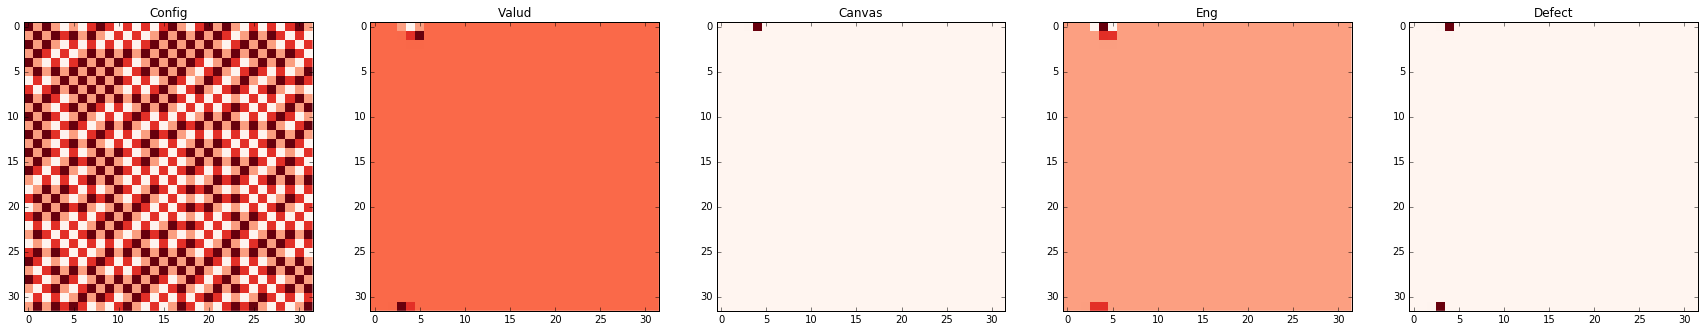

2
action: 5, reward: -0.001953125, terminate: False, returns: None


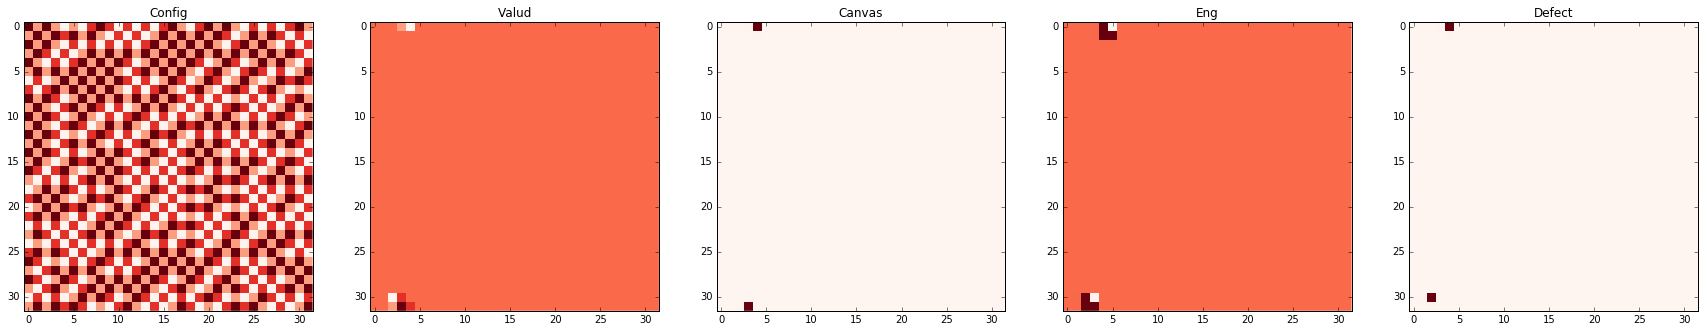

2
action: 1, reward: -0.0068359375, terminate: False, returns: None


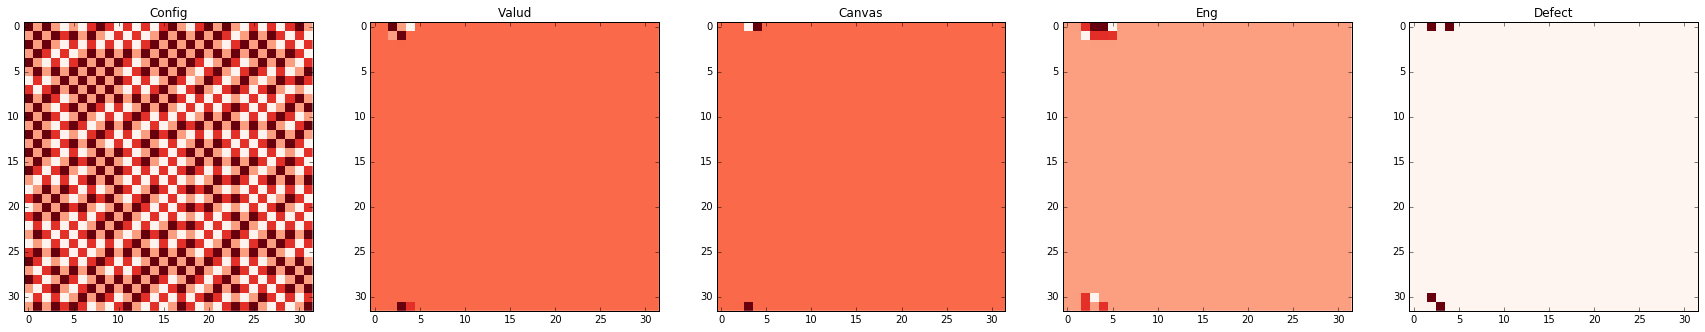

2
action: 4, reward: -0.015625, terminate: False, returns: None


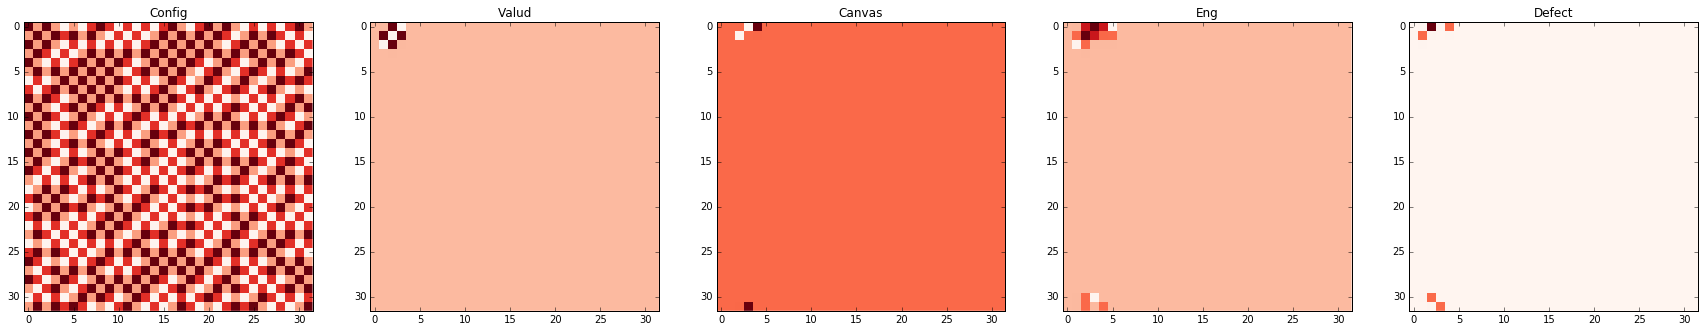

2
action: 0, reward: -0.0087890625, terminate: False, returns: None


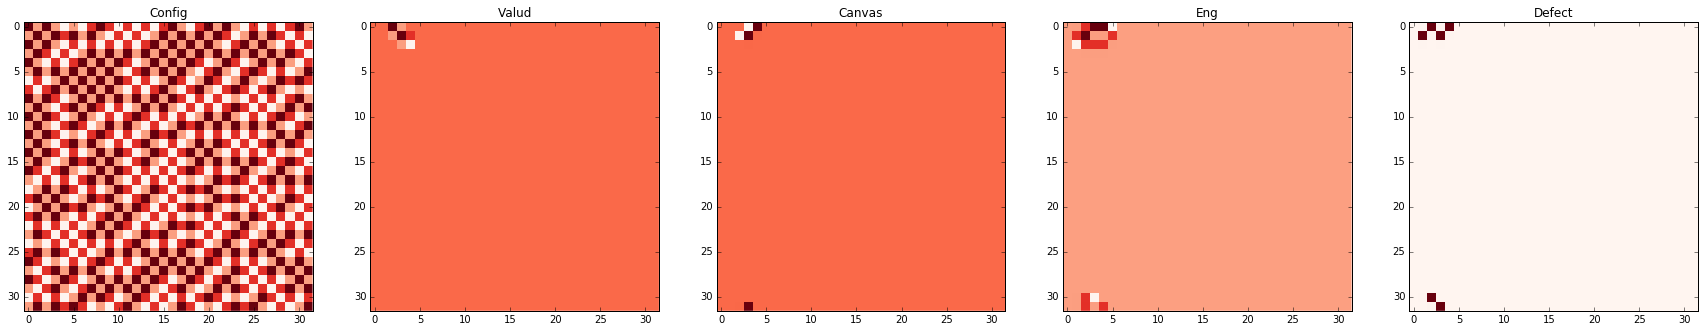

2
action: 6, reward: 0.0, terminate: False, returns: None


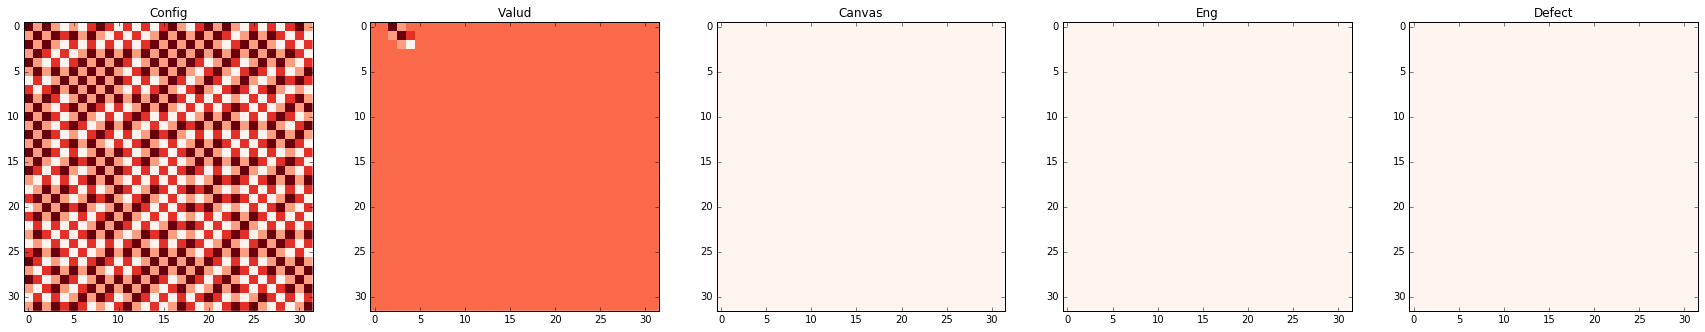

1
action: 4, reward: -0.0048828125, terminate: False, returns: None


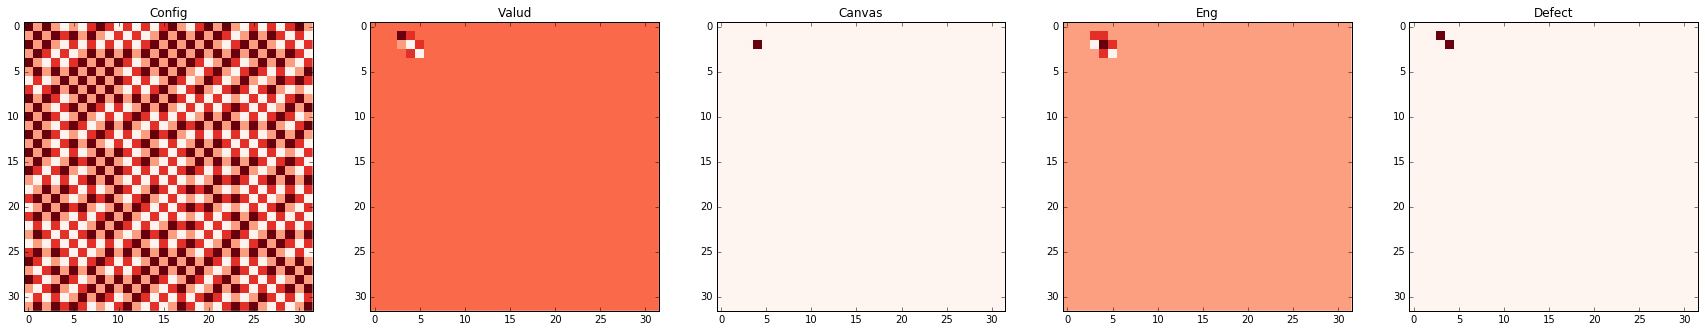

1
action: 1, reward: -0.001953125, terminate: False, returns: None


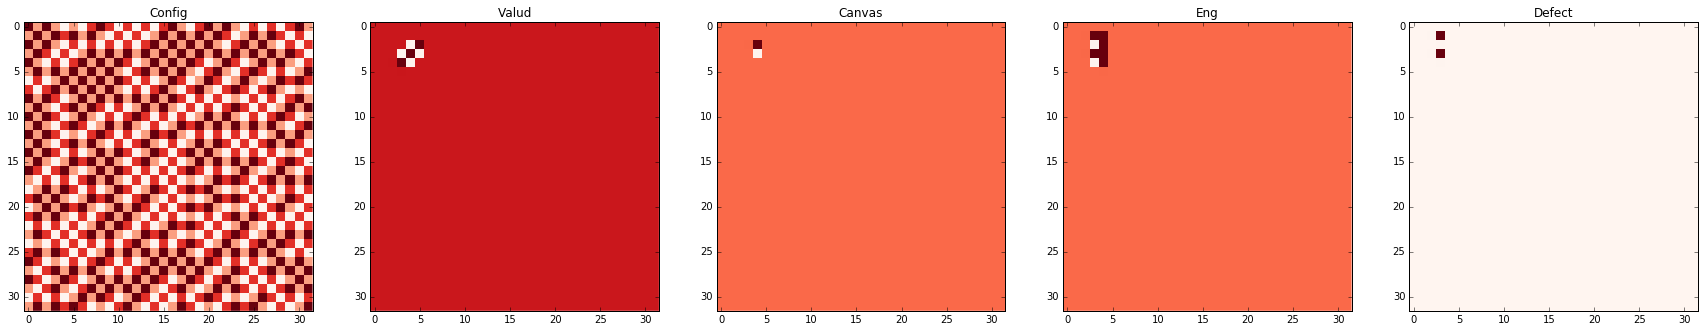

1
action: 3, reward: -0.001953125, terminate: False, returns: None


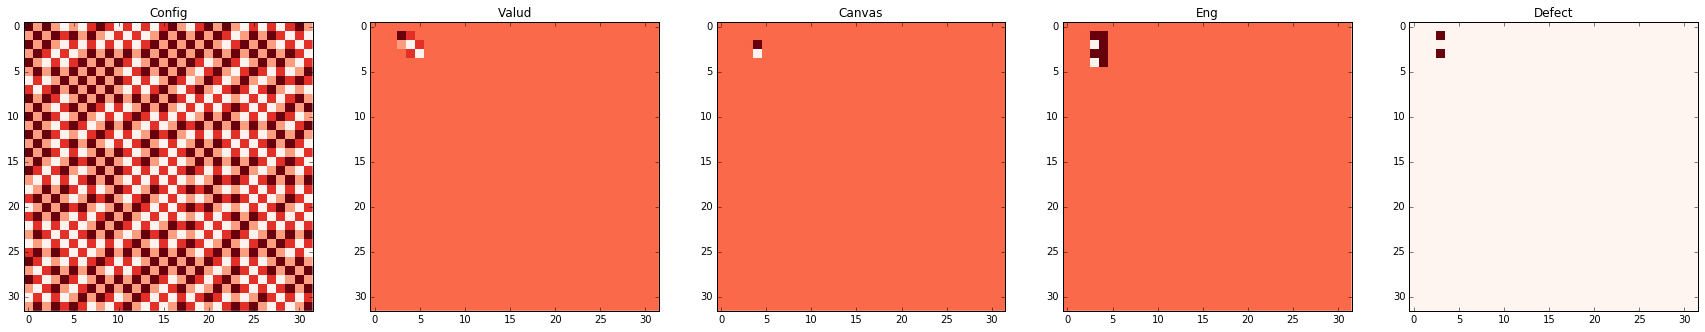

1
action: 6, reward: 0.0, terminate: False, returns: None


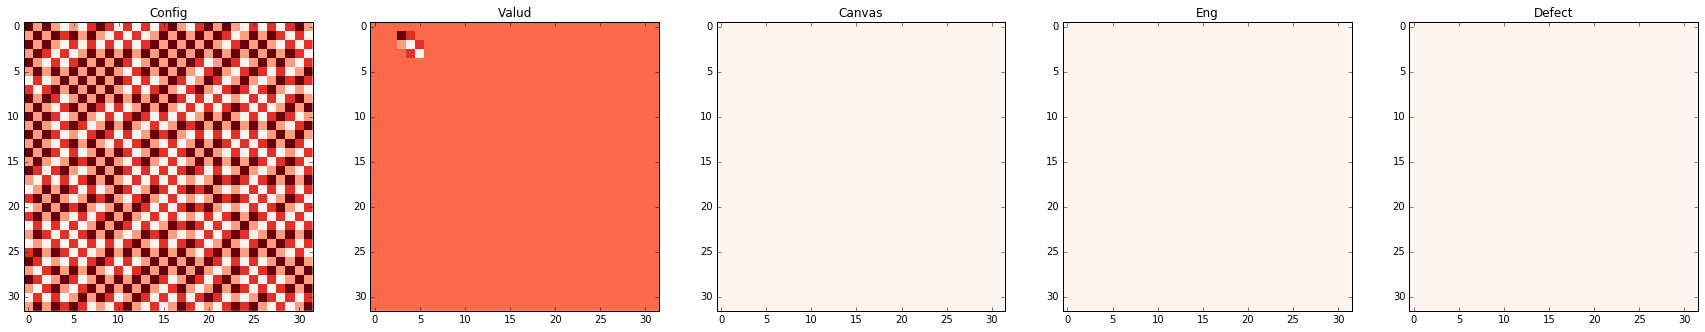

0
action: 4, reward: -0.0048828125, terminate: True, returns: None


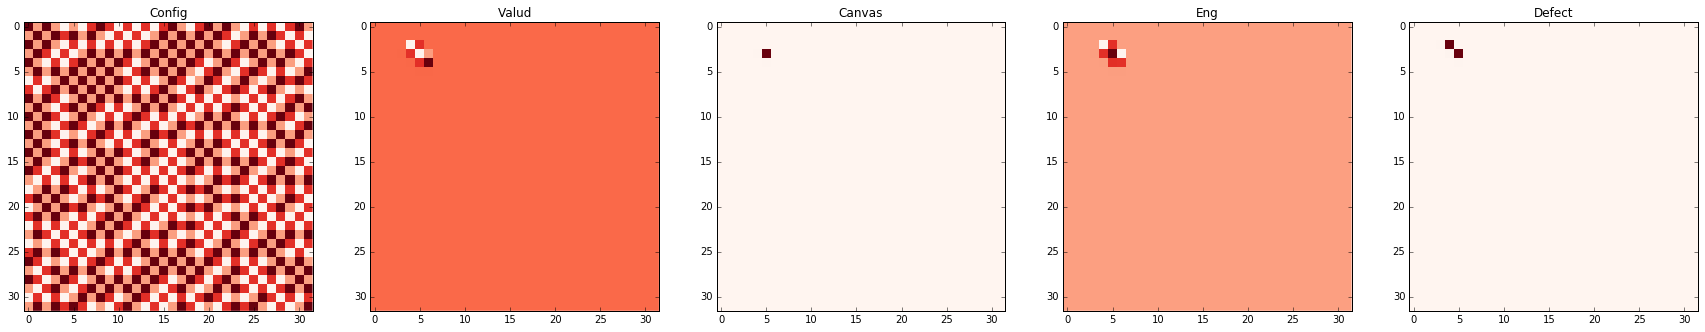

0
Episode 7: Reward = -0.142578125
action: 4, reward: -0.0048828125, terminate: False, returns: None


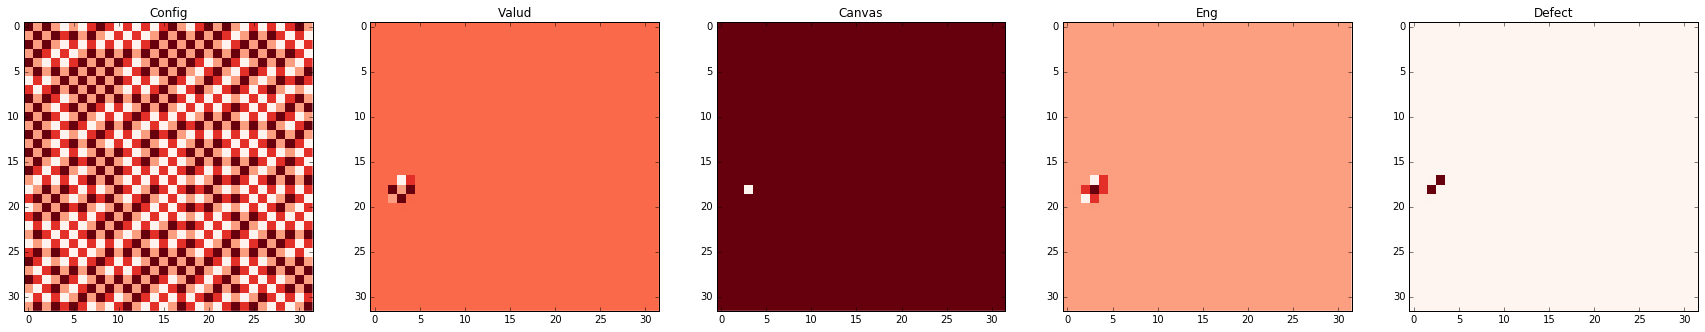

5
action: 6, reward: 0.0, terminate: False, returns: None


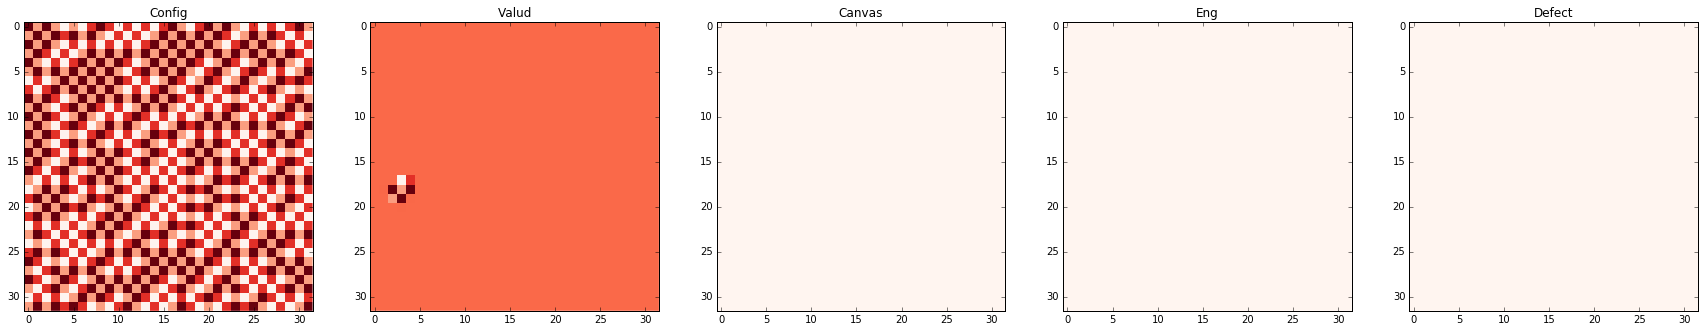

4
action: 0, reward: -0.0048828125, terminate: False, returns: None


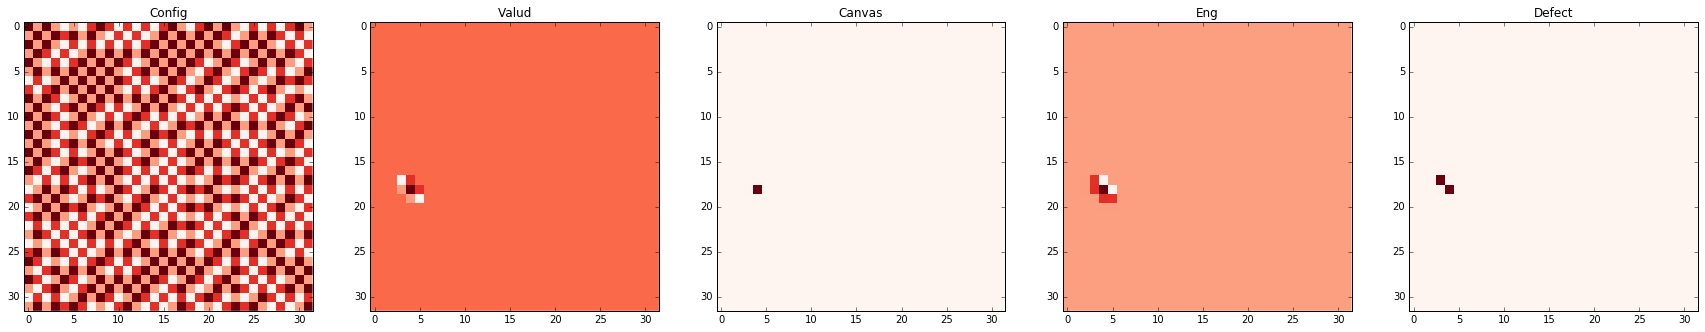

4
action: 2, reward: -0.001953125, terminate: False, returns: None


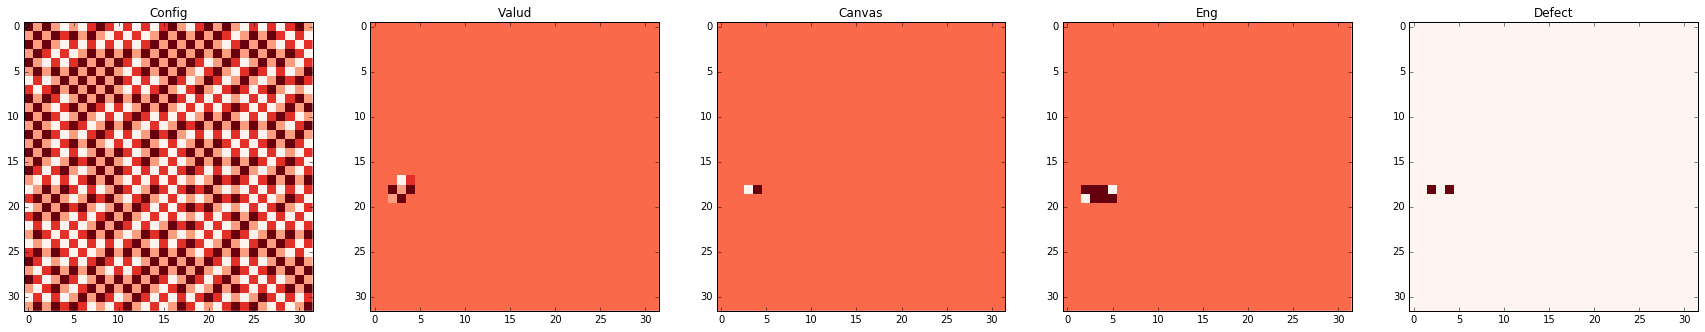

4
action: 1, reward: -0.0029296875, terminate: False, returns: None


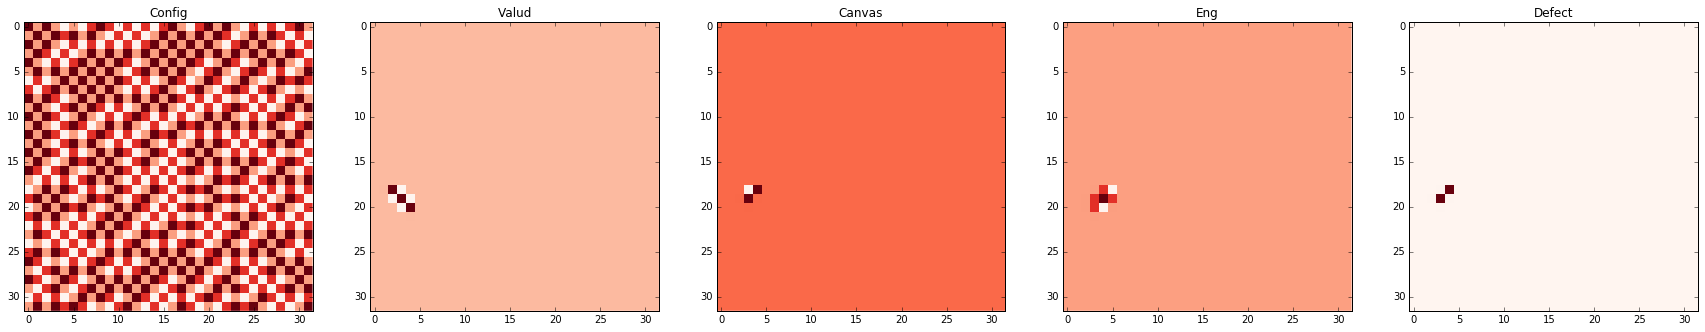

4
action: 1, reward: 0.0, terminate: False, returns: None


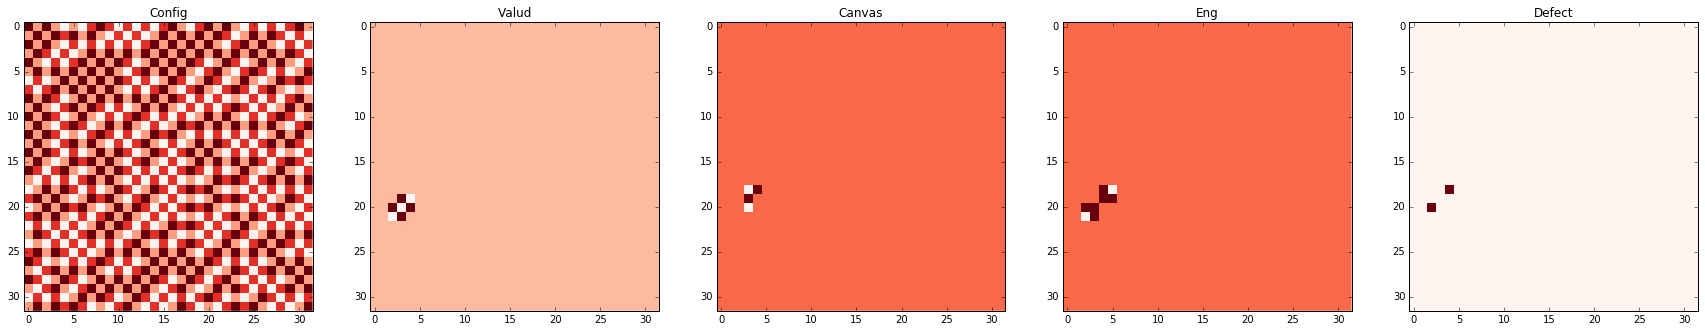

4
action: 0, reward: -0.0048828125, terminate: False, returns: None


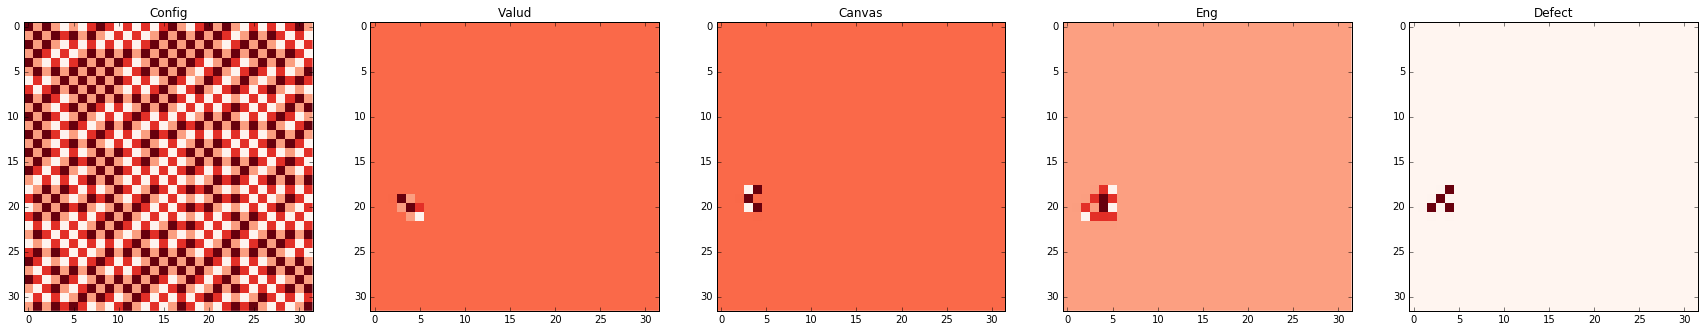

4
action: 6, reward: 0.0, terminate: False, returns: None


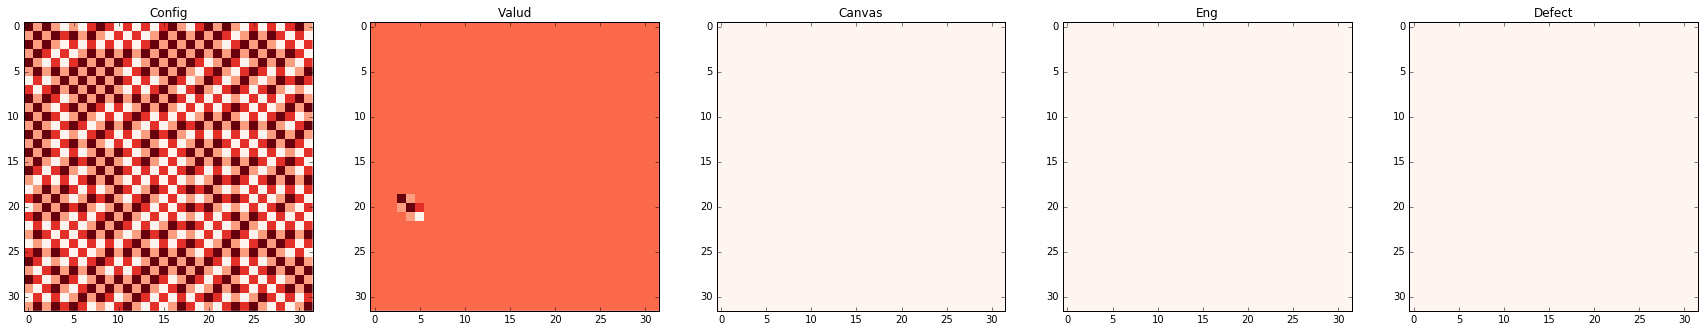

3
action: 1, reward: -0.0048828125, terminate: False, returns: None


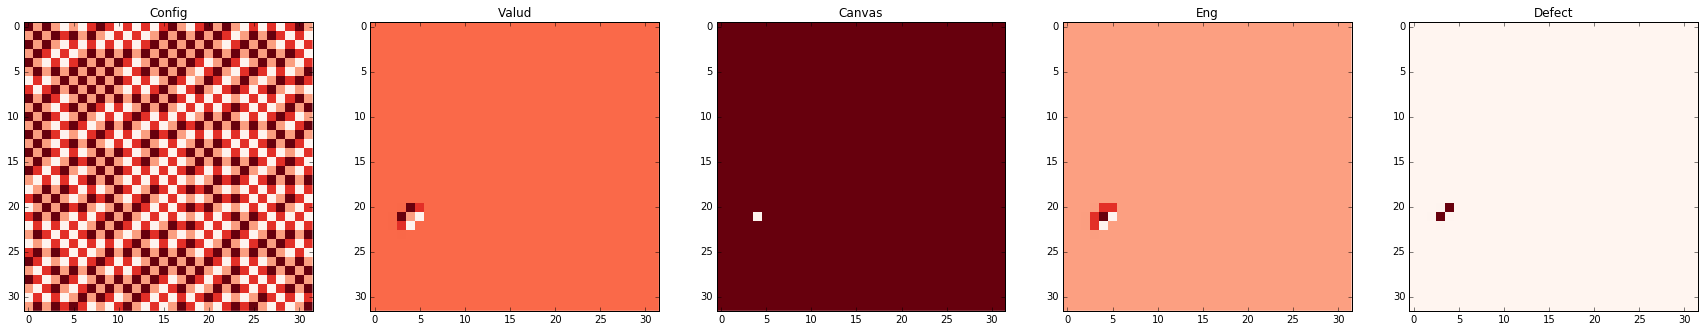

3
action: 6, reward: 0.0, terminate: False, returns: None


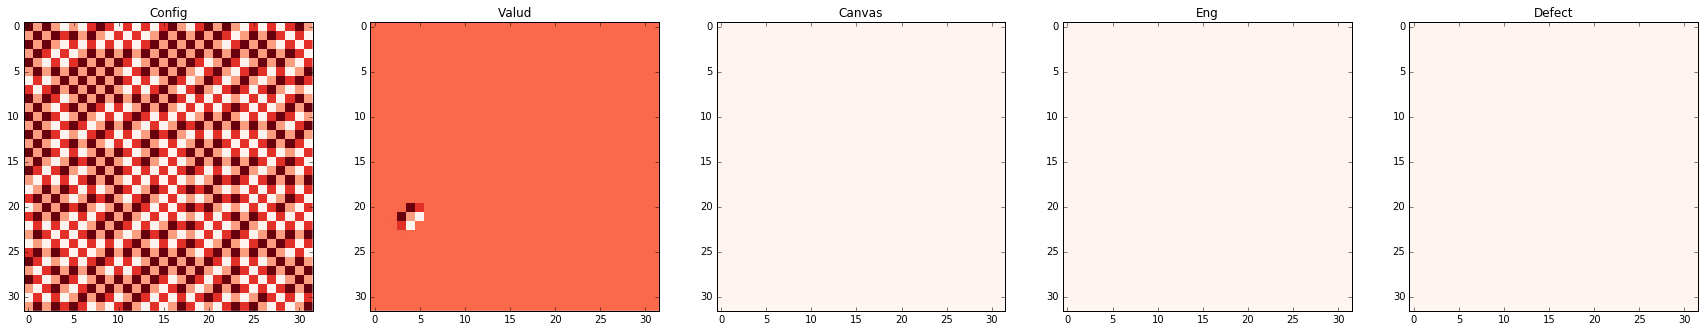

2
action: 2, reward: -0.0048828125, terminate: False, returns: None


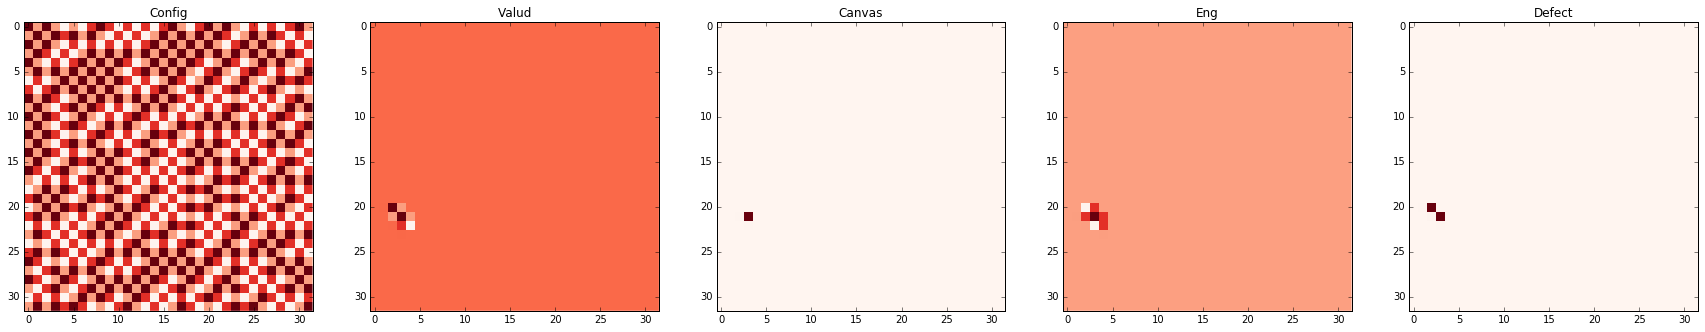

2
action: 2, reward: -0.001953125, terminate: False, returns: None


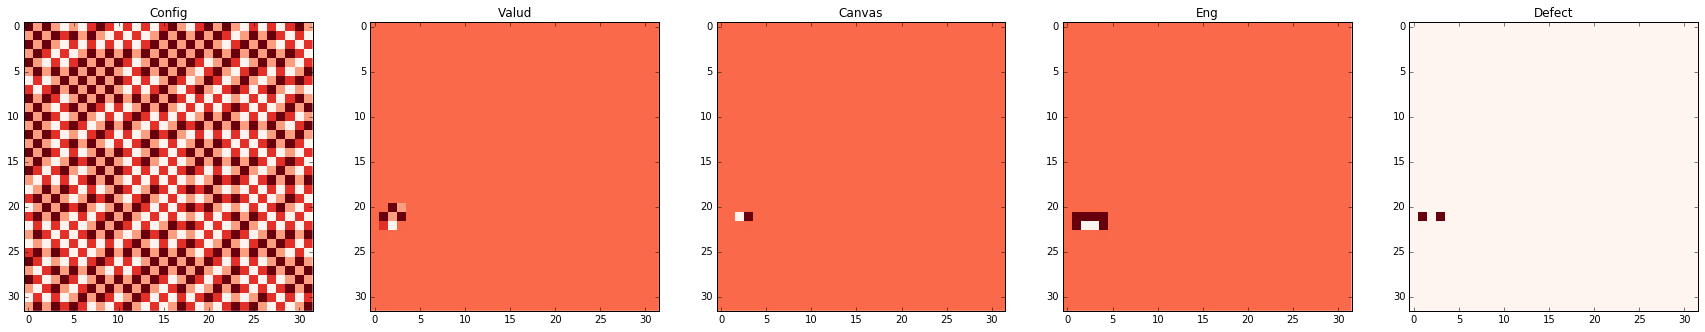

2
action: 0, reward: -0.001953125, terminate: False, returns: None


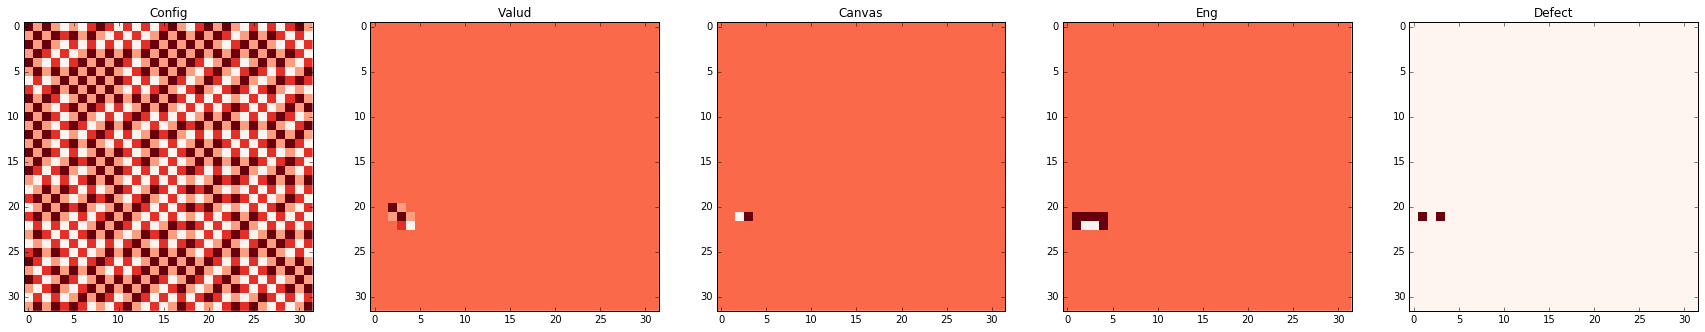

2
action: 1, reward: -0.0107421875, terminate: False, returns: None


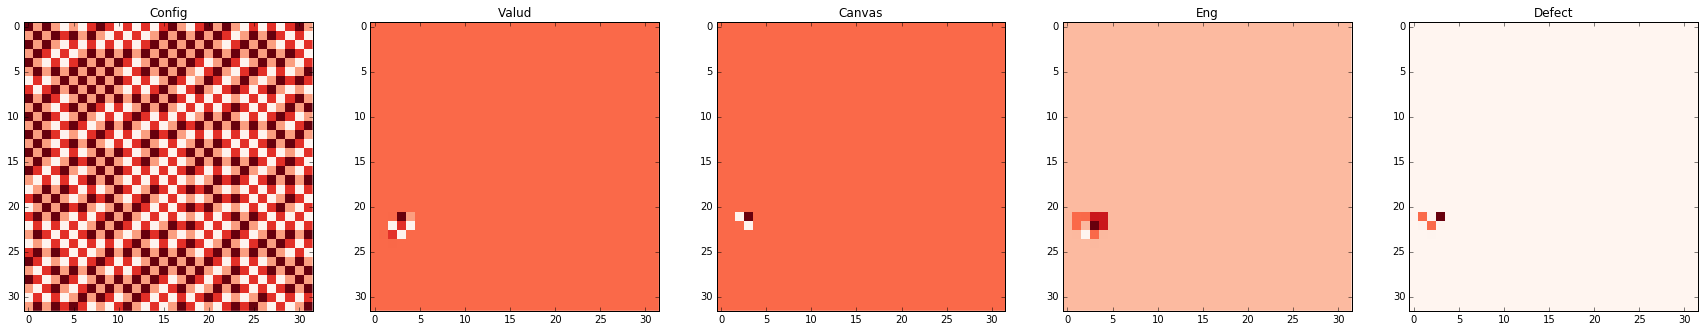

2
action: 4, reward: -0.01953125, terminate: False, returns: None


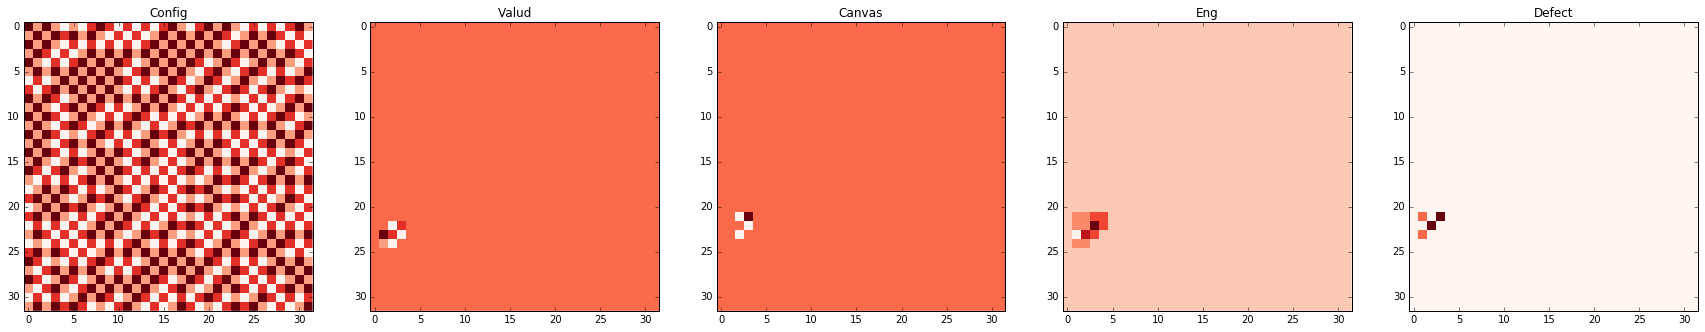

2
action: 1, reward: -0.0166015625, terminate: False, returns: None


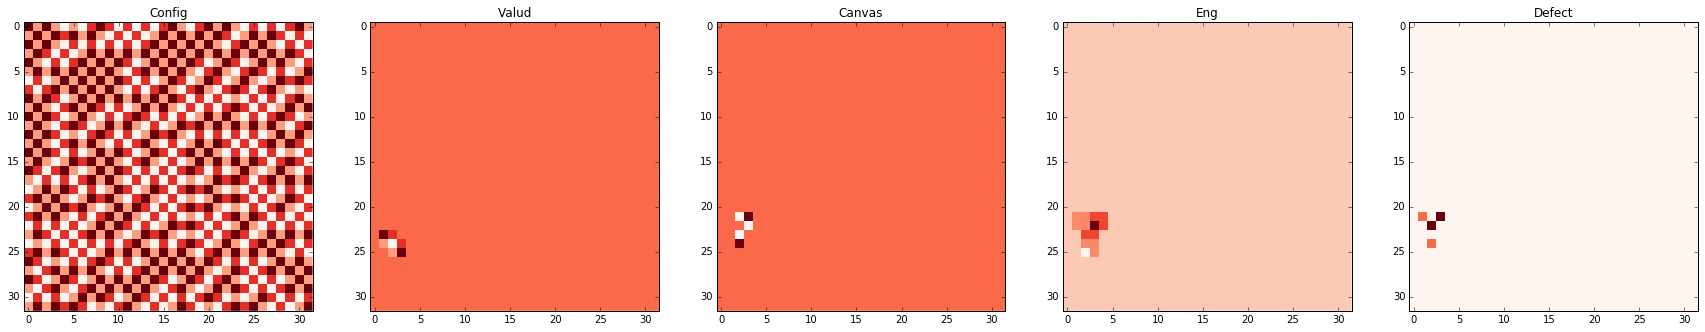

2
action: 3, reward: -0.0166015625, terminate: False, returns: None


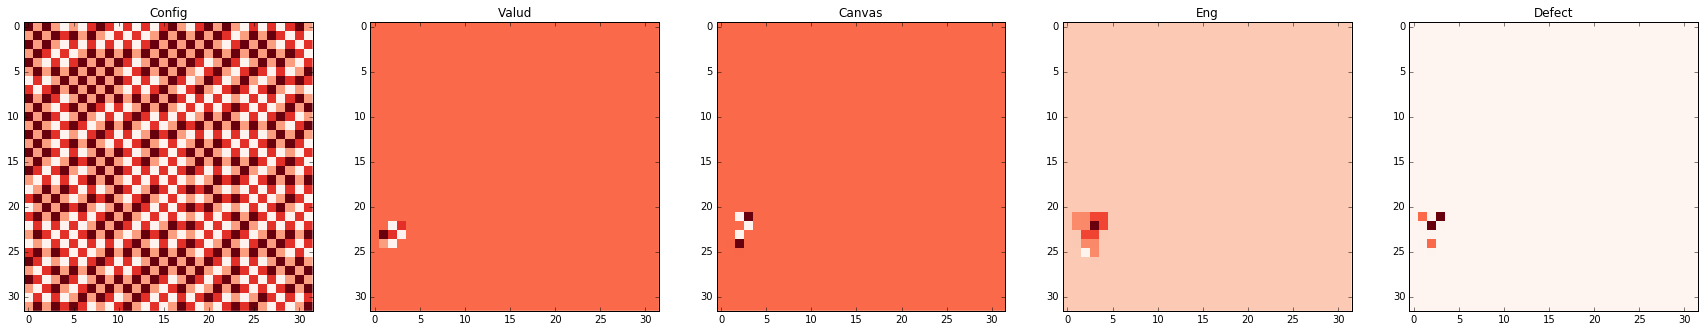

2
action: 0, reward: -0.009765625, terminate: False, returns: None


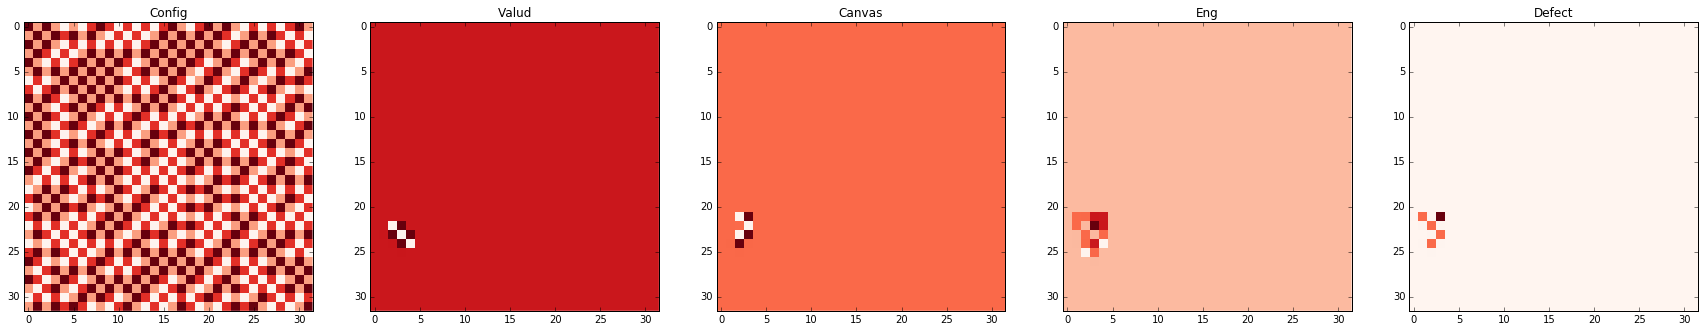

2
action: 6, reward: 0.0, terminate: False, returns: None


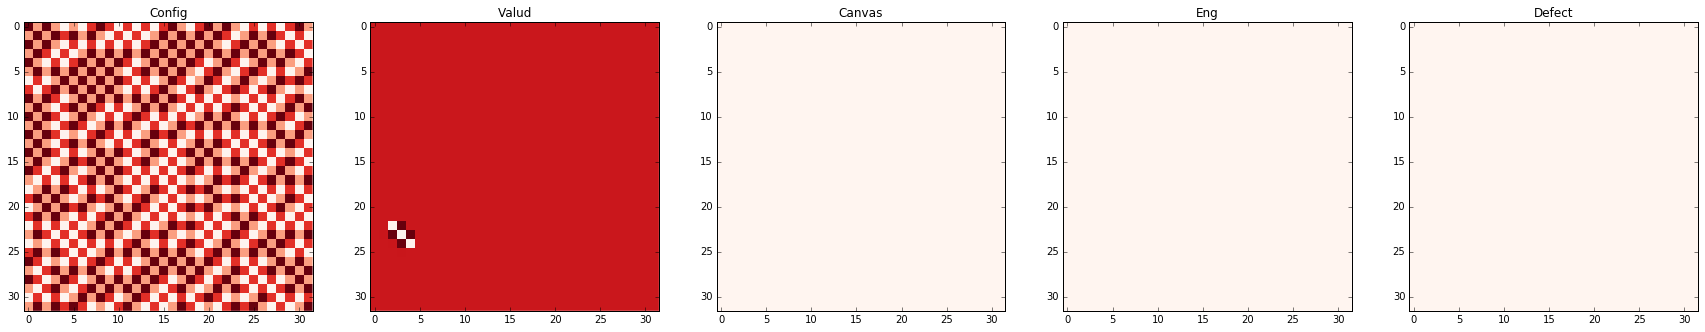

1
action: 0, reward: -0.0048828125, terminate: False, returns: None


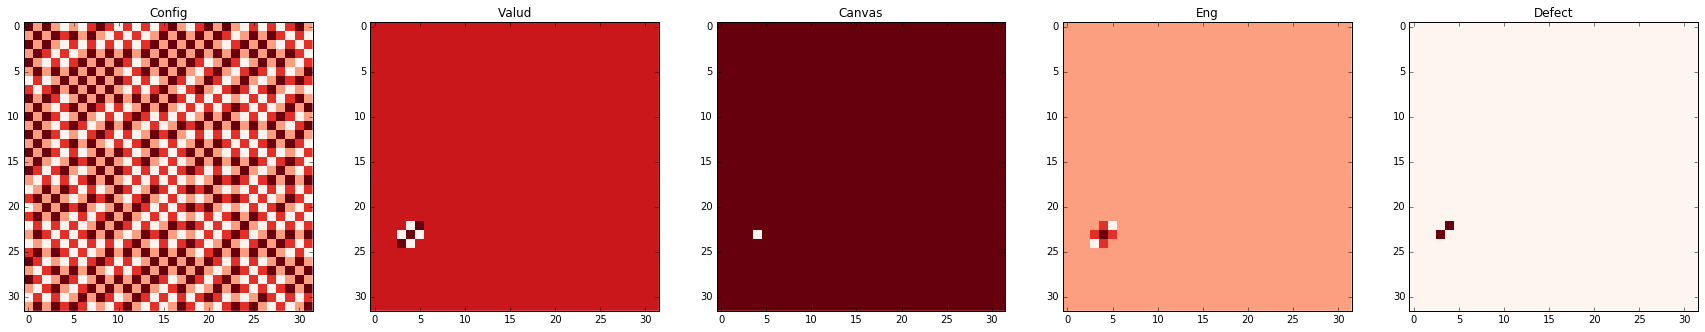

1
action: 6, reward: 0.0, terminate: False, returns: None


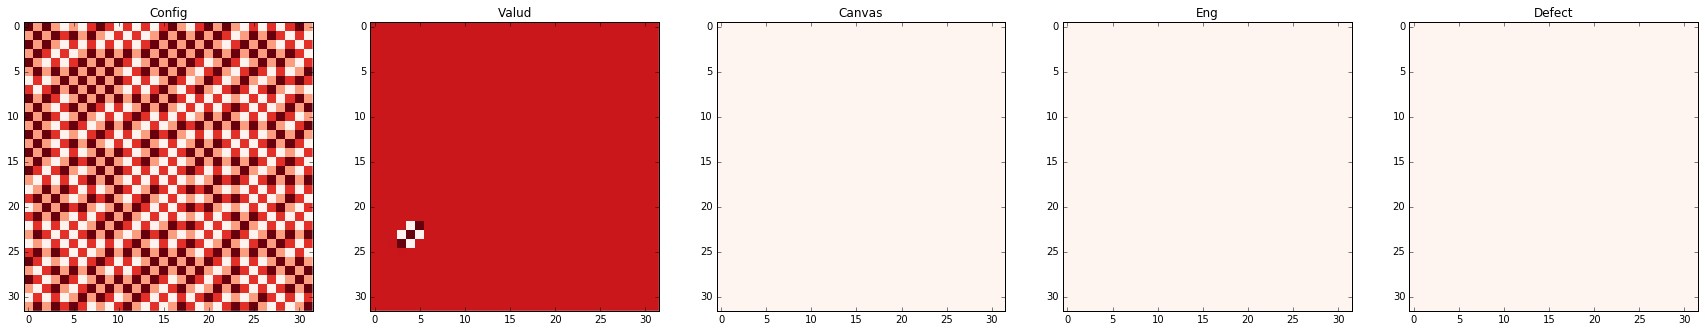

0
action: 6, reward: 0.0, terminate: True, returns: None


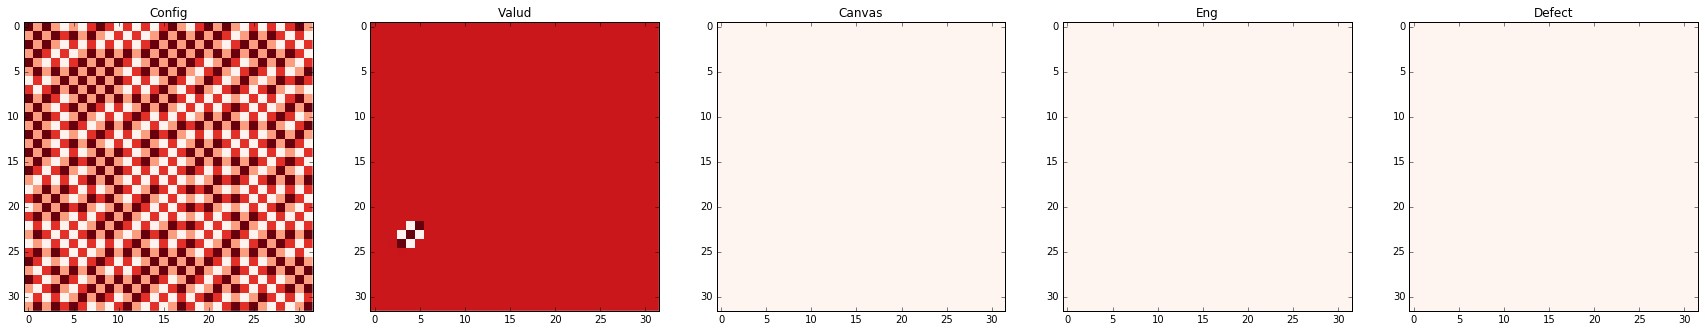

-1
Episode 8: Reward = -0.111328125
action: 5, reward: -0.0048828125, terminate: False, returns: None


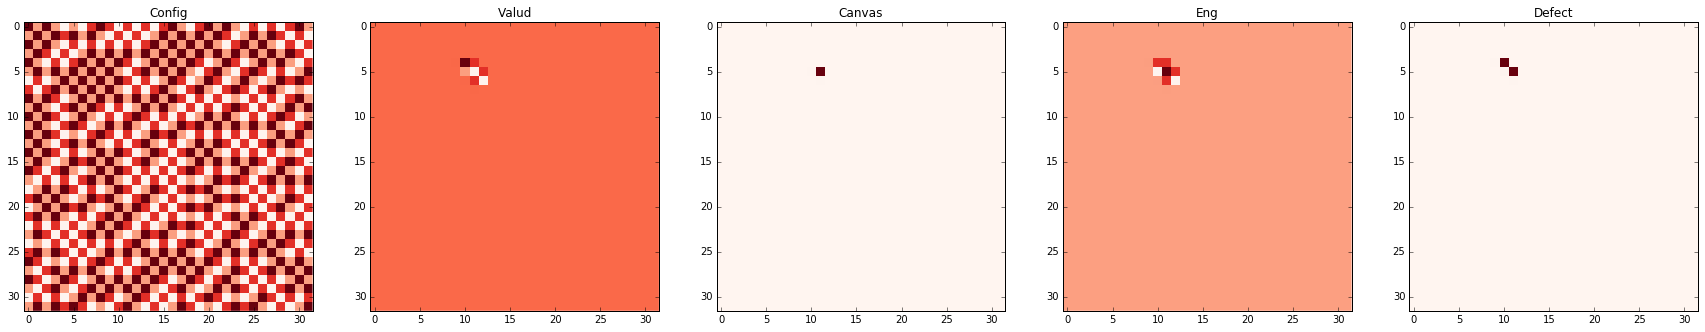

5
action: 5, reward: -0.001953125, terminate: False, returns: None


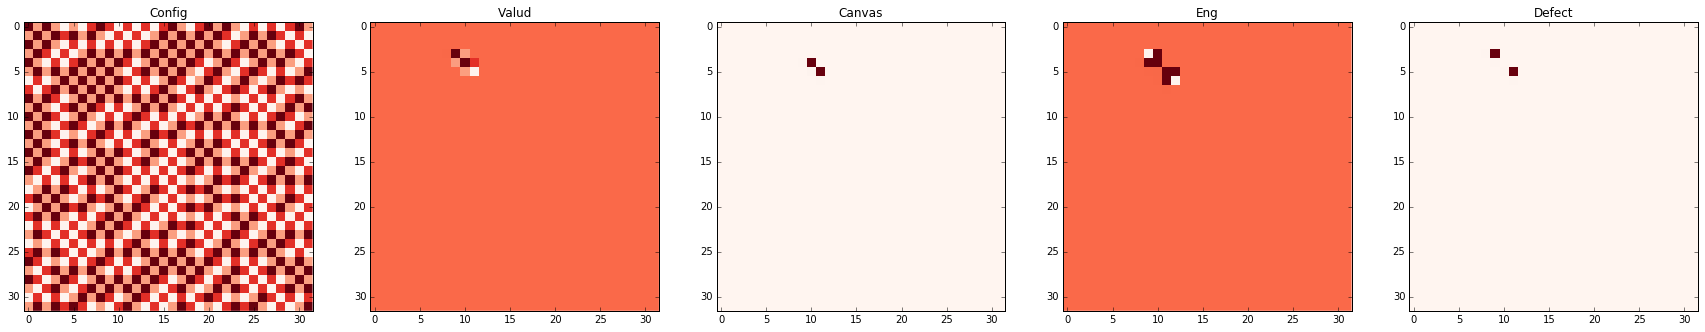

5
action: 4, reward: -0.001953125, terminate: False, returns: None


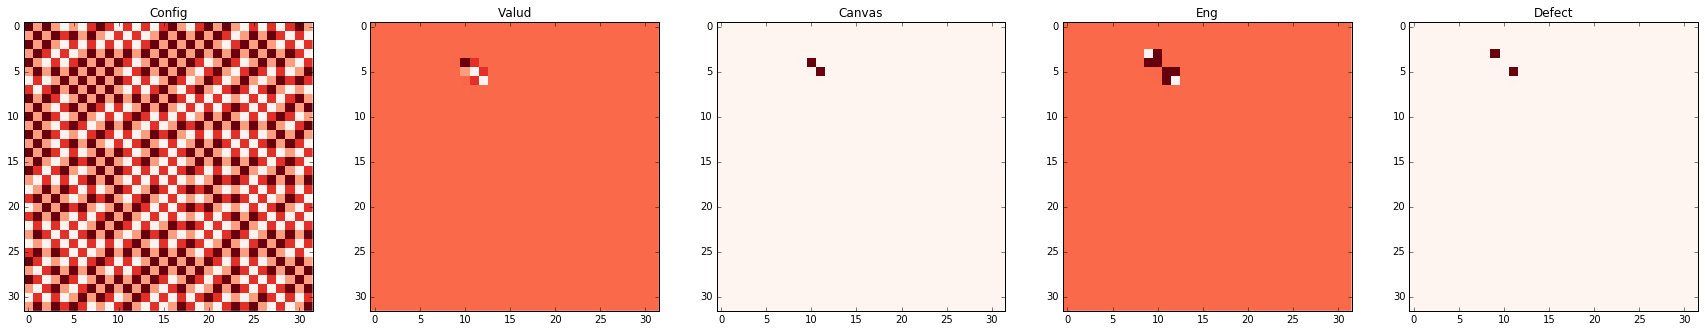

5
action: 6, reward: 0.0, terminate: False, returns: None


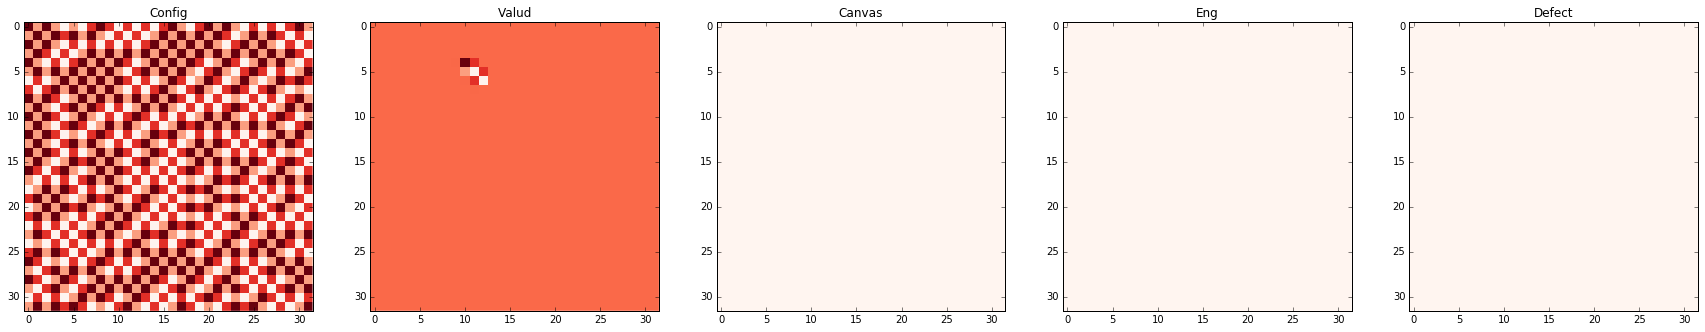

4
action: 6, reward: 0.0, terminate: False, returns: None


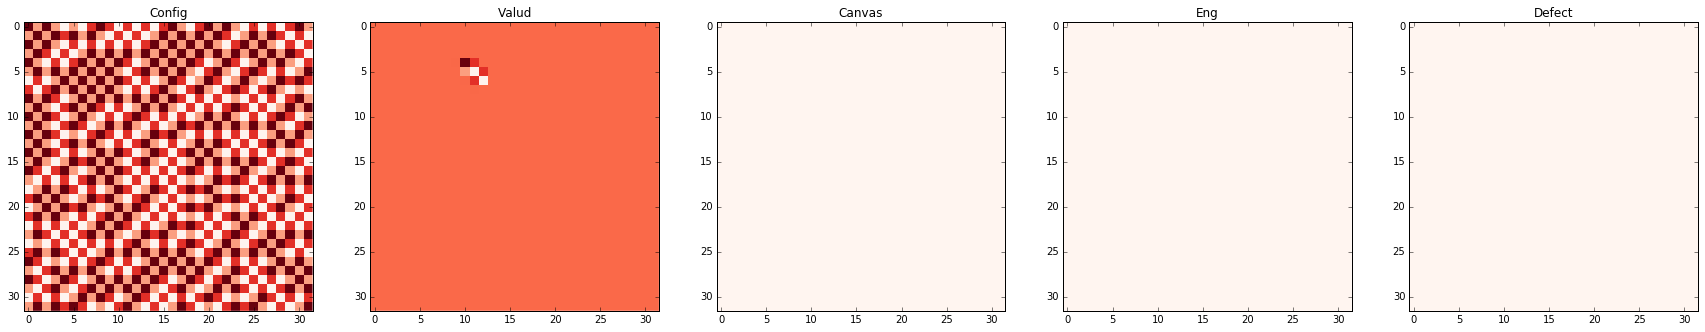

3
action: 0, reward: -0.0048828125, terminate: False, returns: None


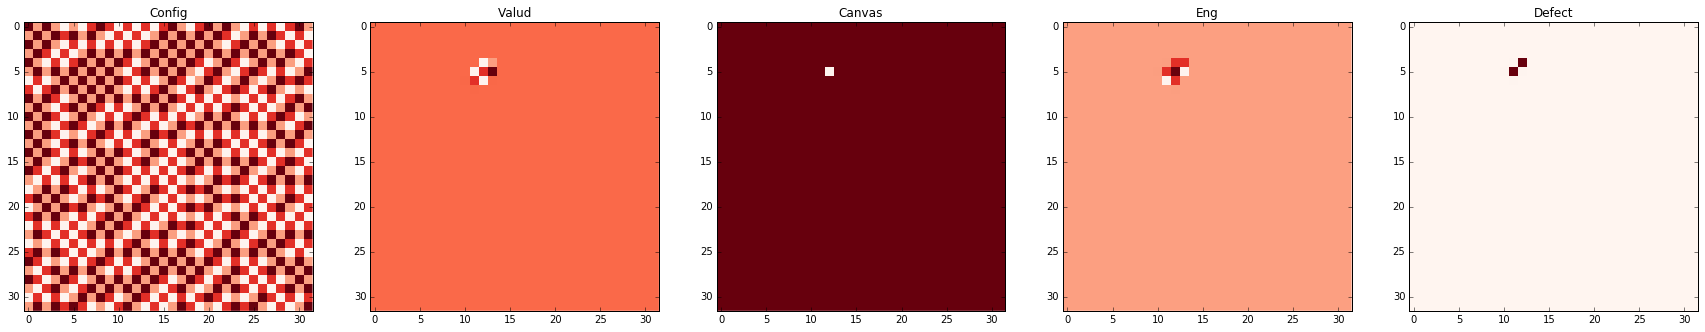

3
action: 4, reward: -0.013671875, terminate: False, returns: None


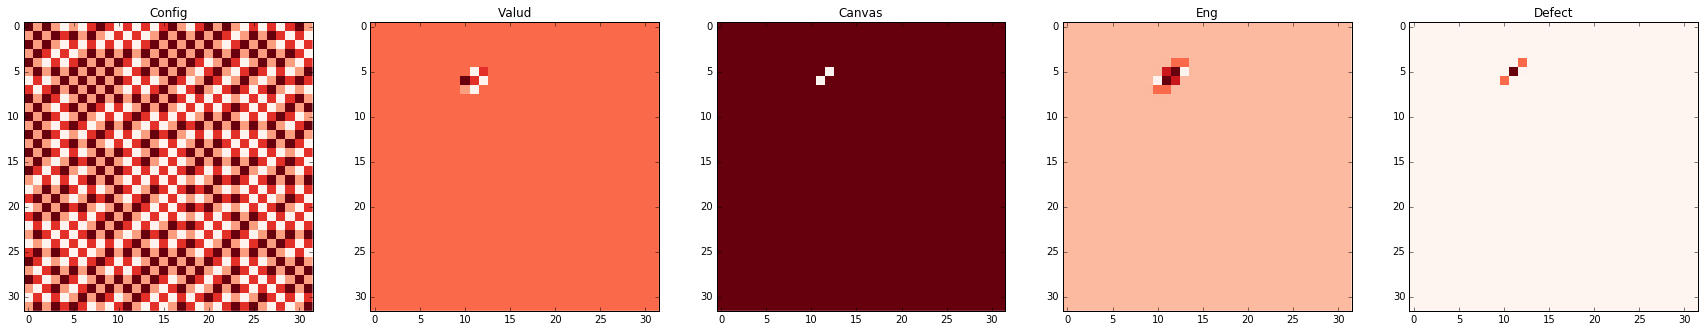

3
action: 2, reward: -0.0224609375, terminate: False, returns: None


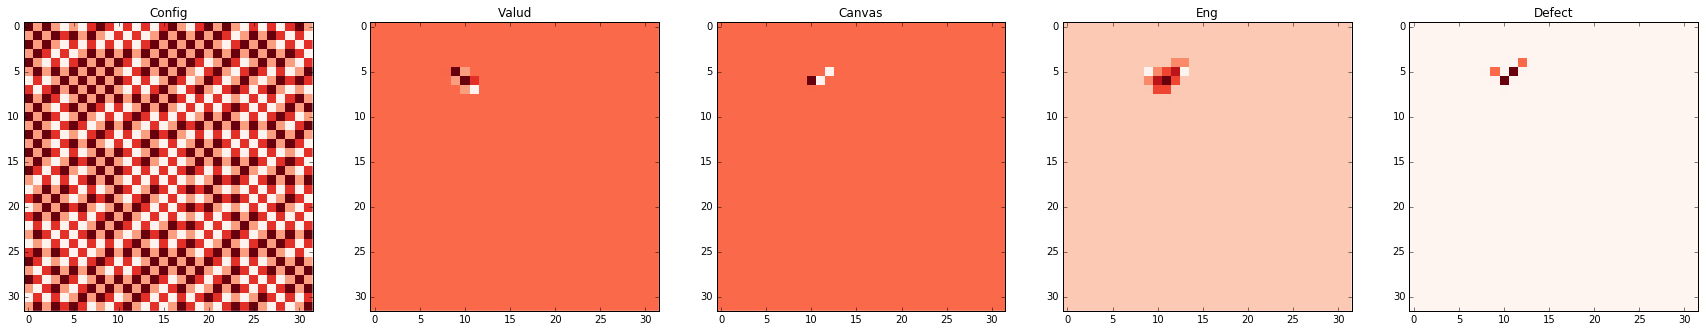

3
action: 1, reward: -0.015625, terminate: False, returns: None


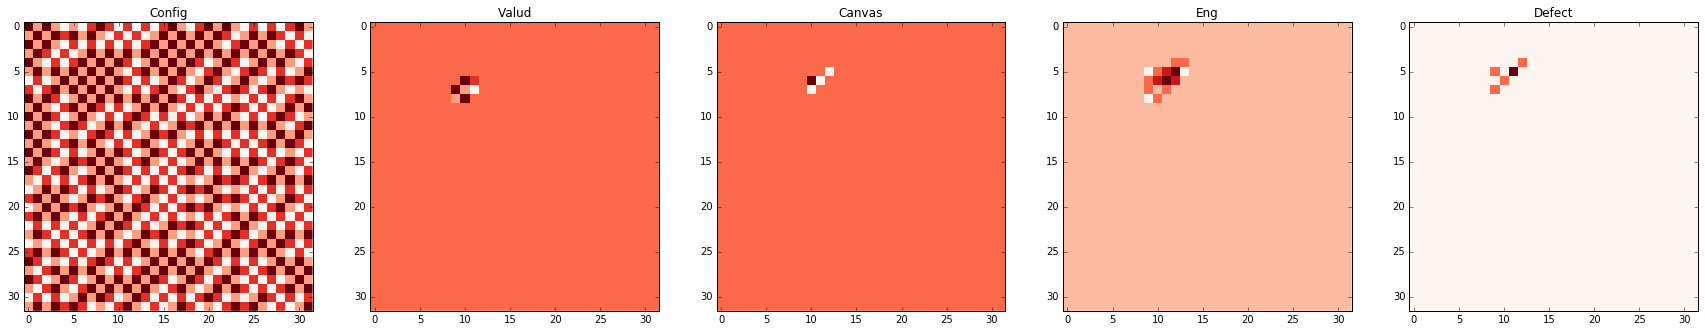

3
action: 0, reward: -0.0126953125, terminate: False, returns: None


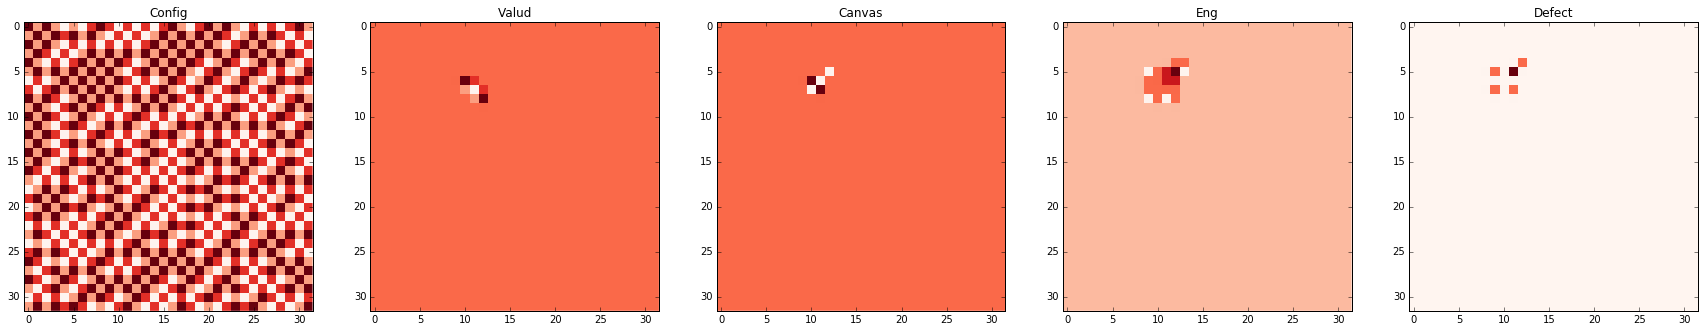

3
action: 5, reward: -0.0126953125, terminate: False, returns: None


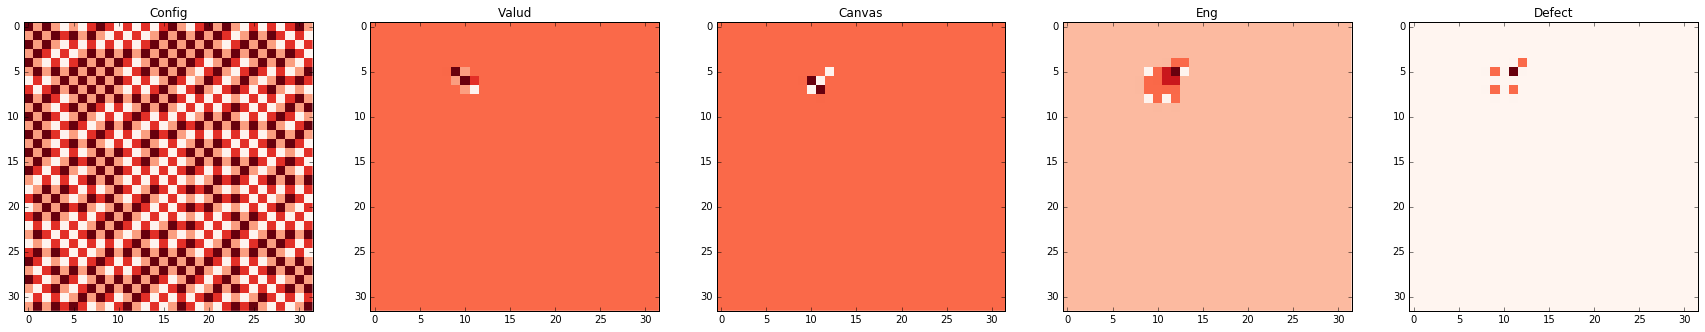

3
action: 0, reward: -0.0126953125, terminate: False, returns: None


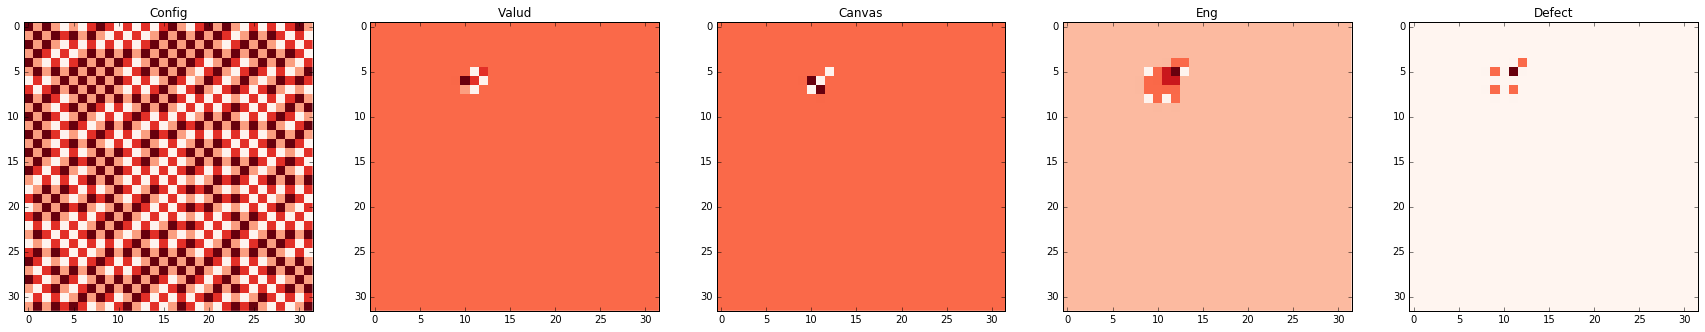

3
action: 0, reward: -0.005859375, terminate: False, returns: None


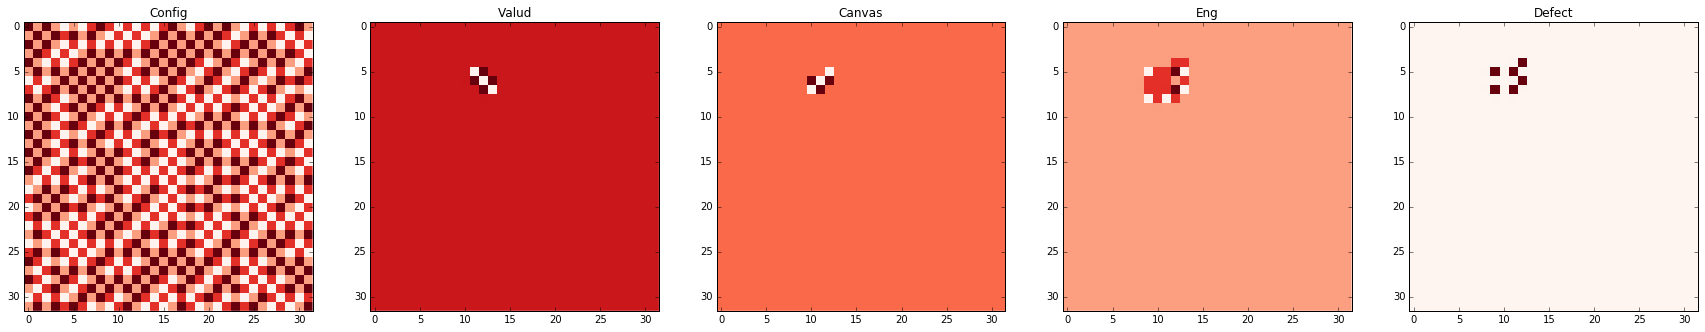

3
action: 6, reward: 0.0, terminate: False, returns: None


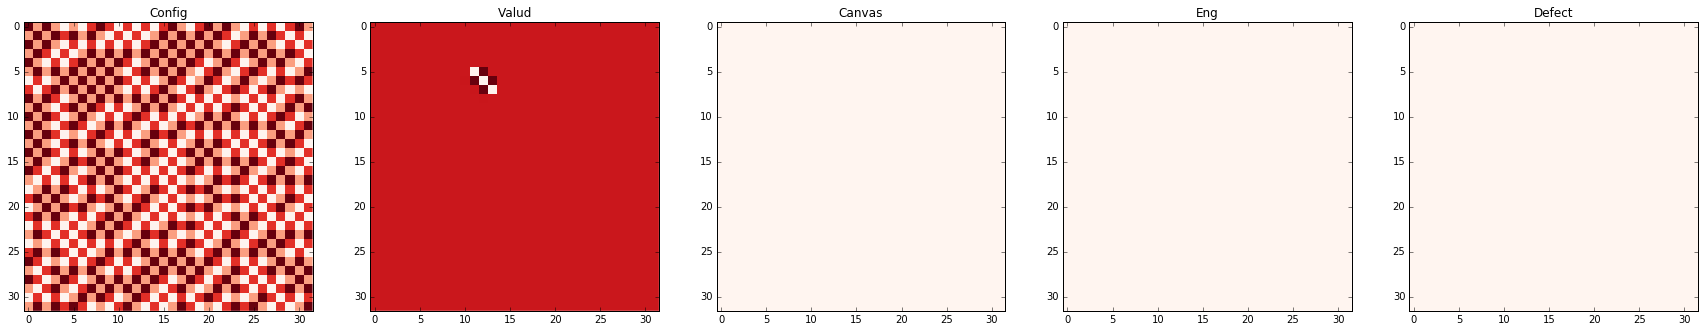

2
action: 3, reward: -0.0048828125, terminate: False, returns: None


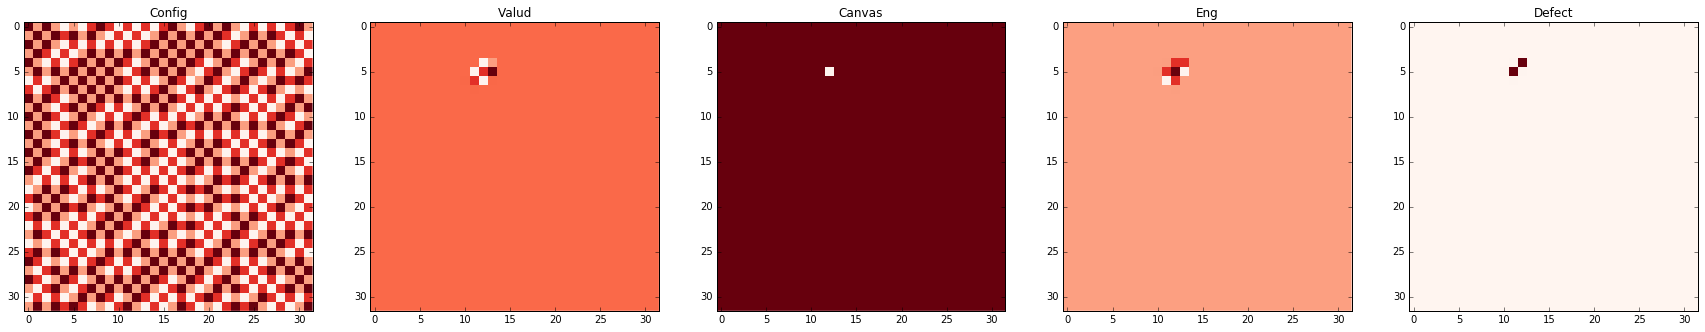

2
action: 6, reward: 0.0, terminate: False, returns: None


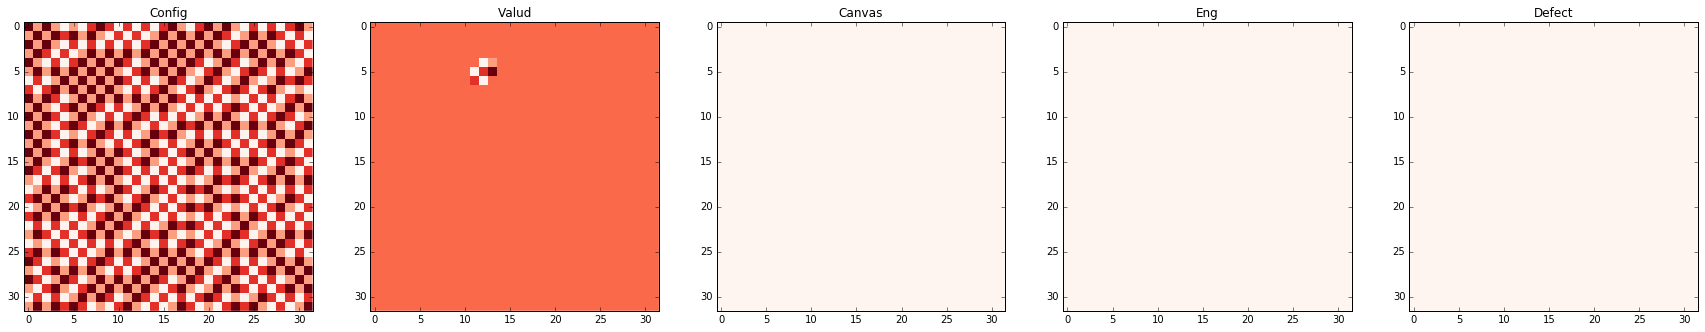

1
action: 3, reward: -0.0048828125, terminate: False, returns: None


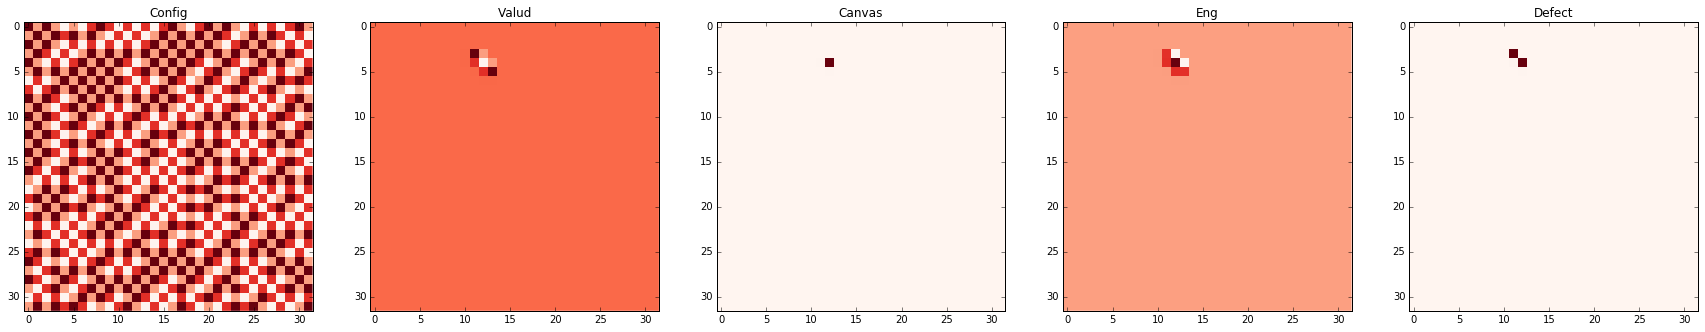

1
action: 4, reward: -0.001953125, terminate: False, returns: None


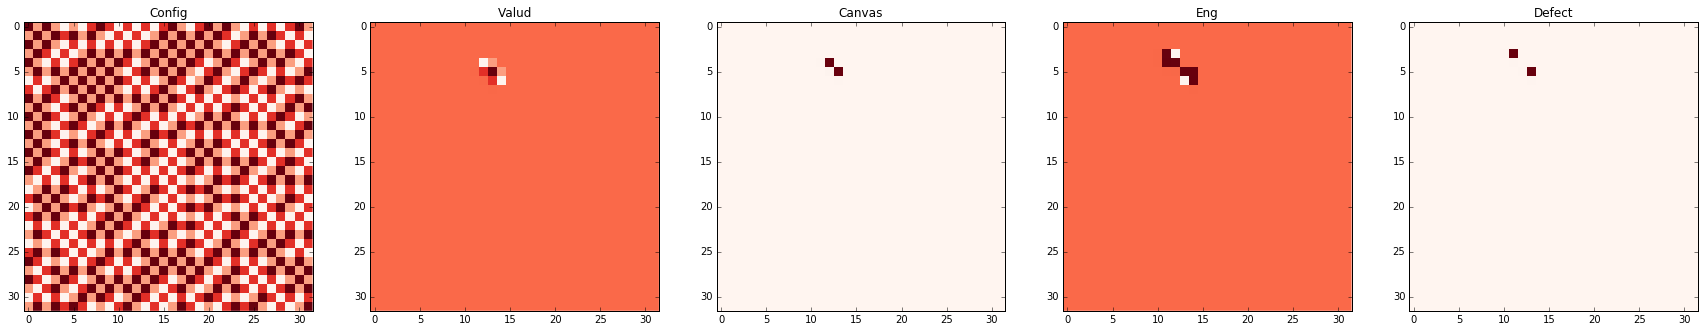

1
action: 4, reward: -0.0029296875, terminate: False, returns: None


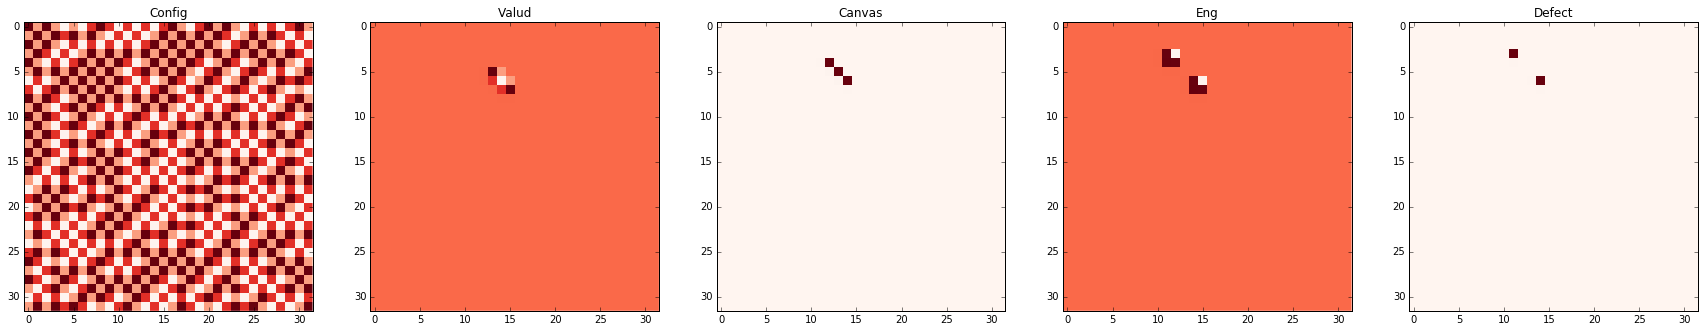

1
action: 4, reward: 0.0, terminate: False, returns: None


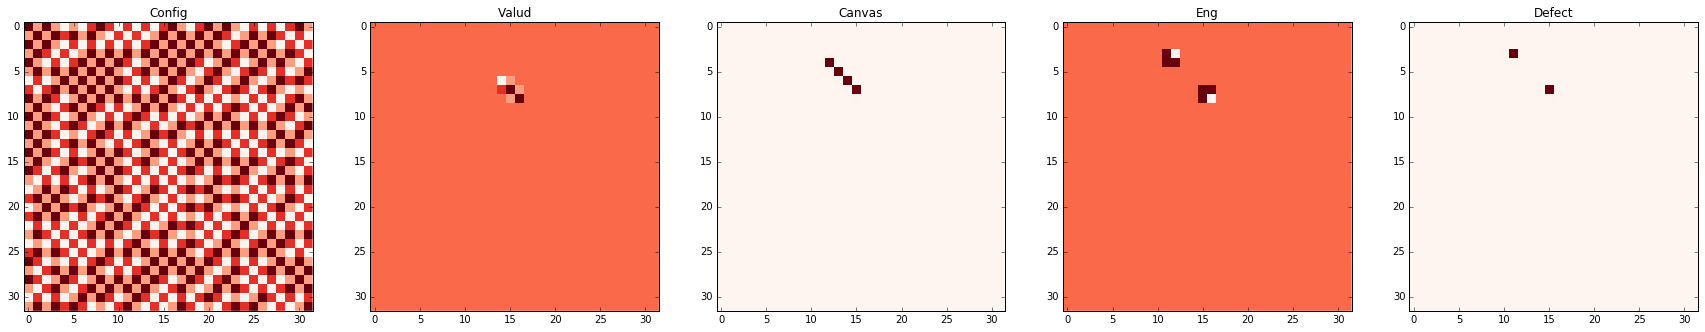

1
action: 3, reward: -0.0048828125, terminate: False, returns: None


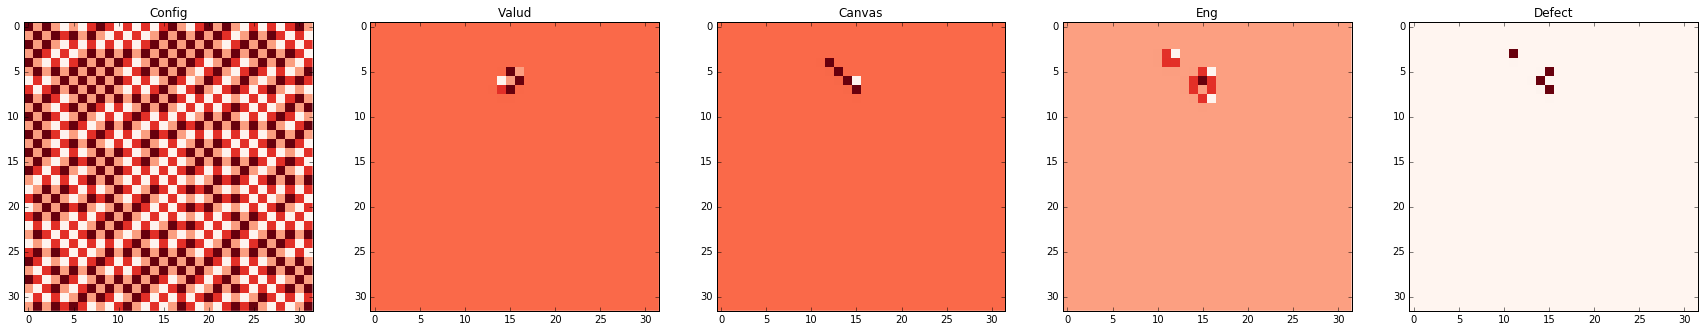

1
action: 6, reward: 0.0, terminate: False, returns: None


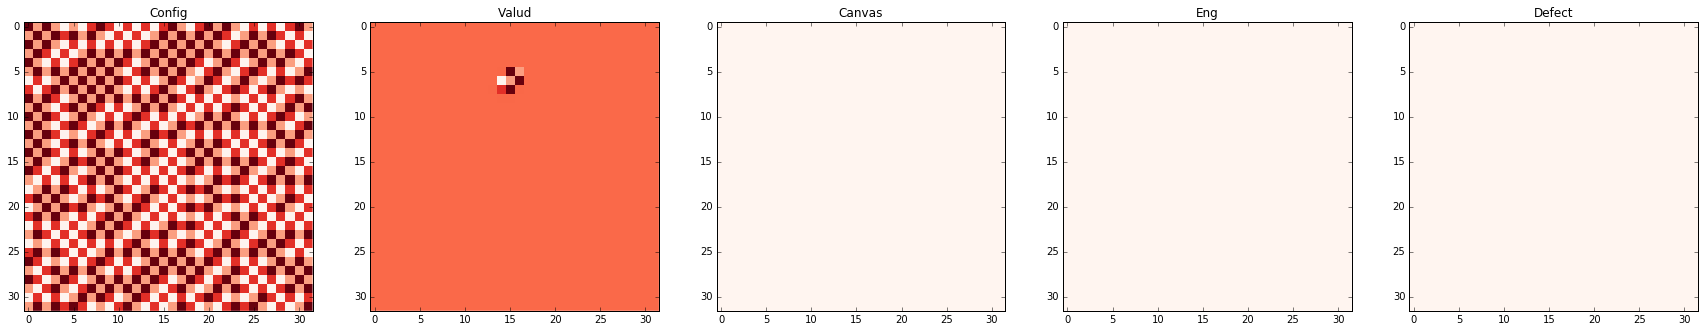

0
action: 6, reward: 0.0, terminate: True, returns: None


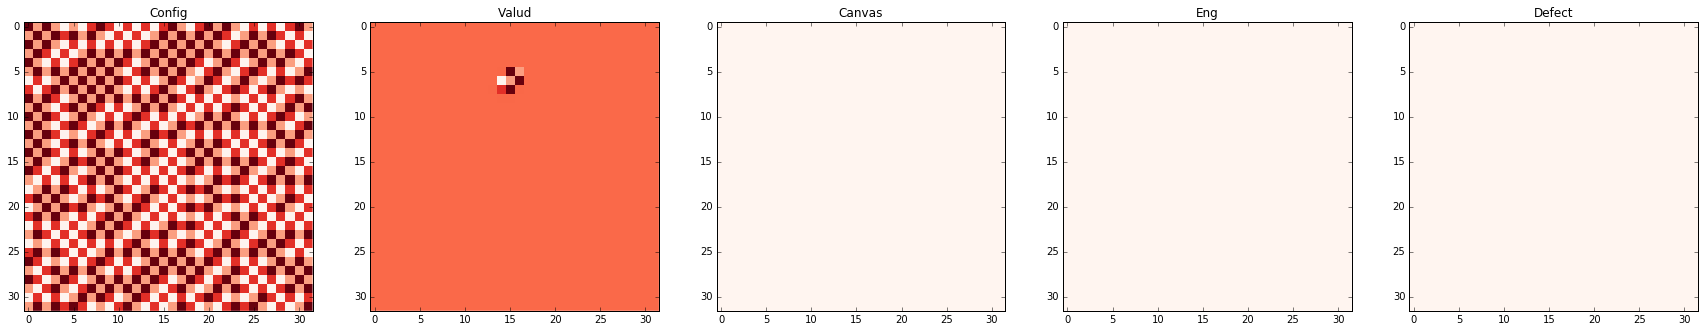

-1
Episode 9: Reward = -0.12890625


In [18]:
# Put the agent on the lattice
obs = env.start()
reward = 0.0
for ep in range(num_of_episodes):

    terminate = False
    # cumulant rewards
    ep_reward = 0.0

    while(not terminate):
        act = random_policy(obs)
        obs, reward, terminate, rets = env.step(act)
        print('action: {}, reward: {}, terminate: {}, returns: {}'.format(act, reward, terminate, rets))
        show_states(images=obs, titles=titles)
        ep_reward += reward
        print (env.lives)

    print ("Episode {}: Reward = {}".format(ep, ep_reward))

    _ = env.reset()

In [3]:
env.start()
obs = env.get_obs()
obs['config'].shape


(32, 32, 1)

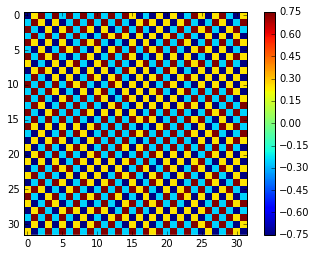

In [4]:
config=obs['config'][:,:,0]
plt.imshow(config, interpolation="None")
plt.colorbar()
# Figure out this wired pattern

NameError: name 'obs' is not defined

In [2]:
env.sim.get_sublatt_map()

array([1., 0., 1., ..., 1., 0., 1.])

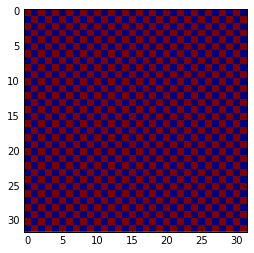

In [7]:
plt.imshow(np.array(env.sim.get_sublatt_map()).reshape(32,32), interpolation='none')

In [6]:
env.sim.get_local_spins()
env.step(4)

({'config': array([[[-0.75],
          [ 0.25],
          [ 0.75],
          ...,
          [-0.25],
          [-0.75],
          [ 0.25]],
  
         [[-0.25],
          [ 0.75],
          [ 0.25],
          ...,
          [-0.75],
          [-0.25],
          [ 0.75]],
  
         [[ 0.75],
          [-0.25],
          [-0.75],
          ...,
          [ 0.25],
          [ 0.75],
          [-0.25]],
  
         ...,
  
         [[-0.25],
          [ 0.75],
          [-0.25],
          ...,
          [ 0.75],
          [ 0.25],
          [ 0.75]],
  
         [[-0.75],
          [ 0.25],
          [-0.75],
          ...,
          [-0.25],
          [-0.75],
          [ 0.25]],
  
         [[ 0.25],
          [-0.75],
          [-0.25],
          ...,
          [ 0.75],
          [ 0.25],
          [-0.75]]], dtype=float32),
  'minimap': array([[[-0.75      ,  0.        , -0.6666667 ,  0.5       ],
          [ 0.25      ,  0.        ,  0.        ,  0.        ],
          [ 0.        

In [7]:
env.sim.get_local_spins()


[-0.25, 0.75, 0.75, 0.75, -0.75, -0.25, 0.25]